In [ ]:
!pip install elasticsearch

In [11]:
import requests
url = 'http://192.168.15.128:9200'
data = requests.get(url)
data

<Response [200]>

In [ ]:
from elasticsearch import Elasticsearch
es = Elasticsearch('http://139.162.75.164:9200')
es

In [ ]:
from datetime import datetime
doc = {
    'author': 'Justin',
    'text': '物聯網平台ELK實作',
    'timestamp': datetime.now()
}
doc

In [ ]:
res = es.index(index='test', doc_type='elk', body=doc)
print(res['result'])

In [ ]:
res = es.search(index='test', body={"query":{"match_all":{}}})
for hit in res['hits']['hits']:
    print("%(timestamp)s %(author)s: %(text)s" % hit["_source"])

In [ ]:
from kafka import KafkaConsumer
import sys, json, pymysql, pymongo
from elasticsearch import Elasticsearch
import datetime

if __name__ == "__main__":

    # 與 MongoDB連線
    client = pymongo.MongoClient(host="mongodb", port=27017)
    # 指定為 test 資料庫
    db = client.test
    # 指定 temp_humidity 集合, MongoDB的每個資料庫又包含許多集合(collection), 類似於關聯性資料庫中的表
    collection = db.temp_humidity

    # 設定要連線到Kafka集群的相關設定, 產生一個Kafka的Consumer的實例
    consumer = KafkaConsumer(
        # 指定Kafka集群伺服器
        bootstrap_servers=["kafka:9092"],
        # ConsumerGroup的名稱, 可以不指定
        #group_id="cg_001",
        # 指定msgKey的反序列化器, 若Key為None, 無法反序列化
        # key_deserializer=bytes.decode,
        # 指定msgValue的反序列化器
        #value_deserializer=bytes.decode,
        value_deserializer=lambda m: json.loads(m.decode('ascii')),
        # 是否從這個ConsumerGroup尚未讀取的partition / offset開始讀
        auto_offset_reset="earliest",
    )
   
    # 讓Consumer向Kafka集群訂閱指定的topic
    consumer.subscribe(topics="TEMP_HUMIDITY_ENRICHED")
    
    # 持續的拉取Kafka有進來的訊息
    try:
        print("Now listening for incoming messages ...")
        # 持續監控是否有新的record進來
        for record in consumer:
            topic = record.topic
            partition = record.partition
            offset = record.offset
            timestamp = record.timestamp
            # 取出msgKey與msgValue
            msgKey = record.key
            msgValue = record.value
            # 秀出metadata與msgKey & msgValue訊息
            print("topic=%s, partition=%s, offset=%s : (key=%s, value=%s)" % (record.topic, record.partition, 
                                                                              record.offset, record.key, record.value))
            j = {"device_id": msgValue["T_DEVICE_ID"], "timestamp": msgValue["T_TIMESTAMP"], 
                  "Temperature": msgValue["TEMPERATURE"], "Humidity": msgValue["HUMIDITY"]}
            print("json=",  j)
            
            # 將資料存入 mongodb
            # 存入單筆
            #result = collection.insert_one(j)
            # 存入多筆
            #result = collection.insert_many()
            #print(result)
            
            #將資料寫入ES
            dt = datetime.datetime.strptime(msgValue["T_TIMESTAMP"], "%Y-%m-%d %H:%M:%S")
            doc = {"device_id": msgValue["T_DEVICE_ID"], "timestamp": dt, 
                  "Temperature": msgValue["TEMPERATURE"], "Humidity": msgValue["HUMIDITY"]}
            res = es.index(index='ltu-iot', doc_type='elk', body=doc)
            print(res['result'])

    except:
        # 錯誤處理
        e_type, e_value, e_traceback = sys.exc_info()
        print("type ==> %s" % (e_type))
        print("value ==> %s" % (e_value))
        print("traceback ==> file name: %s" % (e_traceback.tb_frame.f_code.co_filename))
        print("traceback ==> line no: %s" % (e_traceback.tb_lineno))
        print("traceback ==> function name: %s" % (e_traceback.tb_frame.f_code.co_name))
    finally:
        consumer.close()

     |████████████████████████████████| 99 kB 890 kB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [2]:
!pip install pymysql

     |████████████████████████████████| 47 kB 383 kB/s eta 0:00:011


In [3]:
!pip install elasticsearch

     |████████████████████████████████| 99 kB 586 kB/s eta 0:00:01


In [5]:
import sys, json, pymysql
from elasticsearch import Elasticsearch
import datetime
import pandas as pd
es = Elasticsearch('http://192.168.15.128:9200')
db = pymysql.connect(host='10.120.35.27',port=3306,user='dbuser2',passwd='aabb1234',db='Project_test')
cur = db.cursor()
sql = 'select * from daily_trade_tw where stockiid=2330;'
a = cur.execute(sql)
Data = [i for i in cur.fetchall()]
b = pd.DataFrame(Data)

stockiid = b[0]
date = b[1]
Open = b[2]
high =b[3]
low = b[4]
close = b[5]
volume = b[6]
# if __name__ == "__main__":


    
# """ 
#             dt = datetime.datetime.strptime(msgValue["T_TIMESTAMP"], "%Y-%m-%d %H:%M:%S")
#             doc = {"device_id": msgValue["T_DEVICE_ID"], "timestamp": dt, 
#             "Temperature": msgValue["TEMPERATURE"], "Humidity": msgValue["HUMIDITY"]}"""
    
    
    
    
#     test = {"stockiid": stockiid, "date": date, "open": Open, "high": high , "low":low , "close":close , "volume":volume}
#     res = es.index(index='daily_trade_tw1', doc_type='elk', body=test)
#     print(res['result'])

,stockiid,date,open,high,low,close,volume
0,2330,2010-01-04,65.00,65.00,64.00,64.90,39511138
1,2330,2010-01-05,65.00,65.10,63.90,64.50,38394084
2,2330,2010-01-06,64.50,64.90,63.70,64.90,52734385
3,2330,2010-01-07,64.90,65.00,64.20,64.20,53294614
4,2330,2010-01-08,63.50,64.30,63.50,64.00,48047497
...,...,...,...,...,...,...,...
2560,2330,2020-06-04,305.00,306.00,304.00,306.00,47225322
2561,2330,2020-06-05,308.50,312.00,308.00,311.50,44077262
2562,2330,2020-06-08,316.00,319.00,315.00,318.00,52042921
2563,2330,2020-06-09,316.50,319.00,314.00,319.00,37068082


In [18]:
import sys, json, pymysql
from elasticsearch import Elasticsearch
import datetime
import pandas as pd
es = Elasticsearch('http://192.168.15.128:9200')
db = pymysql.connect(host='10.120.35.27',port=3306,user='dbuser2',passwd='aabb1234',db='Project_test')
cur = db.cursor()
sql = 'select * from daily_trade_tw where stockiid=2330;'
a = cur.execute(sql)
Data = [i for i in cur.fetchall()]
b = pd.DataFrame(Data)
b=b.rename(columns={0:'stockiid',1:'date',2:'open',3:'high',4:'low',5:'close',6:'volume'})
for i in range(len(b)):
#     print(b['stockiid'][i],b['date'][i],b['open'][i],b['high'][i],b['low'][i],b['close'][i],b['volume'][i])
    
    test = {"stockiid": b['stockiid'][i], "date": b['date'][i], "open": b['open'][i], "high": b['high'][i] , "low":b['low'][i] , "close":b['close'][i] , "volume":b['volume'][i]}
    res = es.index(index='daily_trade_tw1', doc_type='elk', body=test)
    print(res['result'])

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: ElasticsearchDeprecationWarning: [types removal] Specifying types in document index requests is deprecated, use the typeless endpoints instead (/{index}/_doc/{id}, /{index}/_doc, or /{index}/_create/{id}).


created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created


created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created


created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created


ValueError: Shape of passed values is (2574, 7), indices imply (2565, 7)

KeyError: 1

KeyError: 1

In [2]:
import sys, json, pymysql
import datetime
import pandas as pd
import vincent
#隨機選擇一支股票畫圖(測試)
Stockiid={'台泥': '1101', '亞泥': '1102', '嘉泥': '1103', '環泥': '1104', '幸福': '1108', '信大': '1109', '東泥': '1110', '味全': '1201', '味王': '1203', '大成': '1210', '大飲': '1213', '卜蜂': '1215', '統一': '1216', '愛之味': '1217', '泰山': '1218', '福壽': '1219', '台榮': '1220', '福懋油': '1225', '佳格': '1227', '聯華': '1229', '聯華食': '1231', '大統益': '1232', '天仁': '1233', '黑松': '1234', '興泰': '1235', '宏亞': '1236', '鮮活果汁-KY': '1256', '台塑': '1301', '南亞': '1303', '台聚': '1304', '華夏': '1305', '三芳': '1307', '亞聚': '1308', '台達化': '1309', '台苯': '1310', '國喬': '1312', '聯成': '1313', '中石化': '1314', '達新': '1315', '上曜': '1316', '東陽': '1319', '大洋': '1321', '永裕': '1323', '地球': '1324', '恆大': '1325', '台化': '1326', '再生-KY': '1337', '廣華-KY': '1338', '昭輝': '1339', '勝悅-KY': '1340', '富林-KY': '1341', '遠東新': '1402', '新纖': '1409', '南染': '1410', '宏洲': '1413', '東和': '1414', '廣豐': '1416', '嘉裕': '1417', '東華': '1418', '新紡': '1419', '利華': '1423', '大魯閣': '1432', '福懋': '1434', '中福': '1435', '華友聯': '1436', '勤益控': '1437', '裕豐': '1438', '中和': '1439', '南紡': '1440', '大東': '1441', '名軒': '1442', '立益': '1443', '力麗': '1444', '大宇': '1445', '宏和': '1446', '力鵬': '1447', '佳和': '1449', '年興': '1451', '宏益': '1452', '大將': '1453', '台富': '1454', '集盛': '1455', '怡華': '1456', '宜進': '1457', '聯發': '1459', '宏遠': '1460', '強盛': '1463', '得力': '1464', '偉全': '1465', '聚隆': '1466', '南緯': '1467', '昶和': '1468', '大統新創': '1470', '首利': '1471', '三洋紡': '1472', '台南': '1473', '弘裕': '1474', '本盟': '1475', '儒鴻': '1476', '聚陽': '1477', '士電': '1503', '東元': '1504', '正道': '1506', '永大': '1507', '瑞利': '1512', '中興電': '1513', '亞力': '1514', '力山': '1515', '川飛': '1516', '利奇': '1517', '華城': '1519', '大億': '1521', '堤維西': '1522', '耿鼎': '1524', '江申': '1525', '日馳': '1526', '鑽全': '1527', '恩德': '1528', '樂士': '1529', '亞崴': '1530', '高林股': '1531', '勤美': '1532', '車王電': '1533', '中宇': '1535', '和大': '1536', '廣隆': '1537', '正峰新': '1538', '巨庭': '1539', '喬福': '1540', '錩泰': '1541', '伸興': '1558', '中砂': '1560', '倉佑': '1568', '信錦': '1582', '程泰': '1583', '吉茂': '1587', '永冠-KY': '1589', '亞德客-KY': '1590', '英瑞-KY': '1592', '岱宇': '1598', '華電': '1603', '聲寶': '1604', '華新': '1605', '華榮': '1608', '大亞': '1609', '中電': '1611', '宏泰': '1612', '三洋電': '1614', '大山': '1615', '億泰': '1616', '榮星': '1617', '合機': '1618', '艾美特-KY': '1626', '中化': '1701', '南僑': '1702', '葡萄王': '1707', '東鹼': '1708', '和益': '1709', '東聯': '1710', '永光': '1711', '興農': '1712', '國化': '1713', '和桐': '1714', '長興': '1717', '中纖': '1718', '生達': '1720', '三晃': '1721', '台肥': '1722', '中碳': '1723', '台硝': '1724', '元禎': '1725', '永記': '1726', '中華化': '1727', '花仙子': '1730', '美吾華': '1731', '毛寶': '1732', '五鼎': '1733', '杏輝': '1734', '日勝化': '1735', '喬山': '1736', '臺鹽': '1737', '寶齡富錦': '1760', '中化生': '1762', '勝一': '1773', '展宇': '1776', '和康生': '1783', '科妍': '1786', '神隆': '1789', '美時': '1795', '台玻': '1802', '寶徠': '1805', '冠軍': '1806', '潤隆': '1808', '中釉': '1809', '和成': '1810', '凱撒衛': '1817', '台紙': '1902', '士紙': '1903', '正隆': '1904', '華紙': '1905', '寶隆': '1906', '永豐餘': '1907', '榮成': '1909', '中鋼': '2002', '東和鋼鐵': '2006', '燁興': '2007', '高興昌': '2008', '第一銅': '2009', '春源': '2010', '春雨': '2012', '中鋼構': '2013', '中鴻': '2014', '豐興': '2015', '官田鋼': '2017', '美亞': '2020', '聚亨': '2022', '燁輝': '2023', '志聯': '2024', '千興': '2025', '大成鋼': '2027', '威致': '2028', '盛餘': '2029', '彰源': '2030', '新光鋼': '2031', '新鋼': '2032', '佳大': '2033', '允強': '2034', '海光': '2038', '上銀': '2049', '川湖': '2059', '橋椿': '2062', '運錩': '2069', '南港': '2101', '泰豐': '2102', '台橡': '2103', '國際中橡': '2104', '正新': '2105', '建大': '2106', '厚生': '2107', '南帝': '2108', '華豐': '2109', '鑫永銓': '2114', '六暉-KY': '2115', '裕隆': '2201', '中華': '2204', '三陽工業': '2206', '和泰車': '2207', '台船': '2208', '裕日車': '2227', '劍麟': '2228', '為升': '2231', '宇隆': '2233', '百達-KY': '2236', '英利-KY': '2239', '宏旭-KY': '2243', '光寶科': '2301', '麗正': '2302', '聯電': '2303', '全友': '2305', '台達電': '2308', '金寶': '2312', '華通': '2313', '台揚': '2314', '楠梓電': '2316', '鴻海': '2317', '東訊': '2321', '中環': '2323', '仁寶': '2324', '國巨': '2327', '廣宇': '2328', '華泰': '2329', '台積電': '2330', '精英': '2331', '友訊': '2332', '旺宏': '2337', '光罩': '2338', '光磊': '2340', '茂矽': '2342', '華邦電': '2344', '智邦': '2345', '聯強': '2347', '海悅': '2348', '錸德': '2349', '順德': '2351', '佳世達': '2352', '宏碁': '2353', '鴻準': '2354', '敬鵬': '2355', '英業達': '2356', '華碩': '2357', '廷鑫': '2358', '所羅門': '2359', '致茂': '2360', '藍天': '2362', '矽統': '2363', '倫飛': '2364', '昆盈': '2365', '燿華': '2367', '金像電': '2368', '菱生': '2369', '大同': '2371', '震旦行': '2373', '佳能': '2374', '凱美': '2375', '技嘉': '2376', '微星': '2377', '瑞昱': '2379', '虹光': '2380', '廣達': '2382', '台光電': '2383', '群光': '2385', '精元': '2387', '威盛': '2388', '云辰': '2390', '正崴': '2392', '億光': '2393', '研華': '2395', '友通': '2397', '映泰': '2399', '凌陽': '2401', '毅嘉': '2402', '漢唐': '2404', '浩鑫': '2405', '國碩': '2406', '南亞科': '2408', '友達': '2409', '中華電': '2412', '環科': '2413', '精技': '2414', '錩新': '2415', '圓剛': '2417', '仲琦': '2419', '新巨': '2420', '建準': '2421', '固緯': '2423', '隴華': '2424', '承啟': '2425', '鼎元': '2426', '三商電': '2427', '興勤': '2428', '銘旺科': '2429', '燦坤': '2430', '聯昌': '2431', '互盛電': '2433', '統懋': '2434', '偉詮電': '2436', '翔耀': '2438', '美律': '2439', '太空梭': '2440', '超豐': '2441', '新美齊': '2442', '億麗': '2443', '兆勁': '2444', '晶電': '2448', '京元電子': '2449', '神腦': '2450', '創見': '2451', '凌群': '2453', '聯發科': '2454', '全新': '2455', '奇力新': '2456', '飛宏': '2457', '義隆': '2458', '敦吉': '2459', '建通': '2460', '光群雷': '2461', '良得電': '2462', '盟立': '2464', '麗臺': '2465', '冠西電': '2466', '志聖': '2467', '華經': '2468', '資通': '2471', '立隆電': '2472', '可成': '2474', '鉅祥': '2476', '美隆電': '2477', '大毅': '2478', '敦陽科': '2480', '強茂': '2481', '連宇': '2482', '百容': '2483', '希華': '2484', '兆赫': '2485', '一詮': '2486', '漢平': '2488', '瑞軒': '2489', '吉祥全': '2491', '華新科': '2492', '揚博': '2493', '普安': '2495', '卓越': '2496', '怡利電': '2497', '宏達電': '2498', '東貝': '2499', '國建': '2501', '國產': '2504', '國揚': '2505', '太設': '2506', '全坤建': '2509', '太子': '2511', '龍邦': '2514', '中工': '2515', '新建': '2516', '冠德': '2520', '京城': '2524', '宏璟': '2527', '皇普': '2528', '華建': '2530', '宏盛': '2534', '達欣工': '2535', '宏普': '2536', '聯上發': '2537', '基泰': '2538', '櫻花建': '2539', '愛山林': '2540', '興富發': '2542', '皇昌': '2543', '皇翔': '2545', '根基': '2546', '日勝生': '2547', '華固': '2548', '潤弘': '2597', '益航': '2601', '長榮': '2603', '新興': '2605', '裕民': '2606', '榮運': '2607', '嘉里大榮': '2608', '陽明': '2609', '華航': '2610', '志信': '2611', '中航': '2612', '中櫃': '2613', '東森': '2614', '萬海': '2615', '山隆': '2616', '台航': '2617', '長榮航': '2618', '亞航': '2630', '台灣高鐵': '2633', '漢翔': '2634', '台驊投控': '2636', '慧洋-KY': '2637', '宅配通': '2642', '萬企': '2701', '華園': '2702', '國賓': '2704', '六福': '2705', '第一店': '2706', '晶華': '2707', '遠雄來': '2712', '夏都': '2722', '美食-KY': '2723', '王品': '2727', '雄獅': '2731', '寒舍': '2739', '雲品': '2748', '彰銀': '2801', '京城銀': '2809', '台中銀': '2812', '旺旺保': '2816', '華票': '2820', '中壽': '2823', '台產': '2832', '臺企銀': '2834', '高雄銀': '2836', '聯邦銀': '2838', '台開': '2841', '遠東銀': '2845', '安泰銀': '2849', '新產': '2850', '中再保': '2851', '第一保': '2852', '統一證': '2855', '三商壽': '2867', '華南金': '2880', '富邦金': '2881', '國泰金': '2882', '開發金': '2883', '玉山金': '2884', '元大金': '2885', '兆豐金': '2886', '台新金': '2887', '新光金': '2888', '國票金': '2889', '永豐金': '2890', '中信金': '2891', '第一金': '2892', '王道銀行': '2897', '欣欣': '2901', '遠百': '2903', '匯僑': '2904', '三商': '2905', '高林': '2906', '特力': '2908', '統領': '2910', '麗嬰房': '2911', '統一超': '2912', '農林': '2913', '潤泰全': '2915', '鼎固-KY': '2923', '淘帝-KY': '2929', '客思達-KY': '2936', '凱羿-KY': '2939', '歐格': '3002', '健和興': '3003', '豐達科': '3004', '神基': '3005', '晶豪科': '3006', '大立光': '3008', '華立': '3010', '今皓': '3011', '晟銘電': '3013', '聯陽': '3014', '全漢': '3015', '嘉晶': '3016', '奇鋐': '3017', '同開': '3018', '亞光': '3019', '鴻名': '3021', '威強電': '3022', '信邦': '3023', '憶聲': '3024', '星通': '3025', '禾伸堂': '3026', '盛達': '3027', '增你強': '3028', '零壹': '3029', '德律': '3030', '佰鴻': '3031', '偉訓': '3032', '威健': '3033', '聯詠': '3034', '智原': '3035', '文曄': '3036', '欣興': '3037', '全台': '3038', '遠見': '3040', '揚智': '3041', '晶技': '3042', '科風': '3043', '健鼎': '3044', '台灣大': '3045', '建碁': '3046', '訊舟': '3047', '益登': '3048', '和鑫': '3049', '鈺德': '3050', '力特': '3051', '夆典': '3052', '立萬利': '3054', '蔚華科': '3055', '總太': '3056', '喬鼎': '3057', '立德': '3058', '華晶科': '3059', '銘異': '3060', '建漢': '3062', '日電貿': '3090', '聯傑': '3094', '一零四': '3130', '正達': '3149', '景岳': '3164', '大量': '3167', '景碩': '3189', '全科': '3209', '晟鈦': '3229', '緯創': '3231', '虹冠電': '3257', '昇陽': '3266', '勝德': '3296', '昇貿': '3305', '聯德': '3308', '閎暉': '3311', '弘憶股': '3312', '同泰': '3321', '泰碩': '3338', '麗清': '3346', '奇偶': '3356', '新日興': '3376', '明泰': '3380', '新世紀': '3383', '玉晶光': '3406', '京鼎': '3413', '融程電': '3416', '譁裕': '3419', '台端': '3432', '榮創': '3437', '創意': '3443', '聯鈞': '3450', '晶睿': '3454', '群創': '3481', '誠研': '3494', '維熹': '3501', '揚明光': '3504', '華擎': '3515', '柏騰': '3518', '安馳': '3528', '晶相光': '3530', '台勝科': '3532', '嘉澤': '3533', '晶彩科': '3535', '誠創': '3536', '州巧': '3543', '敦泰': '3545', '聯穎': '3550', '嘉威': '3557', '牧德': '3563', '聯合再生': '3576', '辛耘': '3583', '通嘉': '3588', '艾笛森': '3591', '力銘': '3593', '智易': '3596', '宏致': '3605', '谷崧': '3607', '碩天': '3617', '洋華': '3622', '達邁': '3645', '健策': '3653', '世芯-KY': '3661', '貿聯-KY': '3665', '圓展': '3669', 'TPK-KY': '3673', '新至陞': '3679', '亞太電': '3682', '達能': '3686', '海華': '3694', '隆達': '3698', '大眾控': '3701', '大聯大': '3702', '欣陸': '3703', '合勤控': '3704', '永信': '3705', '神達': '3706', '上緯投控': '3708', '日月光投控': '3711', '永崴投控': '3712', '佳醫': '4104', '雃博': '4106', '懷特': '4108', '旭富': '4119', '亞諾法': '4133', '麗豐-KY': '4137', '龍燈-KY': '4141', '國光生': '4142', '康聯-KY': '4144', '全宇生技-KY': '4148 ', '訊映': '4155', '承業醫': '4164', '佐登-KY': '4190', '炎洲': '4306', '如興': '4414', '利勤': '4426', '廣越': '4438', '冠星-KY': '4439', '東台': '4526', '瑞智': '4532', '拓凱': '4536', '全球傳動': '4540', '銘鈺': '4545', '智伸科': '4551', '力達-KY': '4552', '氣立': '4555', '永新-KY': '4557', '強信-KY': '4560', '穎漢': '4562', '元翎': '4564', '時碩工業': '4566', '鈞興-KY': '4571', '駐龍': '4572', '大銀微系統': '4576', '光隆精密-KY': '4581', '德淵': '4720', '國精化': '4722', '信昌化': '4725', '華廣': '4737', '康普': '4739', '台耀': '4746', '三福化': '4755', '材料-KY': '4763', '雙鍵': '4764', '南寶': '4766', '日成-KY': '4807', '遠傳': '4904', '正文': '4906', '聯德控股-KY': '4912', '致伸': '4915', '事欣科': '4916', '新唐': '4919', '泰鼎-KY': '4927', '燦星網': '4930', '太極': '4934', '茂林-KY': '4935', '和碩': '4938', '嘉彰': '4942', '康控-KY': '4943', '凌通': '4952', '光鋐': '4956', '臻鼎-KY': '4958', '誠美材': '4960', '天鈺': '4961', '十銓': '4967', '立積': '4968', '佳凌': '4976', '眾達-KY': '4977', '榮科': '4989', '傳奇': '4994', '鑫禾': '4999', '三星': '5007', '訊連': '5203', '科嘉-KY': '5215', '東科-KY': '5225', '達興材料': '5234', '乙盛-KY': '5243', '虹堡': '5258', '鎧勝-KY': '5264', '祥碩': '5269', '禾聯碩': '5283', 'jpp-KY': '5284', '界霖': '5285', '豐祥-KY': '5288', '敦南': '5305', '中磊': '5388', '崇越': '5434', '瀚宇博': '5469', '松翰': '5471', '慧友': '5484', '建國': '5515', '隆大': '5519', '工信': '5521', '遠雄': '5522', '順天': '5525', '鄉林': '5531', '皇鼎': '5533', '長虹': '5534', '東明-KY': '5538', '遠雄港': '5607', '四維航': '5608', '鳳凰': '5706', '中租-KY': '5871', '上海商銀': '5876', '合庫金': '5880', '台南-KY': '5906', '大洋-KY': '5907', '群益證': '6005', '群益期': '6024', '競國': '6108', '聚碩': '6112', '鎰勝': '6115', '彩晶': '6116', '迎廣': '6117', '達運': '6120', '上福': '6128', '鈞泰': '6131', '金橋': '6133', '富爾特': '6136', '亞翔': '6139', '柏承': '6141', '友勁': '6142', '百一': '6152', '嘉聯益': '6153', '鈞寶': '6155', '華興': '6164', '捷泰': '6165', '凌華': '6166', '宏齊': '6168', '互億': '6172', '瑞儀': '6176', '達麗': '6177', '關貿': '6183', '大豐電': '6184', '豐藝': '6189', '精成科': '6191', '巨路': '6192', '帆宣': '6196', '佳必琪': '6197', '亞弘電': '6201', '盛群': '6202', '詮欣': '6205', '飛捷': '6206', '今國光': '6209', '聯茂': '6213', '精誠': '6214', '和椿': '6215', '居易': '6216', '聚鼎': '6224', '天瀚': '6225', '光鼎': '6226', '超眾': '6230', '華孚': '6235', '力成': '6239', '迅杰': '6243', '定穎': '6251', '矽格': '6257', '台郡': '6269', '同欣電': '6271', '宏正': '6277', '台表科': '6278', '全國電': '6281', '康舒': '6282', '淳安': '6283', '啟碁': '6285', '聯嘉': '6288', '華上': '6289', '悅城': '6405', '旭隼': '6409', '群電': '6412', '樺漢': '6414', '矽力-KY': '6415', '瑞祺電通': '6416', '光麗-KY': '6431', '光聖': '6442', '元晶': '6443', '鈺邦': '6449', '訊芯-KY': '6451', '康友-KY': '6452', 'GIS-KY': '6456', '台數科': '6464', '安集': '6477', '晶碩': '6491', '南六': '6504', '台塑化': '6505', '捷敏-KY': '6525', '愛普': '6531', '晶心科': '6533', '泰福-KY': '6541', '易華電': '6552', '興能高': '6558', '虹揚-KY': '6573', '研揚': '6579', '鋼聯': '6581', '申豐': '6582', '動力-KY': '6591', '和潤企業': '6592', '帝寶': '6605', '必應': '6625', '基士德-KY': '6641', '科定': '6655', '羅麗芬-KY': '6666', '中揚光': '6668', '緯穎': '6669', '復盛應用': '6670', '三能-KY': '6671', '騰輝電子-KY': '6672', '鋐寶科技': '6674', '旭暉應材': '6698', '惠特': '6706', '嘉基': '6715', '台通': '8011', '矽創': '8016', '尖點': '8021', '昇陽半導體': '8028', '雷虎': '8033', '台虹': '8039', '南電': '8046', '長華': '8070', '陞泰': '8072', '致新': '8081', '華冠': '8101', '瀚荃': '8103', '錸寶': '8104', '凌巨': '8105', '華東': '8110', '至上': '8112', '振樺電': '8114', '福懋科': '8131', '南茂': '8150', '達方': '8163', '無敵': '8201', '勤誠': '8210', '志超': '8213', '明基材': '8215', '寶一': '8222', '菱光': '8249', '富鼎': '8261', '宇瞻': '8271', '日友': '8341', '建新國際': '8367', '羅昇': '8374', '百和興業-KY': '8404', '福貞-KY': '8411', '可寧衛': '8422', '基勝-KY': '8427', '金麗-KY': '8429', '威宏-KY': '8442', '阿瘦': '8443', '富邦媒': '8454', '柏文': '8462', '潤泰材': '8463', '億豐': '8464', '美吉吉-KY': '8466', '波力-KY': '8467', '山林水': '8473', '東哥遊艇': '8478', '泰昇-KY': '8480', '政伸': '8481', '商億-KY': '8482', '吉源-KY': '8488', '格威傳媒': '8497', '鼎炫-KY': '8499', '台汽電': '8926', '新天地': '8940', '高力': '8996', '鈺齊-KY': '9802', '台火': '9902', '寶成': '9904', '大華': '9905', '欣巴巴': '9906', '統一實': '9907', '大台北': '9908', '豐泰': '9910', '櫻花': '9911', '偉聯': '9912', '美利達': '9914', '中保科': '9917', '欣天然': '9918', '康那香': '9919', '巨大': '9921', '福興': '9924', '新保': '9925', '新海': '9926', '泰銘': '9927', '中視': '9928', '秋雨': '9929', '中聯資源': '9930', '欣高': '9931', '中鼎': '9933', '成霖': '9934', '慶豐富': '9935', '全國': '9937', '百和': '9938', '宏全': '9939', '信義': '9940', '裕融': '9941', '茂順': '9942', '好樂迪': '9943', '新麗': '9944', '潤泰新': '9945', '三發地產': '9946', '佳龍': '9955', '世紀鋼': '9958', '茂生農經': '1240', '其祥-KY': '1258', '安心': '1259', '德麥': '1264', '漢來美食': '1268', '恩得利': '1333', '台翰': '1336', '精華': '1565', '濱川': '1569', '力肯': '1570', '新麥': '1580', '精剛': '1584', '和勤': '1586', '駿吉-KY': '1591', '祺驊': '1593', '川寶': '1595', '直得': '1597', '宏佳騰': '1599', '台蠟': '1742', '南光': '1752', '生泰': '1777', '合世': '1781', '訊聯': '1784', '光洋科': '1785', '杏昌': '1788', '金穎生技': '1796', '易威': '1799', '寶利徠': '1813', '富喬': '1815', '唐榮': '2035', '風青': '2061', '世鎧': '2063', '晉椿': '2064', '世豐': '2065', '世德': '2066', '嘉鋼': '2067', '精湛': '2070', '大甲': '2221', '泰茂': '2230', '謚源': '2235', '綠意': '2596', '大車隊': '2640', '正德': '2641', '捷迅': '2643', '晶悅': '2718', '燦星旅': '2719', '富驛-KY': '2724', '雅茗-KY': '2726', '瓦城': '2729', '六角': '2732', '易飛網': '2734', '高野': '2736', '天蔥': '2740', '山富': '2743', '五福': '2745', '豆府': '2752', '滿心': '2916', '東凌-KY': '2924', '誠品生活': '2926', '紅馬-KY': '2928', '集雅社': '2937', '泰偉': '3064', '李洲': '3066', '全域': '3067', '協禧': '3071', '凱柏實業': '3073', '僑威': '3078', '聯亞': '3081', '網龍': '3083', '新零售': '3085', '華義': '3086', '艾訊': '3088', '元炬': '3089', '鴻碩': '3092', '港建': '3093', '及成': '3095', '穩懋': '3105', '好德': '3114', '寶島極': '3115', '進階': '3118', '笙泉': '3122', '昇銳': '3128', '弘塑': '3131', '晶宏': '3141', '新揚科': '3144', '大綜': '3147', '璟德': '3152', '精確': '3162', '波若威': '3163', '亞信': '3169', '新洲': '3171', '基亞': '3176', '公準': '3178', '鑫龍騰': '3188', '和進': '3191', '樺晟': '3202', '佰研': '3205', '志豐': '3206', '耀勝': '3207', '順達': '3211', '茂訊': '3213', '優群': '3217', '大學光': '3218', '倚強股份': '3219', '台嘉碩': '3221', '三顧': '3224', '至寶電': '3226', '原相': '3227', '金麗科': '3228', '錦明': '3230', '昱捷': '3232', '光環': '3234', '千如': '3236', '海灣': '3252', '鑫創': '3259', '威剛': '3260', '欣銓': '3264', '台星科': '3265', '海德威': '3268', '東碩': '3272', '宇環': '3276', '太普高': '3284', '微端': '3285', '廣寰科': '3287', '點晶': '3288', '宜特': '3289', '東浦': '3290', '鈊象': '3293', '英濟': '3294', '杭特': '3297', '岱稜': '3303', '鼎天': '3306', '佳穎': '3310', '斐成': '3313', '尼克森': '3317', '建舜電': '3322', '加百裕': '3323', '雙鴻': '3324', '旭品': '3325', '幸康': '3332', '泰谷': '3339', '律勝': '3354', '尚立': '3360', '先進光': '3362', '上詮': '3363', '典範': '3372', '熱映': '3373', '精材': '3374', '彬台': '3379', '崇越電': '3388', '旭軟': '3390', '漢科': '3402', '台興': '3426', '哲固': '3434', '類比科': '3438', '聯一光': '3441', '利機': '3444', '由田': '3455', '進泰電子': '3465', '致振': '3466', '安勤': '3479', '力致': '3483', '崧騰': '3484', '森寶': '3489', '單井': '3490', '昇達科': '3491', '長盛': '3492', '陽程': '3498', '環天科': '3499', '位速': '3508', '矽瑪': '3511', '皇龍': '3512', '亞帝歐': '3516', '振維': '3520', '鴻翊': '3521', '御頂': '3522', '迎輝': '3523', '凡甲': '3526', '聚積': '3527', '力旺': '3529', '先益': '3531', '堡達': '3537', '曜越': '3540', '西柏': '3541', '宇峻': '3546', '兆利': '3548', '世禾': '3551', '同致': '3552', '重鵬': '3555', '禾瑞亞': '3556', '神準': '3558', '其陽': '3564', '逸昌': '3567', '大塚': '3570', '泓格': '3577', '友威科': '3580', '博磊': '3581', '閎康': '3587', '磐儀': '3594', '映興': '3597', '東林': '3609', '鼎翰': '3611', '安可': '3615', '富晶通': '3623', '光頡': '3624', '西勝': '3625', '盈正': '3628', '地心引力': '3629', '新鉅科': '3630', '晟楠': '3631', '研勤': '3632', '駿熠電': '3642', '艾恩特': '3646', '精聯': '3652', '鑫科': '3663', '安瑞-KY': '3664', '光耀': '3666', '康聯訊': '3672', '德微': '3675', '家登': '3680', '榮昌': '3684', '元創精密': '3685', '歐買尬': '3687', '湧德': '3689', '碩禾': '3691', '營邦': '3693', '漢磊': '3707', '鑫聯大投控': '3709', '連展投控': '3710', '新晶投控': '3713', '永日': '4102', '東洋': '4105', '邦特': '4107', '加捷生醫': '4109', '濟生': '4111', '聯上': '4113', '健喬': '4114', '明基醫': '4116', '友華': '4120', '優盛': '4121', '晟德': '4123', '太醫': '4126', '天良': '4127', '中天': '4128', '聯合': '4129', '健亞': '4130', '晶宇': '4131', '曜亞': '4138', '馬光-KY': '4139', '中裕': '4147', '台微體': '4152', '鈺緯': '4153', '康樂-KY': '4154', '太景*-KY': '4157', '創源': '4160', '聿新科': '4161', '智擎': '4162', '鐿鈦': '4163', '展旺': '4167', '醣聯': '4168', '瑞基': '4171', '久裕': '4173', '浩鼎': '4174', '杏一': '4175', '福永生技': '4183', '安克': '4188', '杏國': '4192', '環瑞醫': '4198', '中華食': '4205', '環泰': '4207', '信立': '4303', '勝昱': '4304', '世坤': '4305', '東隆興': '4401', '福大': '4402', '新昕纖': '4406', '飛寶企業': '4413', '三圓': '4416', '金洲': '4417', '元勝': '4419', '光明': '4420', '聚紡': '4429', '耀億': '4430', '銘旺實': '4432', '興采': '4433', '健信': '4502', '金雨': '4503', '崇友': '4506', '高鋒': '4510', '福裕': '4513', '永彰': '4523', '方土霖': '4527', '江興鍛': '4528', '淳紳': '4529', '宏易': '4530', '協易機': '4533', '慶騰': '4534', '至興': '4535', '大詠城': '4538', '晟田': '4541', '科嶠': '4542', '萬在': '4543', '桓達': '4549', '長佳': '4550', '橙的': '4554', '旭然': '4556', '健椿': '4561', '百德': '4563', '科際精密': '4568', '捷流閥業': '4580', '唐鋒': '4609', '中美實': '4702', '大恭': '4706', '磐亞': '4707', '永純': '4711', '南璋': '4712', '永捷': '4714', '大立': '4716', '美琪瑪': '4721', '永昕': '4726', '雙美': '4728', '熒茂': '4729', '豪展': '4735', '泰博': '4736', '泓瀚': '4741', '合一': '4743', '皇將': '4744', '合富-KY': '4745', '強生': '4747', '國碳科': '4754', '勤凱': '4760', '誠泰科技': '4767', 'VHQ-KY': '4803', '大略-KY': '4804', '昇華': '4806', '聯光通': '4903', '台聯電': '4905', '富宇': '4907', '前鼎': '4908', '新復興': '4909', '德英': '4911', '欣厚-KY': '4924', '新盛力': '4931', '友輝': '4933', '亞電': '4939', '兆遠': '4944', '辣椒': '4946', '昂寶-KY': '4947', '牧東': '4950', '緯軟': '4953', '譜瑞-KY': '4966', 'IET-KY': '4971', '湯石照明': '4972', '廣穎': '4973', '亞泰': '4974', '華星光': '4979', '科誠': '4987', '環宇-KY': '4991', '晶達': '4995', '榮剛': '5009', '久陽': '5011', '強新': '5013', '建錩': '5014', '華祺': '5015', '松和': '5016', '富強': '5102', '凱衛': '5201', '力新': '5202', '中茂': '5205', '坤悅': '5206', '新鼎': '5209', '寶碩': '5210', '蒙恬': '5211', '凌網': '5212', '亞昕': '5213', '萬達光電': '5220', '安力-KY': '5223', '立凱-KY': '5227', '雷笛克光學': '5230', '智晶': '5245', '天鉞電': '5251', '智崴': '5263', '笙科': '5272', '信驊': '5274', '達輝-KY': '5276', '尚凡': '5278', '大峽谷-KY': '5281', '數字': '5287', '宜鼎': '5289', '邑昇': '5291', '杰力': '5299', '寶得利': '5301', '太欣': '5302', '鼎創達': '5304', '桂盟': '5306', '系統電': '5309', '天剛': '5310', '寶島科': '5312', '世紀': '5314', '光聯': '5315', '友銓': '5321', '士開': '5324', '華容': '5328', '建榮': '5340', '立衛': '5344', '天揚': '5345', '世界': '5347', '系通': '5348', '先豐': '5349', '鈺創': '5351', '台林': '5353', '佳總': '5355', '協益': '5356', '力麗店': '5364', '中光電': '5371', '合正': '5381', '金利': '5383', '青雲': '5386', '應華': '5392', '慕康生醫': '5398', '中菲': '5403', '國眾': '5410', '台半': '5425', '振發': '5426', '達威': '5432', '東友': '5438', '高技': '5439', '均豪': '5443', '寶聯通': '5450', '佶優': '5452', '昇益': '5455', '宣德': '5457', '同協': '5460', '霖宏': '5464', '富驊': '5465', '凱鈺': '5468', '聰泰': '5474', '德宏': '5475', '智冠': '5478', '新華': '5481', '中美晶': '5483', '通泰': '5487', '松普': '5488', '彩富': '5489', '同亨': '5490', '三聯': '5493', '凱崴': '5498', '永信建': '5508', '德昌': '5511', '力麒': '5512', '三豐': '5514', '雙喜': '5516', '力泰': '5520', '豐謙': '5523', '志嘉': '5529', '龍巖': '5530', '聖暉': '5536', '崇佑-KY': '5543', '台聯櫃': '5601', '陸海': '5603', '中連貨': '5604', '中菲行': '5609', '劍湖山': '5701', '亞都': '5703', '老爺知': '5704', '日盛金': '5820', '致和證': '5864', '台名': '5878', '德記': '5902', '全家': '5903', '寶雅': '5904', '南仁湖': '5905', '宏遠證': '6015', '康和證': '6016', '大展證': '6020', '大慶證': '6021', '元大期': '6023', '福邦證': '6026', '寬魚國際': '6101', '合邦': '6103', '創惟': '6104', '亞元': '6109', '大宇資': '6111', '亞矽': '6113', '久威': '6114', '建達': '6118', '新普': '6121', '擎邦': '6122', '上奇': '6123', '業強': '6124', '廣運': '6125', '信音': '6126', '九豪': '6127', '普誠': '6129', '星寶國際': '6130', '萬旭': '6134', '茂達': '6138', '訊達': '6140', '振曜': '6143', '得利影': '6144', '耕興': '6146', '頎邦': '6147', '驊宏資': '6148', '撼訊': '6150', '晉倫': '6151', '順發': '6154', '松上': '6156', '禾昌': '6158', '欣技': '6160', '捷波': '6161', '華電網': '6163', '久正': '6167', '昱泉': '6169', '統振': '6170', '亞銳士': '6171', '信昌電': '6173', '安碁': '6174', '立敦': '6175', '亞通': '6179', '橘子': '6180', '合晶': '6182', '幃翔': '6185', '新潤': '6186', '萬潤': '6187', '廣明': '6188', '萬泰科': '6190', '育富': '6194', '詩肯': '6195', '凌泰': '6198', '天品': '6199', '海韻電': '6203', '艾華': '6204', '雷科': '6207', '日揚': '6208', '慶生': '6210', '理銘': '6212', '中探針': '6217', '豪勉': '6218', '富旺': '6219', '岳豐': '6220', '晉泰': '6221', '上揚': '6222', '旺矽': '6223', '茂綸': '6227', '全譜': '6228', '研通': '6229', '系微': '6231', '旺玖': '6233', '高僑': '6234', '康呈': '6236', '驊訊': '6237', '勝麗': '6238', '松崗': '6240', '易通展': '6241', '立康': '6242', '茂迪': '6244', '立端': '6245', '臺龍': '6246', '淇譽電': '6247', '沛波': '6248', '百徽': '6259', '久元': '6261', '普萊德': '6263', '富裔': '6264', '方土昶': '6265', '泰詠': '6266', '倍微': '6270', '台燿': '6274', '元山': '6275', '安鈦克': '6276', '胡連': '6279', '佳邦': '6284', '元隆': '6287', '良維': '6290', '沛亨': '6291', '迅德': '6292', '智基': '6294', '通訊-KY': '6404', '晶焱': '6411', '韋僑': '6417', '詠昇': '6418', '京晨科': '6419', '易發': '6425', '統新': '6426', '今展科': '6432', '大中': '6435', '迅得': '6438', '廣錠': '6441', '藥華藥': '6446', '紘康': '6457', '益得': '6461', '神盾': '6462', '威潤': '6465', '大樹': '6469', '宇智': '6470', '保瑞': '6472', '弘煜科': '6482', '點序': '6485', '互動': '6486', '環球晶': '6488', '生華科': '6492', '九齊': '6494', '科懋': '6496', '亞獅康-KY': '6497 ', '益安': '6499', '雙邦': '6506', '惠光': '6508', '聚和': '6509', '精測': '6510', '啟發電': '6512', '芮特-KY': '6514', '勤崴國際': '6516', '達爾膚': '6523', '明達醫': '6527', '創威': '6530', '瑞耘': '6532', '順藥': '6535', '倉和': '6538', '隆中': '6542', '高端疫苗': '6547', '長科*': '6548', '勝品': '6556', '欣普羅': '6560', '是方': '6561', '宏觀': '6568', '醫揚': '6569', '維田': '6570', '霈方': '6574', '逸達': '6576', '勁豐': '6577', '達邦蛋白': '6578', '台康生技': '6589', '普鴻': '6590', '台灣銘板': '6593', '展匯科': '6594', '寬宏藝術': '6596', '富強鑫': '6603', '瀧澤科': '6609', '奈米醫材': '6612', '朋億': '6613', '慧智': '6615', '特昇-KY': '6616', '萬年清': '6624', '泰金-KY': '6629', '均華': '6640', '富致': '6642', 'M31': '6643', '台生材': '6649', '天正國際': '6654', '樂斯科': '6662', '群翊': '6664', '信紘科': '6667', '鈺太': '6679', '鑫創電子': '6680', '雍智科技': '6683', '安碁資訊': '6690', '東捷資訊': '6697', '應廣': '6716', '崑鼎': '6803', '邑錡': '7402', '佑華': '8024', '鈦昇': '8027', '光菱': '8032', '榮群': '8034', '長園科': '8038', '九暘': '8040', '金山電': '8042', '蜜望實': '8043', '網家': '8044', '星雲': '8047', '德勝': '8048', '晶采': '8049', '廣積': '8050', '安國': '8054', '凱碩': '8059', '東捷': '8064', '來思達': '8066', '志旭': '8067', '全達': '8068', '元太': '8069', '能率網通': '8071', '鉅橡': '8074', '伍豐': '8076', '洛碁': '8077', '永利聯合': '8080', '瑞穎': '8083', '巨虹': '8084', '福華': '8085', '宏捷科': '8086', '華鎂鑫': '8087', '品安': '8088', '翔名': '8091', '建暐': '8092', '保銳': '8093', '擎亞': '8096', '常珵': '8097', '大世科': '8099', '大億金茂': '8107', '博大': '8109', '立碁': '8111', '越峰': '8121', '正淩': '8147', '博智': '8155', '天宇': '8171', '智捷': '8176', '加高': '8182', '精星': '8183', '新漢': '8234', '華宏': '8240', '朋程': '8255', '商丞': '8277', '生展': '8279', '英格爾': '8287', '泰藝': '8289', '尚茂': '8291', '群聯': '8299', '益張': '8342', '恒耀': '8349', '冠好': '8354', '金居': '8358', '千附': '8383', '金益鼎': '8390', '白紗科': '8401', '盛弘': '8403', '金可-KY': '8406', '商之器': '8409', '森田': '8410', '大國鋼': '8415', '實威': '8416', '捷必勝-KY': '8418', '明揚': '8420', '旭源': '8421', '保綠-KY': '8423', '惠普': '8424', '紅木-KY': '8426', '匯鑽科': '8431', '東生華': '8432', '弘帆': '8433', '鉅邁': '8435', '大江': '8436', '大地-KY': '8437', '綠電': '8440', '綠河-KY': '8444', '華研': '8446', '霹靂': '8450', '大拓-KY': '8455', '夠麻吉': '8472', '台境': '8476', '創業家': '8477', '三貝德': '8489', '裕國': '8905', '花王': '8906', '欣雄': '8908', '光隆': '8916', '欣泰': '8917', '沈氏': '8921', '時報': '8923', '大田': '8924', '北基': '8927', '鉅明': '8928', '富堡': '8929', '青鋼': '8930', '大汽電': '8931', '宏大': '8932', '愛地雅': '8933', '衡平': '8934', '邦泰': '8935', '國統': '8936', '合騏': '8937', '明安': '8938', '關中': '8941', '森鉅': '8942', '琉園': '9949', '萬國通': '9950', '皇田': '9951', '邁達康': '9960', '有益': '9962'}
List=[]
for iid in Stockiid.values():
    iid=iid.replace(' ','')
    List.append(iid)
test = random.choice(List)
test = int(test)
print("random item from list is: ", test)

db = pymysql.connect(host='10.120.35.27',port=3306,user='dbuser2',passwd='aabb1234',db='Project_test')
cur = db.cursor()
cur.execute("select * from daily_trade_tw where stockiid=%d" % (test))

Data = [i for i in cur.fetchall()]
b = pd.DataFrame(Data)

print(b)


NameError: name 'random' is not defined

SyntaxError: invalid syntax (<ipython-input-43-b6a32a9591b4>, line 8)

In [1]:
import sys, json, pymysql
from elasticsearch import Elasticsearch
import datetime
import pandas as pd
es = Elasticsearch('http://192.168.15.128:9200')
db = pymysql.connect(host='10.120.35.27',port=3306,user='dbuser2',passwd='aabb1234',db='Project_test')
cur = db.cursor()
sql = 'select * from daily_trade_tw where stockiid=1101;'
a = cur.execute(sql)
Data = [i for i in cur.fetchall()]
b = pd.DataFrame(Data)
b=b.rename(columns={0:'stockiid',1:'date',2:'open',3:'high',4:'low',5:'close',6:'volume'})
for i in range(len(b)):
#     print(b['stockiid'][i],b['date'][i],b['open'][i],b['high'][i],b['low'][i],b['close'][i],b['volume'][i])
    
    test = {"stockiid": b['stockiid'][i], "date": b['date'][i], "open": b['open'][i], "high": b['high'][i] , "low":b['low'][i] , "close":b['close'][i] , "volume":b['volume'][i]}
    res = es.index(index='daily_trade_tw2', doc_type='elk', body=test)
    print(res['result'])


/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:17: ElasticsearchDeprecationWarning: [types removal] Specifying types in document index requests is deprecated, use the typeless endpoints instead (/{index}/_doc/{id}, /{index}/_doc, or /{index}/_create/{id}).


created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created


created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created


created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created
created


In [2]:
import sys, json, pymysql
from elasticsearch import Elasticsearch
import datetime
import pandas as pd
Stockiid={'台泥': '1101', '亞泥': '1102', '嘉泥': '1103', '環泥': '1104', '幸福': '1108', '信大': '1109', '東泥': '1110', '味全': '1201', '味王': '1203', '大成': '1210', '大飲': '1213', '卜蜂': '1215', '統一': '1216', '愛之味': '1217', '泰山': '1218', '福壽': '1219', '台榮': '1220', '福懋油': '1225', '佳格': '1227', '聯華': '1229', '聯華食': '1231', '大統益': '1232', '天仁': '1233', '黑松': '1234', '興泰': '1235', '宏亞': '1236', '鮮活果汁-KY': '1256', '台塑': '1301', '南亞': '1303', '台聚': '1304', '華夏': '1305', '三芳': '1307', '亞聚': '1308', '台達化': '1309', '台苯': '1310', '國喬': '1312', '聯成': '1313', '中石化': '1314', '達新': '1315', '上曜': '1316', '東陽': '1319', '大洋': '1321', '永裕': '1323', '地球': '1324', '恆大': '1325', '台化': '1326', '再生-KY': '1337', '廣華-KY': '1338', '昭輝': '1339', '勝悅-KY': '1340', '富林-KY': '1341', '遠東新': '1402', '新纖': '1409', '南染': '1410', '宏洲': '1413', '東和': '1414', '廣豐': '1416', '嘉裕': '1417', '東華': '1418', '新紡': '1419', '利華': '1423', '大魯閣': '1432', '福懋': '1434', '中福': '1435', '華友聯': '1436', '勤益控': '1437', '裕豐': '1438', '中和': '1439', '南紡': '1440', '大東': '1441', '名軒': '1442', '立益': '1443', '力麗': '1444', '大宇': '1445', '宏和': '1446', '力鵬': '1447', '佳和': '1449', '年興': '1451', '宏益': '1452', '大將': '1453', '台富': '1454', '集盛': '1455', '怡華': '1456', '宜進': '1457', '聯發': '1459', '宏遠': '1460', '強盛': '1463', '得力': '1464', '偉全': '1465', '聚隆': '1466', '南緯': '1467', '昶和': '1468', '大統新創': '1470', '首利': '1471', '三洋紡': '1472', '台南': '1473', '弘裕': '1474', '本盟': '1475', '儒鴻': '1476', '聚陽': '1477', '士電': '1503', '東元': '1504', '正道': '1506', '永大': '1507', '瑞利': '1512', '中興電': '1513', '亞力': '1514', '力山': '1515', '川飛': '1516', '利奇': '1517', '華城': '1519', '大億': '1521', '堤維西': '1522', '耿鼎': '1524', '江申': '1525', '日馳': '1526', '鑽全': '1527', '恩德': '1528', '樂士': '1529', '亞崴': '1530', '高林股': '1531', '勤美': '1532', '車王電': '1533', '中宇': '1535', '和大': '1536', '廣隆': '1537', '正峰新': '1538', '巨庭': '1539', '喬福': '1540', '錩泰': '1541', '伸興': '1558', '中砂': '1560', '倉佑': '1568', '信錦': '1582', '程泰': '1583', '吉茂': '1587', '永冠-KY': '1589', '亞德客-KY': '1590', '英瑞-KY': '1592', '岱宇': '1598', '華電': '1603', '聲寶': '1604', '華新': '1605', '華榮': '1608', '大亞': '1609', '中電': '1611', '宏泰': '1612', '三洋電': '1614', '大山': '1615', '億泰': '1616', '榮星': '1617', '合機': '1618', '艾美特-KY': '1626', '中化': '1701', '南僑': '1702', '葡萄王': '1707', '東鹼': '1708', '和益': '1709', '東聯': '1710', '永光': '1711', '興農': '1712', '國化': '1713', '和桐': '1714', '長興': '1717', '中纖': '1718', '生達': '1720', '三晃': '1721', '台肥': '1722', '中碳': '1723', '台硝': '1724', '元禎': '1725', '永記': '1726', '中華化': '1727', '花仙子': '1730', '美吾華': '1731', '毛寶': '1732', '五鼎': '1733', '杏輝': '1734', '日勝化': '1735', '喬山': '1736', '臺鹽': '1737', '寶齡富錦': '1760', '中化生': '1762', '勝一': '1773', '展宇': '1776', '和康生': '1783', '科妍': '1786', '神隆': '1789', '美時': '1795', '台玻': '1802', '寶徠': '1805', '冠軍': '1806', '潤隆': '1808', '中釉': '1809', '和成': '1810', '凱撒衛': '1817', '台紙': '1902', '士紙': '1903', '正隆': '1904', '華紙': '1905', '寶隆': '1906', '永豐餘': '1907', '榮成': '1909', '中鋼': '2002', '東和鋼鐵': '2006', '燁興': '2007', '高興昌': '2008', '第一銅': '2009', '春源': '2010', '春雨': '2012', '中鋼構': '2013', '中鴻': '2014', '豐興': '2015', '官田鋼': '2017', '美亞': '2020', '聚亨': '2022', '燁輝': '2023', '志聯': '2024', '千興': '2025', '大成鋼': '2027', '威致': '2028', '盛餘': '2029', '彰源': '2030', '新光鋼': '2031', '新鋼': '2032', '佳大': '2033', '允強': '2034', '海光': '2038', '上銀': '2049', '川湖': '2059', '橋椿': '2062', '運錩': '2069', '南港': '2101', '泰豐': '2102', '台橡': '2103', '國際中橡': '2104', '正新': '2105', '建大': '2106', '厚生': '2107', '南帝': '2108', '華豐': '2109', '鑫永銓': '2114', '六暉-KY': '2115', '裕隆': '2201', '中華': '2204', '三陽工業': '2206', '和泰車': '2207', '台船': '2208', '裕日車': '2227', '劍麟': '2228', '為升': '2231', '宇隆': '2233', '百達-KY': '2236', '英利-KY': '2239', '宏旭-KY': '2243', '光寶科': '2301', '麗正': '2302', '聯電': '2303', '全友': '2305', '台達電': '2308', '金寶': '2312', '華通': '2313', '台揚': '2314', '楠梓電': '2316', '鴻海': '2317', '東訊': '2321', '中環': '2323', '仁寶': '2324', '國巨': '2327', '廣宇': '2328', '華泰': '2329', '台積電': '2330', '精英': '2331', '友訊': '2332', '旺宏': '2337', '光罩': '2338', '光磊': '2340', '茂矽': '2342', '華邦電': '2344', '智邦': '2345', '聯強': '2347', '海悅': '2348', '錸德': '2349', '順德': '2351', '佳世達': '2352', '宏碁': '2353', '鴻準': '2354', '敬鵬': '2355', '英業達': '2356', '華碩': '2357', '廷鑫': '2358', '所羅門': '2359', '致茂': '2360', '藍天': '2362', '矽統': '2363', '倫飛': '2364', '昆盈': '2365', '燿華': '2367', '金像電': '2368', '菱生': '2369', '大同': '2371', '震旦行': '2373', '佳能': '2374', '凱美': '2375', '技嘉': '2376', '微星': '2377', '瑞昱': '2379', '虹光': '2380', '廣達': '2382', '台光電': '2383', '群光': '2385', '精元': '2387', '威盛': '2388', '云辰': '2390', '正崴': '2392', '億光': '2393', '研華': '2395', '友通': '2397', '映泰': '2399', '凌陽': '2401', '毅嘉': '2402', '漢唐': '2404', '浩鑫': '2405', '國碩': '2406', '南亞科': '2408', '友達': '2409', '中華電': '2412', '環科': '2413', '精技': '2414', '錩新': '2415', '圓剛': '2417', '仲琦': '2419', '新巨': '2420', '建準': '2421', '固緯': '2423', '隴華': '2424', '承啟': '2425', '鼎元': '2426', '三商電': '2427', '興勤': '2428', '銘旺科': '2429', '燦坤': '2430', '聯昌': '2431', '互盛電': '2433', '統懋': '2434', '偉詮電': '2436', '翔耀': '2438', '美律': '2439', '太空梭': '2440', '超豐': '2441', '新美齊': '2442', '億麗': '2443', '兆勁': '2444', '晶電': '2448', '京元電子': '2449', '神腦': '2450', '創見': '2451', '凌群': '2453', '聯發科': '2454', '全新': '2455', '奇力新': '2456', '飛宏': '2457', '義隆': '2458', '敦吉': '2459', '建通': '2460', '光群雷': '2461', '良得電': '2462', '盟立': '2464', '麗臺': '2465', '冠西電': '2466', '志聖': '2467', '華經': '2468', '資通': '2471', '立隆電': '2472', '可成': '2474', '鉅祥': '2476', '美隆電': '2477', '大毅': '2478', '敦陽科': '2480', '強茂': '2481', '連宇': '2482', '百容': '2483', '希華': '2484', '兆赫': '2485', '一詮': '2486', '漢平': '2488', '瑞軒': '2489', '吉祥全': '2491', '華新科': '2492', '揚博': '2493', '普安': '2495', '卓越': '2496', '怡利電': '2497', '宏達電': '2498', '東貝': '2499', '國建': '2501', '國產': '2504', '國揚': '2505', '太設': '2506', '全坤建': '2509', '太子': '2511', '龍邦': '2514', '中工': '2515', '新建': '2516', '冠德': '2520', '京城': '2524', '宏璟': '2527', '皇普': '2528', '華建': '2530', '宏盛': '2534', '達欣工': '2535', '宏普': '2536', '聯上發': '2537', '基泰': '2538', '櫻花建': '2539', '愛山林': '2540', '興富發': '2542', '皇昌': '2543', '皇翔': '2545', '根基': '2546', '日勝生': '2547', '華固': '2548', '潤弘': '2597', '益航': '2601', '長榮': '2603', '新興': '2605', '裕民': '2606', '榮運': '2607', '嘉里大榮': '2608', '陽明': '2609', '華航': '2610', '志信': '2611', '中航': '2612', '中櫃': '2613', '東森': '2614', '萬海': '2615', '山隆': '2616', '台航': '2617', '長榮航': '2618', '亞航': '2630', '台灣高鐵': '2633', '漢翔': '2634', '台驊投控': '2636', '慧洋-KY': '2637', '宅配通': '2642', '萬企': '2701', '華園': '2702', '國賓': '2704', '六福': '2705', '第一店': '2706', '晶華': '2707', '遠雄來': '2712', '夏都': '2722', '美食-KY': '2723', '王品': '2727', '雄獅': '2731', '寒舍': '2739', '雲品': '2748', '彰銀': '2801', '京城銀': '2809', '台中銀': '2812', '旺旺保': '2816', '華票': '2820', '中壽': '2823', '台產': '2832', '臺企銀': '2834', '高雄銀': '2836', '聯邦銀': '2838', '台開': '2841', '遠東銀': '2845', '安泰銀': '2849', '新產': '2850', '中再保': '2851', '第一保': '2852', '統一證': '2855', '三商壽': '2867', '華南金': '2880', '富邦金': '2881', '國泰金': '2882', '開發金': '2883', '玉山金': '2884', '元大金': '2885', '兆豐金': '2886', '台新金': '2887', '新光金': '2888', '國票金': '2889', '永豐金': '2890', '中信金': '2891', '第一金': '2892', '王道銀行': '2897', '欣欣': '2901', '遠百': '2903', '匯僑': '2904', '三商': '2905', '高林': '2906', '特力': '2908', '統領': '2910', '麗嬰房': '2911', '統一超': '2912', '農林': '2913', '潤泰全': '2915', '鼎固-KY': '2923', '淘帝-KY': '2929', '客思達-KY': '2936', '凱羿-KY': '2939', '歐格': '3002', '健和興': '3003', '豐達科': '3004', '神基': '3005', '晶豪科': '3006', '大立光': '3008', '華立': '3010', '今皓': '3011', '晟銘電': '3013', '聯陽': '3014', '全漢': '3015', '嘉晶': '3016', '奇鋐': '3017', '同開': '3018', '亞光': '3019', '鴻名': '3021', '威強電': '3022', '信邦': '3023', '憶聲': '3024', '星通': '3025', '禾伸堂': '3026', '盛達': '3027', '增你強': '3028', '零壹': '3029', '德律': '3030', '佰鴻': '3031', '偉訓': '3032', '威健': '3033', '聯詠': '3034', '智原': '3035', '文曄': '3036', '欣興': '3037', '全台': '3038', '遠見': '3040', '揚智': '3041', '晶技': '3042', '科風': '3043', '健鼎': '3044', '台灣大': '3045', '建碁': '3046', '訊舟': '3047', '益登': '3048', '和鑫': '3049', '鈺德': '3050', '力特': '3051', '夆典': '3052', '立萬利': '3054', '蔚華科': '3055', '總太': '3056', '喬鼎': '3057', '立德': '3058', '華晶科': '3059', '銘異': '3060', '建漢': '3062', '日電貿': '3090', '聯傑': '3094', '一零四': '3130', '正達': '3149', '景岳': '3164', '大量': '3167', '景碩': '3189', '全科': '3209', '晟鈦': '3229', '緯創': '3231', '虹冠電': '3257', '昇陽': '3266', '勝德': '3296', '昇貿': '3305', '聯德': '3308', '閎暉': '3311', '弘憶股': '3312', '同泰': '3321', '泰碩': '3338', '麗清': '3346', '奇偶': '3356', '新日興': '3376', '明泰': '3380', '新世紀': '3383', '玉晶光': '3406', '京鼎': '3413', '融程電': '3416', '譁裕': '3419', '台端': '3432', '榮創': '3437', '創意': '3443', '聯鈞': '3450', '晶睿': '3454', '群創': '3481', '誠研': '3494', '維熹': '3501', '揚明光': '3504', '華擎': '3515', '柏騰': '3518', '安馳': '3528', '晶相光': '3530', '台勝科': '3532', '嘉澤': '3533', '晶彩科': '3535', '誠創': '3536', '州巧': '3543', '敦泰': '3545', '聯穎': '3550', '嘉威': '3557', '牧德': '3563', '聯合再生': '3576', '辛耘': '3583', '通嘉': '3588', '艾笛森': '3591', '力銘': '3593', '智易': '3596', '宏致': '3605', '谷崧': '3607', '碩天': '3617', '洋華': '3622', '達邁': '3645', '健策': '3653', '世芯-KY': '3661', '貿聯-KY': '3665', '圓展': '3669', 'TPK-KY': '3673', '新至陞': '3679', '亞太電': '3682', '達能': '3686', '海華': '3694', '隆達': '3698', '大眾控': '3701', '大聯大': '3702', '欣陸': '3703', '合勤控': '3704', '永信': '3705', '神達': '3706', '上緯投控': '3708', '日月光投控': '3711', '永崴投控': '3712', '佳醫': '4104', '雃博': '4106', '懷特': '4108', '旭富': '4119', '亞諾法': '4133', '麗豐-KY': '4137', '龍燈-KY': '4141', '國光生': '4142', '康聯-KY': '4144', '全宇生技-KY': '4148 ', '訊映': '4155', '承業醫': '4164', '佐登-KY': '4190', '炎洲': '4306', '如興': '4414', '利勤': '4426', '廣越': '4438', '冠星-KY': '4439', '東台': '4526', '瑞智': '4532', '拓凱': '4536', '全球傳動': '4540', '銘鈺': '4545', '智伸科': '4551', '力達-KY': '4552', '氣立': '4555', '永新-KY': '4557', '強信-KY': '4560', '穎漢': '4562', '元翎': '4564', '時碩工業': '4566', '鈞興-KY': '4571', '駐龍': '4572', '大銀微系統': '4576', '光隆精密-KY': '4581', '德淵': '4720', '國精化': '4722', '信昌化': '4725', '華廣': '4737', '康普': '4739', '台耀': '4746', '三福化': '4755', '材料-KY': '4763', '雙鍵': '4764', '南寶': '4766', '日成-KY': '4807', '遠傳': '4904', '正文': '4906', '聯德控股-KY': '4912', '致伸': '4915', '事欣科': '4916', '新唐': '4919', '泰鼎-KY': '4927', '燦星網': '4930', '太極': '4934', '茂林-KY': '4935', '和碩': '4938', '嘉彰': '4942', '康控-KY': '4943', '凌通': '4952', '光鋐': '4956', '臻鼎-KY': '4958', '誠美材': '4960', '天鈺': '4961', '十銓': '4967', '立積': '4968', '佳凌': '4976', '眾達-KY': '4977', '榮科': '4989', '傳奇': '4994', '鑫禾': '4999', '三星': '5007', '訊連': '5203', '科嘉-KY': '5215', '東科-KY': '5225', '達興材料': '5234', '乙盛-KY': '5243', '虹堡': '5258', '鎧勝-KY': '5264', '祥碩': '5269', '禾聯碩': '5283', 'jpp-KY': '5284', '界霖': '5285', '豐祥-KY': '5288', '敦南': '5305', '中磊': '5388', '崇越': '5434', '瀚宇博': '5469', '松翰': '5471', '慧友': '5484', '建國': '5515', '隆大': '5519', '工信': '5521', '遠雄': '5522', '順天': '5525', '鄉林': '5531', '皇鼎': '5533', '長虹': '5534', '東明-KY': '5538', '遠雄港': '5607', '四維航': '5608', '鳳凰': '5706', '中租-KY': '5871', '上海商銀': '5876', '合庫金': '5880', '台南-KY': '5906', '大洋-KY': '5907', '群益證': '6005', '群益期': '6024', '競國': '6108', '聚碩': '6112', '鎰勝': '6115', '彩晶': '6116', '迎廣': '6117', '達運': '6120', '上福': '6128', '鈞泰': '6131', '金橋': '6133', '富爾特': '6136', '亞翔': '6139', '柏承': '6141', '友勁': '6142', '百一': '6152', '嘉聯益': '6153', '鈞寶': '6155', '華興': '6164', '捷泰': '6165', '凌華': '6166', '宏齊': '6168', '互億': '6172', '瑞儀': '6176', '達麗': '6177', '關貿': '6183', '大豐電': '6184', '豐藝': '6189', '精成科': '6191', '巨路': '6192', '帆宣': '6196', '佳必琪': '6197', '亞弘電': '6201', '盛群': '6202', '詮欣': '6205', '飛捷': '6206', '今國光': '6209', '聯茂': '6213', '精誠': '6214', '和椿': '6215', '居易': '6216', '聚鼎': '6224', '天瀚': '6225', '光鼎': '6226', '超眾': '6230', '華孚': '6235', '力成': '6239', '迅杰': '6243', '定穎': '6251', '矽格': '6257', '台郡': '6269', '同欣電': '6271', '宏正': '6277', '台表科': '6278', '全國電': '6281', '康舒': '6282', '淳安': '6283', '啟碁': '6285', '聯嘉': '6288', '華上': '6289', '悅城': '6405', '旭隼': '6409', '群電': '6412', '樺漢': '6414', '矽力-KY': '6415', '瑞祺電通': '6416', '光麗-KY': '6431', '光聖': '6442', '元晶': '6443', '鈺邦': '6449', '訊芯-KY': '6451', '康友-KY': '6452', 'GIS-KY': '6456', '台數科': '6464', '安集': '6477', '晶碩': '6491', '南六': '6504', '台塑化': '6505', '捷敏-KY': '6525', '愛普': '6531', '晶心科': '6533', '泰福-KY': '6541', '易華電': '6552', '興能高': '6558', '虹揚-KY': '6573', '研揚': '6579', '鋼聯': '6581', '申豐': '6582', '動力-KY': '6591', '和潤企業': '6592', '帝寶': '6605', '必應': '6625', '基士德-KY': '6641', '科定': '6655', '羅麗芬-KY': '6666', '中揚光': '6668', '緯穎': '6669', '復盛應用': '6670', '三能-KY': '6671', '騰輝電子-KY': '6672', '鋐寶科技': '6674', '旭暉應材': '6698', '惠特': '6706', '嘉基': '6715', '台通': '8011', '矽創': '8016', '尖點': '8021', '昇陽半導體': '8028', '雷虎': '8033', '台虹': '8039', '南電': '8046', '長華': '8070', '陞泰': '8072', '致新': '8081', '華冠': '8101', '瀚荃': '8103', '錸寶': '8104', '凌巨': '8105', '華東': '8110', '至上': '8112', '振樺電': '8114', '福懋科': '8131', '南茂': '8150', '達方': '8163', '無敵': '8201', '勤誠': '8210', '志超': '8213', '明基材': '8215', '寶一': '8222', '菱光': '8249', '富鼎': '8261', '宇瞻': '8271', '日友': '8341', '建新國際': '8367', '羅昇': '8374', '百和興業-KY': '8404', '福貞-KY': '8411', '可寧衛': '8422', '基勝-KY': '8427', '金麗-KY': '8429', '威宏-KY': '8442', '阿瘦': '8443', '富邦媒': '8454', '柏文': '8462', '潤泰材': '8463', '億豐': '8464', '美吉吉-KY': '8466', '波力-KY': '8467', '山林水': '8473', '東哥遊艇': '8478', '泰昇-KY': '8480', '政伸': '8481', '商億-KY': '8482', '吉源-KY': '8488', '格威傳媒': '8497', '鼎炫-KY': '8499', '台汽電': '8926', '新天地': '8940', '高力': '8996', '鈺齊-KY': '9802', '台火': '9902', '寶成': '9904', '大華': '9905', '欣巴巴': '9906', '統一實': '9907', '大台北': '9908', '豐泰': '9910', '櫻花': '9911', '偉聯': '9912', '美利達': '9914', '中保科': '9917', '欣天然': '9918', '康那香': '9919', '巨大': '9921', '福興': '9924', '新保': '9925', '新海': '9926', '泰銘': '9927', '中視': '9928', '秋雨': '9929', '中聯資源': '9930', '欣高': '9931', '中鼎': '9933', '成霖': '9934', '慶豐富': '9935', '全國': '9937', '百和': '9938', '宏全': '9939', '信義': '9940', '裕融': '9941', '茂順': '9942', '好樂迪': '9943', '新麗': '9944', '潤泰新': '9945', '三發地產': '9946', '佳龍': '9955', '世紀鋼': '9958', '茂生農經': '1240', '其祥-KY': '1258', '安心': '1259', '德麥': '1264', '漢來美食': '1268', '恩得利': '1333', '台翰': '1336', '精華': '1565', '濱川': '1569', '力肯': '1570', '新麥': '1580', '精剛': '1584', '和勤': '1586', '駿吉-KY': '1591', '祺驊': '1593', '川寶': '1595', '直得': '1597', '宏佳騰': '1599', '台蠟': '1742', '南光': '1752', '生泰': '1777', '合世': '1781', '訊聯': '1784', '光洋科': '1785', '杏昌': '1788', '金穎生技': '1796', '易威': '1799', '寶利徠': '1813', '富喬': '1815', '唐榮': '2035', '風青': '2061', '世鎧': '2063', '晉椿': '2064', '世豐': '2065', '世德': '2066', '嘉鋼': '2067', '精湛': '2070', '大甲': '2221', '泰茂': '2230', '謚源': '2235', '綠意': '2596', '大車隊': '2640', '正德': '2641', '捷迅': '2643', '晶悅': '2718', '燦星旅': '2719', '富驛-KY': '2724', '雅茗-KY': '2726', '瓦城': '2729', '六角': '2732', '易飛網': '2734', '高野': '2736', '天蔥': '2740', '山富': '2743', '五福': '2745', '豆府': '2752', '滿心': '2916', '東凌-KY': '2924', '誠品生活': '2926', '紅馬-KY': '2928', '集雅社': '2937', '泰偉': '3064', '李洲': '3066', '全域': '3067', '協禧': '3071', '凱柏實業': '3073', '僑威': '3078', '聯亞': '3081', '網龍': '3083', '新零售': '3085', '華義': '3086', '艾訊': '3088', '元炬': '3089', '鴻碩': '3092', '港建': '3093', '及成': '3095', '穩懋': '3105', '好德': '3114', '寶島極': '3115', '進階': '3118', '笙泉': '3122', '昇銳': '3128', '弘塑': '3131', '晶宏': '3141', '新揚科': '3144', '大綜': '3147', '璟德': '3152', '精確': '3162', '波若威': '3163', '亞信': '3169', '新洲': '3171', '基亞': '3176', '公準': '3178', '鑫龍騰': '3188', '和進': '3191', '樺晟': '3202', '佰研': '3205', '志豐': '3206', '耀勝': '3207', '順達': '3211', '茂訊': '3213', '優群': '3217', '大學光': '3218', '倚強股份': '3219', '台嘉碩': '3221', '三顧': '3224', '至寶電': '3226', '原相': '3227', '金麗科': '3228', '錦明': '3230', '昱捷': '3232', '光環': '3234', '千如': '3236', '海灣': '3252', '鑫創': '3259', '威剛': '3260', '欣銓': '3264', '台星科': '3265', '海德威': '3268', '東碩': '3272', '宇環': '3276', '太普高': '3284', '微端': '3285', '廣寰科': '3287', '點晶': '3288', '宜特': '3289', '東浦': '3290', '鈊象': '3293', '英濟': '3294', '杭特': '3297', '岱稜': '3303', '鼎天': '3306', '佳穎': '3310', '斐成': '3313', '尼克森': '3317', '建舜電': '3322', '加百裕': '3323', '雙鴻': '3324', '旭品': '3325', '幸康': '3332', '泰谷': '3339', '律勝': '3354', '尚立': '3360', '先進光': '3362', '上詮': '3363', '典範': '3372', '熱映': '3373', '精材': '3374', '彬台': '3379', '崇越電': '3388', '旭軟': '3390', '漢科': '3402', '台興': '3426', '哲固': '3434', '類比科': '3438', '聯一光': '3441', '利機': '3444', '由田': '3455', '進泰電子': '3465', '致振': '3466', '安勤': '3479', '力致': '3483', '崧騰': '3484', '森寶': '3489', '單井': '3490', '昇達科': '3491', '長盛': '3492', '陽程': '3498', '環天科': '3499', '位速': '3508', '矽瑪': '3511', '皇龍': '3512', '亞帝歐': '3516', '振維': '3520', '鴻翊': '3521', '御頂': '3522', '迎輝': '3523', '凡甲': '3526', '聚積': '3527', '力旺': '3529', '先益': '3531', '堡達': '3537', '曜越': '3540', '西柏': '3541', '宇峻': '3546', '兆利': '3548', '世禾': '3551', '同致': '3552', '重鵬': '3555', '禾瑞亞': '3556', '神準': '3558', '其陽': '3564', '逸昌': '3567', '大塚': '3570', '泓格': '3577', '友威科': '3580', '博磊': '3581', '閎康': '3587', '磐儀': '3594', '映興': '3597', '東林': '3609', '鼎翰': '3611', '安可': '3615', '富晶通': '3623', '光頡': '3624', '西勝': '3625', '盈正': '3628', '地心引力': '3629', '新鉅科': '3630', '晟楠': '3631', '研勤': '3632', '駿熠電': '3642', '艾恩特': '3646', '精聯': '3652', '鑫科': '3663', '安瑞-KY': '3664', '光耀': '3666', '康聯訊': '3672', '德微': '3675', '家登': '3680', '榮昌': '3684', '元創精密': '3685', '歐買尬': '3687', '湧德': '3689', '碩禾': '3691', '營邦': '3693', '漢磊': '3707', '鑫聯大投控': '3709', '連展投控': '3710', '新晶投控': '3713', '永日': '4102', '東洋': '4105', '邦特': '4107', '加捷生醫': '4109', '濟生': '4111', '聯上': '4113', '健喬': '4114', '明基醫': '4116', '友華': '4120', '優盛': '4121', '晟德': '4123', '太醫': '4126', '天良': '4127', '中天': '4128', '聯合': '4129', '健亞': '4130', '晶宇': '4131', '曜亞': '4138', '馬光-KY': '4139', '中裕': '4147', '台微體': '4152', '鈺緯': '4153', '康樂-KY': '4154', '太景*-KY': '4157', '創源': '4160', '聿新科': '4161', '智擎': '4162', '鐿鈦': '4163', '展旺': '4167', '醣聯': '4168', '瑞基': '4171', '久裕': '4173', '浩鼎': '4174', '杏一': '4175', '福永生技': '4183', '安克': '4188', '杏國': '4192', '環瑞醫': '4198', '中華食': '4205', '環泰': '4207', '信立': '4303', '勝昱': '4304', '世坤': '4305', '東隆興': '4401', '福大': '4402', '新昕纖': '4406', '飛寶企業': '4413', '三圓': '4416', '金洲': '4417', '元勝': '4419', '光明': '4420', '聚紡': '4429', '耀億': '4430', '銘旺實': '4432', '興采': '4433', '健信': '4502', '金雨': '4503', '崇友': '4506', '高鋒': '4510', '福裕': '4513', '永彰': '4523', '方土霖': '4527', '江興鍛': '4528', '淳紳': '4529', '宏易': '4530', '協易機': '4533', '慶騰': '4534', '至興': '4535', '大詠城': '4538', '晟田': '4541', '科嶠': '4542', '萬在': '4543', '桓達': '4549', '長佳': '4550', '橙的': '4554', '旭然': '4556', '健椿': '4561', '百德': '4563', '科際精密': '4568', '捷流閥業': '4580', '唐鋒': '4609', '中美實': '4702', '大恭': '4706', '磐亞': '4707', '永純': '4711', '南璋': '4712', '永捷': '4714', '大立': '4716', '美琪瑪': '4721', '永昕': '4726', '雙美': '4728', '熒茂': '4729', '豪展': '4735', '泰博': '4736', '泓瀚': '4741', '合一': '4743', '皇將': '4744', '合富-KY': '4745', '強生': '4747', '國碳科': '4754', '勤凱': '4760', '誠泰科技': '4767', 'VHQ-KY': '4803', '大略-KY': '4804', '昇華': '4806', '聯光通': '4903', '台聯電': '4905', '富宇': '4907', '前鼎': '4908', '新復興': '4909', '德英': '4911', '欣厚-KY': '4924', '新盛力': '4931', '友輝': '4933', '亞電': '4939', '兆遠': '4944', '辣椒': '4946', '昂寶-KY': '4947', '牧東': '4950', '緯軟': '4953', '譜瑞-KY': '4966', 'IET-KY': '4971', '湯石照明': '4972', '廣穎': '4973', '亞泰': '4974', '華星光': '4979', '科誠': '4987', '環宇-KY': '4991', '晶達': '4995', '榮剛': '5009', '久陽': '5011', '強新': '5013', '建錩': '5014', '華祺': '5015', '松和': '5016', '富強': '5102', '凱衛': '5201', '力新': '5202', '中茂': '5205', '坤悅': '5206', '新鼎': '5209', '寶碩': '5210', '蒙恬': '5211', '凌網': '5212', '亞昕': '5213', '萬達光電': '5220', '安力-KY': '5223', '立凱-KY': '5227', '雷笛克光學': '5230', '智晶': '5245', '天鉞電': '5251', '智崴': '5263', '笙科': '5272', '信驊': '5274', '達輝-KY': '5276', '尚凡': '5278', '大峽谷-KY': '5281', '數字': '5287', '宜鼎': '5289', '邑昇': '5291', '杰力': '5299', '寶得利': '5301', '太欣': '5302', '鼎創達': '5304', '桂盟': '5306', '系統電': '5309', '天剛': '5310', '寶島科': '5312', '世紀': '5314', '光聯': '5315', '友銓': '5321', '士開': '5324', '華容': '5328', '建榮': '5340', '立衛': '5344', '天揚': '5345', '世界': '5347', '系通': '5348', '先豐': '5349', '鈺創': '5351', '台林': '5353', '佳總': '5355', '協益': '5356', '力麗店': '5364', '中光電': '5371', '合正': '5381', '金利': '5383', '青雲': '5386', '應華': '5392', '慕康生醫': '5398', '中菲': '5403', '國眾': '5410', '台半': '5425', '振發': '5426', '達威': '5432', '東友': '5438', '高技': '5439', '均豪': '5443', '寶聯通': '5450', '佶優': '5452', '昇益': '5455', '宣德': '5457', '同協': '5460', '霖宏': '5464', '富驊': '5465', '凱鈺': '5468', '聰泰': '5474', '德宏': '5475', '智冠': '5478', '新華': '5481', '中美晶': '5483', '通泰': '5487', '松普': '5488', '彩富': '5489', '同亨': '5490', '三聯': '5493', '凱崴': '5498', '永信建': '5508', '德昌': '5511', '力麒': '5512', '三豐': '5514', '雙喜': '5516', '力泰': '5520', '豐謙': '5523', '志嘉': '5529', '龍巖': '5530', '聖暉': '5536', '崇佑-KY': '5543', '台聯櫃': '5601', '陸海': '5603', '中連貨': '5604', '中菲行': '5609', '劍湖山': '5701', '亞都': '5703', '老爺知': '5704', '日盛金': '5820', '致和證': '5864', '台名': '5878', '德記': '5902', '全家': '5903', '寶雅': '5904', '南仁湖': '5905', '宏遠證': '6015', '康和證': '6016', '大展證': '6020', '大慶證': '6021', '元大期': '6023', '福邦證': '6026', '寬魚國際': '6101', '合邦': '6103', '創惟': '6104', '亞元': '6109', '大宇資': '6111', '亞矽': '6113', '久威': '6114', '建達': '6118', '新普': '6121', '擎邦': '6122', '上奇': '6123', '業強': '6124', '廣運': '6125', '信音': '6126', '九豪': '6127', '普誠': '6129', '星寶國際': '6130', '萬旭': '6134', '茂達': '6138', '訊達': '6140', '振曜': '6143', '得利影': '6144', '耕興': '6146', '頎邦': '6147', '驊宏資': '6148', '撼訊': '6150', '晉倫': '6151', '順發': '6154', '松上': '6156', '禾昌': '6158', '欣技': '6160', '捷波': '6161', '華電網': '6163', '久正': '6167', '昱泉': '6169', '統振': '6170', '亞銳士': '6171', '信昌電': '6173', '安碁': '6174', '立敦': '6175', '亞通': '6179', '橘子': '6180', '合晶': '6182', '幃翔': '6185', '新潤': '6186', '萬潤': '6187', '廣明': '6188', '萬泰科': '6190', '育富': '6194', '詩肯': '6195', '凌泰': '6198', '天品': '6199', '海韻電': '6203', '艾華': '6204', '雷科': '6207', '日揚': '6208', '慶生': '6210', '理銘': '6212', '中探針': '6217', '豪勉': '6218', '富旺': '6219', '岳豐': '6220', '晉泰': '6221', '上揚': '6222', '旺矽': '6223', '茂綸': '6227', '全譜': '6228', '研通': '6229', '系微': '6231', '旺玖': '6233', '高僑': '6234', '康呈': '6236', '驊訊': '6237', '勝麗': '6238', '松崗': '6240', '易通展': '6241', '立康': '6242', '茂迪': '6244', '立端': '6245', '臺龍': '6246', '淇譽電': '6247', '沛波': '6248', '百徽': '6259', '久元': '6261', '普萊德': '6263', '富裔': '6264', '方土昶': '6265', '泰詠': '6266', '倍微': '6270', '台燿': '6274', '元山': '6275', '安鈦克': '6276', '胡連': '6279', '佳邦': '6284', '元隆': '6287', '良維': '6290', '沛亨': '6291', '迅德': '6292', '智基': '6294', '通訊-KY': '6404', '晶焱': '6411', '韋僑': '6417', '詠昇': '6418', '京晨科': '6419', '易發': '6425', '統新': '6426', '今展科': '6432', '大中': '6435', '迅得': '6438', '廣錠': '6441', '藥華藥': '6446', '紘康': '6457', '益得': '6461', '神盾': '6462', '威潤': '6465', '大樹': '6469', '宇智': '6470', '保瑞': '6472', '弘煜科': '6482', '點序': '6485', '互動': '6486', '環球晶': '6488', '生華科': '6492', '九齊': '6494', '科懋': '6496', '亞獅康-KY': '6497 ', '益安': '6499', '雙邦': '6506', '惠光': '6508', '聚和': '6509', '精測': '6510', '啟發電': '6512', '芮特-KY': '6514', '勤崴國際': '6516', '達爾膚': '6523', '明達醫': '6527', '創威': '6530', '瑞耘': '6532', '順藥': '6535', '倉和': '6538', '隆中': '6542', '高端疫苗': '6547', '長科*': '6548', '勝品': '6556', '欣普羅': '6560', '是方': '6561', '宏觀': '6568', '醫揚': '6569', '維田': '6570', '霈方': '6574', '逸達': '6576', '勁豐': '6577', '達邦蛋白': '6578', '台康生技': '6589', '普鴻': '6590', '台灣銘板': '6593', '展匯科': '6594', '寬宏藝術': '6596', '富強鑫': '6603', '瀧澤科': '6609', '奈米醫材': '6612', '朋億': '6613', '慧智': '6615', '特昇-KY': '6616', '萬年清': '6624', '泰金-KY': '6629', '均華': '6640', '富致': '6642', 'M31': '6643', '台生材': '6649', '天正國際': '6654', '樂斯科': '6662', '群翊': '6664', '信紘科': '6667', '鈺太': '6679', '鑫創電子': '6680', '雍智科技': '6683', '安碁資訊': '6690', '東捷資訊': '6697', '應廣': '6716', '崑鼎': '6803', '邑錡': '7402', '佑華': '8024', '鈦昇': '8027', '光菱': '8032', '榮群': '8034', '長園科': '8038', '九暘': '8040', '金山電': '8042', '蜜望實': '8043', '網家': '8044', '星雲': '8047', '德勝': '8048', '晶采': '8049', '廣積': '8050', '安國': '8054', '凱碩': '8059', '東捷': '8064', '來思達': '8066', '志旭': '8067', '全達': '8068', '元太': '8069', '能率網通': '8071', '鉅橡': '8074', '伍豐': '8076', '洛碁': '8077', '永利聯合': '8080', '瑞穎': '8083', '巨虹': '8084', '福華': '8085', '宏捷科': '8086', '華鎂鑫': '8087', '品安': '8088', '翔名': '8091', '建暐': '8092', '保銳': '8093', '擎亞': '8096', '常珵': '8097', '大世科': '8099', '大億金茂': '8107', '博大': '8109', '立碁': '8111', '越峰': '8121', '正淩': '8147', '博智': '8155', '天宇': '8171', '智捷': '8176', '加高': '8182', '精星': '8183', '新漢': '8234', '華宏': '8240', '朋程': '8255', '商丞': '8277', '生展': '8279', '英格爾': '8287', '泰藝': '8289', '尚茂': '8291', '群聯': '8299', '益張': '8342', '恒耀': '8349', '冠好': '8354', '金居': '8358', '千附': '8383', '金益鼎': '8390', '白紗科': '8401', '盛弘': '8403', '金可-KY': '8406', '商之器': '8409', '森田': '8410', '大國鋼': '8415', '實威': '8416', '捷必勝-KY': '8418', '明揚': '8420', '旭源': '8421', '保綠-KY': '8423', '惠普': '8424', '紅木-KY': '8426', '匯鑽科': '8431', '東生華': '8432', '弘帆': '8433', '鉅邁': '8435', '大江': '8436', '大地-KY': '8437', '綠電': '8440', '綠河-KY': '8444', '華研': '8446', '霹靂': '8450', '大拓-KY': '8455', '夠麻吉': '8472', '台境': '8476', '創業家': '8477', '三貝德': '8489', '裕國': '8905', '花王': '8906', '欣雄': '8908', '光隆': '8916', '欣泰': '8917', '沈氏': '8921', '時報': '8923', '大田': '8924', '北基': '8927', '鉅明': '8928', '富堡': '8929', '青鋼': '8930', '大汽電': '8931', '宏大': '8932', '愛地雅': '8933', '衡平': '8934', '邦泰': '8935', '國統': '8936', '合騏': '8937', '明安': '8938', '關中': '8941', '森鉅': '8942', '琉園': '9949', '萬國通': '9950', '皇田': '9951', '邁達康': '9960', '有益': '9962'}
List_all = []
for iid in Stockiid.values():
    iid = iid.replace(' ', '')
    List_all.append(iid)

for L in List_all:
    es = Elasticsearch('http://192.168.15.128:9200')
    db = pymysql.connect(host='10.120.35.27',port=3306,user='dbuser2',passwd='aabb1234',db='Project_test')
    cur = db.cursor()
    sql = 'select * from daily_trade_tw where stockiid=L;'
    a = cur.execute(sql)
    Data = [i for i in cur.fetchall()]
    b = pd.DataFrame(Data)
    b=b.rename(columns={0:'stockiid',1:'date',2:'open',3:'high',4:'low',5:'close',6:'volume'})
    for i in range(len(b)):
    #     print(b['stockiid'][i],b['date'][i],b['open'][i],b['high'][i],b['low'][i],b['close'][i],b['volume'][i])

        test = {"stockiid": b['stockiid'][i], "date": b['date'][i], "open": b['open'][i], "high": b['high'][i] , "low":b['low'][i] , "close":b['close'][i] , "volume":b['volume'][i]}
        res = es.index(index='daily_trade_tw2', doc_type='elk', body=test)
        print(res['result'])

InternalError: (1054, "Unknown column 'L' in 'where clause'")

In [116]:
!pip install -i https://pypi.anaconda.org/masdeseiscaracteres/simple ta-lib
    


Looking in indexes: https://pypi.anaconda.org/masdeseiscaracteres/simple
ERROR: Could not find a version that satisfies the requirement ta-lib (from versions: none)
ERROR: No matching distribution found for ta-lib


In [3]:
Stockiid={'台泥': '1101', '亞泥': '1102', '嘉泥': '1103', '環泥': '1104', '幸福': '1108', '信大': '1109', '東泥': '1110', '味全': '1201', '味王': '1203', '大成': '1210', '大飲': '1213', '卜蜂': '1215', '統一': '1216', '愛之味': '1217', '泰山': '1218', '福壽': '1219', '台榮': '1220', '福懋油': '1225', '佳格': '1227', '聯華': '1229', '聯華食': '1231', '大統益': '1232', '天仁': '1233', '黑松': '1234', '興泰': '1235', '宏亞': '1236', '鮮活果汁-KY': '1256', '台塑': '1301', '南亞': '1303', '台聚': '1304', '華夏': '1305', '三芳': '1307', '亞聚': '1308', '台達化': '1309', '台苯': '1310', '國喬': '1312', '聯成': '1313', '中石化': '1314', '達新': '1315', '上曜': '1316', '東陽': '1319', '大洋': '1321', '永裕': '1323', '地球': '1324', '恆大': '1325', '台化': '1326', '再生-KY': '1337', '廣華-KY': '1338', '昭輝': '1339', '勝悅-KY': '1340', '富林-KY': '1341', '遠東新': '1402', '新纖': '1409', '南染': '1410', '宏洲': '1413', '東和': '1414', '廣豐': '1416', '嘉裕': '1417', '東華': '1418', '新紡': '1419', '利華': '1423', '大魯閣': '1432', '福懋': '1434', '中福': '1435', '華友聯': '1436', '勤益控': '1437', '裕豐': '1438', '中和': '1439', '南紡': '1440', '大東': '1441', '名軒': '1442', '立益': '1443', '力麗': '1444', '大宇': '1445', '宏和': '1446', '力鵬': '1447', '佳和': '1449', '年興': '1451', '宏益': '1452', '大將': '1453', '台富': '1454', '集盛': '1455', '怡華': '1456', '宜進': '1457', '聯發': '1459', '宏遠': '1460', '強盛': '1463', '得力': '1464', '偉全': '1465', '聚隆': '1466', '南緯': '1467', '昶和': '1468', '大統新創': '1470', '首利': '1471', '三洋紡': '1472', '台南': '1473', '弘裕': '1474', '本盟': '1475', '儒鴻': '1476', '聚陽': '1477', '士電': '1503', '東元': '1504', '正道': '1506', '永大': '1507', '瑞利': '1512', '中興電': '1513', '亞力': '1514', '力山': '1515', '川飛': '1516', '利奇': '1517', '華城': '1519', '大億': '1521', '堤維西': '1522', '耿鼎': '1524', '江申': '1525', '日馳': '1526', '鑽全': '1527', '恩德': '1528', '樂士': '1529', '亞崴': '1530', '高林股': '1531', '勤美': '1532', '車王電': '1533', '中宇': '1535', '和大': '1536', '廣隆': '1537', '正峰新': '1538', '巨庭': '1539', '喬福': '1540', '錩泰': '1541', '伸興': '1558', '中砂': '1560', '倉佑': '1568', '信錦': '1582', '程泰': '1583', '吉茂': '1587', '永冠-KY': '1589', '亞德客-KY': '1590', '英瑞-KY': '1592', '岱宇': '1598', '華電': '1603', '聲寶': '1604', '華新': '1605', '華榮': '1608', '大亞': '1609', '中電': '1611', '宏泰': '1612', '三洋電': '1614', '大山': '1615', '億泰': '1616', '榮星': '1617', '合機': '1618', '艾美特-KY': '1626', '中化': '1701', '南僑': '1702', '葡萄王': '1707', '東鹼': '1708', '和益': '1709', '東聯': '1710', '永光': '1711', '興農': '1712', '國化': '1713', '和桐': '1714', '長興': '1717', '中纖': '1718', '生達': '1720', '三晃': '1721', '台肥': '1722', '中碳': '1723', '台硝': '1724', '元禎': '1725', '永記': '1726', '中華化': '1727', '花仙子': '1730', '美吾華': '1731', '毛寶': '1732', '五鼎': '1733', '杏輝': '1734', '日勝化': '1735', '喬山': '1736', '臺鹽': '1737', '寶齡富錦': '1760', '中化生': '1762', '勝一': '1773', '展宇': '1776', '和康生': '1783', '科妍': '1786', '神隆': '1789', '美時': '1795', '台玻': '1802', '寶徠': '1805', '冠軍': '1806', '潤隆': '1808', '中釉': '1809', '和成': '1810', '凱撒衛': '1817', '台紙': '1902', '士紙': '1903', '正隆': '1904', '華紙': '1905', '寶隆': '1906', '永豐餘': '1907', '榮成': '1909', '中鋼': '2002', '東和鋼鐵': '2006', '燁興': '2007', '高興昌': '2008', '第一銅': '2009', '春源': '2010', '春雨': '2012', '中鋼構': '2013', '中鴻': '2014', '豐興': '2015', '官田鋼': '2017', '美亞': '2020', '聚亨': '2022', '燁輝': '2023', '志聯': '2024', '千興': '2025', '大成鋼': '2027', '威致': '2028', '盛餘': '2029', '彰源': '2030', '新光鋼': '2031', '新鋼': '2032', '佳大': '2033', '允強': '2034', '海光': '2038', '上銀': '2049', '川湖': '2059', '橋椿': '2062', '運錩': '2069', '南港': '2101', '泰豐': '2102', '台橡': '2103', '國際中橡': '2104', '正新': '2105', '建大': '2106', '厚生': '2107', '南帝': '2108', '華豐': '2109', '鑫永銓': '2114', '六暉-KY': '2115', '裕隆': '2201', '中華': '2204', '三陽工業': '2206', '和泰車': '2207', '台船': '2208', '裕日車': '2227', '劍麟': '2228', '為升': '2231', '宇隆': '2233', '百達-KY': '2236', '英利-KY': '2239', '宏旭-KY': '2243', '光寶科': '2301', '麗正': '2302', '聯電': '2303', '全友': '2305', '台達電': '2308', '金寶': '2312', '華通': '2313', '台揚': '2314', '楠梓電': '2316', '鴻海': '2317', '東訊': '2321', '中環': '2323', '仁寶': '2324', '國巨': '2327', '廣宇': '2328', '華泰': '2329', '台積電': '2330', '精英': '2331', '友訊': '2332', '旺宏': '2337', '光罩': '2338', '光磊': '2340', '茂矽': '2342', '華邦電': '2344', '智邦': '2345', '聯強': '2347', '海悅': '2348', '錸德': '2349', '順德': '2351', '佳世達': '2352', '宏碁': '2353', '鴻準': '2354', '敬鵬': '2355', '英業達': '2356', '華碩': '2357', '廷鑫': '2358', '所羅門': '2359', '致茂': '2360', '藍天': '2362', '矽統': '2363', '倫飛': '2364', '昆盈': '2365', '燿華': '2367', '金像電': '2368', '菱生': '2369', '大同': '2371', '震旦行': '2373', '佳能': '2374', '凱美': '2375', '技嘉': '2376', '微星': '2377', '瑞昱': '2379', '虹光': '2380', '廣達': '2382', '台光電': '2383', '群光': '2385', '精元': '2387', '威盛': '2388', '云辰': '2390', '正崴': '2392', '億光': '2393', '研華': '2395', '友通': '2397', '映泰': '2399', '凌陽': '2401', '毅嘉': '2402', '漢唐': '2404', '浩鑫': '2405', '國碩': '2406', '南亞科': '2408', '友達': '2409', '中華電': '2412', '環科': '2413', '精技': '2414', '錩新': '2415', '圓剛': '2417', '仲琦': '2419', '新巨': '2420', '建準': '2421', '固緯': '2423', '隴華': '2424', '承啟': '2425', '鼎元': '2426', '三商電': '2427', '興勤': '2428', '銘旺科': '2429', '燦坤': '2430', '聯昌': '2431', '互盛電': '2433', '統懋': '2434', '偉詮電': '2436', '翔耀': '2438', '美律': '2439', '太空梭': '2440', '超豐': '2441', '新美齊': '2442', '億麗': '2443', '兆勁': '2444', '晶電': '2448', '京元電子': '2449', '神腦': '2450', '創見': '2451', '凌群': '2453', '聯發科': '2454', '全新': '2455', '奇力新': '2456', '飛宏': '2457', '義隆': '2458', '敦吉': '2459', '建通': '2460', '光群雷': '2461', '良得電': '2462', '盟立': '2464', '麗臺': '2465', '冠西電': '2466', '志聖': '2467', '華經': '2468', '資通': '2471', '立隆電': '2472', '可成': '2474', '鉅祥': '2476', '美隆電': '2477', '大毅': '2478', '敦陽科': '2480', '強茂': '2481', '連宇': '2482', '百容': '2483', '希華': '2484', '兆赫': '2485', '一詮': '2486', '漢平': '2488', '瑞軒': '2489', '吉祥全': '2491', '華新科': '2492', '揚博': '2493', '普安': '2495', '卓越': '2496', '怡利電': '2497', '宏達電': '2498', '東貝': '2499', '國建': '2501', '國產': '2504', '國揚': '2505', '太設': '2506', '全坤建': '2509', '太子': '2511', '龍邦': '2514', '中工': '2515', '新建': '2516', '冠德': '2520', '京城': '2524', '宏璟': '2527', '皇普': '2528', '華建': '2530', '宏盛': '2534', '達欣工': '2535', '宏普': '2536', '聯上發': '2537', '基泰': '2538', '櫻花建': '2539', '愛山林': '2540', '興富發': '2542', '皇昌': '2543', '皇翔': '2545', '根基': '2546', '日勝生': '2547', '華固': '2548', '潤弘': '2597', '益航': '2601', '長榮': '2603', '新興': '2605', '裕民': '2606', '榮運': '2607', '嘉里大榮': '2608', '陽明': '2609', '華航': '2610', '志信': '2611', '中航': '2612', '中櫃': '2613', '東森': '2614', '萬海': '2615', '山隆': '2616', '台航': '2617', '長榮航': '2618', '亞航': '2630', '台灣高鐵': '2633', '漢翔': '2634', '台驊投控': '2636', '慧洋-KY': '2637', '宅配通': '2642', '萬企': '2701', '華園': '2702', '國賓': '2704', '六福': '2705', '第一店': '2706', '晶華': '2707', '遠雄來': '2712', '夏都': '2722', '美食-KY': '2723', '王品': '2727', '雄獅': '2731', '寒舍': '2739', '雲品': '2748', '彰銀': '2801', '京城銀': '2809', '台中銀': '2812', '旺旺保': '2816', '華票': '2820', '中壽': '2823', '台產': '2832', '臺企銀': '2834', '高雄銀': '2836', '聯邦銀': '2838', '台開': '2841', '遠東銀': '2845', '安泰銀': '2849', '新產': '2850', '中再保': '2851', '第一保': '2852', '統一證': '2855', '三商壽': '2867', '華南金': '2880', '富邦金': '2881', '國泰金': '2882', '開發金': '2883', '玉山金': '2884', '元大金': '2885', '兆豐金': '2886', '台新金': '2887', '新光金': '2888', '國票金': '2889', '永豐金': '2890', '中信金': '2891', '第一金': '2892', '王道銀行': '2897', '欣欣': '2901', '遠百': '2903', '匯僑': '2904', '三商': '2905', '高林': '2906', '特力': '2908', '統領': '2910', '麗嬰房': '2911', '統一超': '2912', '農林': '2913', '潤泰全': '2915', '鼎固-KY': '2923', '淘帝-KY': '2929', '客思達-KY': '2936', '凱羿-KY': '2939', '歐格': '3002', '健和興': '3003', '豐達科': '3004', '神基': '3005', '晶豪科': '3006', '大立光': '3008', '華立': '3010', '今皓': '3011', '晟銘電': '3013', '聯陽': '3014', '全漢': '3015', '嘉晶': '3016', '奇鋐': '3017', '同開': '3018', '亞光': '3019', '鴻名': '3021', '威強電': '3022', '信邦': '3023', '憶聲': '3024', '星通': '3025', '禾伸堂': '3026', '盛達': '3027', '增你強': '3028', '零壹': '3029', '德律': '3030', '佰鴻': '3031', '偉訓': '3032', '威健': '3033', '聯詠': '3034', '智原': '3035', '文曄': '3036', '欣興': '3037', '全台': '3038', '遠見': '3040', '揚智': '3041', '晶技': '3042', '科風': '3043', '健鼎': '3044', '台灣大': '3045', '建碁': '3046', '訊舟': '3047', '益登': '3048', '和鑫': '3049', '鈺德': '3050', '力特': '3051', '夆典': '3052', '立萬利': '3054', '蔚華科': '3055', '總太': '3056', '喬鼎': '3057', '立德': '3058', '華晶科': '3059', '銘異': '3060', '建漢': '3062', '日電貿': '3090', '聯傑': '3094', '一零四': '3130', '正達': '3149', '景岳': '3164', '大量': '3167', '景碩': '3189', '全科': '3209', '晟鈦': '3229', '緯創': '3231', '虹冠電': '3257', '昇陽': '3266', '勝德': '3296', '昇貿': '3305', '聯德': '3308', '閎暉': '3311', '弘憶股': '3312', '同泰': '3321', '泰碩': '3338', '麗清': '3346', '奇偶': '3356', '新日興': '3376', '明泰': '3380', '新世紀': '3383', '玉晶光': '3406', '京鼎': '3413', '融程電': '3416', '譁裕': '3419', '台端': '3432', '榮創': '3437', '創意': '3443', '聯鈞': '3450', '晶睿': '3454', '群創': '3481', '誠研': '3494', '維熹': '3501', '揚明光': '3504', '華擎': '3515', '柏騰': '3518', '安馳': '3528', '晶相光': '3530', '台勝科': '3532', '嘉澤': '3533', '晶彩科': '3535', '誠創': '3536', '州巧': '3543', '敦泰': '3545', '聯穎': '3550', '嘉威': '3557', '牧德': '3563', '聯合再生': '3576', '辛耘': '3583', '通嘉': '3588', '艾笛森': '3591', '力銘': '3593', '智易': '3596', '宏致': '3605', '谷崧': '3607', '碩天': '3617', '洋華': '3622', '達邁': '3645', '健策': '3653', '世芯-KY': '3661', '貿聯-KY': '3665', '圓展': '3669', 'TPK-KY': '3673', '新至陞': '3679', '亞太電': '3682', '達能': '3686', '海華': '3694', '隆達': '3698', '大眾控': '3701', '大聯大': '3702', '欣陸': '3703', '合勤控': '3704', '永信': '3705', '神達': '3706', '上緯投控': '3708', '日月光投控': '3711', '永崴投控': '3712', '佳醫': '4104', '雃博': '4106', '懷特': '4108', '旭富': '4119', '亞諾法': '4133', '麗豐-KY': '4137', '龍燈-KY': '4141', '國光生': '4142', '康聯-KY': '4144', '全宇生技-KY': '4148 ', '訊映': '4155', '承業醫': '4164', '佐登-KY': '4190', '炎洲': '4306', '如興': '4414', '利勤': '4426', '廣越': '4438', '冠星-KY': '4439', '東台': '4526', '瑞智': '4532', '拓凱': '4536', '全球傳動': '4540', '銘鈺': '4545', '智伸科': '4551', '力達-KY': '4552', '氣立': '4555', '永新-KY': '4557', '強信-KY': '4560', '穎漢': '4562', '元翎': '4564', '時碩工業': '4566', '鈞興-KY': '4571', '駐龍': '4572', '大銀微系統': '4576', '光隆精密-KY': '4581', '德淵': '4720', '國精化': '4722', '信昌化': '4725', '華廣': '4737', '康普': '4739', '台耀': '4746', '三福化': '4755', '材料-KY': '4763', '雙鍵': '4764', '南寶': '4766', '日成-KY': '4807', '遠傳': '4904', '正文': '4906', '聯德控股-KY': '4912', '致伸': '4915', '事欣科': '4916', '新唐': '4919', '泰鼎-KY': '4927', '燦星網': '4930', '太極': '4934', '茂林-KY': '4935', '和碩': '4938', '嘉彰': '4942', '康控-KY': '4943', '凌通': '4952', '光鋐': '4956', '臻鼎-KY': '4958', '誠美材': '4960', '天鈺': '4961', '十銓': '4967', '立積': '4968', '佳凌': '4976', '眾達-KY': '4977', '榮科': '4989', '傳奇': '4994', '鑫禾': '4999', '三星': '5007', '訊連': '5203', '科嘉-KY': '5215', '東科-KY': '5225', '達興材料': '5234', '乙盛-KY': '5243', '虹堡': '5258', '鎧勝-KY': '5264', '祥碩': '5269', '禾聯碩': '5283', 'jpp-KY': '5284', '界霖': '5285', '豐祥-KY': '5288', '敦南': '5305', '中磊': '5388', '崇越': '5434', '瀚宇博': '5469', '松翰': '5471', '慧友': '5484', '建國': '5515', '隆大': '5519', '工信': '5521', '遠雄': '5522', '順天': '5525', '鄉林': '5531', '皇鼎': '5533', '長虹': '5534', '東明-KY': '5538', '遠雄港': '5607', '四維航': '5608', '鳳凰': '5706', '中租-KY': '5871', '上海商銀': '5876', '合庫金': '5880', '台南-KY': '5906', '大洋-KY': '5907', '群益證': '6005', '群益期': '6024', '競國': '6108', '聚碩': '6112', '鎰勝': '6115', '彩晶': '6116', '迎廣': '6117', '達運': '6120', '上福': '6128', '鈞泰': '6131', '金橋': '6133', '富爾特': '6136', '亞翔': '6139', '柏承': '6141', '友勁': '6142', '百一': '6152', '嘉聯益': '6153', '鈞寶': '6155', '華興': '6164', '捷泰': '6165', '凌華': '6166', '宏齊': '6168', '互億': '6172', '瑞儀': '6176', '達麗': '6177', '關貿': '6183', '大豐電': '6184', '豐藝': '6189', '精成科': '6191', '巨路': '6192', '帆宣': '6196', '佳必琪': '6197', '亞弘電': '6201', '盛群': '6202', '詮欣': '6205', '飛捷': '6206', '今國光': '6209', '聯茂': '6213', '精誠': '6214', '和椿': '6215', '居易': '6216', '聚鼎': '6224', '天瀚': '6225', '光鼎': '6226', '超眾': '6230', '華孚': '6235', '力成': '6239', '迅杰': '6243', '定穎': '6251', '矽格': '6257', '台郡': '6269', '同欣電': '6271', '宏正': '6277', '台表科': '6278', '全國電': '6281', '康舒': '6282', '淳安': '6283', '啟碁': '6285', '聯嘉': '6288', '華上': '6289', '悅城': '6405', '旭隼': '6409', '群電': '6412', '樺漢': '6414', '矽力-KY': '6415', '瑞祺電通': '6416', '光麗-KY': '6431', '光聖': '6442', '元晶': '6443', '鈺邦': '6449', '訊芯-KY': '6451', '康友-KY': '6452', 'GIS-KY': '6456', '台數科': '6464', '安集': '6477', '晶碩': '6491', '南六': '6504', '台塑化': '6505', '捷敏-KY': '6525', '愛普': '6531', '晶心科': '6533', '泰福-KY': '6541', '易華電': '6552', '興能高': '6558', '虹揚-KY': '6573', '研揚': '6579', '鋼聯': '6581', '申豐': '6582', '動力-KY': '6591', '和潤企業': '6592', '帝寶': '6605', '必應': '6625', '基士德-KY': '6641', '科定': '6655', '羅麗芬-KY': '6666', '中揚光': '6668', '緯穎': '6669', '復盛應用': '6670', '三能-KY': '6671', '騰輝電子-KY': '6672', '鋐寶科技': '6674', '旭暉應材': '6698', '惠特': '6706', '嘉基': '6715', '台通': '8011', '矽創': '8016', '尖點': '8021', '昇陽半導體': '8028', '雷虎': '8033', '台虹': '8039', '南電': '8046', '長華': '8070', '陞泰': '8072', '致新': '8081', '華冠': '8101', '瀚荃': '8103', '錸寶': '8104', '凌巨': '8105', '華東': '8110', '至上': '8112', '振樺電': '8114', '福懋科': '8131', '南茂': '8150', '達方': '8163', '無敵': '8201', '勤誠': '8210', '志超': '8213', '明基材': '8215', '寶一': '8222', '菱光': '8249', '富鼎': '8261', '宇瞻': '8271', '日友': '8341', '建新國際': '8367', '羅昇': '8374', '百和興業-KY': '8404', '福貞-KY': '8411', '可寧衛': '8422', '基勝-KY': '8427', '金麗-KY': '8429', '威宏-KY': '8442', '阿瘦': '8443', '富邦媒': '8454', '柏文': '8462', '潤泰材': '8463', '億豐': '8464', '美吉吉-KY': '8466', '波力-KY': '8467', '山林水': '8473', '東哥遊艇': '8478', '泰昇-KY': '8480', '政伸': '8481', '商億-KY': '8482', '吉源-KY': '8488', '格威傳媒': '8497', '鼎炫-KY': '8499', '台汽電': '8926', '新天地': '8940', '高力': '8996', '鈺齊-KY': '9802', '台火': '9902', '寶成': '9904', '大華': '9905', '欣巴巴': '9906', '統一實': '9907', '大台北': '9908', '豐泰': '9910', '櫻花': '9911', '偉聯': '9912', '美利達': '9914', '中保科': '9917', '欣天然': '9918', '康那香': '9919', '巨大': '9921', '福興': '9924', '新保': '9925', '新海': '9926', '泰銘': '9927', '中視': '9928', '秋雨': '9929', '中聯資源': '9930', '欣高': '9931', '中鼎': '9933', '成霖': '9934', '慶豐富': '9935', '全國': '9937', '百和': '9938', '宏全': '9939', '信義': '9940', '裕融': '9941', '茂順': '9942', '好樂迪': '9943', '新麗': '9944', '潤泰新': '9945', '三發地產': '9946', '佳龍': '9955', '世紀鋼': '9958', '茂生農經': '1240', '其祥-KY': '1258', '安心': '1259', '德麥': '1264', '漢來美食': '1268', '恩得利': '1333', '台翰': '1336', '精華': '1565', '濱川': '1569', '力肯': '1570', '新麥': '1580', '精剛': '1584', '和勤': '1586', '駿吉-KY': '1591', '祺驊': '1593', '川寶': '1595', '直得': '1597', '宏佳騰': '1599', '台蠟': '1742', '南光': '1752', '生泰': '1777', '合世': '1781', '訊聯': '1784', '光洋科': '1785', '杏昌': '1788', '金穎生技': '1796', '易威': '1799', '寶利徠': '1813', '富喬': '1815', '唐榮': '2035', '風青': '2061', '世鎧': '2063', '晉椿': '2064', '世豐': '2065', '世德': '2066', '嘉鋼': '2067', '精湛': '2070', '大甲': '2221', '泰茂': '2230', '謚源': '2235', '綠意': '2596', '大車隊': '2640', '正德': '2641', '捷迅': '2643', '晶悅': '2718', '燦星旅': '2719', '富驛-KY': '2724', '雅茗-KY': '2726', '瓦城': '2729', '六角': '2732', '易飛網': '2734', '高野': '2736', '天蔥': '2740', '山富': '2743', '五福': '2745', '豆府': '2752', '滿心': '2916', '東凌-KY': '2924', '誠品生活': '2926', '紅馬-KY': '2928', '集雅社': '2937', '泰偉': '3064', '李洲': '3066', '全域': '3067', '協禧': '3071', '凱柏實業': '3073', '僑威': '3078', '聯亞': '3081', '網龍': '3083', '新零售': '3085', '華義': '3086', '艾訊': '3088', '元炬': '3089', '鴻碩': '3092', '港建': '3093', '及成': '3095', '穩懋': '3105', '好德': '3114', '寶島極': '3115', '進階': '3118', '笙泉': '3122', '昇銳': '3128', '弘塑': '3131', '晶宏': '3141', '新揚科': '3144', '大綜': '3147', '璟德': '3152', '精確': '3162', '波若威': '3163', '亞信': '3169', '新洲': '3171', '基亞': '3176', '公準': '3178', '鑫龍騰': '3188', '和進': '3191', '樺晟': '3202', '佰研': '3205', '志豐': '3206', '耀勝': '3207', '順達': '3211', '茂訊': '3213', '優群': '3217', '大學光': '3218', '倚強股份': '3219', '台嘉碩': '3221', '三顧': '3224', '至寶電': '3226', '原相': '3227', '金麗科': '3228', '錦明': '3230', '昱捷': '3232', '光環': '3234', '千如': '3236', '海灣': '3252', '鑫創': '3259', '威剛': '3260', '欣銓': '3264', '台星科': '3265', '海德威': '3268', '東碩': '3272', '宇環': '3276', '太普高': '3284', '微端': '3285', '廣寰科': '3287', '點晶': '3288', '宜特': '3289', '東浦': '3290', '鈊象': '3293', '英濟': '3294', '杭特': '3297', '岱稜': '3303', '鼎天': '3306', '佳穎': '3310', '斐成': '3313', '尼克森': '3317', '建舜電': '3322', '加百裕': '3323', '雙鴻': '3324', '旭品': '3325', '幸康': '3332', '泰谷': '3339', '律勝': '3354', '尚立': '3360', '先進光': '3362', '上詮': '3363', '典範': '3372', '熱映': '3373', '精材': '3374', '彬台': '3379', '崇越電': '3388', '旭軟': '3390', '漢科': '3402', '台興': '3426', '哲固': '3434', '類比科': '3438', '聯一光': '3441', '利機': '3444', '由田': '3455', '進泰電子': '3465', '致振': '3466', '安勤': '3479', '力致': '3483', '崧騰': '3484', '森寶': '3489', '單井': '3490', '昇達科': '3491', '長盛': '3492', '陽程': '3498', '環天科': '3499', '位速': '3508', '矽瑪': '3511', '皇龍': '3512', '亞帝歐': '3516', '振維': '3520', '鴻翊': '3521', '御頂': '3522', '迎輝': '3523', '凡甲': '3526', '聚積': '3527', '力旺': '3529', '先益': '3531', '堡達': '3537', '曜越': '3540', '西柏': '3541', '宇峻': '3546', '兆利': '3548', '世禾': '3551', '同致': '3552', '重鵬': '3555', '禾瑞亞': '3556', '神準': '3558', '其陽': '3564', '逸昌': '3567', '大塚': '3570', '泓格': '3577', '友威科': '3580', '博磊': '3581', '閎康': '3587', '磐儀': '3594', '映興': '3597', '東林': '3609', '鼎翰': '3611', '安可': '3615', '富晶通': '3623', '光頡': '3624', '西勝': '3625', '盈正': '3628', '地心引力': '3629', '新鉅科': '3630', '晟楠': '3631', '研勤': '3632', '駿熠電': '3642', '艾恩特': '3646', '精聯': '3652', '鑫科': '3663', '安瑞-KY': '3664', '光耀': '3666', '康聯訊': '3672', '德微': '3675', '家登': '3680', '榮昌': '3684', '元創精密': '3685', '歐買尬': '3687', '湧德': '3689', '碩禾': '3691', '營邦': '3693', '漢磊': '3707', '鑫聯大投控': '3709', '連展投控': '3710', '新晶投控': '3713', '永日': '4102', '東洋': '4105', '邦特': '4107', '加捷生醫': '4109', '濟生': '4111', '聯上': '4113', '健喬': '4114', '明基醫': '4116', '友華': '4120', '優盛': '4121', '晟德': '4123', '太醫': '4126', '天良': '4127', '中天': '4128', '聯合': '4129', '健亞': '4130', '晶宇': '4131', '曜亞': '4138', '馬光-KY': '4139', '中裕': '4147', '台微體': '4152', '鈺緯': '4153', '康樂-KY': '4154', '太景*-KY': '4157', '創源': '4160', '聿新科': '4161', '智擎': '4162', '鐿鈦': '4163', '展旺': '4167', '醣聯': '4168', '瑞基': '4171', '久裕': '4173', '浩鼎': '4174', '杏一': '4175', '福永生技': '4183', '安克': '4188', '杏國': '4192', '環瑞醫': '4198', '中華食': '4205', '環泰': '4207', '信立': '4303', '勝昱': '4304', '世坤': '4305', '東隆興': '4401', '福大': '4402', '新昕纖': '4406', '飛寶企業': '4413', '三圓': '4416', '金洲': '4417', '元勝': '4419', '光明': '4420', '聚紡': '4429', '耀億': '4430', '銘旺實': '4432', '興采': '4433', '健信': '4502', '金雨': '4503', '崇友': '4506', '高鋒': '4510', '福裕': '4513', '永彰': '4523', '方土霖': '4527', '江興鍛': '4528', '淳紳': '4529', '宏易': '4530', '協易機': '4533', '慶騰': '4534', '至興': '4535', '大詠城': '4538', '晟田': '4541', '科嶠': '4542', '萬在': '4543', '桓達': '4549', '長佳': '4550', '橙的': '4554', '旭然': '4556', '健椿': '4561', '百德': '4563', '科際精密': '4568', '捷流閥業': '4580', '唐鋒': '4609', '中美實': '4702', '大恭': '4706', '磐亞': '4707', '永純': '4711', '南璋': '4712', '永捷': '4714', '大立': '4716', '美琪瑪': '4721', '永昕': '4726', '雙美': '4728', '熒茂': '4729', '豪展': '4735', '泰博': '4736', '泓瀚': '4741', '合一': '4743', '皇將': '4744', '合富-KY': '4745', '強生': '4747', '國碳科': '4754', '勤凱': '4760', '誠泰科技': '4767', 'VHQ-KY': '4803', '大略-KY': '4804', '昇華': '4806', '聯光通': '4903', '台聯電': '4905', '富宇': '4907', '前鼎': '4908', '新復興': '4909', '德英': '4911', '欣厚-KY': '4924', '新盛力': '4931', '友輝': '4933', '亞電': '4939', '兆遠': '4944', '辣椒': '4946', '昂寶-KY': '4947', '牧東': '4950', '緯軟': '4953', '譜瑞-KY': '4966', 'IET-KY': '4971', '湯石照明': '4972', '廣穎': '4973', '亞泰': '4974', '華星光': '4979', '科誠': '4987', '環宇-KY': '4991', '晶達': '4995', '榮剛': '5009', '久陽': '5011', '強新': '5013', '建錩': '5014', '華祺': '5015', '松和': '5016', '富強': '5102', '凱衛': '5201', '力新': '5202', '中茂': '5205', '坤悅': '5206', '新鼎': '5209', '寶碩': '5210', '蒙恬': '5211', '凌網': '5212', '亞昕': '5213', '萬達光電': '5220', '安力-KY': '5223', '立凱-KY': '5227', '雷笛克光學': '5230', '智晶': '5245', '天鉞電': '5251', '智崴': '5263', '笙科': '5272', '信驊': '5274', '達輝-KY': '5276', '尚凡': '5278', '大峽谷-KY': '5281', '數字': '5287', '宜鼎': '5289', '邑昇': '5291', '杰力': '5299', '寶得利': '5301', '太欣': '5302', '鼎創達': '5304', '桂盟': '5306', '系統電': '5309', '天剛': '5310', '寶島科': '5312', '世紀': '5314', '光聯': '5315', '友銓': '5321', '士開': '5324', '華容': '5328', '建榮': '5340', '立衛': '5344', '天揚': '5345', '世界': '5347', '系通': '5348', '先豐': '5349', '鈺創': '5351', '台林': '5353', '佳總': '5355', '協益': '5356', '力麗店': '5364', '中光電': '5371', '合正': '5381', '金利': '5383', '青雲': '5386', '應華': '5392', '慕康生醫': '5398', '中菲': '5403', '國眾': '5410', '台半': '5425', '振發': '5426', '達威': '5432', '東友': '5438', '高技': '5439', '均豪': '5443', '寶聯通': '5450', '佶優': '5452', '昇益': '5455', '宣德': '5457', '同協': '5460', '霖宏': '5464', '富驊': '5465', '凱鈺': '5468', '聰泰': '5474', '德宏': '5475', '智冠': '5478', '新華': '5481', '中美晶': '5483', '通泰': '5487', '松普': '5488', '彩富': '5489', '同亨': '5490', '三聯': '5493', '凱崴': '5498', '永信建': '5508', '德昌': '5511', '力麒': '5512', '三豐': '5514', '雙喜': '5516', '力泰': '5520', '豐謙': '5523', '志嘉': '5529', '龍巖': '5530', '聖暉': '5536', '崇佑-KY': '5543', '台聯櫃': '5601', '陸海': '5603', '中連貨': '5604', '中菲行': '5609', '劍湖山': '5701', '亞都': '5703', '老爺知': '5704', '日盛金': '5820', '致和證': '5864', '台名': '5878', '德記': '5902', '全家': '5903', '寶雅': '5904', '南仁湖': '5905', '宏遠證': '6015', '康和證': '6016', '大展證': '6020', '大慶證': '6021', '元大期': '6023', '福邦證': '6026', '寬魚國際': '6101', '合邦': '6103', '創惟': '6104', '亞元': '6109', '大宇資': '6111', '亞矽': '6113', '久威': '6114', '建達': '6118', '新普': '6121', '擎邦': '6122', '上奇': '6123', '業強': '6124', '廣運': '6125', '信音': '6126', '九豪': '6127', '普誠': '6129', '星寶國際': '6130', '萬旭': '6134', '茂達': '6138', '訊達': '6140', '振曜': '6143', '得利影': '6144', '耕興': '6146', '頎邦': '6147', '驊宏資': '6148', '撼訊': '6150', '晉倫': '6151', '順發': '6154', '松上': '6156', '禾昌': '6158', '欣技': '6160', '捷波': '6161', '華電網': '6163', '久正': '6167', '昱泉': '6169', '統振': '6170', '亞銳士': '6171', '信昌電': '6173', '安碁': '6174', '立敦': '6175', '亞通': '6179', '橘子': '6180', '合晶': '6182', '幃翔': '6185', '新潤': '6186', '萬潤': '6187', '廣明': '6188', '萬泰科': '6190', '育富': '6194', '詩肯': '6195', '凌泰': '6198', '天品': '6199', '海韻電': '6203', '艾華': '6204', '雷科': '6207', '日揚': '6208', '慶生': '6210', '理銘': '6212', '中探針': '6217', '豪勉': '6218', '富旺': '6219', '岳豐': '6220', '晉泰': '6221', '上揚': '6222', '旺矽': '6223', '茂綸': '6227', '全譜': '6228', '研通': '6229', '系微': '6231', '旺玖': '6233', '高僑': '6234', '康呈': '6236', '驊訊': '6237', '勝麗': '6238', '松崗': '6240', '易通展': '6241', '立康': '6242', '茂迪': '6244', '立端': '6245', '臺龍': '6246', '淇譽電': '6247', '沛波': '6248', '百徽': '6259', '久元': '6261', '普萊德': '6263', '富裔': '6264', '方土昶': '6265', '泰詠': '6266', '倍微': '6270', '台燿': '6274', '元山': '6275', '安鈦克': '6276', '胡連': '6279', '佳邦': '6284', '元隆': '6287', '良維': '6290', '沛亨': '6291', '迅德': '6292', '智基': '6294', '通訊-KY': '6404', '晶焱': '6411', '韋僑': '6417', '詠昇': '6418', '京晨科': '6419', '易發': '6425', '統新': '6426', '今展科': '6432', '大中': '6435', '迅得': '6438', '廣錠': '6441', '藥華藥': '6446', '紘康': '6457', '益得': '6461', '神盾': '6462', '威潤': '6465', '大樹': '6469', '宇智': '6470', '保瑞': '6472', '弘煜科': '6482', '點序': '6485', '互動': '6486', '環球晶': '6488', '生華科': '6492', '九齊': '6494', '科懋': '6496', '亞獅康-KY': '6497 ', '益安': '6499', '雙邦': '6506', '惠光': '6508', '聚和': '6509', '精測': '6510', '啟發電': '6512', '芮特-KY': '6514', '勤崴國際': '6516', '達爾膚': '6523', '明達醫': '6527', '創威': '6530', '瑞耘': '6532', '順藥': '6535', '倉和': '6538', '隆中': '6542', '高端疫苗': '6547', '長科*': '6548', '勝品': '6556', '欣普羅': '6560', '是方': '6561', '宏觀': '6568', '醫揚': '6569', '維田': '6570', '霈方': '6574', '逸達': '6576', '勁豐': '6577', '達邦蛋白': '6578', '台康生技': '6589', '普鴻': '6590', '台灣銘板': '6593', '展匯科': '6594', '寬宏藝術': '6596', '富強鑫': '6603', '瀧澤科': '6609', '奈米醫材': '6612', '朋億': '6613', '慧智': '6615', '特昇-KY': '6616', '萬年清': '6624', '泰金-KY': '6629', '均華': '6640', '富致': '6642', 'M31': '6643', '台生材': '6649', '天正國際': '6654', '樂斯科': '6662', '群翊': '6664', '信紘科': '6667', '鈺太': '6679', '鑫創電子': '6680', '雍智科技': '6683', '安碁資訊': '6690', '東捷資訊': '6697', '應廣': '6716', '崑鼎': '6803', '邑錡': '7402', '佑華': '8024', '鈦昇': '8027', '光菱': '8032', '榮群': '8034', '長園科': '8038', '九暘': '8040', '金山電': '8042', '蜜望實': '8043', '網家': '8044', '星雲': '8047', '德勝': '8048', '晶采': '8049', '廣積': '8050', '安國': '8054', '凱碩': '8059', '東捷': '8064', '來思達': '8066', '志旭': '8067', '全達': '8068', '元太': '8069', '能率網通': '8071', '鉅橡': '8074', '伍豐': '8076', '洛碁': '8077', '永利聯合': '8080', '瑞穎': '8083', '巨虹': '8084', '福華': '8085', '宏捷科': '8086', '華鎂鑫': '8087', '品安': '8088', '翔名': '8091', '建暐': '8092', '保銳': '8093', '擎亞': '8096', '常珵': '8097', '大世科': '8099', '大億金茂': '8107', '博大': '8109', '立碁': '8111', '越峰': '8121', '正淩': '8147', '博智': '8155', '天宇': '8171', '智捷': '8176', '加高': '8182', '精星': '8183', '新漢': '8234', '華宏': '8240', '朋程': '8255', '商丞': '8277', '生展': '8279', '英格爾': '8287', '泰藝': '8289', '尚茂': '8291', '群聯': '8299', '益張': '8342', '恒耀': '8349', '冠好': '8354', '金居': '8358', '千附': '8383', '金益鼎': '8390', '白紗科': '8401', '盛弘': '8403', '金可-KY': '8406', '商之器': '8409', '森田': '8410', '大國鋼': '8415', '實威': '8416', '捷必勝-KY': '8418', '明揚': '8420', '旭源': '8421', '保綠-KY': '8423', '惠普': '8424', '紅木-KY': '8426', '匯鑽科': '8431', '東生華': '8432', '弘帆': '8433', '鉅邁': '8435', '大江': '8436', '大地-KY': '8437', '綠電': '8440', '綠河-KY': '8444', '華研': '8446', '霹靂': '8450', '大拓-KY': '8455', '夠麻吉': '8472', '台境': '8476', '創業家': '8477', '三貝德': '8489', '裕國': '8905', '花王': '8906', '欣雄': '8908', '光隆': '8916', '欣泰': '8917', '沈氏': '8921', '時報': '8923', '大田': '8924', '北基': '8927', '鉅明': '8928', '富堡': '8929', '青鋼': '8930', '大汽電': '8931', '宏大': '8932', '愛地雅': '8933', '衡平': '8934', '邦泰': '8935', '國統': '8936', '合騏': '8937', '明安': '8938', '關中': '8941', '森鉅': '8942', '琉園': '9949', '萬國通': '9950', '皇田': '9951', '邁達康': '9960', '有益': '9962'}

SyntaxError: Missing parentheses in call to 'print'. Did you mean print("%s" %h['_id'])? (<ipython-input-3-0c5626a4f092>, line 34)

In [3]:
import sys, json, pymysql
from elasticsearch import Elasticsearch
import datetime
import pandas as pd
Stockiid={'台泥': '1101', '亞泥': '1102', '嘉泥': '1103', '環泥': '1104', '幸福': '1108', '信大': '1109', '東泥': '1110', '味全': '1201', '味王': '1203', '大成': '1210', '大飲': '1213', '卜蜂': '1215', '統一': '1216', '愛之味': '1217', '泰山': '1218', '福壽': '1219', '台榮': '1220', '福懋油': '1225', '佳格': '1227', '聯華': '1229', '聯華食': '1231', '大統益': '1232', '天仁': '1233', '黑松': '1234', '興泰': '1235', '宏亞': '1236', '鮮活果汁-KY': '1256', '台塑': '1301', '南亞': '1303', '台聚': '1304', '華夏': '1305', '三芳': '1307', '亞聚': '1308', '台達化': '1309', '台苯': '1310', '國喬': '1312', '聯成': '1313', '中石化': '1314', '達新': '1315', '上曜': '1316', '東陽': '1319', '大洋': '1321', '永裕': '1323', '地球': '1324', '恆大': '1325', '台化': '1326', '再生-KY': '1337', '廣華-KY': '1338', '昭輝': '1339', '勝悅-KY': '1340', '富林-KY': '1341', '遠東新': '1402', '新纖': '1409', '南染': '1410', '宏洲': '1413', '東和': '1414', '廣豐': '1416', '嘉裕': '1417', '東華': '1418', '新紡': '1419', '利華': '1423', '大魯閣': '1432', '福懋': '1434', '中福': '1435', '華友聯': '1436', '勤益控': '1437', '裕豐': '1438', '中和': '1439', '南紡': '1440', '大東': '1441', '名軒': '1442', '立益': '1443', '力麗': '1444', '大宇': '1445', '宏和': '1446', '力鵬': '1447', '佳和': '1449', '年興': '1451', '宏益': '1452', '大將': '1453', '台富': '1454', '集盛': '1455', '怡華': '1456', '宜進': '1457', '聯發': '1459', '宏遠': '1460', '強盛': '1463', '得力': '1464', '偉全': '1465', '聚隆': '1466', '南緯': '1467', '昶和': '1468', '大統新創': '1470', '首利': '1471', '三洋紡': '1472', '台南': '1473', '弘裕': '1474', '本盟': '1475', '儒鴻': '1476', '聚陽': '1477', '士電': '1503', '東元': '1504', '正道': '1506', '永大': '1507', '瑞利': '1512', '中興電': '1513', '亞力': '1514', '力山': '1515', '川飛': '1516', '利奇': '1517', '華城': '1519', '大億': '1521', '堤維西': '1522', '耿鼎': '1524', '江申': '1525', '日馳': '1526', '鑽全': '1527', '恩德': '1528', '樂士': '1529', '亞崴': '1530', '高林股': '1531', '勤美': '1532', '車王電': '1533', '中宇': '1535', '和大': '1536', '廣隆': '1537', '正峰新': '1538', '巨庭': '1539', '喬福': '1540', '錩泰': '1541', '伸興': '1558', '中砂': '1560', '倉佑': '1568', '信錦': '1582', '程泰': '1583', '吉茂': '1587', '永冠-KY': '1589', '亞德客-KY': '1590', '英瑞-KY': '1592', '岱宇': '1598', '華電': '1603', '聲寶': '1604', '華新': '1605', '華榮': '1608', '大亞': '1609', '中電': '1611', '宏泰': '1612', '三洋電': '1614', '大山': '1615', '億泰': '1616', '榮星': '1617', '合機': '1618', '艾美特-KY': '1626', '中化': '1701', '南僑': '1702', '葡萄王': '1707', '東鹼': '1708', '和益': '1709', '東聯': '1710', '永光': '1711', '興農': '1712', '國化': '1713', '和桐': '1714', '長興': '1717', '中纖': '1718', '生達': '1720', '三晃': '1721', '台肥': '1722', '中碳': '1723', '台硝': '1724', '元禎': '1725', '永記': '1726', '中華化': '1727', '花仙子': '1730', '美吾華': '1731', '毛寶': '1732', '五鼎': '1733', '杏輝': '1734', '日勝化': '1735', '喬山': '1736', '臺鹽': '1737', '寶齡富錦': '1760', '中化生': '1762', '勝一': '1773', '展宇': '1776', '和康生': '1783', '科妍': '1786', '神隆': '1789', '美時': '1795', '台玻': '1802', '寶徠': '1805', '冠軍': '1806', '潤隆': '1808', '中釉': '1809', '和成': '1810', '凱撒衛': '1817', '台紙': '1902', '士紙': '1903', '正隆': '1904', '華紙': '1905', '寶隆': '1906', '永豐餘': '1907', '榮成': '1909', '中鋼': '2002', '東和鋼鐵': '2006', '燁興': '2007', '高興昌': '2008', '第一銅': '2009', '春源': '2010', '春雨': '2012', '中鋼構': '2013', '中鴻': '2014', '豐興': '2015', '官田鋼': '2017', '美亞': '2020', '聚亨': '2022', '燁輝': '2023', '志聯': '2024', '千興': '2025', '大成鋼': '2027', '威致': '2028', '盛餘': '2029', '彰源': '2030', '新光鋼': '2031', '新鋼': '2032', '佳大': '2033', '允強': '2034', '海光': '2038', '上銀': '2049', '川湖': '2059', '橋椿': '2062', '運錩': '2069', '南港': '2101', '泰豐': '2102', '台橡': '2103', '國際中橡': '2104', '正新': '2105', '建大': '2106', '厚生': '2107', '南帝': '2108', '華豐': '2109', '鑫永銓': '2114', '六暉-KY': '2115', '裕隆': '2201', '中華': '2204', '三陽工業': '2206', '和泰車': '2207', '台船': '2208', '裕日車': '2227', '劍麟': '2228', '為升': '2231', '宇隆': '2233', '百達-KY': '2236', '英利-KY': '2239', '宏旭-KY': '2243', '光寶科': '2301', '麗正': '2302', '聯電': '2303', '全友': '2305', '台達電': '2308', '金寶': '2312', '華通': '2313', '台揚': '2314', '楠梓電': '2316', '鴻海': '2317', '東訊': '2321', '中環': '2323', '仁寶': '2324', '國巨': '2327', '廣宇': '2328', '華泰': '2329', '台積電': '2330', '精英': '2331', '友訊': '2332', '旺宏': '2337', '光罩': '2338', '光磊': '2340', '茂矽': '2342', '華邦電': '2344', '智邦': '2345', '聯強': '2347', '海悅': '2348', '錸德': '2349', '順德': '2351', '佳世達': '2352', '宏碁': '2353', '鴻準': '2354', '敬鵬': '2355', '英業達': '2356', '華碩': '2357', '廷鑫': '2358', '所羅門': '2359', '致茂': '2360', '藍天': '2362', '矽統': '2363', '倫飛': '2364', '昆盈': '2365', '燿華': '2367', '金像電': '2368', '菱生': '2369', '大同': '2371', '震旦行': '2373', '佳能': '2374', '凱美': '2375', '技嘉': '2376', '微星': '2377', '瑞昱': '2379', '虹光': '2380', '廣達': '2382', '台光電': '2383', '群光': '2385', '精元': '2387', '威盛': '2388', '云辰': '2390', '正崴': '2392', '億光': '2393', '研華': '2395', '友通': '2397', '映泰': '2399', '凌陽': '2401', '毅嘉': '2402', '漢唐': '2404', '浩鑫': '2405', '國碩': '2406', '南亞科': '2408', '友達': '2409', '中華電': '2412', '環科': '2413', '精技': '2414', '錩新': '2415', '圓剛': '2417', '仲琦': '2419', '新巨': '2420', '建準': '2421', '固緯': '2423', '隴華': '2424', '承啟': '2425', '鼎元': '2426', '三商電': '2427', '興勤': '2428', '銘旺科': '2429', '燦坤': '2430', '聯昌': '2431', '互盛電': '2433', '統懋': '2434', '偉詮電': '2436', '翔耀': '2438', '美律': '2439', '太空梭': '2440', '超豐': '2441', '新美齊': '2442', '億麗': '2443', '兆勁': '2444', '晶電': '2448', '京元電子': '2449', '神腦': '2450', '創見': '2451', '凌群': '2453', '聯發科': '2454', '全新': '2455', '奇力新': '2456', '飛宏': '2457', '義隆': '2458', '敦吉': '2459', '建通': '2460', '光群雷': '2461', '良得電': '2462', '盟立': '2464', '麗臺': '2465', '冠西電': '2466', '志聖': '2467', '華經': '2468', '資通': '2471', '立隆電': '2472', '可成': '2474', '鉅祥': '2476', '美隆電': '2477', '大毅': '2478', '敦陽科': '2480', '強茂': '2481', '連宇': '2482', '百容': '2483', '希華': '2484', '兆赫': '2485', '一詮': '2486', '漢平': '2488', '瑞軒': '2489', '吉祥全': '2491', '華新科': '2492', '揚博': '2493', '普安': '2495', '卓越': '2496', '怡利電': '2497', '宏達電': '2498', '東貝': '2499', '國建': '2501', '國產': '2504', '國揚': '2505', '太設': '2506', '全坤建': '2509', '太子': '2511', '龍邦': '2514', '中工': '2515', '新建': '2516', '冠德': '2520', '京城': '2524', '宏璟': '2527', '皇普': '2528', '華建': '2530', '宏盛': '2534', '達欣工': '2535', '宏普': '2536', '聯上發': '2537', '基泰': '2538', '櫻花建': '2539', '愛山林': '2540', '興富發': '2542', '皇昌': '2543', '皇翔': '2545', '根基': '2546', '日勝生': '2547', '華固': '2548', '潤弘': '2597', '益航': '2601', '長榮': '2603', '新興': '2605', '裕民': '2606', '榮運': '2607', '嘉里大榮': '2608', '陽明': '2609', '華航': '2610', '志信': '2611', '中航': '2612', '中櫃': '2613', '東森': '2614', '萬海': '2615', '山隆': '2616', '台航': '2617', '長榮航': '2618', '亞航': '2630', '台灣高鐵': '2633', '漢翔': '2634', '台驊投控': '2636', '慧洋-KY': '2637', '宅配通': '2642', '萬企': '2701', '華園': '2702', '國賓': '2704', '六福': '2705', '第一店': '2706', '晶華': '2707', '遠雄來': '2712', '夏都': '2722', '美食-KY': '2723', '王品': '2727', '雄獅': '2731', '寒舍': '2739', '雲品': '2748', '彰銀': '2801', '京城銀': '2809', '台中銀': '2812', '旺旺保': '2816', '華票': '2820', '中壽': '2823', '台產': '2832', '臺企銀': '2834', '高雄銀': '2836', '聯邦銀': '2838', '台開': '2841', '遠東銀': '2845', '安泰銀': '2849', '新產': '2850', '中再保': '2851', '第一保': '2852', '統一證': '2855', '三商壽': '2867', '華南金': '2880', '富邦金': '2881', '國泰金': '2882', '開發金': '2883', '玉山金': '2884', '元大金': '2885', '兆豐金': '2886', '台新金': '2887', '新光金': '2888', '國票金': '2889', '永豐金': '2890', '中信金': '2891', '第一金': '2892', '王道銀行': '2897', '欣欣': '2901', '遠百': '2903', '匯僑': '2904', '三商': '2905', '高林': '2906', '特力': '2908', '統領': '2910', '麗嬰房': '2911', '統一超': '2912', '農林': '2913', '潤泰全': '2915', '鼎固-KY': '2923', '淘帝-KY': '2929', '客思達-KY': '2936', '凱羿-KY': '2939', '歐格': '3002', '健和興': '3003', '豐達科': '3004', '神基': '3005', '晶豪科': '3006', '大立光': '3008', '華立': '3010', '今皓': '3011', '晟銘電': '3013', '聯陽': '3014', '全漢': '3015', '嘉晶': '3016', '奇鋐': '3017', '同開': '3018', '亞光': '3019', '鴻名': '3021', '威強電': '3022', '信邦': '3023', '憶聲': '3024', '星通': '3025', '禾伸堂': '3026', '盛達': '3027', '增你強': '3028', '零壹': '3029', '德律': '3030', '佰鴻': '3031', '偉訓': '3032', '威健': '3033', '聯詠': '3034', '智原': '3035', '文曄': '3036', '欣興': '3037', '全台': '3038', '遠見': '3040', '揚智': '3041', '晶技': '3042', '科風': '3043', '健鼎': '3044', '台灣大': '3045', '建碁': '3046', '訊舟': '3047', '益登': '3048', '和鑫': '3049', '鈺德': '3050', '力特': '3051', '夆典': '3052', '立萬利': '3054', '蔚華科': '3055', '總太': '3056', '喬鼎': '3057', '立德': '3058', '華晶科': '3059', '銘異': '3060', '建漢': '3062', '日電貿': '3090', '聯傑': '3094', '一零四': '3130', '正達': '3149', '景岳': '3164', '大量': '3167', '景碩': '3189', '全科': '3209', '晟鈦': '3229', '緯創': '3231', '虹冠電': '3257', '昇陽': '3266', '勝德': '3296', '昇貿': '3305', '聯德': '3308', '閎暉': '3311', '弘憶股': '3312', '同泰': '3321', '泰碩': '3338', '麗清': '3346', '奇偶': '3356', '新日興': '3376', '明泰': '3380', '新世紀': '3383', '玉晶光': '3406', '京鼎': '3413', '融程電': '3416', '譁裕': '3419', '台端': '3432', '榮創': '3437', '創意': '3443', '聯鈞': '3450', '晶睿': '3454', '群創': '3481', '誠研': '3494', '維熹': '3501', '揚明光': '3504', '華擎': '3515', '柏騰': '3518', '安馳': '3528', '晶相光': '3530', '台勝科': '3532', '嘉澤': '3533', '晶彩科': '3535', '誠創': '3536', '州巧': '3543', '敦泰': '3545', '聯穎': '3550', '嘉威': '3557', '牧德': '3563', '聯合再生': '3576', '辛耘': '3583', '通嘉': '3588', '艾笛森': '3591', '力銘': '3593', '智易': '3596', '宏致': '3605', '谷崧': '3607', '碩天': '3617', '洋華': '3622', '達邁': '3645', '健策': '3653', '世芯-KY': '3661', '貿聯-KY': '3665', '圓展': '3669', 'TPK-KY': '3673', '新至陞': '3679', '亞太電': '3682', '達能': '3686', '海華': '3694', '隆達': '3698', '大眾控': '3701', '大聯大': '3702', '欣陸': '3703', '合勤控': '3704', '永信': '3705', '神達': '3706', '上緯投控': '3708', '日月光投控': '3711', '永崴投控': '3712', '佳醫': '4104', '雃博': '4106', '懷特': '4108', '旭富': '4119', '亞諾法': '4133', '麗豐-KY': '4137', '龍燈-KY': '4141', '國光生': '4142', '康聯-KY': '4144', '全宇生技-KY': '4148 ', '訊映': '4155', '承業醫': '4164', '佐登-KY': '4190', '炎洲': '4306', '如興': '4414', '利勤': '4426', '廣越': '4438', '冠星-KY': '4439', '東台': '4526', '瑞智': '4532', '拓凱': '4536', '全球傳動': '4540', '銘鈺': '4545', '智伸科': '4551', '力達-KY': '4552', '氣立': '4555', '永新-KY': '4557', '強信-KY': '4560', '穎漢': '4562', '元翎': '4564', '時碩工業': '4566', '鈞興-KY': '4571', '駐龍': '4572', '大銀微系統': '4576', '光隆精密-KY': '4581', '德淵': '4720', '國精化': '4722', '信昌化': '4725', '華廣': '4737', '康普': '4739', '台耀': '4746', '三福化': '4755', '材料-KY': '4763', '雙鍵': '4764', '南寶': '4766', '日成-KY': '4807', '遠傳': '4904', '正文': '4906', '聯德控股-KY': '4912', '致伸': '4915', '事欣科': '4916', '新唐': '4919', '泰鼎-KY': '4927', '燦星網': '4930', '太極': '4934', '茂林-KY': '4935', '和碩': '4938', '嘉彰': '4942', '康控-KY': '4943', '凌通': '4952', '光鋐': '4956', '臻鼎-KY': '4958', '誠美材': '4960', '天鈺': '4961', '十銓': '4967', '立積': '4968', '佳凌': '4976', '眾達-KY': '4977', '榮科': '4989', '傳奇': '4994', '鑫禾': '4999', '三星': '5007', '訊連': '5203', '科嘉-KY': '5215', '東科-KY': '5225', '達興材料': '5234', '乙盛-KY': '5243', '虹堡': '5258', '鎧勝-KY': '5264', '祥碩': '5269', '禾聯碩': '5283', 'jpp-KY': '5284', '界霖': '5285', '豐祥-KY': '5288', '敦南': '5305', '中磊': '5388', '崇越': '5434', '瀚宇博': '5469', '松翰': '5471', '慧友': '5484', '建國': '5515', '隆大': '5519', '工信': '5521', '遠雄': '5522', '順天': '5525', '鄉林': '5531', '皇鼎': '5533', '長虹': '5534', '東明-KY': '5538', '遠雄港': '5607', '四維航': '5608', '鳳凰': '5706', '中租-KY': '5871', '上海商銀': '5876', '合庫金': '5880', '台南-KY': '5906', '大洋-KY': '5907', '群益證': '6005', '群益期': '6024', '競國': '6108', '聚碩': '6112', '鎰勝': '6115', '彩晶': '6116', '迎廣': '6117', '達運': '6120', '上福': '6128', '鈞泰': '6131', '金橋': '6133', '富爾特': '6136', '亞翔': '6139', '柏承': '6141', '友勁': '6142', '百一': '6152', '嘉聯益': '6153', '鈞寶': '6155', '華興': '6164', '捷泰': '6165', '凌華': '6166', '宏齊': '6168', '互億': '6172', '瑞儀': '6176', '達麗': '6177', '關貿': '6183', '大豐電': '6184', '豐藝': '6189', '精成科': '6191', '巨路': '6192', '帆宣': '6196', '佳必琪': '6197', '亞弘電': '6201', '盛群': '6202', '詮欣': '6205', '飛捷': '6206', '今國光': '6209', '聯茂': '6213', '精誠': '6214', '和椿': '6215', '居易': '6216', '聚鼎': '6224', '天瀚': '6225', '光鼎': '6226', '超眾': '6230', '華孚': '6235', '力成': '6239', '迅杰': '6243', '定穎': '6251', '矽格': '6257', '台郡': '6269', '同欣電': '6271', '宏正': '6277', '台表科': '6278', '全國電': '6281', '康舒': '6282', '淳安': '6283', '啟碁': '6285', '聯嘉': '6288', '華上': '6289', '悅城': '6405', '旭隼': '6409', '群電': '6412', '樺漢': '6414', '矽力-KY': '6415', '瑞祺電通': '6416', '光麗-KY': '6431', '光聖': '6442', '元晶': '6443', '鈺邦': '6449', '訊芯-KY': '6451', '康友-KY': '6452', 'GIS-KY': '6456', '台數科': '6464', '安集': '6477', '晶碩': '6491', '南六': '6504', '台塑化': '6505', '捷敏-KY': '6525', '愛普': '6531', '晶心科': '6533', '泰福-KY': '6541', '易華電': '6552', '興能高': '6558', '虹揚-KY': '6573', '研揚': '6579', '鋼聯': '6581', '申豐': '6582', '動力-KY': '6591', '和潤企業': '6592', '帝寶': '6605', '必應': '6625', '基士德-KY': '6641', '科定': '6655', '羅麗芬-KY': '6666', '中揚光': '6668', '緯穎': '6669', '復盛應用': '6670', '三能-KY': '6671', '騰輝電子-KY': '6672', '鋐寶科技': '6674', '旭暉應材': '6698', '惠特': '6706', '嘉基': '6715', '台通': '8011', '矽創': '8016', '尖點': '8021', '昇陽半導體': '8028', '雷虎': '8033', '台虹': '8039', '南電': '8046', '長華': '8070', '陞泰': '8072', '致新': '8081', '華冠': '8101', '瀚荃': '8103', '錸寶': '8104', '凌巨': '8105', '華東': '8110', '至上': '8112', '振樺電': '8114', '福懋科': '8131', '南茂': '8150', '達方': '8163', '無敵': '8201', '勤誠': '8210', '志超': '8213', '明基材': '8215', '寶一': '8222', '菱光': '8249', '富鼎': '8261', '宇瞻': '8271', '日友': '8341', '建新國際': '8367', '羅昇': '8374', '百和興業-KY': '8404', '福貞-KY': '8411', '可寧衛': '8422', '基勝-KY': '8427', '金麗-KY': '8429', '威宏-KY': '8442', '阿瘦': '8443', '富邦媒': '8454', '柏文': '8462', '潤泰材': '8463', '億豐': '8464', '美吉吉-KY': '8466', '波力-KY': '8467', '山林水': '8473', '東哥遊艇': '8478', '泰昇-KY': '8480', '政伸': '8481', '商億-KY': '8482', '吉源-KY': '8488', '格威傳媒': '8497', '鼎炫-KY': '8499', '台汽電': '8926', '新天地': '8940', '高力': '8996', '鈺齊-KY': '9802', '台火': '9902', '寶成': '9904', '大華': '9905', '欣巴巴': '9906', '統一實': '9907', '大台北': '9908', '豐泰': '9910', '櫻花': '9911', '偉聯': '9912', '美利達': '9914', '中保科': '9917', '欣天然': '9918', '康那香': '9919', '巨大': '9921', '福興': '9924', '新保': '9925', '新海': '9926', '泰銘': '9927', '中視': '9928', '秋雨': '9929', '中聯資源': '9930', '欣高': '9931', '中鼎': '9933', '成霖': '9934', '慶豐富': '9935', '全國': '9937', '百和': '9938', '宏全': '9939', '信義': '9940', '裕融': '9941', '茂順': '9942', '好樂迪': '9943', '新麗': '9944', '潤泰新': '9945', '三發地產': '9946', '佳龍': '9955', '世紀鋼': '9958', '茂生農經': '1240', '其祥-KY': '1258', '安心': '1259', '德麥': '1264', '漢來美食': '1268', '恩得利': '1333', '台翰': '1336', '精華': '1565', '濱川': '1569', '力肯': '1570', '新麥': '1580', '精剛': '1584', '和勤': '1586', '駿吉-KY': '1591', '祺驊': '1593', '川寶': '1595', '直得': '1597', '宏佳騰': '1599', '台蠟': '1742', '南光': '1752', '生泰': '1777', '合世': '1781', '訊聯': '1784', '光洋科': '1785', '杏昌': '1788', '金穎生技': '1796', '易威': '1799', '寶利徠': '1813', '富喬': '1815', '唐榮': '2035', '風青': '2061', '世鎧': '2063', '晉椿': '2064', '世豐': '2065', '世德': '2066', '嘉鋼': '2067', '精湛': '2070', '大甲': '2221', '泰茂': '2230', '謚源': '2235', '綠意': '2596', '大車隊': '2640', '正德': '2641', '捷迅': '2643', '晶悅': '2718', '燦星旅': '2719', '富驛-KY': '2724', '雅茗-KY': '2726', '瓦城': '2729', '六角': '2732', '易飛網': '2734', '高野': '2736', '天蔥': '2740', '山富': '2743', '五福': '2745', '豆府': '2752', '滿心': '2916', '東凌-KY': '2924', '誠品生活': '2926', '紅馬-KY': '2928', '集雅社': '2937', '泰偉': '3064', '李洲': '3066', '全域': '3067', '協禧': '3071', '凱柏實業': '3073', '僑威': '3078', '聯亞': '3081', '網龍': '3083', '新零售': '3085', '華義': '3086', '艾訊': '3088', '元炬': '3089', '鴻碩': '3092', '港建': '3093', '及成': '3095', '穩懋': '3105', '好德': '3114', '寶島極': '3115', '進階': '3118', '笙泉': '3122', '昇銳': '3128', '弘塑': '3131', '晶宏': '3141', '新揚科': '3144', '大綜': '3147', '璟德': '3152', '精確': '3162', '波若威': '3163', '亞信': '3169', '新洲': '3171', '基亞': '3176', '公準': '3178', '鑫龍騰': '3188', '和進': '3191', '樺晟': '3202', '佰研': '3205', '志豐': '3206', '耀勝': '3207', '順達': '3211', '茂訊': '3213', '優群': '3217', '大學光': '3218', '倚強股份': '3219', '台嘉碩': '3221', '三顧': '3224', '至寶電': '3226', '原相': '3227', '金麗科': '3228', '錦明': '3230', '昱捷': '3232', '光環': '3234', '千如': '3236', '海灣': '3252', '鑫創': '3259', '威剛': '3260', '欣銓': '3264', '台星科': '3265', '海德威': '3268', '東碩': '3272', '宇環': '3276', '太普高': '3284', '微端': '3285', '廣寰科': '3287', '點晶': '3288', '宜特': '3289', '東浦': '3290', '鈊象': '3293', '英濟': '3294', '杭特': '3297', '岱稜': '3303', '鼎天': '3306', '佳穎': '3310', '斐成': '3313', '尼克森': '3317', '建舜電': '3322', '加百裕': '3323', '雙鴻': '3324', '旭品': '3325', '幸康': '3332', '泰谷': '3339', '律勝': '3354', '尚立': '3360', '先進光': '3362', '上詮': '3363', '典範': '3372', '熱映': '3373', '精材': '3374', '彬台': '3379', '崇越電': '3388', '旭軟': '3390', '漢科': '3402', '台興': '3426', '哲固': '3434', '類比科': '3438', '聯一光': '3441', '利機': '3444', '由田': '3455', '進泰電子': '3465', '致振': '3466', '安勤': '3479', '力致': '3483', '崧騰': '3484', '森寶': '3489', '單井': '3490', '昇達科': '3491', '長盛': '3492', '陽程': '3498', '環天科': '3499', '位速': '3508', '矽瑪': '3511', '皇龍': '3512', '亞帝歐': '3516', '振維': '3520', '鴻翊': '3521', '御頂': '3522', '迎輝': '3523', '凡甲': '3526', '聚積': '3527', '力旺': '3529', '先益': '3531', '堡達': '3537', '曜越': '3540', '西柏': '3541', '宇峻': '3546', '兆利': '3548', '世禾': '3551', '同致': '3552', '重鵬': '3555', '禾瑞亞': '3556', '神準': '3558', '其陽': '3564', '逸昌': '3567', '大塚': '3570', '泓格': '3577', '友威科': '3580', '博磊': '3581', '閎康': '3587', '磐儀': '3594', '映興': '3597', '東林': '3609', '鼎翰': '3611', '安可': '3615', '富晶通': '3623', '光頡': '3624', '西勝': '3625', '盈正': '3628', '地心引力': '3629', '新鉅科': '3630', '晟楠': '3631', '研勤': '3632', '駿熠電': '3642', '艾恩特': '3646', '精聯': '3652', '鑫科': '3663', '安瑞-KY': '3664', '光耀': '3666', '康聯訊': '3672', '德微': '3675', '家登': '3680', '榮昌': '3684', '元創精密': '3685', '歐買尬': '3687', '湧德': '3689', '碩禾': '3691', '營邦': '3693', '漢磊': '3707', '鑫聯大投控': '3709', '連展投控': '3710', '新晶投控': '3713', '永日': '4102', '東洋': '4105', '邦特': '4107', '加捷生醫': '4109', '濟生': '4111', '聯上': '4113', '健喬': '4114', '明基醫': '4116', '友華': '4120', '優盛': '4121', '晟德': '4123', '太醫': '4126', '天良': '4127', '中天': '4128', '聯合': '4129', '健亞': '4130', '晶宇': '4131', '曜亞': '4138', '馬光-KY': '4139', '中裕': '4147', '台微體': '4152', '鈺緯': '4153', '康樂-KY': '4154', '太景*-KY': '4157', '創源': '4160', '聿新科': '4161', '智擎': '4162', '鐿鈦': '4163', '展旺': '4167', '醣聯': '4168', '瑞基': '4171', '久裕': '4173', '浩鼎': '4174', '杏一': '4175', '福永生技': '4183', '安克': '4188', '杏國': '4192', '環瑞醫': '4198', '中華食': '4205', '環泰': '4207', '信立': '4303', '勝昱': '4304', '世坤': '4305', '東隆興': '4401', '福大': '4402', '新昕纖': '4406', '飛寶企業': '4413', '三圓': '4416', '金洲': '4417', '元勝': '4419', '光明': '4420', '聚紡': '4429', '耀億': '4430', '銘旺實': '4432', '興采': '4433', '健信': '4502', '金雨': '4503', '崇友': '4506', '高鋒': '4510', '福裕': '4513', '永彰': '4523', '方土霖': '4527', '江興鍛': '4528', '淳紳': '4529', '宏易': '4530', '協易機': '4533', '慶騰': '4534', '至興': '4535', '大詠城': '4538', '晟田': '4541', '科嶠': '4542', '萬在': '4543', '桓達': '4549', '長佳': '4550', '橙的': '4554', '旭然': '4556', '健椿': '4561', '百德': '4563', '科際精密': '4568', '捷流閥業': '4580', '唐鋒': '4609', '中美實': '4702', '大恭': '4706', '磐亞': '4707', '永純': '4711', '南璋': '4712', '永捷': '4714', '大立': '4716', '美琪瑪': '4721', '永昕': '4726', '雙美': '4728', '熒茂': '4729', '豪展': '4735', '泰博': '4736', '泓瀚': '4741', '合一': '4743', '皇將': '4744', '合富-KY': '4745', '強生': '4747', '國碳科': '4754', '勤凱': '4760', '誠泰科技': '4767', 'VHQ-KY': '4803', '大略-KY': '4804', '昇華': '4806', '聯光通': '4903', '台聯電': '4905', '富宇': '4907', '前鼎': '4908', '新復興': '4909', '德英': '4911', '欣厚-KY': '4924', '新盛力': '4931', '友輝': '4933', '亞電': '4939', '兆遠': '4944', '辣椒': '4946', '昂寶-KY': '4947', '牧東': '4950', '緯軟': '4953', '譜瑞-KY': '4966', 'IET-KY': '4971', '湯石照明': '4972', '廣穎': '4973', '亞泰': '4974', '華星光': '4979', '科誠': '4987', '環宇-KY': '4991', '晶達': '4995', '榮剛': '5009', '久陽': '5011', '強新': '5013', '建錩': '5014', '華祺': '5015', '松和': '5016', '富強': '5102', '凱衛': '5201', '力新': '5202', '中茂': '5205', '坤悅': '5206', '新鼎': '5209', '寶碩': '5210', '蒙恬': '5211', '凌網': '5212', '亞昕': '5213', '萬達光電': '5220', '安力-KY': '5223', '立凱-KY': '5227', '雷笛克光學': '5230', '智晶': '5245', '天鉞電': '5251', '智崴': '5263', '笙科': '5272', '信驊': '5274', '達輝-KY': '5276', '尚凡': '5278', '大峽谷-KY': '5281', '數字': '5287', '宜鼎': '5289', '邑昇': '5291', '杰力': '5299', '寶得利': '5301', '太欣': '5302', '鼎創達': '5304', '桂盟': '5306', '系統電': '5309', '天剛': '5310', '寶島科': '5312', '世紀': '5314', '光聯': '5315', '友銓': '5321', '士開': '5324', '華容': '5328', '建榮': '5340', '立衛': '5344', '天揚': '5345', '世界': '5347', '系通': '5348', '先豐': '5349', '鈺創': '5351', '台林': '5353', '佳總': '5355', '協益': '5356', '力麗店': '5364', '中光電': '5371', '合正': '5381', '金利': '5383', '青雲': '5386', '應華': '5392', '慕康生醫': '5398', '中菲': '5403', '國眾': '5410', '台半': '5425', '振發': '5426', '達威': '5432', '東友': '5438', '高技': '5439', '均豪': '5443', '寶聯通': '5450', '佶優': '5452', '昇益': '5455', '宣德': '5457', '同協': '5460', '霖宏': '5464', '富驊': '5465', '凱鈺': '5468', '聰泰': '5474', '德宏': '5475', '智冠': '5478', '新華': '5481', '中美晶': '5483', '通泰': '5487', '松普': '5488', '彩富': '5489', '同亨': '5490', '三聯': '5493', '凱崴': '5498', '永信建': '5508', '德昌': '5511', '力麒': '5512', '三豐': '5514', '雙喜': '5516', '力泰': '5520', '豐謙': '5523', '志嘉': '5529', '龍巖': '5530', '聖暉': '5536', '崇佑-KY': '5543', '台聯櫃': '5601', '陸海': '5603', '中連貨': '5604', '中菲行': '5609', '劍湖山': '5701', '亞都': '5703', '老爺知': '5704', '日盛金': '5820', '致和證': '5864', '台名': '5878', '德記': '5902', '全家': '5903', '寶雅': '5904', '南仁湖': '5905', '宏遠證': '6015', '康和證': '6016', '大展證': '6020', '大慶證': '6021', '元大期': '6023', '福邦證': '6026', '寬魚國際': '6101', '合邦': '6103', '創惟': '6104', '亞元': '6109', '大宇資': '6111', '亞矽': '6113', '久威': '6114', '建達': '6118', '新普': '6121', '擎邦': '6122', '上奇': '6123', '業強': '6124', '廣運': '6125', '信音': '6126', '九豪': '6127', '普誠': '6129', '星寶國際': '6130', '萬旭': '6134', '茂達': '6138', '訊達': '6140', '振曜': '6143', '得利影': '6144', '耕興': '6146', '頎邦': '6147', '驊宏資': '6148', '撼訊': '6150', '晉倫': '6151', '順發': '6154', '松上': '6156', '禾昌': '6158', '欣技': '6160', '捷波': '6161', '華電網': '6163', '久正': '6167', '昱泉': '6169', '統振': '6170', '亞銳士': '6171', '信昌電': '6173', '安碁': '6174', '立敦': '6175', '亞通': '6179', '橘子': '6180', '合晶': '6182', '幃翔': '6185', '新潤': '6186', '萬潤': '6187', '廣明': '6188', '萬泰科': '6190', '育富': '6194', '詩肯': '6195', '凌泰': '6198', '天品': '6199', '海韻電': '6203', '艾華': '6204', '雷科': '6207', '日揚': '6208', '慶生': '6210', '理銘': '6212', '中探針': '6217', '豪勉': '6218', '富旺': '6219', '岳豐': '6220', '晉泰': '6221', '上揚': '6222', '旺矽': '6223', '茂綸': '6227', '全譜': '6228', '研通': '6229', '系微': '6231', '旺玖': '6233', '高僑': '6234', '康呈': '6236', '驊訊': '6237', '勝麗': '6238', '松崗': '6240', '易通展': '6241', '立康': '6242', '茂迪': '6244', '立端': '6245', '臺龍': '6246', '淇譽電': '6247', '沛波': '6248', '百徽': '6259', '久元': '6261', '普萊德': '6263', '富裔': '6264', '方土昶': '6265', '泰詠': '6266', '倍微': '6270', '台燿': '6274', '元山': '6275', '安鈦克': '6276', '胡連': '6279', '佳邦': '6284', '元隆': '6287', '良維': '6290', '沛亨': '6291', '迅德': '6292', '智基': '6294', '通訊-KY': '6404', '晶焱': '6411', '韋僑': '6417', '詠昇': '6418', '京晨科': '6419', '易發': '6425', '統新': '6426', '今展科': '6432', '大中': '6435', '迅得': '6438', '廣錠': '6441', '藥華藥': '6446', '紘康': '6457', '益得': '6461', '神盾': '6462', '威潤': '6465', '大樹': '6469', '宇智': '6470', '保瑞': '6472', '弘煜科': '6482', '點序': '6485', '互動': '6486', '環球晶': '6488', '生華科': '6492', '九齊': '6494', '科懋': '6496', '亞獅康-KY': '6497 ', '益安': '6499', '雙邦': '6506', '惠光': '6508', '聚和': '6509', '精測': '6510', '啟發電': '6512', '芮特-KY': '6514', '勤崴國際': '6516', '達爾膚': '6523', '明達醫': '6527', '創威': '6530', '瑞耘': '6532', '順藥': '6535', '倉和': '6538', '隆中': '6542', '高端疫苗': '6547', '長科*': '6548', '勝品': '6556', '欣普羅': '6560', '是方': '6561', '宏觀': '6568', '醫揚': '6569', '維田': '6570', '霈方': '6574', '逸達': '6576', '勁豐': '6577', '達邦蛋白': '6578', '台康生技': '6589', '普鴻': '6590', '台灣銘板': '6593', '展匯科': '6594', '寬宏藝術': '6596', '富強鑫': '6603', '瀧澤科': '6609', '奈米醫材': '6612', '朋億': '6613', '慧智': '6615', '特昇-KY': '6616', '萬年清': '6624', '泰金-KY': '6629', '均華': '6640', '富致': '6642', 'M31': '6643', '台生材': '6649', '天正國際': '6654', '樂斯科': '6662', '群翊': '6664', '信紘科': '6667', '鈺太': '6679', '鑫創電子': '6680', '雍智科技': '6683', '安碁資訊': '6690', '東捷資訊': '6697', '應廣': '6716', '崑鼎': '6803', '邑錡': '7402', '佑華': '8024', '鈦昇': '8027', '光菱': '8032', '榮群': '8034', '長園科': '8038', '九暘': '8040', '金山電': '8042', '蜜望實': '8043', '網家': '8044', '星雲': '8047', '德勝': '8048', '晶采': '8049', '廣積': '8050', '安國': '8054', '凱碩': '8059', '東捷': '8064', '來思達': '8066', '志旭': '8067', '全達': '8068', '元太': '8069', '能率網通': '8071', '鉅橡': '8074', '伍豐': '8076', '洛碁': '8077', '永利聯合': '8080', '瑞穎': '8083', '巨虹': '8084', '福華': '8085', '宏捷科': '8086', '華鎂鑫': '8087', '品安': '8088', '翔名': '8091', '建暐': '8092', '保銳': '8093', '擎亞': '8096', '常珵': '8097', '大世科': '8099', '大億金茂': '8107', '博大': '8109', '立碁': '8111', '越峰': '8121', '正淩': '8147', '博智': '8155', '天宇': '8171', '智捷': '8176', '加高': '8182', '精星': '8183', '新漢': '8234', '華宏': '8240', '朋程': '8255', '商丞': '8277', '生展': '8279', '英格爾': '8287', '泰藝': '8289', '尚茂': '8291', '群聯': '8299', '益張': '8342', '恒耀': '8349', '冠好': '8354', '金居': '8358', '千附': '8383', '金益鼎': '8390', '白紗科': '8401', '盛弘': '8403', '金可-KY': '8406', '商之器': '8409', '森田': '8410', '大國鋼': '8415', '實威': '8416', '捷必勝-KY': '8418', '明揚': '8420', '旭源': '8421', '保綠-KY': '8423', '惠普': '8424', '紅木-KY': '8426', '匯鑽科': '8431', '東生華': '8432', '弘帆': '8433', '鉅邁': '8435', '大江': '8436', '大地-KY': '8437', '綠電': '8440', '綠河-KY': '8444', '華研': '8446', '霹靂': '8450', '大拓-KY': '8455', '夠麻吉': '8472', '台境': '8476', '創業家': '8477', '三貝德': '8489', '裕國': '8905', '花王': '8906', '欣雄': '8908', '光隆': '8916', '欣泰': '8917', '沈氏': '8921', '時報': '8923', '大田': '8924', '北基': '8927', '鉅明': '8928', '富堡': '8929', '青鋼': '8930', '大汽電': '8931', '宏大': '8932', '愛地雅': '8933', '衡平': '8934', '邦泰': '8935', '國統': '8936', '合騏': '8937', '明安': '8938', '關中': '8941', '森鉅': '8942', '琉園': '9949', '萬國通': '9950', '皇田': '9951', '邁達康': '9960', '有益': '9962'}
List_all = []
for iid in Stockiid.values():
    iid = iid.replace(' ', '')
    List_all.append(iid)
    print(List_all)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



  Using cached TA-Lib-0.4.18.tar.gz (265 kB)
  ERROR: Command errored out with exit status 1:
   command: /opt/conda/bin/python3.7 -u -c 'import sys, setuptools, tokenize; sys.argv[0] = '"'"'/tmp/pip-install-qooijkmh/TA-lib/setup.py'"'"'; __file__='"'"'/tmp/pip-install-qooijkmh/TA-lib/setup.py'"'"';f=getattr(tokenize, '"'"'open'"'"', open)(__file__);code=f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d /tmp/pip-wheel-5yayq2hx
       cwd: /tmp/pip-install-qooijkmh/TA-lib/
  Complete output (28 lines):
  /tmp/pip-install-qooijkmh/TA-lib/setup.py:79: UserWarning: Cannot find ta-lib library, installation may fail.
    warnings.warn('Cannot find ta-lib library, installation may fail.')
  running bdist_wheel
  running build
  running build_py
  creating build
  creating build/lib.linux-x86_64-3.7
  creating build/lib.linux-x86_64-3.7/talib
  copying talib/abstract.py -> build/lib.linux-x86_64-3.7/talib
  copying talib/test

usage: conda [-h] [-V] command ...
conda: error: unrecognized arguments: --upgrade --user -i https://pypi.tuna.tsinghua.edu.cn/simple


open      float64
high      float64
low       float64
close     float64
volume    float64
dtype: object


TypeError: plot() takes 1 positional argument but 9 were given

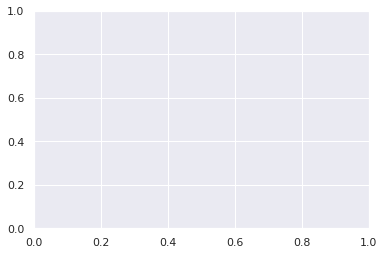

     |████████████████████████████████| 47 kB 3.7 kB/s eta 0:00:03
     |████████████████████████████████| 51 kB 431 kB/s eta 0:00:011


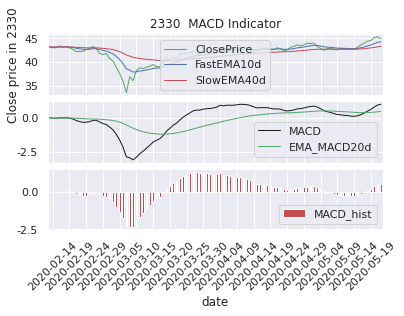

random item from list is:  2390
      Stockiid        Date   Open   High    Low  Close    Volume
0         2390  2010-01-04  14.55  14.55  13.30  13.30   6796734
1         2390  2010-01-05  13.45  13.55  12.50  12.65   2766707
2         2390  2010-01-06  12.65  12.85  12.45  12.65   2137857
3         2390  2010-01-07  12.70  13.00  12.35  12.35   1798190
4         2390  2010-01-08  12.35  12.85  11.90  12.50   3923270
...        ...         ...    ...    ...    ...    ...       ...
2585      2390  2020-07-13  23.90  24.65  21.10  21.10  38560689
2586      2390  2020-07-14  21.30  22.45  19.95  20.50  22833624
2587      2390  2020-07-15  20.90  21.75  19.75  20.45  23978000
2588      2390  2020-07-16  20.70  21.45  20.25  20.50  12735321
2589      2390  2020-07-17  20.70  21.00  18.45  18.45  20783966

[2590 rows x 7 columns]
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object
             Open   High    Low  Close      Volume
Date    

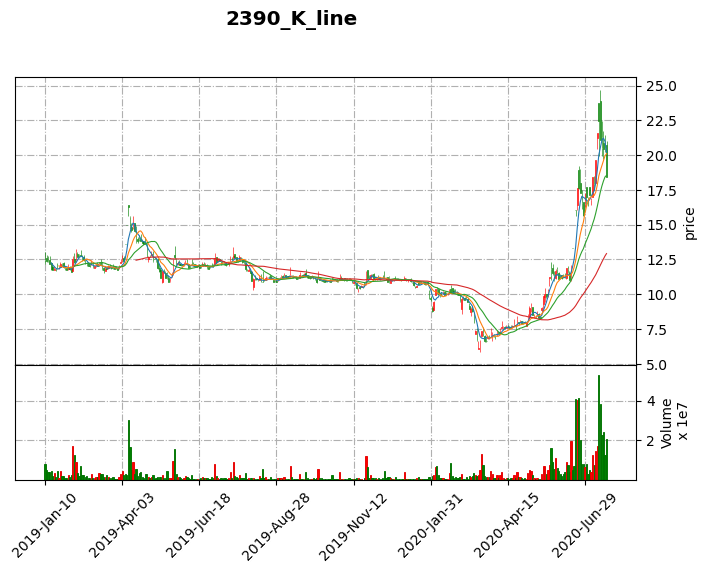

<function matplotlib.pyplot.show(*args, **kw)>

In [4]:
import sys
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import json, pymysql
import pandas as pd
import mplfinance as mpf 
from matplotlib.pylab import date2num 

from cycler import cycler
import matplotlib as mpl
import random
#from talib import abstract
%matplotlib inline

#隨機選擇一支股票畫圖(測試)
Stockiid={'台泥': '1101', '亞泥': '1102', '嘉泥': '1103', '環泥': '1104', '幸福': '1108', '信大': '1109', '東泥': '1110', '味全': '1201', '味王': '1203', '大成': '1210', '大飲': '1213', '卜蜂': '1215', '統一': '1216', '愛之味': '1217', '泰山': '1218', '福壽': '1219', '台榮': '1220', '福懋油': '1225', '佳格': '1227', '聯華': '1229', '聯華食': '1231', '大統益': '1232', '天仁': '1233', '黑松': '1234', '興泰': '1235', '宏亞': '1236', '鮮活果汁-KY': '1256', '台塑': '1301', '南亞': '1303', '台聚': '1304', '華夏': '1305', '三芳': '1307', '亞聚': '1308', '台達化': '1309', '台苯': '1310', '國喬': '1312', '聯成': '1313', '中石化': '1314', '達新': '1315', '上曜': '1316', '東陽': '1319', '大洋': '1321', '永裕': '1323', '地球': '1324', '恆大': '1325', '台化': '1326', '再生-KY': '1337', '廣華-KY': '1338', '昭輝': '1339', '勝悅-KY': '1340', '富林-KY': '1341', '遠東新': '1402', '新纖': '1409', '南染': '1410', '宏洲': '1413', '東和': '1414', '廣豐': '1416', '嘉裕': '1417', '東華': '1418', '新紡': '1419', '利華': '1423', '大魯閣': '1432', '福懋': '1434', '中福': '1435', '華友聯': '1436', '勤益控': '1437', '裕豐': '1438', '中和': '1439', '南紡': '1440', '大東': '1441', '名軒': '1442', '立益': '1443', '力麗': '1444', '大宇': '1445', '宏和': '1446', '力鵬': '1447', '佳和': '1449', '年興': '1451', '宏益': '1452', '大將': '1453', '台富': '1454', '集盛': '1455', '怡華': '1456', '宜進': '1457', '聯發': '1459', '宏遠': '1460', '強盛': '1463', '得力': '1464', '偉全': '1465', '聚隆': '1466', '南緯': '1467', '昶和': '1468', '大統新創': '1470', '首利': '1471', '三洋紡': '1472', '台南': '1473', '弘裕': '1474', '本盟': '1475', '儒鴻': '1476', '聚陽': '1477', '士電': '1503', '東元': '1504', '正道': '1506', '永大': '1507', '瑞利': '1512', '中興電': '1513', '亞力': '1514', '力山': '1515', '川飛': '1516', '利奇': '1517', '華城': '1519', '大億': '1521', '堤維西': '1522', '耿鼎': '1524', '江申': '1525', '日馳': '1526', '鑽全': '1527', '恩德': '1528', '樂士': '1529', '亞崴': '1530', '高林股': '1531', '勤美': '1532', '車王電': '1533', '中宇': '1535', '和大': '1536', '廣隆': '1537', '正峰新': '1538', '巨庭': '1539', '喬福': '1540', '錩泰': '1541', '伸興': '1558', '中砂': '1560', '倉佑': '1568', '信錦': '1582', '程泰': '1583', '吉茂': '1587', '永冠-KY': '1589', '亞德客-KY': '1590', '英瑞-KY': '1592', '岱宇': '1598', '華電': '1603', '聲寶': '1604', '華新': '1605', '華榮': '1608', '大亞': '1609', '中電': '1611', '宏泰': '1612', '三洋電': '1614', '大山': '1615', '億泰': '1616', '榮星': '1617', '合機': '1618', '艾美特-KY': '1626', '中化': '1701', '南僑': '1702', '葡萄王': '1707', '東鹼': '1708', '和益': '1709', '東聯': '1710', '永光': '1711', '興農': '1712', '國化': '1713', '和桐': '1714', '長興': '1717', '中纖': '1718', '生達': '1720', '三晃': '1721', '台肥': '1722', '中碳': '1723', '台硝': '1724', '元禎': '1725', '永記': '1726', '中華化': '1727', '花仙子': '1730', '美吾華': '1731', '毛寶': '1732', '五鼎': '1733', '杏輝': '1734', '日勝化': '1735', '喬山': '1736', '臺鹽': '1737', '寶齡富錦': '1760', '中化生': '1762', '勝一': '1773', '展宇': '1776', '和康生': '1783', '科妍': '1786', '神隆': '1789', '美時': '1795', '台玻': '1802', '寶徠': '1805', '冠軍': '1806', '潤隆': '1808', '中釉': '1809', '和成': '1810', '凱撒衛': '1817', '台紙': '1902', '士紙': '1903', '正隆': '1904', '華紙': '1905', '寶隆': '1906', '永豐餘': '1907', '榮成': '1909', '中鋼': '2002', '東和鋼鐵': '2006', '燁興': '2007', '高興昌': '2008', '第一銅': '2009', '春源': '2010', '春雨': '2012', '中鋼構': '2013', '中鴻': '2014', '豐興': '2015', '官田鋼': '2017', '美亞': '2020', '聚亨': '2022', '燁輝': '2023', '志聯': '2024', '千興': '2025', '大成鋼': '2027', '威致': '2028', '盛餘': '2029', '彰源': '2030', '新光鋼': '2031', '新鋼': '2032', '佳大': '2033', '允強': '2034', '海光': '2038', '上銀': '2049', '川湖': '2059', '橋椿': '2062', '運錩': '2069', '南港': '2101', '泰豐': '2102', '台橡': '2103', '國際中橡': '2104', '正新': '2105', '建大': '2106', '厚生': '2107', '南帝': '2108', '華豐': '2109', '鑫永銓': '2114', '六暉-KY': '2115', '裕隆': '2201', '中華': '2204', '三陽工業': '2206', '和泰車': '2207', '台船': '2208', '裕日車': '2227', '劍麟': '2228', '為升': '2231', '宇隆': '2233', '百達-KY': '2236', '英利-KY': '2239', '宏旭-KY': '2243', '光寶科': '2301', '麗正': '2302', '聯電': '2303', '全友': '2305', '台達電': '2308', '金寶': '2312', '華通': '2313', '台揚': '2314', '楠梓電': '2316', '鴻海': '2317', '東訊': '2321', '中環': '2323', '仁寶': '2324', '國巨': '2327', '廣宇': '2328', '華泰': '2329', '台積電': '2330', '精英': '2331', '友訊': '2332', '旺宏': '2337', '光罩': '2338', '光磊': '2340', '茂矽': '2342', '華邦電': '2344', '智邦': '2345', '聯強': '2347', '海悅': '2348', '錸德': '2349', '順德': '2351', '佳世達': '2352', '宏碁': '2353', '鴻準': '2354', '敬鵬': '2355', '英業達': '2356', '華碩': '2357', '廷鑫': '2358', '所羅門': '2359', '致茂': '2360', '藍天': '2362', '矽統': '2363', '倫飛': '2364', '昆盈': '2365', '燿華': '2367', '金像電': '2368', '菱生': '2369', '大同': '2371', '震旦行': '2373', '佳能': '2374', '凱美': '2375', '技嘉': '2376', '微星': '2377', '瑞昱': '2379', '虹光': '2380', '廣達': '2382', '台光電': '2383', '群光': '2385', '精元': '2387', '威盛': '2388', '云辰': '2390', '正崴': '2392', '億光': '2393', '研華': '2395', '友通': '2397', '映泰': '2399', '凌陽': '2401', '毅嘉': '2402', '漢唐': '2404', '浩鑫': '2405', '國碩': '2406', '南亞科': '2408', '友達': '2409', '中華電': '2412', '環科': '2413', '精技': '2414', '錩新': '2415', '圓剛': '2417', '仲琦': '2419', '新巨': '2420', '建準': '2421', '固緯': '2423', '隴華': '2424', '承啟': '2425', '鼎元': '2426', '三商電': '2427', '興勤': '2428', '銘旺科': '2429', '燦坤': '2430', '聯昌': '2431', '互盛電': '2433', '統懋': '2434', '偉詮電': '2436', '翔耀': '2438', '美律': '2439', '太空梭': '2440', '超豐': '2441', '新美齊': '2442', '億麗': '2443', '兆勁': '2444', '晶電': '2448', '京元電子': '2449', '神腦': '2450', '創見': '2451', '凌群': '2453', '聯發科': '2454', '全新': '2455', '奇力新': '2456', '飛宏': '2457', '義隆': '2458', '敦吉': '2459', '建通': '2460', '光群雷': '2461', '良得電': '2462', '盟立': '2464', '麗臺': '2465', '冠西電': '2466', '志聖': '2467', '華經': '2468', '資通': '2471', '立隆電': '2472', '可成': '2474', '鉅祥': '2476', '美隆電': '2477', '大毅': '2478', '敦陽科': '2480', '強茂': '2481', '連宇': '2482', '百容': '2483', '希華': '2484', '兆赫': '2485', '一詮': '2486', '漢平': '2488', '瑞軒': '2489', '吉祥全': '2491', '華新科': '2492', '揚博': '2493', '普安': '2495', '卓越': '2496', '怡利電': '2497', '宏達電': '2498', '東貝': '2499', '國建': '2501', '國產': '2504', '國揚': '2505', '太設': '2506', '全坤建': '2509', '太子': '2511', '龍邦': '2514', '中工': '2515', '新建': '2516', '冠德': '2520', '京城': '2524', '宏璟': '2527', '皇普': '2528', '華建': '2530', '宏盛': '2534', '達欣工': '2535', '宏普': '2536', '聯上發': '2537', '基泰': '2538', '櫻花建': '2539', '愛山林': '2540', '興富發': '2542', '皇昌': '2543', '皇翔': '2545', '根基': '2546', '日勝生': '2547', '華固': '2548', '潤弘': '2597', '益航': '2601', '長榮': '2603', '新興': '2605', '裕民': '2606', '榮運': '2607', '嘉里大榮': '2608', '陽明': '2609', '華航': '2610', '志信': '2611', '中航': '2612', '中櫃': '2613', '東森': '2614', '萬海': '2615', '山隆': '2616', '台航': '2617', '長榮航': '2618', '亞航': '2630', '台灣高鐵': '2633', '漢翔': '2634', '台驊投控': '2636', '慧洋-KY': '2637', '宅配通': '2642', '萬企': '2701', '華園': '2702', '國賓': '2704', '六福': '2705', '第一店': '2706', '晶華': '2707', '遠雄來': '2712', '夏都': '2722', '美食-KY': '2723', '王品': '2727', '雄獅': '2731', '寒舍': '2739', '雲品': '2748', '彰銀': '2801', '京城銀': '2809', '台中銀': '2812', '旺旺保': '2816', '華票': '2820', '中壽': '2823', '台產': '2832', '臺企銀': '2834', '高雄銀': '2836', '聯邦銀': '2838', '台開': '2841', '遠東銀': '2845', '安泰銀': '2849', '新產': '2850', '中再保': '2851', '第一保': '2852', '統一證': '2855', '三商壽': '2867', '華南金': '2880', '富邦金': '2881', '國泰金': '2882', '開發金': '2883', '玉山金': '2884', '元大金': '2885', '兆豐金': '2886', '台新金': '2887', '新光金': '2888', '國票金': '2889', '永豐金': '2890', '中信金': '2891', '第一金': '2892', '王道銀行': '2897', '欣欣': '2901', '遠百': '2903', '匯僑': '2904', '三商': '2905', '高林': '2906', '特力': '2908', '統領': '2910', '麗嬰房': '2911', '統一超': '2912', '農林': '2913', '潤泰全': '2915', '鼎固-KY': '2923', '淘帝-KY': '2929', '客思達-KY': '2936', '凱羿-KY': '2939', '歐格': '3002', '健和興': '3003', '豐達科': '3004', '神基': '3005', '晶豪科': '3006', '大立光': '3008', '華立': '3010', '今皓': '3011', '晟銘電': '3013', '聯陽': '3014', '全漢': '3015', '嘉晶': '3016', '奇鋐': '3017', '同開': '3018', '亞光': '3019', '鴻名': '3021', '威強電': '3022', '信邦': '3023', '憶聲': '3024', '星通': '3025', '禾伸堂': '3026', '盛達': '3027', '增你強': '3028', '零壹': '3029', '德律': '3030', '佰鴻': '3031', '偉訓': '3032', '威健': '3033', '聯詠': '3034', '智原': '3035', '文曄': '3036', '欣興': '3037', '全台': '3038', '遠見': '3040', '揚智': '3041', '晶技': '3042', '科風': '3043', '健鼎': '3044', '台灣大': '3045', '建碁': '3046', '訊舟': '3047', '益登': '3048', '和鑫': '3049', '鈺德': '3050', '力特': '3051', '夆典': '3052', '立萬利': '3054', '蔚華科': '3055', '總太': '3056', '喬鼎': '3057', '立德': '3058', '華晶科': '3059', '銘異': '3060', '建漢': '3062', '日電貿': '3090', '聯傑': '3094', '一零四': '3130', '正達': '3149', '景岳': '3164', '大量': '3167', '景碩': '3189', '全科': '3209', '晟鈦': '3229', '緯創': '3231', '虹冠電': '3257', '昇陽': '3266', '勝德': '3296', '昇貿': '3305', '聯德': '3308', '閎暉': '3311', '弘憶股': '3312', '同泰': '3321', '泰碩': '3338', '麗清': '3346', '奇偶': '3356', '新日興': '3376', '明泰': '3380', '新世紀': '3383', '玉晶光': '3406', '京鼎': '3413', '融程電': '3416', '譁裕': '3419', '台端': '3432', '榮創': '3437', '創意': '3443', '聯鈞': '3450', '晶睿': '3454', '群創': '3481', '誠研': '3494', '維熹': '3501', '揚明光': '3504', '華擎': '3515', '柏騰': '3518', '安馳': '3528', '晶相光': '3530', '台勝科': '3532', '嘉澤': '3533', '晶彩科': '3535', '誠創': '3536', '州巧': '3543', '敦泰': '3545', '聯穎': '3550', '嘉威': '3557', '牧德': '3563', '聯合再生': '3576', '辛耘': '3583', '通嘉': '3588', '艾笛森': '3591', '力銘': '3593', '智易': '3596', '宏致': '3605', '谷崧': '3607', '碩天': '3617', '洋華': '3622', '達邁': '3645', '健策': '3653', '世芯-KY': '3661', '貿聯-KY': '3665', '圓展': '3669', 'TPK-KY': '3673', '新至陞': '3679', '亞太電': '3682', '達能': '3686', '海華': '3694', '隆達': '3698', '大眾控': '3701', '大聯大': '3702', '欣陸': '3703', '合勤控': '3704', '永信': '3705', '神達': '3706', '上緯投控': '3708', '日月光投控': '3711', '永崴投控': '3712', '佳醫': '4104', '雃博': '4106', '懷特': '4108', '旭富': '4119', '亞諾法': '4133', '麗豐-KY': '4137', '龍燈-KY': '4141', '國光生': '4142', '康聯-KY': '4144', '全宇生技-KY': '4148 ', '訊映': '4155', '承業醫': '4164', '佐登-KY': '4190', '炎洲': '4306', '如興': '4414', '利勤': '4426', '廣越': '4438', '冠星-KY': '4439', '東台': '4526', '瑞智': '4532', '拓凱': '4536', '全球傳動': '4540', '銘鈺': '4545', '智伸科': '4551', '力達-KY': '4552', '氣立': '4555', '永新-KY': '4557', '強信-KY': '4560', '穎漢': '4562', '元翎': '4564', '時碩工業': '4566', '鈞興-KY': '4571', '駐龍': '4572', '大銀微系統': '4576', '光隆精密-KY': '4581', '德淵': '4720', '國精化': '4722', '信昌化': '4725', '華廣': '4737', '康普': '4739', '台耀': '4746', '三福化': '4755', '材料-KY': '4763', '雙鍵': '4764', '南寶': '4766', '日成-KY': '4807', '遠傳': '4904', '正文': '4906', '聯德控股-KY': '4912', '致伸': '4915', '事欣科': '4916', '新唐': '4919', '泰鼎-KY': '4927', '燦星網': '4930', '太極': '4934', '茂林-KY': '4935', '和碩': '4938', '嘉彰': '4942', '康控-KY': '4943', '凌通': '4952', '光鋐': '4956', '臻鼎-KY': '4958', '誠美材': '4960', '天鈺': '4961', '十銓': '4967', '立積': '4968', '佳凌': '4976', '眾達-KY': '4977', '榮科': '4989', '傳奇': '4994', '鑫禾': '4999', '三星': '5007', '訊連': '5203', '科嘉-KY': '5215', '東科-KY': '5225', '達興材料': '5234', '乙盛-KY': '5243', '虹堡': '5258', '鎧勝-KY': '5264', '祥碩': '5269', '禾聯碩': '5283', 'jpp-KY': '5284', '界霖': '5285', '豐祥-KY': '5288', '敦南': '5305', '中磊': '5388', '崇越': '5434', '瀚宇博': '5469', '松翰': '5471', '慧友': '5484', '建國': '5515', '隆大': '5519', '工信': '5521', '遠雄': '5522', '順天': '5525', '鄉林': '5531', '皇鼎': '5533', '長虹': '5534', '東明-KY': '5538', '遠雄港': '5607', '四維航': '5608', '鳳凰': '5706', '中租-KY': '5871', '上海商銀': '5876', '合庫金': '5880', '台南-KY': '5906', '大洋-KY': '5907', '群益證': '6005', '群益期': '6024', '競國': '6108', '聚碩': '6112', '鎰勝': '6115', '彩晶': '6116', '迎廣': '6117', '達運': '6120', '上福': '6128', '鈞泰': '6131', '金橋': '6133', '富爾特': '6136', '亞翔': '6139', '柏承': '6141', '友勁': '6142', '百一': '6152', '嘉聯益': '6153', '鈞寶': '6155', '華興': '6164', '捷泰': '6165', '凌華': '6166', '宏齊': '6168', '互億': '6172', '瑞儀': '6176', '達麗': '6177', '關貿': '6183', '大豐電': '6184', '豐藝': '6189', '精成科': '6191', '巨路': '6192', '帆宣': '6196', '佳必琪': '6197', '亞弘電': '6201', '盛群': '6202', '詮欣': '6205', '飛捷': '6206', '今國光': '6209', '聯茂': '6213', '精誠': '6214', '和椿': '6215', '居易': '6216', '聚鼎': '6224', '天瀚': '6225', '光鼎': '6226', '超眾': '6230', '華孚': '6235', '力成': '6239', '迅杰': '6243', '定穎': '6251', '矽格': '6257', '台郡': '6269', '同欣電': '6271', '宏正': '6277', '台表科': '6278', '全國電': '6281', '康舒': '6282', '淳安': '6283', '啟碁': '6285', '聯嘉': '6288', '華上': '6289', '悅城': '6405', '旭隼': '6409', '群電': '6412', '樺漢': '6414', '矽力-KY': '6415', '瑞祺電通': '6416', '光麗-KY': '6431', '光聖': '6442', '元晶': '6443', '鈺邦': '6449', '訊芯-KY': '6451', '康友-KY': '6452', 'GIS-KY': '6456', '台數科': '6464', '安集': '6477', '晶碩': '6491', '南六': '6504', '台塑化': '6505', '捷敏-KY': '6525', '愛普': '6531', '晶心科': '6533', '泰福-KY': '6541', '易華電': '6552', '興能高': '6558', '虹揚-KY': '6573', '研揚': '6579', '鋼聯': '6581', '申豐': '6582', '動力-KY': '6591', '和潤企業': '6592', '帝寶': '6605', '必應': '6625', '基士德-KY': '6641', '科定': '6655', '羅麗芬-KY': '6666', '中揚光': '6668', '緯穎': '6669', '復盛應用': '6670', '三能-KY': '6671', '騰輝電子-KY': '6672', '鋐寶科技': '6674', '旭暉應材': '6698', '惠特': '6706', '嘉基': '6715', '台通': '8011', '矽創': '8016', '尖點': '8021', '昇陽半導體': '8028', '雷虎': '8033', '台虹': '8039', '南電': '8046', '長華': '8070', '陞泰': '8072', '致新': '8081', '華冠': '8101', '瀚荃': '8103', '錸寶': '8104', '凌巨': '8105', '華東': '8110', '至上': '8112', '振樺電': '8114', '福懋科': '8131', '南茂': '8150', '達方': '8163', '無敵': '8201', '勤誠': '8210', '志超': '8213', '明基材': '8215', '寶一': '8222', '菱光': '8249', '富鼎': '8261', '宇瞻': '8271', '日友': '8341', '建新國際': '8367', '羅昇': '8374', '百和興業-KY': '8404', '福貞-KY': '8411', '可寧衛': '8422', '基勝-KY': '8427', '金麗-KY': '8429', '威宏-KY': '8442', '阿瘦': '8443', '富邦媒': '8454', '柏文': '8462', '潤泰材': '8463', '億豐': '8464', '美吉吉-KY': '8466', '波力-KY': '8467', '山林水': '8473', '東哥遊艇': '8478', '泰昇-KY': '8480', '政伸': '8481', '商億-KY': '8482', '吉源-KY': '8488', '格威傳媒': '8497', '鼎炫-KY': '8499', '台汽電': '8926', '新天地': '8940', '高力': '8996', '鈺齊-KY': '9802', '台火': '9902', '寶成': '9904', '大華': '9905', '欣巴巴': '9906', '統一實': '9907', '大台北': '9908', '豐泰': '9910', '櫻花': '9911', '偉聯': '9912', '美利達': '9914', '中保科': '9917', '欣天然': '9918', '康那香': '9919', '巨大': '9921', '福興': '9924', '新保': '9925', '新海': '9926', '泰銘': '9927', '中視': '9928', '秋雨': '9929', '中聯資源': '9930', '欣高': '9931', '中鼎': '9933', '成霖': '9934', '慶豐富': '9935', '全國': '9937', '百和': '9938', '宏全': '9939', '信義': '9940', '裕融': '9941', '茂順': '9942', '好樂迪': '9943', '新麗': '9944', '潤泰新': '9945', '三發地產': '9946', '佳龍': '9955', '世紀鋼': '9958', '茂生農經': '1240', '其祥-KY': '1258', '安心': '1259', '德麥': '1264', '漢來美食': '1268', '恩得利': '1333', '台翰': '1336', '精華': '1565', '濱川': '1569', '力肯': '1570', '新麥': '1580', '精剛': '1584', '和勤': '1586', '駿吉-KY': '1591', '祺驊': '1593', '川寶': '1595', '直得': '1597', '宏佳騰': '1599', '台蠟': '1742', '南光': '1752', '生泰': '1777', '合世': '1781', '訊聯': '1784', '光洋科': '1785', '杏昌': '1788', '金穎生技': '1796', '易威': '1799', '寶利徠': '1813', '富喬': '1815', '唐榮': '2035', '風青': '2061', '世鎧': '2063', '晉椿': '2064', '世豐': '2065', '世德': '2066', '嘉鋼': '2067', '精湛': '2070', '大甲': '2221', '泰茂': '2230', '謚源': '2235', '綠意': '2596', '大車隊': '2640', '正德': '2641', '捷迅': '2643', '晶悅': '2718', '燦星旅': '2719', '富驛-KY': '2724', '雅茗-KY': '2726', '瓦城': '2729', '六角': '2732', '易飛網': '2734', '高野': '2736', '天蔥': '2740', '山富': '2743', '五福': '2745', '豆府': '2752', '滿心': '2916', '東凌-KY': '2924', '誠品生活': '2926', '紅馬-KY': '2928', '集雅社': '2937', '泰偉': '3064', '李洲': '3066', '全域': '3067', '協禧': '3071', '凱柏實業': '3073', '僑威': '3078', '聯亞': '3081', '網龍': '3083', '新零售': '3085', '華義': '3086', '艾訊': '3088', '元炬': '3089', '鴻碩': '3092', '港建': '3093', '及成': '3095', '穩懋': '3105', '好德': '3114', '寶島極': '3115', '進階': '3118', '笙泉': '3122', '昇銳': '3128', '弘塑': '3131', '晶宏': '3141', '新揚科': '3144', '大綜': '3147', '璟德': '3152', '精確': '3162', '波若威': '3163', '亞信': '3169', '新洲': '3171', '基亞': '3176', '公準': '3178', '鑫龍騰': '3188', '和進': '3191', '樺晟': '3202', '佰研': '3205', '志豐': '3206', '耀勝': '3207', '順達': '3211', '茂訊': '3213', '優群': '3217', '大學光': '3218', '倚強股份': '3219', '台嘉碩': '3221', '三顧': '3224', '至寶電': '3226', '原相': '3227', '金麗科': '3228', '錦明': '3230', '昱捷': '3232', '光環': '3234', '千如': '3236', '海灣': '3252', '鑫創': '3259', '威剛': '3260', '欣銓': '3264', '台星科': '3265', '海德威': '3268', '東碩': '3272', '宇環': '3276', '太普高': '3284', '微端': '3285', '廣寰科': '3287', '點晶': '3288', '宜特': '3289', '東浦': '3290', '鈊象': '3293', '英濟': '3294', '杭特': '3297', '岱稜': '3303', '鼎天': '3306', '佳穎': '3310', '斐成': '3313', '尼克森': '3317', '建舜電': '3322', '加百裕': '3323', '雙鴻': '3324', '旭品': '3325', '幸康': '3332', '泰谷': '3339', '律勝': '3354', '尚立': '3360', '先進光': '3362', '上詮': '3363', '典範': '3372', '熱映': '3373', '精材': '3374', '彬台': '3379', '崇越電': '3388', '旭軟': '3390', '漢科': '3402', '台興': '3426', '哲固': '3434', '類比科': '3438', '聯一光': '3441', '利機': '3444', '由田': '3455', '進泰電子': '3465', '致振': '3466', '安勤': '3479', '力致': '3483', '崧騰': '3484', '森寶': '3489', '單井': '3490', '昇達科': '3491', '長盛': '3492', '陽程': '3498', '環天科': '3499', '位速': '3508', '矽瑪': '3511', '皇龍': '3512', '亞帝歐': '3516', '振維': '3520', '鴻翊': '3521', '御頂': '3522', '迎輝': '3523', '凡甲': '3526', '聚積': '3527', '力旺': '3529', '先益': '3531', '堡達': '3537', '曜越': '3540', '西柏': '3541', '宇峻': '3546', '兆利': '3548', '世禾': '3551', '同致': '3552', '重鵬': '3555', '禾瑞亞': '3556', '神準': '3558', '其陽': '3564', '逸昌': '3567', '大塚': '3570', '泓格': '3577', '友威科': '3580', '博磊': '3581', '閎康': '3587', '磐儀': '3594', '映興': '3597', '東林': '3609', '鼎翰': '3611', '安可': '3615', '富晶通': '3623', '光頡': '3624', '西勝': '3625', '盈正': '3628', '地心引力': '3629', '新鉅科': '3630', '晟楠': '3631', '研勤': '3632', '駿熠電': '3642', '艾恩特': '3646', '精聯': '3652', '鑫科': '3663', '安瑞-KY': '3664', '光耀': '3666', '康聯訊': '3672', '德微': '3675', '家登': '3680', '榮昌': '3684', '元創精密': '3685', '歐買尬': '3687', '湧德': '3689', '碩禾': '3691', '營邦': '3693', '漢磊': '3707', '鑫聯大投控': '3709', '連展投控': '3710', '新晶投控': '3713', '永日': '4102', '東洋': '4105', '邦特': '4107', '加捷生醫': '4109', '濟生': '4111', '聯上': '4113', '健喬': '4114', '明基醫': '4116', '友華': '4120', '優盛': '4121', '晟德': '4123', '太醫': '4126', '天良': '4127', '中天': '4128', '聯合': '4129', '健亞': '4130', '晶宇': '4131', '曜亞': '4138', '馬光-KY': '4139', '中裕': '4147', '台微體': '4152', '鈺緯': '4153', '康樂-KY': '4154', '太景*-KY': '4157', '創源': '4160', '聿新科': '4161', '智擎': '4162', '鐿鈦': '4163', '展旺': '4167', '醣聯': '4168', '瑞基': '4171', '久裕': '4173', '浩鼎': '4174', '杏一': '4175', '福永生技': '4183', '安克': '4188', '杏國': '4192', '環瑞醫': '4198', '中華食': '4205', '環泰': '4207', '信立': '4303', '勝昱': '4304', '世坤': '4305', '東隆興': '4401', '福大': '4402', '新昕纖': '4406', '飛寶企業': '4413', '三圓': '4416', '金洲': '4417', '元勝': '4419', '光明': '4420', '聚紡': '4429', '耀億': '4430', '銘旺實': '4432', '興采': '4433', '健信': '4502', '金雨': '4503', '崇友': '4506', '高鋒': '4510', '福裕': '4513', '永彰': '4523', '方土霖': '4527', '江興鍛': '4528', '淳紳': '4529', '宏易': '4530', '協易機': '4533', '慶騰': '4534', '至興': '4535', '大詠城': '4538', '晟田': '4541', '科嶠': '4542', '萬在': '4543', '桓達': '4549', '長佳': '4550', '橙的': '4554', '旭然': '4556', '健椿': '4561', '百德': '4563', '科際精密': '4568', '捷流閥業': '4580', '唐鋒': '4609', '中美實': '4702', '大恭': '4706', '磐亞': '4707', '永純': '4711', '南璋': '4712', '永捷': '4714', '大立': '4716', '美琪瑪': '4721', '永昕': '4726', '雙美': '4728', '熒茂': '4729', '豪展': '4735', '泰博': '4736', '泓瀚': '4741', '合一': '4743', '皇將': '4744', '合富-KY': '4745', '強生': '4747', '國碳科': '4754', '勤凱': '4760', '誠泰科技': '4767', 'VHQ-KY': '4803', '大略-KY': '4804', '昇華': '4806', '聯光通': '4903', '台聯電': '4905', '富宇': '4907', '前鼎': '4908', '新復興': '4909', '德英': '4911', '欣厚-KY': '4924', '新盛力': '4931', '友輝': '4933', '亞電': '4939', '兆遠': '4944', '辣椒': '4946', '昂寶-KY': '4947', '牧東': '4950', '緯軟': '4953', '譜瑞-KY': '4966', 'IET-KY': '4971', '湯石照明': '4972', '廣穎': '4973', '亞泰': '4974', '華星光': '4979', '科誠': '4987', '環宇-KY': '4991', '晶達': '4995', '榮剛': '5009', '久陽': '5011', '強新': '5013', '建錩': '5014', '華祺': '5015', '松和': '5016', '富強': '5102', '凱衛': '5201', '力新': '5202', '中茂': '5205', '坤悅': '5206', '新鼎': '5209', '寶碩': '5210', '蒙恬': '5211', '凌網': '5212', '亞昕': '5213', '萬達光電': '5220', '安力-KY': '5223', '立凱-KY': '5227', '雷笛克光學': '5230', '智晶': '5245', '天鉞電': '5251', '智崴': '5263', '笙科': '5272', '信驊': '5274', '達輝-KY': '5276', '尚凡': '5278', '大峽谷-KY': '5281', '數字': '5287', '宜鼎': '5289', '邑昇': '5291', '杰力': '5299', '寶得利': '5301', '太欣': '5302', '鼎創達': '5304', '桂盟': '5306', '系統電': '5309', '天剛': '5310', '寶島科': '5312', '世紀': '5314', '光聯': '5315', '友銓': '5321', '士開': '5324', '華容': '5328', '建榮': '5340', '立衛': '5344', '天揚': '5345', '世界': '5347', '系通': '5348', '先豐': '5349', '鈺創': '5351', '台林': '5353', '佳總': '5355', '協益': '5356', '力麗店': '5364', '中光電': '5371', '合正': '5381', '金利': '5383', '青雲': '5386', '應華': '5392', '慕康生醫': '5398', '中菲': '5403', '國眾': '5410', '台半': '5425', '振發': '5426', '達威': '5432', '東友': '5438', '高技': '5439', '均豪': '5443', '寶聯通': '5450', '佶優': '5452', '昇益': '5455', '宣德': '5457', '同協': '5460', '霖宏': '5464', '富驊': '5465', '凱鈺': '5468', '聰泰': '5474', '德宏': '5475', '智冠': '5478', '新華': '5481', '中美晶': '5483', '通泰': '5487', '松普': '5488', '彩富': '5489', '同亨': '5490', '三聯': '5493', '凱崴': '5498', '永信建': '5508', '德昌': '5511', '力麒': '5512', '三豐': '5514', '雙喜': '5516', '力泰': '5520', '豐謙': '5523', '志嘉': '5529', '龍巖': '5530', '聖暉': '5536', '崇佑-KY': '5543', '台聯櫃': '5601', '陸海': '5603', '中連貨': '5604', '中菲行': '5609', '劍湖山': '5701', '亞都': '5703', '老爺知': '5704', '日盛金': '5820', '致和證': '5864', '台名': '5878', '德記': '5902', '全家': '5903', '寶雅': '5904', '南仁湖': '5905', '宏遠證': '6015', '康和證': '6016', '大展證': '6020', '大慶證': '6021', '元大期': '6023', '福邦證': '6026', '寬魚國際': '6101', '合邦': '6103', '創惟': '6104', '亞元': '6109', '大宇資': '6111', '亞矽': '6113', '久威': '6114', '建達': '6118', '新普': '6121', '擎邦': '6122', '上奇': '6123', '業強': '6124', '廣運': '6125', '信音': '6126', '九豪': '6127', '普誠': '6129', '星寶國際': '6130', '萬旭': '6134', '茂達': '6138', '訊達': '6140', '振曜': '6143', '得利影': '6144', '耕興': '6146', '頎邦': '6147', '驊宏資': '6148', '撼訊': '6150', '晉倫': '6151', '順發': '6154', '松上': '6156', '禾昌': '6158', '欣技': '6160', '捷波': '6161', '華電網': '6163', '久正': '6167', '昱泉': '6169', '統振': '6170', '亞銳士': '6171', '信昌電': '6173', '安碁': '6174', '立敦': '6175', '亞通': '6179', '橘子': '6180', '合晶': '6182', '幃翔': '6185', '新潤': '6186', '萬潤': '6187', '廣明': '6188', '萬泰科': '6190', '育富': '6194', '詩肯': '6195', '凌泰': '6198', '天品': '6199', '海韻電': '6203', '艾華': '6204', '雷科': '6207', '日揚': '6208', '慶生': '6210', '理銘': '6212', '中探針': '6217', '豪勉': '6218', '富旺': '6219', '岳豐': '6220', '晉泰': '6221', '上揚': '6222', '旺矽': '6223', '茂綸': '6227', '全譜': '6228', '研通': '6229', '系微': '6231', '旺玖': '6233', '高僑': '6234', '康呈': '6236', '驊訊': '6237', '勝麗': '6238', '松崗': '6240', '易通展': '6241', '立康': '6242', '茂迪': '6244', '立端': '6245', '臺龍': '6246', '淇譽電': '6247', '沛波': '6248', '百徽': '6259', '久元': '6261', '普萊德': '6263', '富裔': '6264', '方土昶': '6265', '泰詠': '6266', '倍微': '6270', '台燿': '6274', '元山': '6275', '安鈦克': '6276', '胡連': '6279', '佳邦': '6284', '元隆': '6287', '良維': '6290', '沛亨': '6291', '迅德': '6292', '智基': '6294', '通訊-KY': '6404', '晶焱': '6411', '韋僑': '6417', '詠昇': '6418', '京晨科': '6419', '易發': '6425', '統新': '6426', '今展科': '6432', '大中': '6435', '迅得': '6438', '廣錠': '6441', '藥華藥': '6446', '紘康': '6457', '益得': '6461', '神盾': '6462', '威潤': '6465', '大樹': '6469', '宇智': '6470', '保瑞': '6472', '弘煜科': '6482', '點序': '6485', '互動': '6486', '環球晶': '6488', '生華科': '6492', '九齊': '6494', '科懋': '6496', '亞獅康-KY': '6497 ', '益安': '6499', '雙邦': '6506', '惠光': '6508', '聚和': '6509', '精測': '6510', '啟發電': '6512', '芮特-KY': '6514', '勤崴國際': '6516', '達爾膚': '6523', '明達醫': '6527', '創威': '6530', '瑞耘': '6532', '順藥': '6535', '倉和': '6538', '隆中': '6542', '高端疫苗': '6547', '長科*': '6548', '勝品': '6556', '欣普羅': '6560', '是方': '6561', '宏觀': '6568', '醫揚': '6569', '維田': '6570', '霈方': '6574', '逸達': '6576', '勁豐': '6577', '達邦蛋白': '6578', '台康生技': '6589', '普鴻': '6590', '台灣銘板': '6593', '展匯科': '6594', '寬宏藝術': '6596', '富強鑫': '6603', '瀧澤科': '6609', '奈米醫材': '6612', '朋億': '6613', '慧智': '6615', '特昇-KY': '6616', '萬年清': '6624', '泰金-KY': '6629', '均華': '6640', '富致': '6642', 'M31': '6643', '台生材': '6649', '天正國際': '6654', '樂斯科': '6662', '群翊': '6664', '信紘科': '6667', '鈺太': '6679', '鑫創電子': '6680', '雍智科技': '6683', '安碁資訊': '6690', '東捷資訊': '6697', '應廣': '6716', '崑鼎': '6803', '邑錡': '7402', '佑華': '8024', '鈦昇': '8027', '光菱': '8032', '榮群': '8034', '長園科': '8038', '九暘': '8040', '金山電': '8042', '蜜望實': '8043', '網家': '8044', '星雲': '8047', '德勝': '8048', '晶采': '8049', '廣積': '8050', '安國': '8054', '凱碩': '8059', '東捷': '8064', '來思達': '8066', '志旭': '8067', '全達': '8068', '元太': '8069', '能率網通': '8071', '鉅橡': '8074', '伍豐': '8076', '洛碁': '8077', '永利聯合': '8080', '瑞穎': '8083', '巨虹': '8084', '福華': '8085', '宏捷科': '8086', '華鎂鑫': '8087', '品安': '8088', '翔名': '8091', '建暐': '8092', '保銳': '8093', '擎亞': '8096', '常珵': '8097', '大世科': '8099', '大億金茂': '8107', '博大': '8109', '立碁': '8111', '越峰': '8121', '正淩': '8147', '博智': '8155', '天宇': '8171', '智捷': '8176', '加高': '8182', '精星': '8183', '新漢': '8234', '華宏': '8240', '朋程': '8255', '商丞': '8277', '生展': '8279', '英格爾': '8287', '泰藝': '8289', '尚茂': '8291', '群聯': '8299', '益張': '8342', '恒耀': '8349', '冠好': '8354', '金居': '8358', '千附': '8383', '金益鼎': '8390', '白紗科': '8401', '盛弘': '8403', '金可-KY': '8406', '商之器': '8409', '森田': '8410', '大國鋼': '8415', '實威': '8416', '捷必勝-KY': '8418', '明揚': '8420', '旭源': '8421', '保綠-KY': '8423', '惠普': '8424', '紅木-KY': '8426', '匯鑽科': '8431', '東生華': '8432', '弘帆': '8433', '鉅邁': '8435', '大江': '8436', '大地-KY': '8437', '綠電': '8440', '綠河-KY': '8444', '華研': '8446', '霹靂': '8450', '大拓-KY': '8455', '夠麻吉': '8472', '台境': '8476', '創業家': '8477', '三貝德': '8489', '裕國': '8905', '花王': '8906', '欣雄': '8908', '光隆': '8916', '欣泰': '8917', '沈氏': '8921', '時報': '8923', '大田': '8924', '北基': '8927', '鉅明': '8928', '富堡': '8929', '青鋼': '8930', '大汽電': '8931', '宏大': '8932', '愛地雅': '8933', '衡平': '8934', '邦泰': '8935', '國統': '8936', '合騏': '8937', '明安': '8938', '關中': '8941', '森鉅': '8942', '琉園': '9949', '萬國通': '9950', '皇田': '9951', '邁達康': '9960', '有益': '9962'}
List=[]
for iid in Stockiid.values():
    iid=iid.replace(' ','')
    List.append(iid)
test = random.choice(List)
test = int(test)
print("random item from list is: ", test)
#連接mysql索取資料
db = pymysql.connect(host='10.120.35.27',port=3306,user='dbuser2',passwd='aabb1234',db='Project_test')
cur = db.cursor()
cur.execute("select * from daily_trade_tw where stockiid=%d" % (test))

Data = [i for i in cur.fetchall()]
b = pd.DataFrame(Data)
b=b.rename(columns={0:'Stockiid',1:'Date',2:'Open',3:'High',4:'Low',5:'Close',6:'Volume'})
print(b)
b.index=pd.to_datetime(b.Date)

b=b.drop('Stockiid',axis=1).drop('Date',axis=1)
#print(b.dtypes)
b['Open']=b['Open'].astype(float)
b['High']=b['High'].astype(float)
b['Low']=b['Low'].astype(float)
b['Close']=b['Close'].astype(float)
b['Volume']=b['Volume'].astype(float)
print(b.dtypes)
print(b)
#畫圖的資料量
scale = 365
b = b[-scale:]
#開始畫圖
#將test屬性改回str才能放入標題
test = str(test)
#print(test)
jpg1 = dict(
    type='candle', 
    mav=(5, 10, 20,60), 
    volume=True, 
    title=test+'_K_line',    
    ylabel='price', 
    ylabel_lower='Volume', 
    figratio=(15, 10), 
    figscale=1,
    )

mc = mpf.make_marketcolors(
    up='red', 
    down='green', 
    edge='i', 
    wick='i', 
    volume='in', 
    inherit=True)
jpg2 = mpf.make_mpf_style(
    gridaxis='both', 
    gridstyle='-.', 
    y_on_right=True, 
    marketco lors=mc
    )
mpl.rcParams['lines.linewidth'] = .5

#plt.grid(True)

mpf.plot(b,**jpg1,style=jpg2)

plt.show


In [53]:
import random
Stockiid={'台泥': '1101', '亞泥': '1102', '嘉泥': '1103', '環泥': '1104', '幸福': '1108', '信大': '1109', '東泥': '1110', '味全': '1201', '味王': '1203', '大成': '1210', '大飲': '1213', '卜蜂': '1215', '統一': '1216', '愛之味': '1217', '泰山': '1218', '福壽': '1219', '台榮': '1220', '福懋油': '1225', '佳格': '1227', '聯華': '1229', '聯華食': '1231', '大統益': '1232', '天仁': '1233', '黑松': '1234', '興泰': '1235', '宏亞': '1236', '鮮活果汁-KY': '1256', '台塑': '1301', '南亞': '1303', '台聚': '1304', '華夏': '1305', '三芳': '1307', '亞聚': '1308', '台達化': '1309', '台苯': '1310', '國喬': '1312', '聯成': '1313', '中石化': '1314', '達新': '1315', '上曜': '1316', '東陽': '1319', '大洋': '1321', '永裕': '1323', '地球': '1324', '恆大': '1325', '台化': '1326', '再生-KY': '1337', '廣華-KY': '1338', '昭輝': '1339', '勝悅-KY': '1340', '富林-KY': '1341', '遠東新': '1402', '新纖': '1409', '南染': '1410', '宏洲': '1413', '東和': '1414', '廣豐': '1416', '嘉裕': '1417', '東華': '1418', '新紡': '1419', '利華': '1423', '大魯閣': '1432', '福懋': '1434', '中福': '1435', '華友聯': '1436', '勤益控': '1437', '裕豐': '1438', '中和': '1439', '南紡': '1440', '大東': '1441', '名軒': '1442', '立益': '1443', '力麗': '1444', '大宇': '1445', '宏和': '1446', '力鵬': '1447', '佳和': '1449', '年興': '1451', '宏益': '1452', '大將': '1453', '台富': '1454', '集盛': '1455', '怡華': '1456', '宜進': '1457', '聯發': '1459', '宏遠': '1460', '強盛': '1463', '得力': '1464', '偉全': '1465', '聚隆': '1466', '南緯': '1467', '昶和': '1468', '大統新創': '1470', '首利': '1471', '三洋紡': '1472', '台南': '1473', '弘裕': '1474', '本盟': '1475', '儒鴻': '1476', '聚陽': '1477', '士電': '1503', '東元': '1504', '正道': '1506', '永大': '1507', '瑞利': '1512', '中興電': '1513', '亞力': '1514', '力山': '1515', '川飛': '1516', '利奇': '1517', '華城': '1519', '大億': '1521', '堤維西': '1522', '耿鼎': '1524', '江申': '1525', '日馳': '1526', '鑽全': '1527', '恩德': '1528', '樂士': '1529', '亞崴': '1530', '高林股': '1531', '勤美': '1532', '車王電': '1533', '中宇': '1535', '和大': '1536', '廣隆': '1537', '正峰新': '1538', '巨庭': '1539', '喬福': '1540', '錩泰': '1541', '伸興': '1558', '中砂': '1560', '倉佑': '1568', '信錦': '1582', '程泰': '1583', '吉茂': '1587', '永冠-KY': '1589', '亞德客-KY': '1590', '英瑞-KY': '1592', '岱宇': '1598', '華電': '1603', '聲寶': '1604', '華新': '1605', '華榮': '1608', '大亞': '1609', '中電': '1611', '宏泰': '1612', '三洋電': '1614', '大山': '1615', '億泰': '1616', '榮星': '1617', '合機': '1618', '艾美特-KY': '1626', '中化': '1701', '南僑': '1702', '葡萄王': '1707', '東鹼': '1708', '和益': '1709', '東聯': '1710', '永光': '1711', '興農': '1712', '國化': '1713', '和桐': '1714', '長興': '1717', '中纖': '1718', '生達': '1720', '三晃': '1721', '台肥': '1722', '中碳': '1723', '台硝': '1724', '元禎': '1725', '永記': '1726', '中華化': '1727', '花仙子': '1730', '美吾華': '1731', '毛寶': '1732', '五鼎': '1733', '杏輝': '1734', '日勝化': '1735', '喬山': '1736', '臺鹽': '1737', '寶齡富錦': '1760', '中化生': '1762', '勝一': '1773', '展宇': '1776', '和康生': '1783', '科妍': '1786', '神隆': '1789', '美時': '1795', '台玻': '1802', '寶徠': '1805', '冠軍': '1806', '潤隆': '1808', '中釉': '1809', '和成': '1810', '凱撒衛': '1817', '台紙': '1902', '士紙': '1903', '正隆': '1904', '華紙': '1905', '寶隆': '1906', '永豐餘': '1907', '榮成': '1909', '中鋼': '2002', '東和鋼鐵': '2006', '燁興': '2007', '高興昌': '2008', '第一銅': '2009', '春源': '2010', '春雨': '2012', '中鋼構': '2013', '中鴻': '2014', '豐興': '2015', '官田鋼': '2017', '美亞': '2020', '聚亨': '2022', '燁輝': '2023', '志聯': '2024', '千興': '2025', '大成鋼': '2027', '威致': '2028', '盛餘': '2029', '彰源': '2030', '新光鋼': '2031', '新鋼': '2032', '佳大': '2033', '允強': '2034', '海光': '2038', '上銀': '2049', '川湖': '2059', '橋椿': '2062', '運錩': '2069', '南港': '2101', '泰豐': '2102', '台橡': '2103', '國際中橡': '2104', '正新': '2105', '建大': '2106', '厚生': '2107', '南帝': '2108', '華豐': '2109', '鑫永銓': '2114', '六暉-KY': '2115', '裕隆': '2201', '中華': '2204', '三陽工業': '2206', '和泰車': '2207', '台船': '2208', '裕日車': '2227', '劍麟': '2228', '為升': '2231', '宇隆': '2233', '百達-KY': '2236', '英利-KY': '2239', '宏旭-KY': '2243', '光寶科': '2301', '麗正': '2302', '聯電': '2303', '全友': '2305', '台達電': '2308', '金寶': '2312', '華通': '2313', '台揚': '2314', '楠梓電': '2316', '鴻海': '2317', '東訊': '2321', '中環': '2323', '仁寶': '2324', '國巨': '2327', '廣宇': '2328', '華泰': '2329', '台積電': '2330', '精英': '2331', '友訊': '2332', '旺宏': '2337', '光罩': '2338', '光磊': '2340', '茂矽': '2342', '華邦電': '2344', '智邦': '2345', '聯強': '2347', '海悅': '2348', '錸德': '2349', '順德': '2351', '佳世達': '2352', '宏碁': '2353', '鴻準': '2354', '敬鵬': '2355', '英業達': '2356', '華碩': '2357', '廷鑫': '2358', '所羅門': '2359', '致茂': '2360', '藍天': '2362', '矽統': '2363', '倫飛': '2364', '昆盈': '2365', '燿華': '2367', '金像電': '2368', '菱生': '2369', '大同': '2371', '震旦行': '2373', '佳能': '2374', '凱美': '2375', '技嘉': '2376', '微星': '2377', '瑞昱': '2379', '虹光': '2380', '廣達': '2382', '台光電': '2383', '群光': '2385', '精元': '2387', '威盛': '2388', '云辰': '2390', '正崴': '2392', '億光': '2393', '研華': '2395', '友通': '2397', '映泰': '2399', '凌陽': '2401', '毅嘉': '2402', '漢唐': '2404', '浩鑫': '2405', '國碩': '2406', '南亞科': '2408', '友達': '2409', '中華電': '2412', '環科': '2413', '精技': '2414', '錩新': '2415', '圓剛': '2417', '仲琦': '2419', '新巨': '2420', '建準': '2421', '固緯': '2423', '隴華': '2424', '承啟': '2425', '鼎元': '2426', '三商電': '2427', '興勤': '2428', '銘旺科': '2429', '燦坤': '2430', '聯昌': '2431', '互盛電': '2433', '統懋': '2434', '偉詮電': '2436', '翔耀': '2438', '美律': '2439', '太空梭': '2440', '超豐': '2441', '新美齊': '2442', '億麗': '2443', '兆勁': '2444', '晶電': '2448', '京元電子': '2449', '神腦': '2450', '創見': '2451', '凌群': '2453', '聯發科': '2454', '全新': '2455', '奇力新': '2456', '飛宏': '2457', '義隆': '2458', '敦吉': '2459', '建通': '2460', '光群雷': '2461', '良得電': '2462', '盟立': '2464', '麗臺': '2465', '冠西電': '2466', '志聖': '2467', '華經': '2468', '資通': '2471', '立隆電': '2472', '可成': '2474', '鉅祥': '2476', '美隆電': '2477', '大毅': '2478', '敦陽科': '2480', '強茂': '2481', '連宇': '2482', '百容': '2483', '希華': '2484', '兆赫': '2485', '一詮': '2486', '漢平': '2488', '瑞軒': '2489', '吉祥全': '2491', '華新科': '2492', '揚博': '2493', '普安': '2495', '卓越': '2496', '怡利電': '2497', '宏達電': '2498', '東貝': '2499', '國建': '2501', '國產': '2504', '國揚': '2505', '太設': '2506', '全坤建': '2509', '太子': '2511', '龍邦': '2514', '中工': '2515', '新建': '2516', '冠德': '2520', '京城': '2524', '宏璟': '2527', '皇普': '2528', '華建': '2530', '宏盛': '2534', '達欣工': '2535', '宏普': '2536', '聯上發': '2537', '基泰': '2538', '櫻花建': '2539', '愛山林': '2540', '興富發': '2542', '皇昌': '2543', '皇翔': '2545', '根基': '2546', '日勝生': '2547', '華固': '2548', '潤弘': '2597', '益航': '2601', '長榮': '2603', '新興': '2605', '裕民': '2606', '榮運': '2607', '嘉里大榮': '2608', '陽明': '2609', '華航': '2610', '志信': '2611', '中航': '2612', '中櫃': '2613', '東森': '2614', '萬海': '2615', '山隆': '2616', '台航': '2617', '長榮航': '2618', '亞航': '2630', '台灣高鐵': '2633', '漢翔': '2634', '台驊投控': '2636', '慧洋-KY': '2637', '宅配通': '2642', '萬企': '2701', '華園': '2702', '國賓': '2704', '六福': '2705', '第一店': '2706', '晶華': '2707', '遠雄來': '2712', '夏都': '2722', '美食-KY': '2723', '王品': '2727', '雄獅': '2731', '寒舍': '2739', '雲品': '2748', '彰銀': '2801', '京城銀': '2809', '台中銀': '2812', '旺旺保': '2816', '華票': '2820', '中壽': '2823', '台產': '2832', '臺企銀': '2834', '高雄銀': '2836', '聯邦銀': '2838', '台開': '2841', '遠東銀': '2845', '安泰銀': '2849', '新產': '2850', '中再保': '2851', '第一保': '2852', '統一證': '2855', '三商壽': '2867', '華南金': '2880', '富邦金': '2881', '國泰金': '2882', '開發金': '2883', '玉山金': '2884', '元大金': '2885', '兆豐金': '2886', '台新金': '2887', '新光金': '2888', '國票金': '2889', '永豐金': '2890', '中信金': '2891', '第一金': '2892', '王道銀行': '2897', '欣欣': '2901', '遠百': '2903', '匯僑': '2904', '三商': '2905', '高林': '2906', '特力': '2908', '統領': '2910', '麗嬰房': '2911', '統一超': '2912', '農林': '2913', '潤泰全': '2915', '鼎固-KY': '2923', '淘帝-KY': '2929', '客思達-KY': '2936', '凱羿-KY': '2939', '歐格': '3002', '健和興': '3003', '豐達科': '3004', '神基': '3005', '晶豪科': '3006', '大立光': '3008', '華立': '3010', '今皓': '3011', '晟銘電': '3013', '聯陽': '3014', '全漢': '3015', '嘉晶': '3016', '奇鋐': '3017', '同開': '3018', '亞光': '3019', '鴻名': '3021', '威強電': '3022', '信邦': '3023', '憶聲': '3024', '星通': '3025', '禾伸堂': '3026', '盛達': '3027', '增你強': '3028', '零壹': '3029', '德律': '3030', '佰鴻': '3031', '偉訓': '3032', '威健': '3033', '聯詠': '3034', '智原': '3035', '文曄': '3036', '欣興': '3037', '全台': '3038', '遠見': '3040', '揚智': '3041', '晶技': '3042', '科風': '3043', '健鼎': '3044', '台灣大': '3045', '建碁': '3046', '訊舟': '3047', '益登': '3048', '和鑫': '3049', '鈺德': '3050', '力特': '3051', '夆典': '3052', '立萬利': '3054', '蔚華科': '3055', '總太': '3056', '喬鼎': '3057', '立德': '3058', '華晶科': '3059', '銘異': '3060', '建漢': '3062', '日電貿': '3090', '聯傑': '3094', '一零四': '3130', '正達': '3149', '景岳': '3164', '大量': '3167', '景碩': '3189', '全科': '3209', '晟鈦': '3229', '緯創': '3231', '虹冠電': '3257', '昇陽': '3266', '勝德': '3296', '昇貿': '3305', '聯德': '3308', '閎暉': '3311', '弘憶股': '3312', '同泰': '3321', '泰碩': '3338', '麗清': '3346', '奇偶': '3356', '新日興': '3376', '明泰': '3380', '新世紀': '3383', '玉晶光': '3406', '京鼎': '3413', '融程電': '3416', '譁裕': '3419', '台端': '3432', '榮創': '3437', '創意': '3443', '聯鈞': '3450', '晶睿': '3454', '群創': '3481', '誠研': '3494', '維熹': '3501', '揚明光': '3504', '華擎': '3515', '柏騰': '3518', '安馳': '3528', '晶相光': '3530', '台勝科': '3532', '嘉澤': '3533', '晶彩科': '3535', '誠創': '3536', '州巧': '3543', '敦泰': '3545', '聯穎': '3550', '嘉威': '3557', '牧德': '3563', '聯合再生': '3576', '辛耘': '3583', '通嘉': '3588', '艾笛森': '3591', '力銘': '3593', '智易': '3596', '宏致': '3605', '谷崧': '3607', '碩天': '3617', '洋華': '3622', '達邁': '3645', '健策': '3653', '世芯-KY': '3661', '貿聯-KY': '3665', '圓展': '3669', 'TPK-KY': '3673', '新至陞': '3679', '亞太電': '3682', '達能': '3686', '海華': '3694', '隆達': '3698', '大眾控': '3701', '大聯大': '3702', '欣陸': '3703', '合勤控': '3704', '永信': '3705', '神達': '3706', '上緯投控': '3708', '日月光投控': '3711', '永崴投控': '3712', '佳醫': '4104', '雃博': '4106', '懷特': '4108', '旭富': '4119', '亞諾法': '4133', '麗豐-KY': '4137', '龍燈-KY': '4141', '國光生': '4142', '康聯-KY': '4144', '全宇生技-KY': '4148 ', '訊映': '4155', '承業醫': '4164', '佐登-KY': '4190', '炎洲': '4306', '如興': '4414', '利勤': '4426', '廣越': '4438', '冠星-KY': '4439', '東台': '4526', '瑞智': '4532', '拓凱': '4536', '全球傳動': '4540', '銘鈺': '4545', '智伸科': '4551', '力達-KY': '4552', '氣立': '4555', '永新-KY': '4557', '強信-KY': '4560', '穎漢': '4562', '元翎': '4564', '時碩工業': '4566', '鈞興-KY': '4571', '駐龍': '4572', '大銀微系統': '4576', '光隆精密-KY': '4581', '德淵': '4720', '國精化': '4722', '信昌化': '4725', '華廣': '4737', '康普': '4739', '台耀': '4746', '三福化': '4755', '材料-KY': '4763', '雙鍵': '4764', '南寶': '4766', '日成-KY': '4807', '遠傳': '4904', '正文': '4906', '聯德控股-KY': '4912', '致伸': '4915', '事欣科': '4916', '新唐': '4919', '泰鼎-KY': '4927', '燦星網': '4930', '太極': '4934', '茂林-KY': '4935', '和碩': '4938', '嘉彰': '4942', '康控-KY': '4943', '凌通': '4952', '光鋐': '4956', '臻鼎-KY': '4958', '誠美材': '4960', '天鈺': '4961', '十銓': '4967', '立積': '4968', '佳凌': '4976', '眾達-KY': '4977', '榮科': '4989', '傳奇': '4994', '鑫禾': '4999', '三星': '5007', '訊連': '5203', '科嘉-KY': '5215', '東科-KY': '5225', '達興材料': '5234', '乙盛-KY': '5243', '虹堡': '5258', '鎧勝-KY': '5264', '祥碩': '5269', '禾聯碩': '5283', 'jpp-KY': '5284', '界霖': '5285', '豐祥-KY': '5288', '敦南': '5305', '中磊': '5388', '崇越': '5434', '瀚宇博': '5469', '松翰': '5471', '慧友': '5484', '建國': '5515', '隆大': '5519', '工信': '5521', '遠雄': '5522', '順天': '5525', '鄉林': '5531', '皇鼎': '5533', '長虹': '5534', '東明-KY': '5538', '遠雄港': '5607', '四維航': '5608', '鳳凰': '5706', '中租-KY': '5871', '上海商銀': '5876', '合庫金': '5880', '台南-KY': '5906', '大洋-KY': '5907', '群益證': '6005', '群益期': '6024', '競國': '6108', '聚碩': '6112', '鎰勝': '6115', '彩晶': '6116', '迎廣': '6117', '達運': '6120', '上福': '6128', '鈞泰': '6131', '金橋': '6133', '富爾特': '6136', '亞翔': '6139', '柏承': '6141', '友勁': '6142', '百一': '6152', '嘉聯益': '6153', '鈞寶': '6155', '華興': '6164', '捷泰': '6165', '凌華': '6166', '宏齊': '6168', '互億': '6172', '瑞儀': '6176', '達麗': '6177', '關貿': '6183', '大豐電': '6184', '豐藝': '6189', '精成科': '6191', '巨路': '6192', '帆宣': '6196', '佳必琪': '6197', '亞弘電': '6201', '盛群': '6202', '詮欣': '6205', '飛捷': '6206', '今國光': '6209', '聯茂': '6213', '精誠': '6214', '和椿': '6215', '居易': '6216', '聚鼎': '6224', '天瀚': '6225', '光鼎': '6226', '超眾': '6230', '華孚': '6235', '力成': '6239', '迅杰': '6243', '定穎': '6251', '矽格': '6257', '台郡': '6269', '同欣電': '6271', '宏正': '6277', '台表科': '6278', '全國電': '6281', '康舒': '6282', '淳安': '6283', '啟碁': '6285', '聯嘉': '6288', '華上': '6289', '悅城': '6405', '旭隼': '6409', '群電': '6412', '樺漢': '6414', '矽力-KY': '6415', '瑞祺電通': '6416', '光麗-KY': '6431', '光聖': '6442', '元晶': '6443', '鈺邦': '6449', '訊芯-KY': '6451', '康友-KY': '6452', 'GIS-KY': '6456', '台數科': '6464', '安集': '6477', '晶碩': '6491', '南六': '6504', '台塑化': '6505', '捷敏-KY': '6525', '愛普': '6531', '晶心科': '6533', '泰福-KY': '6541', '易華電': '6552', '興能高': '6558', '虹揚-KY': '6573', '研揚': '6579', '鋼聯': '6581', '申豐': '6582', '動力-KY': '6591', '和潤企業': '6592', '帝寶': '6605', '必應': '6625', '基士德-KY': '6641', '科定': '6655', '羅麗芬-KY': '6666', '中揚光': '6668', '緯穎': '6669', '復盛應用': '6670', '三能-KY': '6671', '騰輝電子-KY': '6672', '鋐寶科技': '6674', '旭暉應材': '6698', '惠特': '6706', '嘉基': '6715', '台通': '8011', '矽創': '8016', '尖點': '8021', '昇陽半導體': '8028', '雷虎': '8033', '台虹': '8039', '南電': '8046', '長華': '8070', '陞泰': '8072', '致新': '8081', '華冠': '8101', '瀚荃': '8103', '錸寶': '8104', '凌巨': '8105', '華東': '8110', '至上': '8112', '振樺電': '8114', '福懋科': '8131', '南茂': '8150', '達方': '8163', '無敵': '8201', '勤誠': '8210', '志超': '8213', '明基材': '8215', '寶一': '8222', '菱光': '8249', '富鼎': '8261', '宇瞻': '8271', '日友': '8341', '建新國際': '8367', '羅昇': '8374', '百和興業-KY': '8404', '福貞-KY': '8411', '可寧衛': '8422', '基勝-KY': '8427', '金麗-KY': '8429', '威宏-KY': '8442', '阿瘦': '8443', '富邦媒': '8454', '柏文': '8462', '潤泰材': '8463', '億豐': '8464', '美吉吉-KY': '8466', '波力-KY': '8467', '山林水': '8473', '東哥遊艇': '8478', '泰昇-KY': '8480', '政伸': '8481', '商億-KY': '8482', '吉源-KY': '8488', '格威傳媒': '8497', '鼎炫-KY': '8499', '台汽電': '8926', '新天地': '8940', '高力': '8996', '鈺齊-KY': '9802', '台火': '9902', '寶成': '9904', '大華': '9905', '欣巴巴': '9906', '統一實': '9907', '大台北': '9908', '豐泰': '9910', '櫻花': '9911', '偉聯': '9912', '美利達': '9914', '中保科': '9917', '欣天然': '9918', '康那香': '9919', '巨大': '9921', '福興': '9924', '新保': '9925', '新海': '9926', '泰銘': '9927', '中視': '9928', '秋雨': '9929', '中聯資源': '9930', '欣高': '9931', '中鼎': '9933', '成霖': '9934', '慶豐富': '9935', '全國': '9937', '百和': '9938', '宏全': '9939', '信義': '9940', '裕融': '9941', '茂順': '9942', '好樂迪': '9943', '新麗': '9944', '潤泰新': '9945', '三發地產': '9946', '佳龍': '9955', '世紀鋼': '9958', '茂生農經': '1240', '其祥-KY': '1258', '安心': '1259', '德麥': '1264', '漢來美食': '1268', '恩得利': '1333', '台翰': '1336', '精華': '1565', '濱川': '1569', '力肯': '1570', '新麥': '1580', '精剛': '1584', '和勤': '1586', '駿吉-KY': '1591', '祺驊': '1593', '川寶': '1595', '直得': '1597', '宏佳騰': '1599', '台蠟': '1742', '南光': '1752', '生泰': '1777', '合世': '1781', '訊聯': '1784', '光洋科': '1785', '杏昌': '1788', '金穎生技': '1796', '易威': '1799', '寶利徠': '1813', '富喬': '1815', '唐榮': '2035', '風青': '2061', '世鎧': '2063', '晉椿': '2064', '世豐': '2065', '世德': '2066', '嘉鋼': '2067', '精湛': '2070', '大甲': '2221', '泰茂': '2230', '謚源': '2235', '綠意': '2596', '大車隊': '2640', '正德': '2641', '捷迅': '2643', '晶悅': '2718', '燦星旅': '2719', '富驛-KY': '2724', '雅茗-KY': '2726', '瓦城': '2729', '六角': '2732', '易飛網': '2734', '高野': '2736', '天蔥': '2740', '山富': '2743', '五福': '2745', '豆府': '2752', '滿心': '2916', '東凌-KY': '2924', '誠品生活': '2926', '紅馬-KY': '2928', '集雅社': '2937', '泰偉': '3064', '李洲': '3066', '全域': '3067', '協禧': '3071', '凱柏實業': '3073', '僑威': '3078', '聯亞': '3081', '網龍': '3083', '新零售': '3085', '華義': '3086', '艾訊': '3088', '元炬': '3089', '鴻碩': '3092', '港建': '3093', '及成': '3095', '穩懋': '3105', '好德': '3114', '寶島極': '3115', '進階': '3118', '笙泉': '3122', '昇銳': '3128', '弘塑': '3131', '晶宏': '3141', '新揚科': '3144', '大綜': '3147', '璟德': '3152', '精確': '3162', '波若威': '3163', '亞信': '3169', '新洲': '3171', '基亞': '3176', '公準': '3178', '鑫龍騰': '3188', '和進': '3191', '樺晟': '3202', '佰研': '3205', '志豐': '3206', '耀勝': '3207', '順達': '3211', '茂訊': '3213', '優群': '3217', '大學光': '3218', '倚強股份': '3219', '台嘉碩': '3221', '三顧': '3224', '至寶電': '3226', '原相': '3227', '金麗科': '3228', '錦明': '3230', '昱捷': '3232', '光環': '3234', '千如': '3236', '海灣': '3252', '鑫創': '3259', '威剛': '3260', '欣銓': '3264', '台星科': '3265', '海德威': '3268', '東碩': '3272', '宇環': '3276', '太普高': '3284', '微端': '3285', '廣寰科': '3287', '點晶': '3288', '宜特': '3289', '東浦': '3290', '鈊象': '3293', '英濟': '3294', '杭特': '3297', '岱稜': '3303', '鼎天': '3306', '佳穎': '3310', '斐成': '3313', '尼克森': '3317', '建舜電': '3322', '加百裕': '3323', '雙鴻': '3324', '旭品': '3325', '幸康': '3332', '泰谷': '3339', '律勝': '3354', '尚立': '3360', '先進光': '3362', '上詮': '3363', '典範': '3372', '熱映': '3373', '精材': '3374', '彬台': '3379', '崇越電': '3388', '旭軟': '3390', '漢科': '3402', '台興': '3426', '哲固': '3434', '類比科': '3438', '聯一光': '3441', '利機': '3444', '由田': '3455', '進泰電子': '3465', '致振': '3466', '安勤': '3479', '力致': '3483', '崧騰': '3484', '森寶': '3489', '單井': '3490', '昇達科': '3491', '長盛': '3492', '陽程': '3498', '環天科': '3499', '位速': '3508', '矽瑪': '3511', '皇龍': '3512', '亞帝歐': '3516', '振維': '3520', '鴻翊': '3521', '御頂': '3522', '迎輝': '3523', '凡甲': '3526', '聚積': '3527', '力旺': '3529', '先益': '3531', '堡達': '3537', '曜越': '3540', '西柏': '3541', '宇峻': '3546', '兆利': '3548', '世禾': '3551', '同致': '3552', '重鵬': '3555', '禾瑞亞': '3556', '神準': '3558', '其陽': '3564', '逸昌': '3567', '大塚': '3570', '泓格': '3577', '友威科': '3580', '博磊': '3581', '閎康': '3587', '磐儀': '3594', '映興': '3597', '東林': '3609', '鼎翰': '3611', '安可': '3615', '富晶通': '3623', '光頡': '3624', '西勝': '3625', '盈正': '3628', '地心引力': '3629', '新鉅科': '3630', '晟楠': '3631', '研勤': '3632', '駿熠電': '3642', '艾恩特': '3646', '精聯': '3652', '鑫科': '3663', '安瑞-KY': '3664', '光耀': '3666', '康聯訊': '3672', '德微': '3675', '家登': '3680', '榮昌': '3684', '元創精密': '3685', '歐買尬': '3687', '湧德': '3689', '碩禾': '3691', '營邦': '3693', '漢磊': '3707', '鑫聯大投控': '3709', '連展投控': '3710', '新晶投控': '3713', '永日': '4102', '東洋': '4105', '邦特': '4107', '加捷生醫': '4109', '濟生': '4111', '聯上': '4113', '健喬': '4114', '明基醫': '4116', '友華': '4120', '優盛': '4121', '晟德': '4123', '太醫': '4126', '天良': '4127', '中天': '4128', '聯合': '4129', '健亞': '4130', '晶宇': '4131', '曜亞': '4138', '馬光-KY': '4139', '中裕': '4147', '台微體': '4152', '鈺緯': '4153', '康樂-KY': '4154', '太景*-KY': '4157', '創源': '4160', '聿新科': '4161', '智擎': '4162', '鐿鈦': '4163', '展旺': '4167', '醣聯': '4168', '瑞基': '4171', '久裕': '4173', '浩鼎': '4174', '杏一': '4175', '福永生技': '4183', '安克': '4188', '杏國': '4192', '環瑞醫': '4198', '中華食': '4205', '環泰': '4207', '信立': '4303', '勝昱': '4304', '世坤': '4305', '東隆興': '4401', '福大': '4402', '新昕纖': '4406', '飛寶企業': '4413', '三圓': '4416', '金洲': '4417', '元勝': '4419', '光明': '4420', '聚紡': '4429', '耀億': '4430', '銘旺實': '4432', '興采': '4433', '健信': '4502', '金雨': '4503', '崇友': '4506', '高鋒': '4510', '福裕': '4513', '永彰': '4523', '方土霖': '4527', '江興鍛': '4528', '淳紳': '4529', '宏易': '4530', '協易機': '4533', '慶騰': '4534', '至興': '4535', '大詠城': '4538', '晟田': '4541', '科嶠': '4542', '萬在': '4543', '桓達': '4549', '長佳': '4550', '橙的': '4554', '旭然': '4556', '健椿': '4561', '百德': '4563', '科際精密': '4568', '捷流閥業': '4580', '唐鋒': '4609', '中美實': '4702', '大恭': '4706', '磐亞': '4707', '永純': '4711', '南璋': '4712', '永捷': '4714', '大立': '4716', '美琪瑪': '4721', '永昕': '4726', '雙美': '4728', '熒茂': '4729', '豪展': '4735', '泰博': '4736', '泓瀚': '4741', '合一': '4743', '皇將': '4744', '合富-KY': '4745', '強生': '4747', '國碳科': '4754', '勤凱': '4760', '誠泰科技': '4767', 'VHQ-KY': '4803', '大略-KY': '4804', '昇華': '4806', '聯光通': '4903', '台聯電': '4905', '富宇': '4907', '前鼎': '4908', '新復興': '4909', '德英': '4911', '欣厚-KY': '4924', '新盛力': '4931', '友輝': '4933', '亞電': '4939', '兆遠': '4944', '辣椒': '4946', '昂寶-KY': '4947', '牧東': '4950', '緯軟': '4953', '譜瑞-KY': '4966', 'IET-KY': '4971', '湯石照明': '4972', '廣穎': '4973', '亞泰': '4974', '華星光': '4979', '科誠': '4987', '環宇-KY': '4991', '晶達': '4995', '榮剛': '5009', '久陽': '5011', '強新': '5013', '建錩': '5014', '華祺': '5015', '松和': '5016', '富強': '5102', '凱衛': '5201', '力新': '5202', '中茂': '5205', '坤悅': '5206', '新鼎': '5209', '寶碩': '5210', '蒙恬': '5211', '凌網': '5212', '亞昕': '5213', '萬達光電': '5220', '安力-KY': '5223', '立凱-KY': '5227', '雷笛克光學': '5230', '智晶': '5245', '天鉞電': '5251', '智崴': '5263', '笙科': '5272', '信驊': '5274', '達輝-KY': '5276', '尚凡': '5278', '大峽谷-KY': '5281', '數字': '5287', '宜鼎': '5289', '邑昇': '5291', '杰力': '5299', '寶得利': '5301', '太欣': '5302', '鼎創達': '5304', '桂盟': '5306', '系統電': '5309', '天剛': '5310', '寶島科': '5312', '世紀': '5314', '光聯': '5315', '友銓': '5321', '士開': '5324', '華容': '5328', '建榮': '5340', '立衛': '5344', '天揚': '5345', '世界': '5347', '系通': '5348', '先豐': '5349', '鈺創': '5351', '台林': '5353', '佳總': '5355', '協益': '5356', '力麗店': '5364', '中光電': '5371', '合正': '5381', '金利': '5383', '青雲': '5386', '應華': '5392', '慕康生醫': '5398', '中菲': '5403', '國眾': '5410', '台半': '5425', '振發': '5426', '達威': '5432', '東友': '5438', '高技': '5439', '均豪': '5443', '寶聯通': '5450', '佶優': '5452', '昇益': '5455', '宣德': '5457', '同協': '5460', '霖宏': '5464', '富驊': '5465', '凱鈺': '5468', '聰泰': '5474', '德宏': '5475', '智冠': '5478', '新華': '5481', '中美晶': '5483', '通泰': '5487', '松普': '5488', '彩富': '5489', '同亨': '5490', '三聯': '5493', '凱崴': '5498', '永信建': '5508', '德昌': '5511', '力麒': '5512', '三豐': '5514', '雙喜': '5516', '力泰': '5520', '豐謙': '5523', '志嘉': '5529', '龍巖': '5530', '聖暉': '5536', '崇佑-KY': '5543', '台聯櫃': '5601', '陸海': '5603', '中連貨': '5604', '中菲行': '5609', '劍湖山': '5701', '亞都': '5703', '老爺知': '5704', '日盛金': '5820', '致和證': '5864', '台名': '5878', '德記': '5902', '全家': '5903', '寶雅': '5904', '南仁湖': '5905', '宏遠證': '6015', '康和證': '6016', '大展證': '6020', '大慶證': '6021', '元大期': '6023', '福邦證': '6026', '寬魚國際': '6101', '合邦': '6103', '創惟': '6104', '亞元': '6109', '大宇資': '6111', '亞矽': '6113', '久威': '6114', '建達': '6118', '新普': '6121', '擎邦': '6122', '上奇': '6123', '業強': '6124', '廣運': '6125', '信音': '6126', '九豪': '6127', '普誠': '6129', '星寶國際': '6130', '萬旭': '6134', '茂達': '6138', '訊達': '6140', '振曜': '6143', '得利影': '6144', '耕興': '6146', '頎邦': '6147', '驊宏資': '6148', '撼訊': '6150', '晉倫': '6151', '順發': '6154', '松上': '6156', '禾昌': '6158', '欣技': '6160', '捷波': '6161', '華電網': '6163', '久正': '6167', '昱泉': '6169', '統振': '6170', '亞銳士': '6171', '信昌電': '6173', '安碁': '6174', '立敦': '6175', '亞通': '6179', '橘子': '6180', '合晶': '6182', '幃翔': '6185', '新潤': '6186', '萬潤': '6187', '廣明': '6188', '萬泰科': '6190', '育富': '6194', '詩肯': '6195', '凌泰': '6198', '天品': '6199', '海韻電': '6203', '艾華': '6204', '雷科': '6207', '日揚': '6208', '慶生': '6210', '理銘': '6212', '中探針': '6217', '豪勉': '6218', '富旺': '6219', '岳豐': '6220', '晉泰': '6221', '上揚': '6222', '旺矽': '6223', '茂綸': '6227', '全譜': '6228', '研通': '6229', '系微': '6231', '旺玖': '6233', '高僑': '6234', '康呈': '6236', '驊訊': '6237', '勝麗': '6238', '松崗': '6240', '易通展': '6241', '立康': '6242', '茂迪': '6244', '立端': '6245', '臺龍': '6246', '淇譽電': '6247', '沛波': '6248', '百徽': '6259', '久元': '6261', '普萊德': '6263', '富裔': '6264', '方土昶': '6265', '泰詠': '6266', '倍微': '6270', '台燿': '6274', '元山': '6275', '安鈦克': '6276', '胡連': '6279', '佳邦': '6284', '元隆': '6287', '良維': '6290', '沛亨': '6291', '迅德': '6292', '智基': '6294', '通訊-KY': '6404', '晶焱': '6411', '韋僑': '6417', '詠昇': '6418', '京晨科': '6419', '易發': '6425', '統新': '6426', '今展科': '6432', '大中': '6435', '迅得': '6438', '廣錠': '6441', '藥華藥': '6446', '紘康': '6457', '益得': '6461', '神盾': '6462', '威潤': '6465', '大樹': '6469', '宇智': '6470', '保瑞': '6472', '弘煜科': '6482', '點序': '6485', '互動': '6486', '環球晶': '6488', '生華科': '6492', '九齊': '6494', '科懋': '6496', '亞獅康-KY': '6497 ', '益安': '6499', '雙邦': '6506', '惠光': '6508', '聚和': '6509', '精測': '6510', '啟發電': '6512', '芮特-KY': '6514', '勤崴國際': '6516', '達爾膚': '6523', '明達醫': '6527', '創威': '6530', '瑞耘': '6532', '順藥': '6535', '倉和': '6538', '隆中': '6542', '高端疫苗': '6547', '長科*': '6548', '勝品': '6556', '欣普羅': '6560', '是方': '6561', '宏觀': '6568', '醫揚': '6569', '維田': '6570', '霈方': '6574', '逸達': '6576', '勁豐': '6577', '達邦蛋白': '6578', '台康生技': '6589', '普鴻': '6590', '台灣銘板': '6593', '展匯科': '6594', '寬宏藝術': '6596', '富強鑫': '6603', '瀧澤科': '6609', '奈米醫材': '6612', '朋億': '6613', '慧智': '6615', '特昇-KY': '6616', '萬年清': '6624', '泰金-KY': '6629', '均華': '6640', '富致': '6642', 'M31': '6643', '台生材': '6649', '天正國際': '6654', '樂斯科': '6662', '群翊': '6664', '信紘科': '6667', '鈺太': '6679', '鑫創電子': '6680', '雍智科技': '6683', '安碁資訊': '6690', '東捷資訊': '6697', '應廣': '6716', '崑鼎': '6803', '邑錡': '7402', '佑華': '8024', '鈦昇': '8027', '光菱': '8032', '榮群': '8034', '長園科': '8038', '九暘': '8040', '金山電': '8042', '蜜望實': '8043', '網家': '8044', '星雲': '8047', '德勝': '8048', '晶采': '8049', '廣積': '8050', '安國': '8054', '凱碩': '8059', '東捷': '8064', '來思達': '8066', '志旭': '8067', '全達': '8068', '元太': '8069', '能率網通': '8071', '鉅橡': '8074', '伍豐': '8076', '洛碁': '8077', '永利聯合': '8080', '瑞穎': '8083', '巨虹': '8084', '福華': '8085', '宏捷科': '8086', '華鎂鑫': '8087', '品安': '8088', '翔名': '8091', '建暐': '8092', '保銳': '8093', '擎亞': '8096', '常珵': '8097', '大世科': '8099', '大億金茂': '8107', '博大': '8109', '立碁': '8111', '越峰': '8121', '正淩': '8147', '博智': '8155', '天宇': '8171', '智捷': '8176', '加高': '8182', '精星': '8183', '新漢': '8234', '華宏': '8240', '朋程': '8255', '商丞': '8277', '生展': '8279', '英格爾': '8287', '泰藝': '8289', '尚茂': '8291', '群聯': '8299', '益張': '8342', '恒耀': '8349', '冠好': '8354', '金居': '8358', '千附': '8383', '金益鼎': '8390', '白紗科': '8401', '盛弘': '8403', '金可-KY': '8406', '商之器': '8409', '森田': '8410', '大國鋼': '8415', '實威': '8416', '捷必勝-KY': '8418', '明揚': '8420', '旭源': '8421', '保綠-KY': '8423', '惠普': '8424', '紅木-KY': '8426', '匯鑽科': '8431', '東生華': '8432', '弘帆': '8433', '鉅邁': '8435', '大江': '8436', '大地-KY': '8437', '綠電': '8440', '綠河-KY': '8444', '華研': '8446', '霹靂': '8450', '大拓-KY': '8455', '夠麻吉': '8472', '台境': '8476', '創業家': '8477', '三貝德': '8489', '裕國': '8905', '花王': '8906', '欣雄': '8908', '光隆': '8916', '欣泰': '8917', '沈氏': '8921', '時報': '8923', '大田': '8924', '北基': '8927', '鉅明': '8928', '富堡': '8929', '青鋼': '8930', '大汽電': '8931', '宏大': '8932', '愛地雅': '8933', '衡平': '8934', '邦泰': '8935', '國統': '8936', '合騏': '8937', '明安': '8938', '關中': '8941', '森鉅': '8942', '琉園': '9949', '萬國通': '9950', '皇田': '9951', '邁達康': '9960', '有益': '9962'}

List=[]
for iid in Stockiid.values():
    iid=iid.replace(' ','')
    List.append(iid)
test = random.choice(List)
print("random item from list is: ", test)

random item from list is:  4966


random item from list is:  9906
      Stockiid        Date   Open   High    Low  Close  Volume
0         9906  2010-01-04   1.50   1.50   1.50   1.50    3959
1         9906  2010-01-05   1.56   1.56   1.45   1.45   15000
2         9906  2010-01-06   1.36   1.45   1.36   1.44   31000
3         9906  2010-01-08   1.54   1.54   1.34   1.34   16000
4         9906  2010-01-11   1.30   1.42   1.27   1.27   43000
...        ...         ...    ...    ...    ...    ...     ...
2531      9906  2020-07-13  42.60  45.50  42.60  45.45  293641
2532      9906  2020-07-14  44.85  49.50  44.85  46.80  482240
2533      9906  2020-07-15  44.90  46.50  44.90  46.40  163836
2534      9906  2020-07-16  47.95  48.00  47.10  47.45  250074
2535      9906  2020-07-17  46.90  46.90  44.80  45.00  429870

[2536 rows x 7 columns]
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object
             Open   High    Low  Close    Volume
Date                              

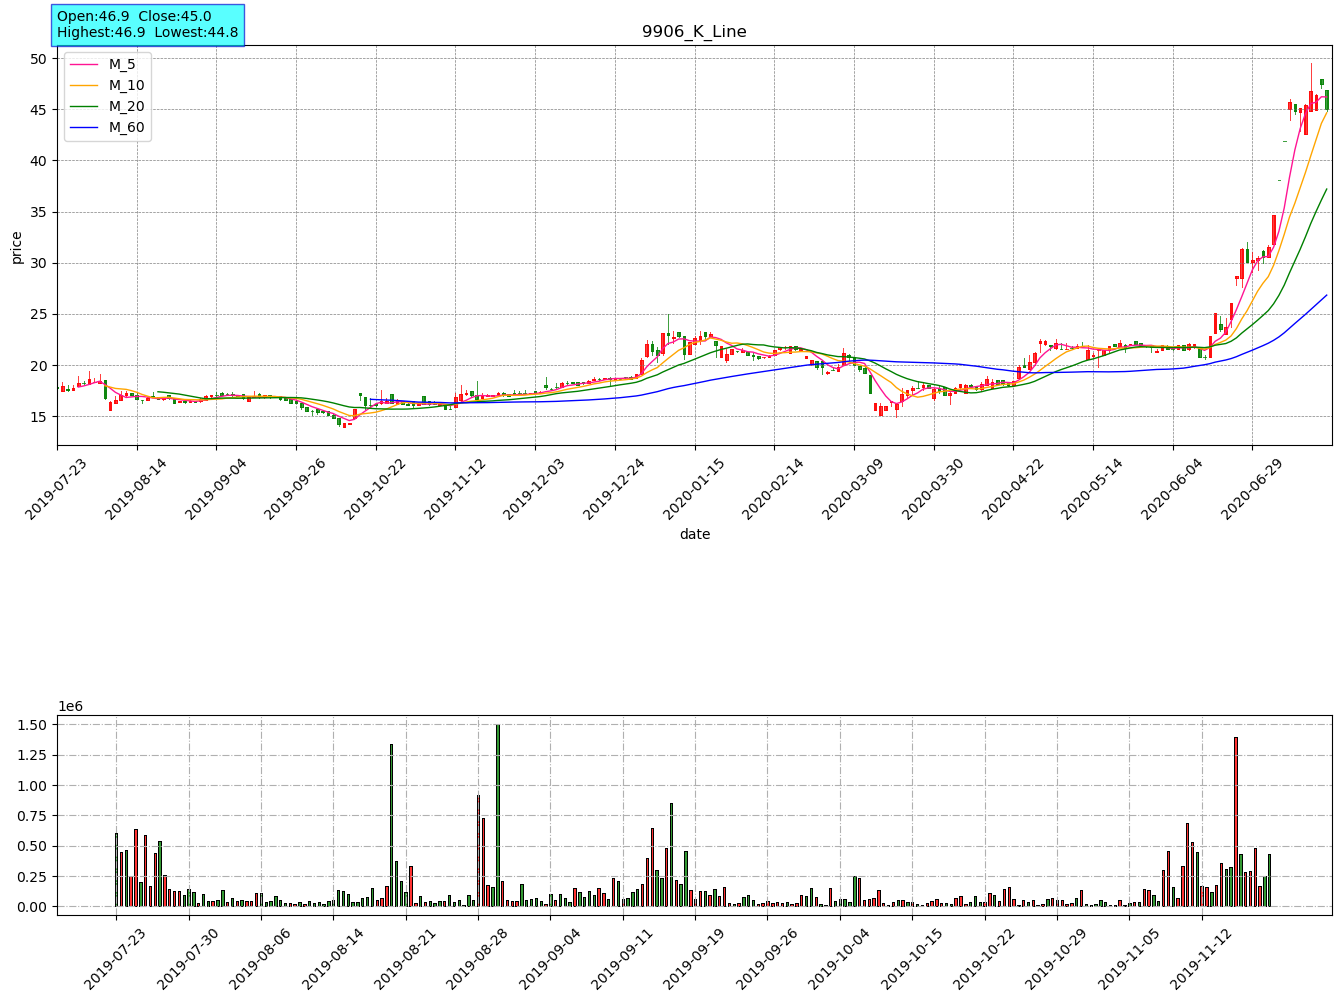

In [217]:
import sys
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import json, pymysql
import pandas as pd
from matplotlib.pylab import date2num 
from cycler import cycler
import matplotlib as mpl
import mpl_finance as mpf  
import matplotlib.pyplot as plt
import random
import numpy as np
#from talib import abstract
%matplotlib inline
import tushare as ts
from matplotlib import ticker

#--------------------------------------

#隨機選擇一支股票畫圖(測試)
Stockiid={'台泥': '1101', '亞泥': '1102', '嘉泥': '1103', '環泥': '1104', '幸福': '1108', '信大': '1109', '東泥': '1110', '味全': '1201', '味王': '1203', '大成': '1210', '大飲': '1213', '卜蜂': '1215', '統一': '1216', '愛之味': '1217', '泰山': '1218', '福壽': '1219', '台榮': '1220', '福懋油': '1225', '佳格': '1227', '聯華': '1229', '聯華食': '1231', '大統益': '1232', '天仁': '1233', '黑松': '1234', '興泰': '1235', '宏亞': '1236', '鮮活果汁-KY': '1256', '台塑': '1301', '南亞': '1303', '台聚': '1304', '華夏': '1305', '三芳': '1307', '亞聚': '1308', '台達化': '1309', '台苯': '1310', '國喬': '1312', '聯成': '1313', '中石化': '1314', '達新': '1315', '上曜': '1316', '東陽': '1319', '大洋': '1321', '永裕': '1323', '地球': '1324', '恆大': '1325', '台化': '1326', '再生-KY': '1337', '廣華-KY': '1338', '昭輝': '1339', '勝悅-KY': '1340', '富林-KY': '1341', '遠東新': '1402', '新纖': '1409', '南染': '1410', '宏洲': '1413', '東和': '1414', '廣豐': '1416', '嘉裕': '1417', '東華': '1418', '新紡': '1419', '利華': '1423', '大魯閣': '1432', '福懋': '1434', '中福': '1435', '華友聯': '1436', '勤益控': '1437', '裕豐': '1438', '中和': '1439', '南紡': '1440', '大東': '1441', '名軒': '1442', '立益': '1443', '力麗': '1444', '大宇': '1445', '宏和': '1446', '力鵬': '1447', '佳和': '1449', '年興': '1451', '宏益': '1452', '大將': '1453', '台富': '1454', '集盛': '1455', '怡華': '1456', '宜進': '1457', '聯發': '1459', '宏遠': '1460', '強盛': '1463', '得力': '1464', '偉全': '1465', '聚隆': '1466', '南緯': '1467', '昶和': '1468', '大統新創': '1470', '首利': '1471', '三洋紡': '1472', '台南': '1473', '弘裕': '1474', '本盟': '1475', '儒鴻': '1476', '聚陽': '1477', '士電': '1503', '東元': '1504', '正道': '1506', '永大': '1507', '瑞利': '1512', '中興電': '1513', '亞力': '1514', '力山': '1515', '川飛': '1516', '利奇': '1517', '華城': '1519', '大億': '1521', '堤維西': '1522', '耿鼎': '1524', '江申': '1525', '日馳': '1526', '鑽全': '1527', '恩德': '1528', '樂士': '1529', '亞崴': '1530', '高林股': '1531', '勤美': '1532', '車王電': '1533', '中宇': '1535', '和大': '1536', '廣隆': '1537', '正峰新': '1538', '巨庭': '1539', '喬福': '1540', '錩泰': '1541', '伸興': '1558', '中砂': '1560', '倉佑': '1568', '信錦': '1582', '程泰': '1583', '吉茂': '1587', '永冠-KY': '1589', '亞德客-KY': '1590', '英瑞-KY': '1592', '岱宇': '1598', '華電': '1603', '聲寶': '1604', '華新': '1605', '華榮': '1608', '大亞': '1609', '中電': '1611', '宏泰': '1612', '三洋電': '1614', '大山': '1615', '億泰': '1616', '榮星': '1617', '合機': '1618', '艾美特-KY': '1626', '中化': '1701', '南僑': '1702', '葡萄王': '1707', '東鹼': '1708', '和益': '1709', '東聯': '1710', '永光': '1711', '興農': '1712', '國化': '1713', '和桐': '1714', '長興': '1717', '中纖': '1718', '生達': '1720', '三晃': '1721', '台肥': '1722', '中碳': '1723', '台硝': '1724', '元禎': '1725', '永記': '1726', '中華化': '1727', '花仙子': '1730', '美吾華': '1731', '毛寶': '1732', '五鼎': '1733', '杏輝': '1734', '日勝化': '1735', '喬山': '1736', '臺鹽': '1737', '寶齡富錦': '1760', '中化生': '1762', '勝一': '1773', '展宇': '1776', '和康生': '1783', '科妍': '1786', '神隆': '1789', '美時': '1795', '台玻': '1802', '寶徠': '1805', '冠軍': '1806', '潤隆': '1808', '中釉': '1809', '和成': '1810', '凱撒衛': '1817', '台紙': '1902', '士紙': '1903', '正隆': '1904', '華紙': '1905', '寶隆': '1906', '永豐餘': '1907', '榮成': '1909', '中鋼': '2002', '東和鋼鐵': '2006', '燁興': '2007', '高興昌': '2008', '第一銅': '2009', '春源': '2010', '春雨': '2012', '中鋼構': '2013', '中鴻': '2014', '豐興': '2015', '官田鋼': '2017', '美亞': '2020', '聚亨': '2022', '燁輝': '2023', '志聯': '2024', '千興': '2025', '大成鋼': '2027', '威致': '2028', '盛餘': '2029', '彰源': '2030', '新光鋼': '2031', '新鋼': '2032', '佳大': '2033', '允強': '2034', '海光': '2038', '上銀': '2049', '川湖': '2059', '橋椿': '2062', '運錩': '2069', '南港': '2101', '泰豐': '2102', '台橡': '2103', '國際中橡': '2104', '正新': '2105', '建大': '2106', '厚生': '2107', '南帝': '2108', '華豐': '2109', '鑫永銓': '2114', '六暉-KY': '2115', '裕隆': '2201', '中華': '2204', '三陽工業': '2206', '和泰車': '2207', '台船': '2208', '裕日車': '2227', '劍麟': '2228', '為升': '2231', '宇隆': '2233', '百達-KY': '2236', '英利-KY': '2239', '宏旭-KY': '2243', '光寶科': '2301', '麗正': '2302', '聯電': '2303', '全友': '2305', '台達電': '2308', '金寶': '2312', '華通': '2313', '台揚': '2314', '楠梓電': '2316', '鴻海': '2317', '東訊': '2321', '中環': '2323', '仁寶': '2324', '國巨': '2327', '廣宇': '2328', '華泰': '2329', '台積電': '2330', '精英': '2331', '友訊': '2332', '旺宏': '2337', '光罩': '2338', '光磊': '2340', '茂矽': '2342', '華邦電': '2344', '智邦': '2345', '聯強': '2347', '海悅': '2348', '錸德': '2349', '順德': '2351', '佳世達': '2352', '宏碁': '2353', '鴻準': '2354', '敬鵬': '2355', '英業達': '2356', '華碩': '2357', '廷鑫': '2358', '所羅門': '2359', '致茂': '2360', '藍天': '2362', '矽統': '2363', '倫飛': '2364', '昆盈': '2365', '燿華': '2367', '金像電': '2368', '菱生': '2369', '大同': '2371', '震旦行': '2373', '佳能': '2374', '凱美': '2375', '技嘉': '2376', '微星': '2377', '瑞昱': '2379', '虹光': '2380', '廣達': '2382', '台光電': '2383', '群光': '2385', '精元': '2387', '威盛': '2388', '云辰': '2390', '正崴': '2392', '億光': '2393', '研華': '2395', '友通': '2397', '映泰': '2399', '凌陽': '2401', '毅嘉': '2402', '漢唐': '2404', '浩鑫': '2405', '國碩': '2406', '南亞科': '2408', '友達': '2409', '中華電': '2412', '環科': '2413', '精技': '2414', '錩新': '2415', '圓剛': '2417', '仲琦': '2419', '新巨': '2420', '建準': '2421', '固緯': '2423', '隴華': '2424', '承啟': '2425', '鼎元': '2426', '三商電': '2427', '興勤': '2428', '銘旺科': '2429', '燦坤': '2430', '聯昌': '2431', '互盛電': '2433', '統懋': '2434', '偉詮電': '2436', '翔耀': '2438', '美律': '2439', '太空梭': '2440', '超豐': '2441', '新美齊': '2442', '億麗': '2443', '兆勁': '2444', '晶電': '2448', '京元電子': '2449', '神腦': '2450', '創見': '2451', '凌群': '2453', '聯發科': '2454', '全新': '2455', '奇力新': '2456', '飛宏': '2457', '義隆': '2458', '敦吉': '2459', '建通': '2460', '光群雷': '2461', '良得電': '2462', '盟立': '2464', '麗臺': '2465', '冠西電': '2466', '志聖': '2467', '華經': '2468', '資通': '2471', '立隆電': '2472', '可成': '2474', '鉅祥': '2476', '美隆電': '2477', '大毅': '2478', '敦陽科': '2480', '強茂': '2481', '連宇': '2482', '百容': '2483', '希華': '2484', '兆赫': '2485', '一詮': '2486', '漢平': '2488', '瑞軒': '2489', '吉祥全': '2491', '華新科': '2492', '揚博': '2493', '普安': '2495', '卓越': '2496', '怡利電': '2497', '宏達電': '2498', '東貝': '2499', '國建': '2501', '國產': '2504', '國揚': '2505', '太設': '2506', '全坤建': '2509', '太子': '2511', '龍邦': '2514', '中工': '2515', '新建': '2516', '冠德': '2520', '京城': '2524', '宏璟': '2527', '皇普': '2528', '華建': '2530', '宏盛': '2534', '達欣工': '2535', '宏普': '2536', '聯上發': '2537', '基泰': '2538', '櫻花建': '2539', '愛山林': '2540', '興富發': '2542', '皇昌': '2543', '皇翔': '2545', '根基': '2546', '日勝生': '2547', '華固': '2548', '潤弘': '2597', '益航': '2601', '長榮': '2603', '新興': '2605', '裕民': '2606', '榮運': '2607', '嘉里大榮': '2608', '陽明': '2609', '華航': '2610', '志信': '2611', '中航': '2612', '中櫃': '2613', '東森': '2614', '萬海': '2615', '山隆': '2616', '台航': '2617', '長榮航': '2618', '亞航': '2630', '台灣高鐵': '2633', '漢翔': '2634', '台驊投控': '2636', '慧洋-KY': '2637', '宅配通': '2642', '萬企': '2701', '華園': '2702', '國賓': '2704', '六福': '2705', '第一店': '2706', '晶華': '2707', '遠雄來': '2712', '夏都': '2722', '美食-KY': '2723', '王品': '2727', '雄獅': '2731', '寒舍': '2739', '雲品': '2748', '彰銀': '2801', '京城銀': '2809', '台中銀': '2812', '旺旺保': '2816', '華票': '2820', '中壽': '2823', '台產': '2832', '臺企銀': '2834', '高雄銀': '2836', '聯邦銀': '2838', '台開': '2841', '遠東銀': '2845', '安泰銀': '2849', '新產': '2850', '中再保': '2851', '第一保': '2852', '統一證': '2855', '三商壽': '2867', '華南金': '2880', '富邦金': '2881', '國泰金': '2882', '開發金': '2883', '玉山金': '2884', '元大金': '2885', '兆豐金': '2886', '台新金': '2887', '新光金': '2888', '國票金': '2889', '永豐金': '2890', '中信金': '2891', '第一金': '2892', '王道銀行': '2897', '欣欣': '2901', '遠百': '2903', '匯僑': '2904', '三商': '2905', '高林': '2906', '特力': '2908', '統領': '2910', '麗嬰房': '2911', '統一超': '2912', '農林': '2913', '潤泰全': '2915', '鼎固-KY': '2923', '淘帝-KY': '2929', '客思達-KY': '2936', '凱羿-KY': '2939', '歐格': '3002', '健和興': '3003', '豐達科': '3004', '神基': '3005', '晶豪科': '3006', '大立光': '3008', '華立': '3010', '今皓': '3011', '晟銘電': '3013', '聯陽': '3014', '全漢': '3015', '嘉晶': '3016', '奇鋐': '3017', '同開': '3018', '亞光': '3019', '鴻名': '3021', '威強電': '3022', '信邦': '3023', '憶聲': '3024', '星通': '3025', '禾伸堂': '3026', '盛達': '3027', '增你強': '3028', '零壹': '3029', '德律': '3030', '佰鴻': '3031', '偉訓': '3032', '威健': '3033', '聯詠': '3034', '智原': '3035', '文曄': '3036', '欣興': '3037', '全台': '3038', '遠見': '3040', '揚智': '3041', '晶技': '3042', '科風': '3043', '健鼎': '3044', '台灣大': '3045', '建碁': '3046', '訊舟': '3047', '益登': '3048', '和鑫': '3049', '鈺德': '3050', '力特': '3051', '夆典': '3052', '立萬利': '3054', '蔚華科': '3055', '總太': '3056', '喬鼎': '3057', '立德': '3058', '華晶科': '3059', '銘異': '3060', '建漢': '3062', '日電貿': '3090', '聯傑': '3094', '一零四': '3130', '正達': '3149', '景岳': '3164', '大量': '3167', '景碩': '3189', '全科': '3209', '晟鈦': '3229', '緯創': '3231', '虹冠電': '3257', '昇陽': '3266', '勝德': '3296', '昇貿': '3305', '聯德': '3308', '閎暉': '3311', '弘憶股': '3312', '同泰': '3321', '泰碩': '3338', '麗清': '3346', '奇偶': '3356', '新日興': '3376', '明泰': '3380', '新世紀': '3383', '玉晶光': '3406', '京鼎': '3413', '融程電': '3416', '譁裕': '3419', '台端': '3432', '榮創': '3437', '創意': '3443', '聯鈞': '3450', '晶睿': '3454', '群創': '3481', '誠研': '3494', '維熹': '3501', '揚明光': '3504', '華擎': '3515', '柏騰': '3518', '安馳': '3528', '晶相光': '3530', '台勝科': '3532', '嘉澤': '3533', '晶彩科': '3535', '誠創': '3536', '州巧': '3543', '敦泰': '3545', '聯穎': '3550', '嘉威': '3557', '牧德': '3563', '聯合再生': '3576', '辛耘': '3583', '通嘉': '3588', '艾笛森': '3591', '力銘': '3593', '智易': '3596', '宏致': '3605', '谷崧': '3607', '碩天': '3617', '洋華': '3622', '達邁': '3645', '健策': '3653', '世芯-KY': '3661', '貿聯-KY': '3665', '圓展': '3669', 'TPK-KY': '3673', '新至陞': '3679', '亞太電': '3682', '達能': '3686', '海華': '3694', '隆達': '3698', '大眾控': '3701', '大聯大': '3702', '欣陸': '3703', '合勤控': '3704', '永信': '3705', '神達': '3706', '上緯投控': '3708', '日月光投控': '3711', '永崴投控': '3712', '佳醫': '4104', '雃博': '4106', '懷特': '4108', '旭富': '4119', '亞諾法': '4133', '麗豐-KY': '4137', '龍燈-KY': '4141', '國光生': '4142', '康聯-KY': '4144', '全宇生技-KY': '4148 ', '訊映': '4155', '承業醫': '4164', '佐登-KY': '4190', '炎洲': '4306', '如興': '4414', '利勤': '4426', '廣越': '4438', '冠星-KY': '4439', '東台': '4526', '瑞智': '4532', '拓凱': '4536', '全球傳動': '4540', '銘鈺': '4545', '智伸科': '4551', '力達-KY': '4552', '氣立': '4555', '永新-KY': '4557', '強信-KY': '4560', '穎漢': '4562', '元翎': '4564', '時碩工業': '4566', '鈞興-KY': '4571', '駐龍': '4572', '大銀微系統': '4576', '光隆精密-KY': '4581', '德淵': '4720', '國精化': '4722', '信昌化': '4725', '華廣': '4737', '康普': '4739', '台耀': '4746', '三福化': '4755', '材料-KY': '4763', '雙鍵': '4764', '南寶': '4766', '日成-KY': '4807', '遠傳': '4904', '正文': '4906', '聯德控股-KY': '4912', '致伸': '4915', '事欣科': '4916', '新唐': '4919', '泰鼎-KY': '4927', '燦星網': '4930', '太極': '4934', '茂林-KY': '4935', '和碩': '4938', '嘉彰': '4942', '康控-KY': '4943', '凌通': '4952', '光鋐': '4956', '臻鼎-KY': '4958', '誠美材': '4960', '天鈺': '4961', '十銓': '4967', '立積': '4968', '佳凌': '4976', '眾達-KY': '4977', '榮科': '4989', '傳奇': '4994', '鑫禾': '4999', '三星': '5007', '訊連': '5203', '科嘉-KY': '5215', '東科-KY': '5225', '達興材料': '5234', '乙盛-KY': '5243', '虹堡': '5258', '鎧勝-KY': '5264', '祥碩': '5269', '禾聯碩': '5283', 'jpp-KY': '5284', '界霖': '5285', '豐祥-KY': '5288', '敦南': '5305', '中磊': '5388', '崇越': '5434', '瀚宇博': '5469', '松翰': '5471', '慧友': '5484', '建國': '5515', '隆大': '5519', '工信': '5521', '遠雄': '5522', '順天': '5525', '鄉林': '5531', '皇鼎': '5533', '長虹': '5534', '東明-KY': '5538', '遠雄港': '5607', '四維航': '5608', '鳳凰': '5706', '中租-KY': '5871', '上海商銀': '5876', '合庫金': '5880', '台南-KY': '5906', '大洋-KY': '5907', '群益證': '6005', '群益期': '6024', '競國': '6108', '聚碩': '6112', '鎰勝': '6115', '彩晶': '6116', '迎廣': '6117', '達運': '6120', '上福': '6128', '鈞泰': '6131', '金橋': '6133', '富爾特': '6136', '亞翔': '6139', '柏承': '6141', '友勁': '6142', '百一': '6152', '嘉聯益': '6153', '鈞寶': '6155', '華興': '6164', '捷泰': '6165', '凌華': '6166', '宏齊': '6168', '互億': '6172', '瑞儀': '6176', '達麗': '6177', '關貿': '6183', '大豐電': '6184', '豐藝': '6189', '精成科': '6191', '巨路': '6192', '帆宣': '6196', '佳必琪': '6197', '亞弘電': '6201', '盛群': '6202', '詮欣': '6205', '飛捷': '6206', '今國光': '6209', '聯茂': '6213', '精誠': '6214', '和椿': '6215', '居易': '6216', '聚鼎': '6224', '天瀚': '6225', '光鼎': '6226', '超眾': '6230', '華孚': '6235', '力成': '6239', '迅杰': '6243', '定穎': '6251', '矽格': '6257', '台郡': '6269', '同欣電': '6271', '宏正': '6277', '台表科': '6278', '全國電': '6281', '康舒': '6282', '淳安': '6283', '啟碁': '6285', '聯嘉': '6288', '華上': '6289', '悅城': '6405', '旭隼': '6409', '群電': '6412', '樺漢': '6414', '矽力-KY': '6415', '瑞祺電通': '6416', '光麗-KY': '6431', '光聖': '6442', '元晶': '6443', '鈺邦': '6449', '訊芯-KY': '6451', '康友-KY': '6452', 'GIS-KY': '6456', '台數科': '6464', '安集': '6477', '晶碩': '6491', '南六': '6504', '台塑化': '6505', '捷敏-KY': '6525', '愛普': '6531', '晶心科': '6533', '泰福-KY': '6541', '易華電': '6552', '興能高': '6558', '虹揚-KY': '6573', '研揚': '6579', '鋼聯': '6581', '申豐': '6582', '動力-KY': '6591', '和潤企業': '6592', '帝寶': '6605', '必應': '6625', '基士德-KY': '6641', '科定': '6655', '羅麗芬-KY': '6666', '中揚光': '6668', '緯穎': '6669', '復盛應用': '6670', '三能-KY': '6671', '騰輝電子-KY': '6672', '鋐寶科技': '6674', '旭暉應材': '6698', '惠特': '6706', '嘉基': '6715', '台通': '8011', '矽創': '8016', '尖點': '8021', '昇陽半導體': '8028', '雷虎': '8033', '台虹': '8039', '南電': '8046', '長華': '8070', '陞泰': '8072', '致新': '8081', '華冠': '8101', '瀚荃': '8103', '錸寶': '8104', '凌巨': '8105', '華東': '8110', '至上': '8112', '振樺電': '8114', '福懋科': '8131', '南茂': '8150', '達方': '8163', '無敵': '8201', '勤誠': '8210', '志超': '8213', '明基材': '8215', '寶一': '8222', '菱光': '8249', '富鼎': '8261', '宇瞻': '8271', '日友': '8341', '建新國際': '8367', '羅昇': '8374', '百和興業-KY': '8404', '福貞-KY': '8411', '可寧衛': '8422', '基勝-KY': '8427', '金麗-KY': '8429', '威宏-KY': '8442', '阿瘦': '8443', '富邦媒': '8454', '柏文': '8462', '潤泰材': '8463', '億豐': '8464', '美吉吉-KY': '8466', '波力-KY': '8467', '山林水': '8473', '東哥遊艇': '8478', '泰昇-KY': '8480', '政伸': '8481', '商億-KY': '8482', '吉源-KY': '8488', '格威傳媒': '8497', '鼎炫-KY': '8499', '台汽電': '8926', '新天地': '8940', '高力': '8996', '鈺齊-KY': '9802', '台火': '9902', '寶成': '9904', '大華': '9905', '欣巴巴': '9906', '統一實': '9907', '大台北': '9908', '豐泰': '9910', '櫻花': '9911', '偉聯': '9912', '美利達': '9914', '中保科': '9917', '欣天然': '9918', '康那香': '9919', '巨大': '9921', '福興': '9924', '新保': '9925', '新海': '9926', '泰銘': '9927', '中視': '9928', '秋雨': '9929', '中聯資源': '9930', '欣高': '9931', '中鼎': '9933', '成霖': '9934', '慶豐富': '9935', '全國': '9937', '百和': '9938', '宏全': '9939', '信義': '9940', '裕融': '9941', '茂順': '9942', '好樂迪': '9943', '新麗': '9944', '潤泰新': '9945', '三發地產': '9946', '佳龍': '9955', '世紀鋼': '9958', '茂生農經': '1240', '其祥-KY': '1258', '安心': '1259', '德麥': '1264', '漢來美食': '1268', '恩得利': '1333', '台翰': '1336', '精華': '1565', '濱川': '1569', '力肯': '1570', '新麥': '1580', '精剛': '1584', '和勤': '1586', '駿吉-KY': '1591', '祺驊': '1593', '川寶': '1595', '直得': '1597', '宏佳騰': '1599', '台蠟': '1742', '南光': '1752', '生泰': '1777', '合世': '1781', '訊聯': '1784', '光洋科': '1785', '杏昌': '1788', '金穎生技': '1796', '易威': '1799', '寶利徠': '1813', '富喬': '1815', '唐榮': '2035', '風青': '2061', '世鎧': '2063', '晉椿': '2064', '世豐': '2065', '世德': '2066', '嘉鋼': '2067', '精湛': '2070', '大甲': '2221', '泰茂': '2230', '謚源': '2235', '綠意': '2596', '大車隊': '2640', '正德': '2641', '捷迅': '2643', '晶悅': '2718', '燦星旅': '2719', '富驛-KY': '2724', '雅茗-KY': '2726', '瓦城': '2729', '六角': '2732', '易飛網': '2734', '高野': '2736', '天蔥': '2740', '山富': '2743', '五福': '2745', '豆府': '2752', '滿心': '2916', '東凌-KY': '2924', '誠品生活': '2926', '紅馬-KY': '2928', '集雅社': '2937', '泰偉': '3064', '李洲': '3066', '全域': '3067', '協禧': '3071', '凱柏實業': '3073', '僑威': '3078', '聯亞': '3081', '網龍': '3083', '新零售': '3085', '華義': '3086', '艾訊': '3088', '元炬': '3089', '鴻碩': '3092', '港建': '3093', '及成': '3095', '穩懋': '3105', '好德': '3114', '寶島極': '3115', '進階': '3118', '笙泉': '3122', '昇銳': '3128', '弘塑': '3131', '晶宏': '3141', '新揚科': '3144', '大綜': '3147', '璟德': '3152', '精確': '3162', '波若威': '3163', '亞信': '3169', '新洲': '3171', '基亞': '3176', '公準': '3178', '鑫龍騰': '3188', '和進': '3191', '樺晟': '3202', '佰研': '3205', '志豐': '3206', '耀勝': '3207', '順達': '3211', '茂訊': '3213', '優群': '3217', '大學光': '3218', '倚強股份': '3219', '台嘉碩': '3221', '三顧': '3224', '至寶電': '3226', '原相': '3227', '金麗科': '3228', '錦明': '3230', '昱捷': '3232', '光環': '3234', '千如': '3236', '海灣': '3252', '鑫創': '3259', '威剛': '3260', '欣銓': '3264', '台星科': '3265', '海德威': '3268', '東碩': '3272', '宇環': '3276', '太普高': '3284', '微端': '3285', '廣寰科': '3287', '點晶': '3288', '宜特': '3289', '東浦': '3290', '鈊象': '3293', '英濟': '3294', '杭特': '3297', '岱稜': '3303', '鼎天': '3306', '佳穎': '3310', '斐成': '3313', '尼克森': '3317', '建舜電': '3322', '加百裕': '3323', '雙鴻': '3324', '旭品': '3325', '幸康': '3332', '泰谷': '3339', '律勝': '3354', '尚立': '3360', '先進光': '3362', '上詮': '3363', '典範': '3372', '熱映': '3373', '精材': '3374', '彬台': '3379', '崇越電': '3388', '旭軟': '3390', '漢科': '3402', '台興': '3426', '哲固': '3434', '類比科': '3438', '聯一光': '3441', '利機': '3444', '由田': '3455', '進泰電子': '3465', '致振': '3466', '安勤': '3479', '力致': '3483', '崧騰': '3484', '森寶': '3489', '單井': '3490', '昇達科': '3491', '長盛': '3492', '陽程': '3498', '環天科': '3499', '位速': '3508', '矽瑪': '3511', '皇龍': '3512', '亞帝歐': '3516', '振維': '3520', '鴻翊': '3521', '御頂': '3522', '迎輝': '3523', '凡甲': '3526', '聚積': '3527', '力旺': '3529', '先益': '3531', '堡達': '3537', '曜越': '3540', '西柏': '3541', '宇峻': '3546', '兆利': '3548', '世禾': '3551', '同致': '3552', '重鵬': '3555', '禾瑞亞': '3556', '神準': '3558', '其陽': '3564', '逸昌': '3567', '大塚': '3570', '泓格': '3577', '友威科': '3580', '博磊': '3581', '閎康': '3587', '磐儀': '3594', '映興': '3597', '東林': '3609', '鼎翰': '3611', '安可': '3615', '富晶通': '3623', '光頡': '3624', '西勝': '3625', '盈正': '3628', '地心引力': '3629', '新鉅科': '3630', '晟楠': '3631', '研勤': '3632', '駿熠電': '3642', '艾恩特': '3646', '精聯': '3652', '鑫科': '3663', '安瑞-KY': '3664', '光耀': '3666', '康聯訊': '3672', '德微': '3675', '家登': '3680', '榮昌': '3684', '元創精密': '3685', '歐買尬': '3687', '湧德': '3689', '碩禾': '3691', '營邦': '3693', '漢磊': '3707', '鑫聯大投控': '3709', '連展投控': '3710', '新晶投控': '3713', '永日': '4102', '東洋': '4105', '邦特': '4107', '加捷生醫': '4109', '濟生': '4111', '聯上': '4113', '健喬': '4114', '明基醫': '4116', '友華': '4120', '優盛': '4121', '晟德': '4123', '太醫': '4126', '天良': '4127', '中天': '4128', '聯合': '4129', '健亞': '4130', '晶宇': '4131', '曜亞': '4138', '馬光-KY': '4139', '中裕': '4147', '台微體': '4152', '鈺緯': '4153', '康樂-KY': '4154', '太景*-KY': '4157', '創源': '4160', '聿新科': '4161', '智擎': '4162', '鐿鈦': '4163', '展旺': '4167', '醣聯': '4168', '瑞基': '4171', '久裕': '4173', '浩鼎': '4174', '杏一': '4175', '福永生技': '4183', '安克': '4188', '杏國': '4192', '環瑞醫': '4198', '中華食': '4205', '環泰': '4207', '信立': '4303', '勝昱': '4304', '世坤': '4305', '東隆興': '4401', '福大': '4402', '新昕纖': '4406', '飛寶企業': '4413', '三圓': '4416', '金洲': '4417', '元勝': '4419', '光明': '4420', '聚紡': '4429', '耀億': '4430', '銘旺實': '4432', '興采': '4433', '健信': '4502', '金雨': '4503', '崇友': '4506', '高鋒': '4510', '福裕': '4513', '永彰': '4523', '方土霖': '4527', '江興鍛': '4528', '淳紳': '4529', '宏易': '4530', '協易機': '4533', '慶騰': '4534', '至興': '4535', '大詠城': '4538', '晟田': '4541', '科嶠': '4542', '萬在': '4543', '桓達': '4549', '長佳': '4550', '橙的': '4554', '旭然': '4556', '健椿': '4561', '百德': '4563', '科際精密': '4568', '捷流閥業': '4580', '唐鋒': '4609', '中美實': '4702', '大恭': '4706', '磐亞': '4707', '永純': '4711', '南璋': '4712', '永捷': '4714', '大立': '4716', '美琪瑪': '4721', '永昕': '4726', '雙美': '4728', '熒茂': '4729', '豪展': '4735', '泰博': '4736', '泓瀚': '4741', '合一': '4743', '皇將': '4744', '合富-KY': '4745', '強生': '4747', '國碳科': '4754', '勤凱': '4760', '誠泰科技': '4767', 'VHQ-KY': '4803', '大略-KY': '4804', '昇華': '4806', '聯光通': '4903', '台聯電': '4905', '富宇': '4907', '前鼎': '4908', '新復興': '4909', '德英': '4911', '欣厚-KY': '4924', '新盛力': '4931', '友輝': '4933', '亞電': '4939', '兆遠': '4944', '辣椒': '4946', '昂寶-KY': '4947', '牧東': '4950', '緯軟': '4953', '譜瑞-KY': '4966', 'IET-KY': '4971', '湯石照明': '4972', '廣穎': '4973', '亞泰': '4974', '華星光': '4979', '科誠': '4987', '環宇-KY': '4991', '晶達': '4995', '榮剛': '5009', '久陽': '5011', '強新': '5013', '建錩': '5014', '華祺': '5015', '松和': '5016', '富強': '5102', '凱衛': '5201', '力新': '5202', '中茂': '5205', '坤悅': '5206', '新鼎': '5209', '寶碩': '5210', '蒙恬': '5211', '凌網': '5212', '亞昕': '5213', '萬達光電': '5220', '安力-KY': '5223', '立凱-KY': '5227', '雷笛克光學': '5230', '智晶': '5245', '天鉞電': '5251', '智崴': '5263', '笙科': '5272', '信驊': '5274', '達輝-KY': '5276', '尚凡': '5278', '大峽谷-KY': '5281', '數字': '5287', '宜鼎': '5289', '邑昇': '5291', '杰力': '5299', '寶得利': '5301', '太欣': '5302', '鼎創達': '5304', '桂盟': '5306', '系統電': '5309', '天剛': '5310', '寶島科': '5312', '世紀': '5314', '光聯': '5315', '友銓': '5321', '士開': '5324', '華容': '5328', '建榮': '5340', '立衛': '5344', '天揚': '5345', '世界': '5347', '系通': '5348', '先豐': '5349', '鈺創': '5351', '台林': '5353', '佳總': '5355', '協益': '5356', '力麗店': '5364', '中光電': '5371', '合正': '5381', '金利': '5383', '青雲': '5386', '應華': '5392', '慕康生醫': '5398', '中菲': '5403', '國眾': '5410', '台半': '5425', '振發': '5426', '達威': '5432', '東友': '5438', '高技': '5439', '均豪': '5443', '寶聯通': '5450', '佶優': '5452', '昇益': '5455', '宣德': '5457', '同協': '5460', '霖宏': '5464', '富驊': '5465', '凱鈺': '5468', '聰泰': '5474', '德宏': '5475', '智冠': '5478', '新華': '5481', '中美晶': '5483', '通泰': '5487', '松普': '5488', '彩富': '5489', '同亨': '5490', '三聯': '5493', '凱崴': '5498', '永信建': '5508', '德昌': '5511', '力麒': '5512', '三豐': '5514', '雙喜': '5516', '力泰': '5520', '豐謙': '5523', '志嘉': '5529', '龍巖': '5530', '聖暉': '5536', '崇佑-KY': '5543', '台聯櫃': '5601', '陸海': '5603', '中連貨': '5604', '中菲行': '5609', '劍湖山': '5701', '亞都': '5703', '老爺知': '5704', '日盛金': '5820', '致和證': '5864', '台名': '5878', '德記': '5902', '全家': '5903', '寶雅': '5904', '南仁湖': '5905', '宏遠證': '6015', '康和證': '6016', '大展證': '6020', '大慶證': '6021', '元大期': '6023', '福邦證': '6026', '寬魚國際': '6101', '合邦': '6103', '創惟': '6104', '亞元': '6109', '大宇資': '6111', '亞矽': '6113', '久威': '6114', '建達': '6118', '新普': '6121', '擎邦': '6122', '上奇': '6123', '業強': '6124', '廣運': '6125', '信音': '6126', '九豪': '6127', '普誠': '6129', '星寶國際': '6130', '萬旭': '6134', '茂達': '6138', '訊達': '6140', '振曜': '6143', '得利影': '6144', '耕興': '6146', '頎邦': '6147', '驊宏資': '6148', '撼訊': '6150', '晉倫': '6151', '順發': '6154', '松上': '6156', '禾昌': '6158', '欣技': '6160', '捷波': '6161', '華電網': '6163', '久正': '6167', '昱泉': '6169', '統振': '6170', '亞銳士': '6171', '信昌電': '6173', '安碁': '6174', '立敦': '6175', '亞通': '6179', '橘子': '6180', '合晶': '6182', '幃翔': '6185', '新潤': '6186', '萬潤': '6187', '廣明': '6188', '萬泰科': '6190', '育富': '6194', '詩肯': '6195', '凌泰': '6198', '天品': '6199', '海韻電': '6203', '艾華': '6204', '雷科': '6207', '日揚': '6208', '慶生': '6210', '理銘': '6212', '中探針': '6217', '豪勉': '6218', '富旺': '6219', '岳豐': '6220', '晉泰': '6221', '上揚': '6222', '旺矽': '6223', '茂綸': '6227', '全譜': '6228', '研通': '6229', '系微': '6231', '旺玖': '6233', '高僑': '6234', '康呈': '6236', '驊訊': '6237', '勝麗': '6238', '松崗': '6240', '易通展': '6241', '立康': '6242', '茂迪': '6244', '立端': '6245', '臺龍': '6246', '淇譽電': '6247', '沛波': '6248', '百徽': '6259', '久元': '6261', '普萊德': '6263', '富裔': '6264', '方土昶': '6265', '泰詠': '6266', '倍微': '6270', '台燿': '6274', '元山': '6275', '安鈦克': '6276', '胡連': '6279', '佳邦': '6284', '元隆': '6287', '良維': '6290', '沛亨': '6291', '迅德': '6292', '智基': '6294', '通訊-KY': '6404', '晶焱': '6411', '韋僑': '6417', '詠昇': '6418', '京晨科': '6419', '易發': '6425', '統新': '6426', '今展科': '6432', '大中': '6435', '迅得': '6438', '廣錠': '6441', '藥華藥': '6446', '紘康': '6457', '益得': '6461', '神盾': '6462', '威潤': '6465', '大樹': '6469', '宇智': '6470', '保瑞': '6472', '弘煜科': '6482', '點序': '6485', '互動': '6486', '環球晶': '6488', '生華科': '6492', '九齊': '6494', '科懋': '6496', '亞獅康-KY': '6497 ', '益安': '6499', '雙邦': '6506', '惠光': '6508', '聚和': '6509', '精測': '6510', '啟發電': '6512', '芮特-KY': '6514', '勤崴國際': '6516', '達爾膚': '6523', '明達醫': '6527', '創威': '6530', '瑞耘': '6532', '順藥': '6535', '倉和': '6538', '隆中': '6542', '高端疫苗': '6547', '長科*': '6548', '勝品': '6556', '欣普羅': '6560', '是方': '6561', '宏觀': '6568', '醫揚': '6569', '維田': '6570', '霈方': '6574', '逸達': '6576', '勁豐': '6577', '達邦蛋白': '6578', '台康生技': '6589', '普鴻': '6590', '台灣銘板': '6593', '展匯科': '6594', '寬宏藝術': '6596', '富強鑫': '6603', '瀧澤科': '6609', '奈米醫材': '6612', '朋億': '6613', '慧智': '6615', '特昇-KY': '6616', '萬年清': '6624', '泰金-KY': '6629', '均華': '6640', '富致': '6642', 'M31': '6643', '台生材': '6649', '天正國際': '6654', '樂斯科': '6662', '群翊': '6664', '信紘科': '6667', '鈺太': '6679', '鑫創電子': '6680', '雍智科技': '6683', '安碁資訊': '6690', '東捷資訊': '6697', '應廣': '6716', '崑鼎': '6803', '邑錡': '7402', '佑華': '8024', '鈦昇': '8027', '光菱': '8032', '榮群': '8034', '長園科': '8038', '九暘': '8040', '金山電': '8042', '蜜望實': '8043', '網家': '8044', '星雲': '8047', '德勝': '8048', '晶采': '8049', '廣積': '8050', '安國': '8054', '凱碩': '8059', '東捷': '8064', '來思達': '8066', '志旭': '8067', '全達': '8068', '元太': '8069', '能率網通': '8071', '鉅橡': '8074', '伍豐': '8076', '洛碁': '8077', '永利聯合': '8080', '瑞穎': '8083', '巨虹': '8084', '福華': '8085', '宏捷科': '8086', '華鎂鑫': '8087', '品安': '8088', '翔名': '8091', '建暐': '8092', '保銳': '8093', '擎亞': '8096', '常珵': '8097', '大世科': '8099', '大億金茂': '8107', '博大': '8109', '立碁': '8111', '越峰': '8121', '正淩': '8147', '博智': '8155', '天宇': '8171', '智捷': '8176', '加高': '8182', '精星': '8183', '新漢': '8234', '華宏': '8240', '朋程': '8255', '商丞': '8277', '生展': '8279', '英格爾': '8287', '泰藝': '8289', '尚茂': '8291', '群聯': '8299', '益張': '8342', '恒耀': '8349', '冠好': '8354', '金居': '8358', '千附': '8383', '金益鼎': '8390', '白紗科': '8401', '盛弘': '8403', '金可-KY': '8406', '商之器': '8409', '森田': '8410', '大國鋼': '8415', '實威': '8416', '捷必勝-KY': '8418', '明揚': '8420', '旭源': '8421', '保綠-KY': '8423', '惠普': '8424', '紅木-KY': '8426', '匯鑽科': '8431', '東生華': '8432', '弘帆': '8433', '鉅邁': '8435', '大江': '8436', '大地-KY': '8437', '綠電': '8440', '綠河-KY': '8444', '華研': '8446', '霹靂': '8450', '大拓-KY': '8455', '夠麻吉': '8472', '台境': '8476', '創業家': '8477', '三貝德': '8489', '裕國': '8905', '花王': '8906', '欣雄': '8908', '光隆': '8916', '欣泰': '8917', '沈氏': '8921', '時報': '8923', '大田': '8924', '北基': '8927', '鉅明': '8928', '富堡': '8929', '青鋼': '8930', '大汽電': '8931', '宏大': '8932', '愛地雅': '8933', '衡平': '8934', '邦泰': '8935', '國統': '8936', '合騏': '8937', '明安': '8938', '關中': '8941', '森鉅': '8942', '琉園': '9949', '萬國通': '9950', '皇田': '9951', '邁達康': '9960', '有益': '9962'}
List=[]
for iid in Stockiid.values():
    iid=iid.replace(' ','')
    List.append(iid)
test = random.choice(List)
test = int(test)
print("random item from list is: ", test)
#連接mysql索取資料
db = pymysql.connect(host='10.120.35.27',port=3306,user='dbuser2',passwd='aabb1234',db='Project_test')
cur = db.cursor()
cur.execute("select * from daily_trade_tw where stockiid=%d" % (test))

Data = [i for i in cur.fetchall()]
b = pd.DataFrame(Data)
b=b.rename(columns={0:'Stockiid',1:'Date',2:'Open',3:'High',4:'Low',5:'Close',6:'Volume'})
print(b)
b['Date']=pd.to_datetime(b['Date'])
b['Date'] = b['Date'].dt.date
b.index=b['Date']



b=b.drop('Stockiid',axis=1).drop('Date',axis=1)
#print(b.dtypes)
b['Open']=b['Open'].astype(float)
b['High']=b['High'].astype(float)
b['Low']=b['Low'].astype(float)
b['Close']=b['Close'].astype(float)
b['Volume']=b['Volume'].astype(float)
print(b.dtypes)

print(b)
test = str(test)
#畫圖的資料量
scale = 240
b = b[-scale:]
# 創fig
fig = plt.figure(figsize=(17, 10), dpi=100, facecolor="white")

# 設定圖片外框
#fig.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)

# 建立子圖

graph_KAV = fig.add_axes([0.1,0.5,0.75,0.4])
# 畫K線(蠟燭線)
mpf.candlestick2_ochl(graph_KAV, b.Open, b.Close, b.High, b.Low, width=0.5,
                      colorup='r', colordown='g') 
# 最高價,最低價,當日開盤價,當日收盤價
plt.title("Open:"+str(round(b['Open'][-1], 2))+"  Close:"+str(round(b['Close'][-1], 2))+"\nHighest:"+str(round(b['High'][-1] ,2))+"  Lowest:"+str(round(b['Low'][-1], 2)),fontsize="25",fontweight='bold',bbox=dict(facecolor='aqua',edgecolor='mediumblue',alpha=0.65),loc='left', FontProperties="SimHei")

# 畫移動平均線
# pd.rolling_mean(df_stockload.Close,window=20)
b['Ma5'] = b.Close.rolling(window=5).mean()

# pd.rolling_mean(df_stockload.Close,window=30)
b['Ma10'] = b.Close.rolling(window=10).mean()

# pd.rolling_mean(df_stockload.Close,window=30)
b['Ma20'] = b.Close.rolling(window=20).mean()

# pd.rolling_mean(df_stockload.Close,window=60)
b['Ma60'] = b.Close.rolling(window=60).mean()


plt.grid(True,linestyle="--",color='gray',linewidth='0.5',axis='both')





# 放置圖例
graph_KAV.plot(np.arange(0, len(b.index)), b['Ma5'], 'deeppink', label='M_5', lw=1.0)
graph_KAV.plot(np.arange(0, len(b.index)), b['Ma10'], 'orange', label='M_10', lw=1.0)
graph_KAV.plot(np.arange(0, len(b.index)), b['Ma20'], 'green', label='M_20', lw=1.0)
graph_KAV.plot(np.arange(0, len(b.index)), b['Ma60'], 'blue', label='M_60', lw=1.0)


#標示當天日期

graph_KAV.legend(loc='best')
graph_KAV.set_title(test+"_K_Line")
graph_KAV.set_xlabel("date")
graph_KAV.set_ylabel("price")
graph_KAV.set_xlim(0, len(b.index))  # 設定X軸範圍
graph_KAV.set_xticks(range(0, len(b.index), 15))  # 以15天為單位,標示日期
graph_KAV.set_xticklabels([b.index[index] for index in graph_KAV.get_xticks()])  # 設定X軸為日期
#繪製成交量子圖
ax3 = fig.add_axes([0.1,0.03,0.75,0.20])
mpf.volume_overlay(ax3, b['Open'], b['Close'], b['Volume'], colorup='red', colordown='green', width=0.5, alpha=0.8)
ax3.set_xticks(range(0, len(b.index),15))
ax3.set_xticklabels([b.index[index] for index in ax3.get_xticks()])
ax3.set_xticklabels(b.index[::5],fontsize="10", rotation=45)

# 使日期傾斜以供辨識
for label in graph_KAV.xaxis.get_ticklabels():
    label.set_rotation(45)
    label.set_fontsize(10)  
    
   
plt.show()

random item from list is:  1466
      Stockiid        Date   Open   High    Low  Close   Volume
0         1466  2010-01-04   7.67   7.68   7.50   7.52   173974
1         1466  2010-01-05   7.58   7.58   7.46   7.50   132435
2         1466  2010-01-06   7.50   7.56   7.45   7.51   306145
3         1466  2010-01-07   7.51   7.52   7.41   7.46   159696
4         1466  2010-01-08   7.47   7.52   7.43   7.48   153734
...        ...         ...    ...    ...    ...    ...      ...
2566      1466  2020-07-14  17.50  18.00  16.30  16.35  9115697
2567      1466  2020-07-15  16.35  16.75  15.30  15.75  2032496
2568      1466  2020-07-16  15.75  16.30  14.80  15.05  1746728
2569      1466  2020-07-17  14.85  15.20  13.70  14.25  1781414
2570      1466  2020-07-20  14.25  15.40  13.50  15.00  1674185

[2571 rows x 7 columns]
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object
             Open   High    Low  Close     Volume
Date                 

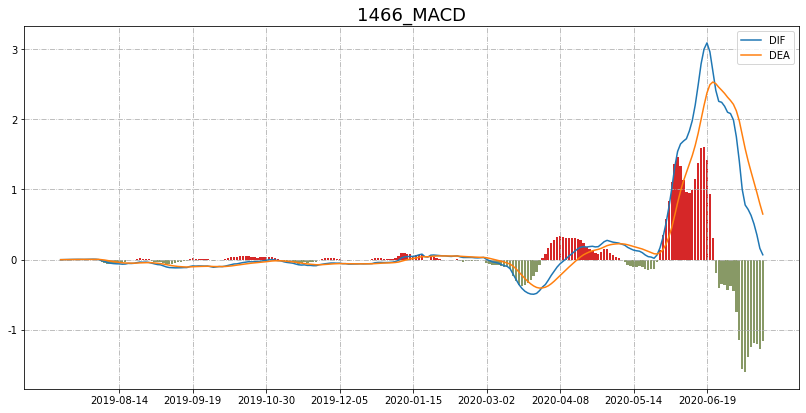

In [300]:
import sys
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import json, pymysql
import pandas as pd
from matplotlib.pylab import date2num 
from cycler import cycler
import matplotlib as mpl
import mpl_finance as mpf  
import matplotlib.pyplot as plt
import random
import numpy as np
#from talib import abstract
%matplotlib inline
import tushare as ts
from matplotlib import ticker
from matplotlib.font_manager import FontProperties
#--------------------------------------

#隨機選擇一支股票畫圖(測試)
Stockiid={'台泥': '1101', '亞泥': '1102', '嘉泥': '1103', '環泥': '1104', '幸福': '1108', '信大': '1109', '東泥': '1110', '味全': '1201', '味王': '1203', '大成': '1210', '大飲': '1213', '卜蜂': '1215', '統一': '1216', '愛之味': '1217', '泰山': '1218', '福壽': '1219', '台榮': '1220', '福懋油': '1225', '佳格': '1227', '聯華': '1229', '聯華食': '1231', '大統益': '1232', '天仁': '1233', '黑松': '1234', '興泰': '1235', '宏亞': '1236', '鮮活果汁-KY': '1256', '台塑': '1301', '南亞': '1303', '台聚': '1304', '華夏': '1305', '三芳': '1307', '亞聚': '1308', '台達化': '1309', '台苯': '1310', '國喬': '1312', '聯成': '1313', '中石化': '1314', '達新': '1315', '上曜': '1316', '東陽': '1319', '大洋': '1321', '永裕': '1323', '地球': '1324', '恆大': '1325', '台化': '1326', '再生-KY': '1337', '廣華-KY': '1338', '昭輝': '1339', '勝悅-KY': '1340', '富林-KY': '1341', '遠東新': '1402', '新纖': '1409', '南染': '1410', '宏洲': '1413', '東和': '1414', '廣豐': '1416', '嘉裕': '1417', '東華': '1418', '新紡': '1419', '利華': '1423', '大魯閣': '1432', '福懋': '1434', '中福': '1435', '華友聯': '1436', '勤益控': '1437', '裕豐': '1438', '中和': '1439', '南紡': '1440', '大東': '1441', '名軒': '1442', '立益': '1443', '力麗': '1444', '大宇': '1445', '宏和': '1446', '力鵬': '1447', '佳和': '1449', '年興': '1451', '宏益': '1452', '大將': '1453', '台富': '1454', '集盛': '1455', '怡華': '1456', '宜進': '1457', '聯發': '1459', '宏遠': '1460', '強盛': '1463', '得力': '1464', '偉全': '1465', '聚隆': '1466', '南緯': '1467', '昶和': '1468', '大統新創': '1470', '首利': '1471', '三洋紡': '1472', '台南': '1473', '弘裕': '1474', '本盟': '1475', '儒鴻': '1476', '聚陽': '1477', '士電': '1503', '東元': '1504', '正道': '1506', '永大': '1507', '瑞利': '1512', '中興電': '1513', '亞力': '1514', '力山': '1515', '川飛': '1516', '利奇': '1517', '華城': '1519', '大億': '1521', '堤維西': '1522', '耿鼎': '1524', '江申': '1525', '日馳': '1526', '鑽全': '1527', '恩德': '1528', '樂士': '1529', '亞崴': '1530', '高林股': '1531', '勤美': '1532', '車王電': '1533', '中宇': '1535', '和大': '1536', '廣隆': '1537', '正峰新': '1538', '巨庭': '1539', '喬福': '1540', '錩泰': '1541', '伸興': '1558', '中砂': '1560', '倉佑': '1568', '信錦': '1582', '程泰': '1583', '吉茂': '1587', '永冠-KY': '1589', '亞德客-KY': '1590', '英瑞-KY': '1592', '岱宇': '1598', '華電': '1603', '聲寶': '1604', '華新': '1605', '華榮': '1608', '大亞': '1609', '中電': '1611', '宏泰': '1612', '三洋電': '1614', '大山': '1615', '億泰': '1616', '榮星': '1617', '合機': '1618', '艾美特-KY': '1626', '中化': '1701', '南僑': '1702', '葡萄王': '1707', '東鹼': '1708', '和益': '1709', '東聯': '1710', '永光': '1711', '興農': '1712', '國化': '1713', '和桐': '1714', '長興': '1717', '中纖': '1718', '生達': '1720', '三晃': '1721', '台肥': '1722', '中碳': '1723', '台硝': '1724', '元禎': '1725', '永記': '1726', '中華化': '1727', '花仙子': '1730', '美吾華': '1731', '毛寶': '1732', '五鼎': '1733', '杏輝': '1734', '日勝化': '1735', '喬山': '1736', '臺鹽': '1737', '寶齡富錦': '1760', '中化生': '1762', '勝一': '1773', '展宇': '1776', '和康生': '1783', '科妍': '1786', '神隆': '1789', '美時': '1795', '台玻': '1802', '寶徠': '1805', '冠軍': '1806', '潤隆': '1808', '中釉': '1809', '和成': '1810', '凱撒衛': '1817', '台紙': '1902', '士紙': '1903', '正隆': '1904', '華紙': '1905', '寶隆': '1906', '永豐餘': '1907', '榮成': '1909', '中鋼': '2002', '東和鋼鐵': '2006', '燁興': '2007', '高興昌': '2008', '第一銅': '2009', '春源': '2010', '春雨': '2012', '中鋼構': '2013', '中鴻': '2014', '豐興': '2015', '官田鋼': '2017', '美亞': '2020', '聚亨': '2022', '燁輝': '2023', '志聯': '2024', '千興': '2025', '大成鋼': '2027', '威致': '2028', '盛餘': '2029', '彰源': '2030', '新光鋼': '2031', '新鋼': '2032', '佳大': '2033', '允強': '2034', '海光': '2038', '上銀': '2049', '川湖': '2059', '橋椿': '2062', '運錩': '2069', '南港': '2101', '泰豐': '2102', '台橡': '2103', '國際中橡': '2104', '正新': '2105', '建大': '2106', '厚生': '2107', '南帝': '2108', '華豐': '2109', '鑫永銓': '2114', '六暉-KY': '2115', '裕隆': '2201', '中華': '2204', '三陽工業': '2206', '和泰車': '2207', '台船': '2208', '裕日車': '2227', '劍麟': '2228', '為升': '2231', '宇隆': '2233', '百達-KY': '2236', '英利-KY': '2239', '宏旭-KY': '2243', '光寶科': '2301', '麗正': '2302', '聯電': '2303', '全友': '2305', '台達電': '2308', '金寶': '2312', '華通': '2313', '台揚': '2314', '楠梓電': '2316', '鴻海': '2317', '東訊': '2321', '中環': '2323', '仁寶': '2324', '國巨': '2327', '廣宇': '2328', '華泰': '2329', '台積電': '2330', '精英': '2331', '友訊': '2332', '旺宏': '2337', '光罩': '2338', '光磊': '2340', '茂矽': '2342', '華邦電': '2344', '智邦': '2345', '聯強': '2347', '海悅': '2348', '錸德': '2349', '順德': '2351', '佳世達': '2352', '宏碁': '2353', '鴻準': '2354', '敬鵬': '2355', '英業達': '2356', '華碩': '2357', '廷鑫': '2358', '所羅門': '2359', '致茂': '2360', '藍天': '2362', '矽統': '2363', '倫飛': '2364', '昆盈': '2365', '燿華': '2367', '金像電': '2368', '菱生': '2369', '大同': '2371', '震旦行': '2373', '佳能': '2374', '凱美': '2375', '技嘉': '2376', '微星': '2377', '瑞昱': '2379', '虹光': '2380', '廣達': '2382', '台光電': '2383', '群光': '2385', '精元': '2387', '威盛': '2388', '云辰': '2390', '正崴': '2392', '億光': '2393', '研華': '2395', '友通': '2397', '映泰': '2399', '凌陽': '2401', '毅嘉': '2402', '漢唐': '2404', '浩鑫': '2405', '國碩': '2406', '南亞科': '2408', '友達': '2409', '中華電': '2412', '環科': '2413', '精技': '2414', '錩新': '2415', '圓剛': '2417', '仲琦': '2419', '新巨': '2420', '建準': '2421', '固緯': '2423', '隴華': '2424', '承啟': '2425', '鼎元': '2426', '三商電': '2427', '興勤': '2428', '銘旺科': '2429', '燦坤': '2430', '聯昌': '2431', '互盛電': '2433', '統懋': '2434', '偉詮電': '2436', '翔耀': '2438', '美律': '2439', '太空梭': '2440', '超豐': '2441', '新美齊': '2442', '億麗': '2443', '兆勁': '2444', '晶電': '2448', '京元電子': '2449', '神腦': '2450', '創見': '2451', '凌群': '2453', '聯發科': '2454', '全新': '2455', '奇力新': '2456', '飛宏': '2457', '義隆': '2458', '敦吉': '2459', '建通': '2460', '光群雷': '2461', '良得電': '2462', '盟立': '2464', '麗臺': '2465', '冠西電': '2466', '志聖': '2467', '華經': '2468', '資通': '2471', '立隆電': '2472', '可成': '2474', '鉅祥': '2476', '美隆電': '2477', '大毅': '2478', '敦陽科': '2480', '強茂': '2481', '連宇': '2482', '百容': '2483', '希華': '2484', '兆赫': '2485', '一詮': '2486', '漢平': '2488', '瑞軒': '2489', '吉祥全': '2491', '華新科': '2492', '揚博': '2493', '普安': '2495', '卓越': '2496', '怡利電': '2497', '宏達電': '2498', '東貝': '2499', '國建': '2501', '國產': '2504', '國揚': '2505', '太設': '2506', '全坤建': '2509', '太子': '2511', '龍邦': '2514', '中工': '2515', '新建': '2516', '冠德': '2520', '京城': '2524', '宏璟': '2527', '皇普': '2528', '華建': '2530', '宏盛': '2534', '達欣工': '2535', '宏普': '2536', '聯上發': '2537', '基泰': '2538', '櫻花建': '2539', '愛山林': '2540', '興富發': '2542', '皇昌': '2543', '皇翔': '2545', '根基': '2546', '日勝生': '2547', '華固': '2548', '潤弘': '2597', '益航': '2601', '長榮': '2603', '新興': '2605', '裕民': '2606', '榮運': '2607', '嘉里大榮': '2608', '陽明': '2609', '華航': '2610', '志信': '2611', '中航': '2612', '中櫃': '2613', '東森': '2614', '萬海': '2615', '山隆': '2616', '台航': '2617', '長榮航': '2618', '亞航': '2630', '台灣高鐵': '2633', '漢翔': '2634', '台驊投控': '2636', '慧洋-KY': '2637', '宅配通': '2642', '萬企': '2701', '華園': '2702', '國賓': '2704', '六福': '2705', '第一店': '2706', '晶華': '2707', '遠雄來': '2712', '夏都': '2722', '美食-KY': '2723', '王品': '2727', '雄獅': '2731', '寒舍': '2739', '雲品': '2748', '彰銀': '2801', '京城銀': '2809', '台中銀': '2812', '旺旺保': '2816', '華票': '2820', '中壽': '2823', '台產': '2832', '臺企銀': '2834', '高雄銀': '2836', '聯邦銀': '2838', '台開': '2841', '遠東銀': '2845', '安泰銀': '2849', '新產': '2850', '中再保': '2851', '第一保': '2852', '統一證': '2855', '三商壽': '2867', '華南金': '2880', '富邦金': '2881', '國泰金': '2882', '開發金': '2883', '玉山金': '2884', '元大金': '2885', '兆豐金': '2886', '台新金': '2887', '新光金': '2888', '國票金': '2889', '永豐金': '2890', '中信金': '2891', '第一金': '2892', '王道銀行': '2897', '欣欣': '2901', '遠百': '2903', '匯僑': '2904', '三商': '2905', '高林': '2906', '特力': '2908', '統領': '2910', '麗嬰房': '2911', '統一超': '2912', '農林': '2913', '潤泰全': '2915', '鼎固-KY': '2923', '淘帝-KY': '2929', '客思達-KY': '2936', '凱羿-KY': '2939', '歐格': '3002', '健和興': '3003', '豐達科': '3004', '神基': '3005', '晶豪科': '3006', '大立光': '3008', '華立': '3010', '今皓': '3011', '晟銘電': '3013', '聯陽': '3014', '全漢': '3015', '嘉晶': '3016', '奇鋐': '3017', '同開': '3018', '亞光': '3019', '鴻名': '3021', '威強電': '3022', '信邦': '3023', '憶聲': '3024', '星通': '3025', '禾伸堂': '3026', '盛達': '3027', '增你強': '3028', '零壹': '3029', '德律': '3030', '佰鴻': '3031', '偉訓': '3032', '威健': '3033', '聯詠': '3034', '智原': '3035', '文曄': '3036', '欣興': '3037', '全台': '3038', '遠見': '3040', '揚智': '3041', '晶技': '3042', '科風': '3043', '健鼎': '3044', '台灣大': '3045', '建碁': '3046', '訊舟': '3047', '益登': '3048', '和鑫': '3049', '鈺德': '3050', '力特': '3051', '夆典': '3052', '立萬利': '3054', '蔚華科': '3055', '總太': '3056', '喬鼎': '3057', '立德': '3058', '華晶科': '3059', '銘異': '3060', '建漢': '3062', '日電貿': '3090', '聯傑': '3094', '一零四': '3130', '正達': '3149', '景岳': '3164', '大量': '3167', '景碩': '3189', '全科': '3209', '晟鈦': '3229', '緯創': '3231', '虹冠電': '3257', '昇陽': '3266', '勝德': '3296', '昇貿': '3305', '聯德': '3308', '閎暉': '3311', '弘憶股': '3312', '同泰': '3321', '泰碩': '3338', '麗清': '3346', '奇偶': '3356', '新日興': '3376', '明泰': '3380', '新世紀': '3383', '玉晶光': '3406', '京鼎': '3413', '融程電': '3416', '譁裕': '3419', '台端': '3432', '榮創': '3437', '創意': '3443', '聯鈞': '3450', '晶睿': '3454', '群創': '3481', '誠研': '3494', '維熹': '3501', '揚明光': '3504', '華擎': '3515', '柏騰': '3518', '安馳': '3528', '晶相光': '3530', '台勝科': '3532', '嘉澤': '3533', '晶彩科': '3535', '誠創': '3536', '州巧': '3543', '敦泰': '3545', '聯穎': '3550', '嘉威': '3557', '牧德': '3563', '聯合再生': '3576', '辛耘': '3583', '通嘉': '3588', '艾笛森': '3591', '力銘': '3593', '智易': '3596', '宏致': '3605', '谷崧': '3607', '碩天': '3617', '洋華': '3622', '達邁': '3645', '健策': '3653', '世芯-KY': '3661', '貿聯-KY': '3665', '圓展': '3669', 'TPK-KY': '3673', '新至陞': '3679', '亞太電': '3682', '達能': '3686', '海華': '3694', '隆達': '3698', '大眾控': '3701', '大聯大': '3702', '欣陸': '3703', '合勤控': '3704', '永信': '3705', '神達': '3706', '上緯投控': '3708', '日月光投控': '3711', '永崴投控': '3712', '佳醫': '4104', '雃博': '4106', '懷特': '4108', '旭富': '4119', '亞諾法': '4133', '麗豐-KY': '4137', '龍燈-KY': '4141', '國光生': '4142', '康聯-KY': '4144', '全宇生技-KY': '4148 ', '訊映': '4155', '承業醫': '4164', '佐登-KY': '4190', '炎洲': '4306', '如興': '4414', '利勤': '4426', '廣越': '4438', '冠星-KY': '4439', '東台': '4526', '瑞智': '4532', '拓凱': '4536', '全球傳動': '4540', '銘鈺': '4545', '智伸科': '4551', '力達-KY': '4552', '氣立': '4555', '永新-KY': '4557', '強信-KY': '4560', '穎漢': '4562', '元翎': '4564', '時碩工業': '4566', '鈞興-KY': '4571', '駐龍': '4572', '大銀微系統': '4576', '光隆精密-KY': '4581', '德淵': '4720', '國精化': '4722', '信昌化': '4725', '華廣': '4737', '康普': '4739', '台耀': '4746', '三福化': '4755', '材料-KY': '4763', '雙鍵': '4764', '南寶': '4766', '日成-KY': '4807', '遠傳': '4904', '正文': '4906', '聯德控股-KY': '4912', '致伸': '4915', '事欣科': '4916', '新唐': '4919', '泰鼎-KY': '4927', '燦星網': '4930', '太極': '4934', '茂林-KY': '4935', '和碩': '4938', '嘉彰': '4942', '康控-KY': '4943', '凌通': '4952', '光鋐': '4956', '臻鼎-KY': '4958', '誠美材': '4960', '天鈺': '4961', '十銓': '4967', '立積': '4968', '佳凌': '4976', '眾達-KY': '4977', '榮科': '4989', '傳奇': '4994', '鑫禾': '4999', '三星': '5007', '訊連': '5203', '科嘉-KY': '5215', '東科-KY': '5225', '達興材料': '5234', '乙盛-KY': '5243', '虹堡': '5258', '鎧勝-KY': '5264', '祥碩': '5269', '禾聯碩': '5283', 'jpp-KY': '5284', '界霖': '5285', '豐祥-KY': '5288', '敦南': '5305', '中磊': '5388', '崇越': '5434', '瀚宇博': '5469', '松翰': '5471', '慧友': '5484', '建國': '5515', '隆大': '5519', '工信': '5521', '遠雄': '5522', '順天': '5525', '鄉林': '5531', '皇鼎': '5533', '長虹': '5534', '東明-KY': '5538', '遠雄港': '5607', '四維航': '5608', '鳳凰': '5706', '中租-KY': '5871', '上海商銀': '5876', '合庫金': '5880', '台南-KY': '5906', '大洋-KY': '5907', '群益證': '6005', '群益期': '6024', '競國': '6108', '聚碩': '6112', '鎰勝': '6115', '彩晶': '6116', '迎廣': '6117', '達運': '6120', '上福': '6128', '鈞泰': '6131', '金橋': '6133', '富爾特': '6136', '亞翔': '6139', '柏承': '6141', '友勁': '6142', '百一': '6152', '嘉聯益': '6153', '鈞寶': '6155', '華興': '6164', '捷泰': '6165', '凌華': '6166', '宏齊': '6168', '互億': '6172', '瑞儀': '6176', '達麗': '6177', '關貿': '6183', '大豐電': '6184', '豐藝': '6189', '精成科': '6191', '巨路': '6192', '帆宣': '6196', '佳必琪': '6197', '亞弘電': '6201', '盛群': '6202', '詮欣': '6205', '飛捷': '6206', '今國光': '6209', '聯茂': '6213', '精誠': '6214', '和椿': '6215', '居易': '6216', '聚鼎': '6224', '天瀚': '6225', '光鼎': '6226', '超眾': '6230', '華孚': '6235', '力成': '6239', '迅杰': '6243', '定穎': '6251', '矽格': '6257', '台郡': '6269', '同欣電': '6271', '宏正': '6277', '台表科': '6278', '全國電': '6281', '康舒': '6282', '淳安': '6283', '啟碁': '6285', '聯嘉': '6288', '華上': '6289', '悅城': '6405', '旭隼': '6409', '群電': '6412', '樺漢': '6414', '矽力-KY': '6415', '瑞祺電通': '6416', '光麗-KY': '6431', '光聖': '6442', '元晶': '6443', '鈺邦': '6449', '訊芯-KY': '6451', '康友-KY': '6452', 'GIS-KY': '6456', '台數科': '6464', '安集': '6477', '晶碩': '6491', '南六': '6504', '台塑化': '6505', '捷敏-KY': '6525', '愛普': '6531', '晶心科': '6533', '泰福-KY': '6541', '易華電': '6552', '興能高': '6558', '虹揚-KY': '6573', '研揚': '6579', '鋼聯': '6581', '申豐': '6582', '動力-KY': '6591', '和潤企業': '6592', '帝寶': '6605', '必應': '6625', '基士德-KY': '6641', '科定': '6655', '羅麗芬-KY': '6666', '中揚光': '6668', '緯穎': '6669', '復盛應用': '6670', '三能-KY': '6671', '騰輝電子-KY': '6672', '鋐寶科技': '6674', '旭暉應材': '6698', '惠特': '6706', '嘉基': '6715', '台通': '8011', '矽創': '8016', '尖點': '8021', '昇陽半導體': '8028', '雷虎': '8033', '台虹': '8039', '南電': '8046', '長華': '8070', '陞泰': '8072', '致新': '8081', '華冠': '8101', '瀚荃': '8103', '錸寶': '8104', '凌巨': '8105', '華東': '8110', '至上': '8112', '振樺電': '8114', '福懋科': '8131', '南茂': '8150', '達方': '8163', '無敵': '8201', '勤誠': '8210', '志超': '8213', '明基材': '8215', '寶一': '8222', '菱光': '8249', '富鼎': '8261', '宇瞻': '8271', '日友': '8341', '建新國際': '8367', '羅昇': '8374', '百和興業-KY': '8404', '福貞-KY': '8411', '可寧衛': '8422', '基勝-KY': '8427', '金麗-KY': '8429', '威宏-KY': '8442', '阿瘦': '8443', '富邦媒': '8454', '柏文': '8462', '潤泰材': '8463', '億豐': '8464', '美吉吉-KY': '8466', '波力-KY': '8467', '山林水': '8473', '東哥遊艇': '8478', '泰昇-KY': '8480', '政伸': '8481', '商億-KY': '8482', '吉源-KY': '8488', '格威傳媒': '8497', '鼎炫-KY': '8499', '台汽電': '8926', '新天地': '8940', '高力': '8996', '鈺齊-KY': '9802', '台火': '9902', '寶成': '9904', '大華': '9905', '欣巴巴': '9906', '統一實': '9907', '大台北': '9908', '豐泰': '9910', '櫻花': '9911', '偉聯': '9912', '美利達': '9914', '中保科': '9917', '欣天然': '9918', '康那香': '9919', '巨大': '9921', '福興': '9924', '新保': '9925', '新海': '9926', '泰銘': '9927', '中視': '9928', '秋雨': '9929', '中聯資源': '9930', '欣高': '9931', '中鼎': '9933', '成霖': '9934', '慶豐富': '9935', '全國': '9937', '百和': '9938', '宏全': '9939', '信義': '9940', '裕融': '9941', '茂順': '9942', '好樂迪': '9943', '新麗': '9944', '潤泰新': '9945', '三發地產': '9946', '佳龍': '9955', '世紀鋼': '9958', '茂生農經': '1240', '其祥-KY': '1258', '安心': '1259', '德麥': '1264', '漢來美食': '1268', '恩得利': '1333', '台翰': '1336', '精華': '1565', '濱川': '1569', '力肯': '1570', '新麥': '1580', '精剛': '1584', '和勤': '1586', '駿吉-KY': '1591', '祺驊': '1593', '川寶': '1595', '直得': '1597', '宏佳騰': '1599', '台蠟': '1742', '南光': '1752', '生泰': '1777', '合世': '1781', '訊聯': '1784', '光洋科': '1785', '杏昌': '1788', '金穎生技': '1796', '易威': '1799', '寶利徠': '1813', '富喬': '1815', '唐榮': '2035', '風青': '2061', '世鎧': '2063', '晉椿': '2064', '世豐': '2065', '世德': '2066', '嘉鋼': '2067', '精湛': '2070', '大甲': '2221', '泰茂': '2230', '謚源': '2235', '綠意': '2596', '大車隊': '2640', '正德': '2641', '捷迅': '2643', '晶悅': '2718', '燦星旅': '2719', '富驛-KY': '2724', '雅茗-KY': '2726', '瓦城': '2729', '六角': '2732', '易飛網': '2734', '高野': '2736', '天蔥': '2740', '山富': '2743', '五福': '2745', '豆府': '2752', '滿心': '2916', '東凌-KY': '2924', '誠品生活': '2926', '紅馬-KY': '2928', '集雅社': '2937', '泰偉': '3064', '李洲': '3066', '全域': '3067', '協禧': '3071', '凱柏實業': '3073', '僑威': '3078', '聯亞': '3081', '網龍': '3083', '新零售': '3085', '華義': '3086', '艾訊': '3088', '元炬': '3089', '鴻碩': '3092', '港建': '3093', '及成': '3095', '穩懋': '3105', '好德': '3114', '寶島極': '3115', '進階': '3118', '笙泉': '3122', '昇銳': '3128', '弘塑': '3131', '晶宏': '3141', '新揚科': '3144', '大綜': '3147', '璟德': '3152', '精確': '3162', '波若威': '3163', '亞信': '3169', '新洲': '3171', '基亞': '3176', '公準': '3178', '鑫龍騰': '3188', '和進': '3191', '樺晟': '3202', '佰研': '3205', '志豐': '3206', '耀勝': '3207', '順達': '3211', '茂訊': '3213', '優群': '3217', '大學光': '3218', '倚強股份': '3219', '台嘉碩': '3221', '三顧': '3224', '至寶電': '3226', '原相': '3227', '金麗科': '3228', '錦明': '3230', '昱捷': '3232', '光環': '3234', '千如': '3236', '海灣': '3252', '鑫創': '3259', '威剛': '3260', '欣銓': '3264', '台星科': '3265', '海德威': '3268', '東碩': '3272', '宇環': '3276', '太普高': '3284', '微端': '3285', '廣寰科': '3287', '點晶': '3288', '宜特': '3289', '東浦': '3290', '鈊象': '3293', '英濟': '3294', '杭特': '3297', '岱稜': '3303', '鼎天': '3306', '佳穎': '3310', '斐成': '3313', '尼克森': '3317', '建舜電': '3322', '加百裕': '3323', '雙鴻': '3324', '旭品': '3325', '幸康': '3332', '泰谷': '3339', '律勝': '3354', '尚立': '3360', '先進光': '3362', '上詮': '3363', '典範': '3372', '熱映': '3373', '精材': '3374', '彬台': '3379', '崇越電': '3388', '旭軟': '3390', '漢科': '3402', '台興': '3426', '哲固': '3434', '類比科': '3438', '聯一光': '3441', '利機': '3444', '由田': '3455', '進泰電子': '3465', '致振': '3466', '安勤': '3479', '力致': '3483', '崧騰': '3484', '森寶': '3489', '單井': '3490', '昇達科': '3491', '長盛': '3492', '陽程': '3498', '環天科': '3499', '位速': '3508', '矽瑪': '3511', '皇龍': '3512', '亞帝歐': '3516', '振維': '3520', '鴻翊': '3521', '御頂': '3522', '迎輝': '3523', '凡甲': '3526', '聚積': '3527', '力旺': '3529', '先益': '3531', '堡達': '3537', '曜越': '3540', '西柏': '3541', '宇峻': '3546', '兆利': '3548', '世禾': '3551', '同致': '3552', '重鵬': '3555', '禾瑞亞': '3556', '神準': '3558', '其陽': '3564', '逸昌': '3567', '大塚': '3570', '泓格': '3577', '友威科': '3580', '博磊': '3581', '閎康': '3587', '磐儀': '3594', '映興': '3597', '東林': '3609', '鼎翰': '3611', '安可': '3615', '富晶通': '3623', '光頡': '3624', '西勝': '3625', '盈正': '3628', '地心引力': '3629', '新鉅科': '3630', '晟楠': '3631', '研勤': '3632', '駿熠電': '3642', '艾恩特': '3646', '精聯': '3652', '鑫科': '3663', '安瑞-KY': '3664', '光耀': '3666', '康聯訊': '3672', '德微': '3675', '家登': '3680', '榮昌': '3684', '元創精密': '3685', '歐買尬': '3687', '湧德': '3689', '碩禾': '3691', '營邦': '3693', '漢磊': '3707', '鑫聯大投控': '3709', '連展投控': '3710', '新晶投控': '3713', '永日': '4102', '東洋': '4105', '邦特': '4107', '加捷生醫': '4109', '濟生': '4111', '聯上': '4113', '健喬': '4114', '明基醫': '4116', '友華': '4120', '優盛': '4121', '晟德': '4123', '太醫': '4126', '天良': '4127', '中天': '4128', '聯合': '4129', '健亞': '4130', '晶宇': '4131', '曜亞': '4138', '馬光-KY': '4139', '中裕': '4147', '台微體': '4152', '鈺緯': '4153', '康樂-KY': '4154', '太景*-KY': '4157', '創源': '4160', '聿新科': '4161', '智擎': '4162', '鐿鈦': '4163', '展旺': '4167', '醣聯': '4168', '瑞基': '4171', '久裕': '4173', '浩鼎': '4174', '杏一': '4175', '福永生技': '4183', '安克': '4188', '杏國': '4192', '環瑞醫': '4198', '中華食': '4205', '環泰': '4207', '信立': '4303', '勝昱': '4304', '世坤': '4305', '東隆興': '4401', '福大': '4402', '新昕纖': '4406', '飛寶企業': '4413', '三圓': '4416', '金洲': '4417', '元勝': '4419', '光明': '4420', '聚紡': '4429', '耀億': '4430', '銘旺實': '4432', '興采': '4433', '健信': '4502', '金雨': '4503', '崇友': '4506', '高鋒': '4510', '福裕': '4513', '永彰': '4523', '方土霖': '4527', '江興鍛': '4528', '淳紳': '4529', '宏易': '4530', '協易機': '4533', '慶騰': '4534', '至興': '4535', '大詠城': '4538', '晟田': '4541', '科嶠': '4542', '萬在': '4543', '桓達': '4549', '長佳': '4550', '橙的': '4554', '旭然': '4556', '健椿': '4561', '百德': '4563', '科際精密': '4568', '捷流閥業': '4580', '唐鋒': '4609', '中美實': '4702', '大恭': '4706', '磐亞': '4707', '永純': '4711', '南璋': '4712', '永捷': '4714', '大立': '4716', '美琪瑪': '4721', '永昕': '4726', '雙美': '4728', '熒茂': '4729', '豪展': '4735', '泰博': '4736', '泓瀚': '4741', '合一': '4743', '皇將': '4744', '合富-KY': '4745', '強生': '4747', '國碳科': '4754', '勤凱': '4760', '誠泰科技': '4767', 'VHQ-KY': '4803', '大略-KY': '4804', '昇華': '4806', '聯光通': '4903', '台聯電': '4905', '富宇': '4907', '前鼎': '4908', '新復興': '4909', '德英': '4911', '欣厚-KY': '4924', '新盛力': '4931', '友輝': '4933', '亞電': '4939', '兆遠': '4944', '辣椒': '4946', '昂寶-KY': '4947', '牧東': '4950', '緯軟': '4953', '譜瑞-KY': '4966', 'IET-KY': '4971', '湯石照明': '4972', '廣穎': '4973', '亞泰': '4974', '華星光': '4979', '科誠': '4987', '環宇-KY': '4991', '晶達': '4995', '榮剛': '5009', '久陽': '5011', '強新': '5013', '建錩': '5014', '華祺': '5015', '松和': '5016', '富強': '5102', '凱衛': '5201', '力新': '5202', '中茂': '5205', '坤悅': '5206', '新鼎': '5209', '寶碩': '5210', '蒙恬': '5211', '凌網': '5212', '亞昕': '5213', '萬達光電': '5220', '安力-KY': '5223', '立凱-KY': '5227', '雷笛克光學': '5230', '智晶': '5245', '天鉞電': '5251', '智崴': '5263', '笙科': '5272', '信驊': '5274', '達輝-KY': '5276', '尚凡': '5278', '大峽谷-KY': '5281', '數字': '5287', '宜鼎': '5289', '邑昇': '5291', '杰力': '5299', '寶得利': '5301', '太欣': '5302', '鼎創達': '5304', '桂盟': '5306', '系統電': '5309', '天剛': '5310', '寶島科': '5312', '世紀': '5314', '光聯': '5315', '友銓': '5321', '士開': '5324', '華容': '5328', '建榮': '5340', '立衛': '5344', '天揚': '5345', '世界': '5347', '系通': '5348', '先豐': '5349', '鈺創': '5351', '台林': '5353', '佳總': '5355', '協益': '5356', '力麗店': '5364', '中光電': '5371', '合正': '5381', '金利': '5383', '青雲': '5386', '應華': '5392', '慕康生醫': '5398', '中菲': '5403', '國眾': '5410', '台半': '5425', '振發': '5426', '達威': '5432', '東友': '5438', '高技': '5439', '均豪': '5443', '寶聯通': '5450', '佶優': '5452', '昇益': '5455', '宣德': '5457', '同協': '5460', '霖宏': '5464', '富驊': '5465', '凱鈺': '5468', '聰泰': '5474', '德宏': '5475', '智冠': '5478', '新華': '5481', '中美晶': '5483', '通泰': '5487', '松普': '5488', '彩富': '5489', '同亨': '5490', '三聯': '5493', '凱崴': '5498', '永信建': '5508', '德昌': '5511', '力麒': '5512', '三豐': '5514', '雙喜': '5516', '力泰': '5520', '豐謙': '5523', '志嘉': '5529', '龍巖': '5530', '聖暉': '5536', '崇佑-KY': '5543', '台聯櫃': '5601', '陸海': '5603', '中連貨': '5604', '中菲行': '5609', '劍湖山': '5701', '亞都': '5703', '老爺知': '5704', '日盛金': '5820', '致和證': '5864', '台名': '5878', '德記': '5902', '全家': '5903', '寶雅': '5904', '南仁湖': '5905', '宏遠證': '6015', '康和證': '6016', '大展證': '6020', '大慶證': '6021', '元大期': '6023', '福邦證': '6026', '寬魚國際': '6101', '合邦': '6103', '創惟': '6104', '亞元': '6109', '大宇資': '6111', '亞矽': '6113', '久威': '6114', '建達': '6118', '新普': '6121', '擎邦': '6122', '上奇': '6123', '業強': '6124', '廣運': '6125', '信音': '6126', '九豪': '6127', '普誠': '6129', '星寶國際': '6130', '萬旭': '6134', '茂達': '6138', '訊達': '6140', '振曜': '6143', '得利影': '6144', '耕興': '6146', '頎邦': '6147', '驊宏資': '6148', '撼訊': '6150', '晉倫': '6151', '順發': '6154', '松上': '6156', '禾昌': '6158', '欣技': '6160', '捷波': '6161', '華電網': '6163', '久正': '6167', '昱泉': '6169', '統振': '6170', '亞銳士': '6171', '信昌電': '6173', '安碁': '6174', '立敦': '6175', '亞通': '6179', '橘子': '6180', '合晶': '6182', '幃翔': '6185', '新潤': '6186', '萬潤': '6187', '廣明': '6188', '萬泰科': '6190', '育富': '6194', '詩肯': '6195', '凌泰': '6198', '天品': '6199', '海韻電': '6203', '艾華': '6204', '雷科': '6207', '日揚': '6208', '慶生': '6210', '理銘': '6212', '中探針': '6217', '豪勉': '6218', '富旺': '6219', '岳豐': '6220', '晉泰': '6221', '上揚': '6222', '旺矽': '6223', '茂綸': '6227', '全譜': '6228', '研通': '6229', '系微': '6231', '旺玖': '6233', '高僑': '6234', '康呈': '6236', '驊訊': '6237', '勝麗': '6238', '松崗': '6240', '易通展': '6241', '立康': '6242', '茂迪': '6244', '立端': '6245', '臺龍': '6246', '淇譽電': '6247', '沛波': '6248', '百徽': '6259', '久元': '6261', '普萊德': '6263', '富裔': '6264', '方土昶': '6265', '泰詠': '6266', '倍微': '6270', '台燿': '6274', '元山': '6275', '安鈦克': '6276', '胡連': '6279', '佳邦': '6284', '元隆': '6287', '良維': '6290', '沛亨': '6291', '迅德': '6292', '智基': '6294', '通訊-KY': '6404', '晶焱': '6411', '韋僑': '6417', '詠昇': '6418', '京晨科': '6419', '易發': '6425', '統新': '6426', '今展科': '6432', '大中': '6435', '迅得': '6438', '廣錠': '6441', '藥華藥': '6446', '紘康': '6457', '益得': '6461', '神盾': '6462', '威潤': '6465', '大樹': '6469', '宇智': '6470', '保瑞': '6472', '弘煜科': '6482', '點序': '6485', '互動': '6486', '環球晶': '6488', '生華科': '6492', '九齊': '6494', '科懋': '6496', '亞獅康-KY': '6497 ', '益安': '6499', '雙邦': '6506', '惠光': '6508', '聚和': '6509', '精測': '6510', '啟發電': '6512', '芮特-KY': '6514', '勤崴國際': '6516', '達爾膚': '6523', '明達醫': '6527', '創威': '6530', '瑞耘': '6532', '順藥': '6535', '倉和': '6538', '隆中': '6542', '高端疫苗': '6547', '長科*': '6548', '勝品': '6556', '欣普羅': '6560', '是方': '6561', '宏觀': '6568', '醫揚': '6569', '維田': '6570', '霈方': '6574', '逸達': '6576', '勁豐': '6577', '達邦蛋白': '6578', '台康生技': '6589', '普鴻': '6590', '台灣銘板': '6593', '展匯科': '6594', '寬宏藝術': '6596', '富強鑫': '6603', '瀧澤科': '6609', '奈米醫材': '6612', '朋億': '6613', '慧智': '6615', '特昇-KY': '6616', '萬年清': '6624', '泰金-KY': '6629', '均華': '6640', '富致': '6642', 'M31': '6643', '台生材': '6649', '天正國際': '6654', '樂斯科': '6662', '群翊': '6664', '信紘科': '6667', '鈺太': '6679', '鑫創電子': '6680', '雍智科技': '6683', '安碁資訊': '6690', '東捷資訊': '6697', '應廣': '6716', '崑鼎': '6803', '邑錡': '7402', '佑華': '8024', '鈦昇': '8027', '光菱': '8032', '榮群': '8034', '長園科': '8038', '九暘': '8040', '金山電': '8042', '蜜望實': '8043', '網家': '8044', '星雲': '8047', '德勝': '8048', '晶采': '8049', '廣積': '8050', '安國': '8054', '凱碩': '8059', '東捷': '8064', '來思達': '8066', '志旭': '8067', '全達': '8068', '元太': '8069', '能率網通': '8071', '鉅橡': '8074', '伍豐': '8076', '洛碁': '8077', '永利聯合': '8080', '瑞穎': '8083', '巨虹': '8084', '福華': '8085', '宏捷科': '8086', '華鎂鑫': '8087', '品安': '8088', '翔名': '8091', '建暐': '8092', '保銳': '8093', '擎亞': '8096', '常珵': '8097', '大世科': '8099', '大億金茂': '8107', '博大': '8109', '立碁': '8111', '越峰': '8121', '正淩': '8147', '博智': '8155', '天宇': '8171', '智捷': '8176', '加高': '8182', '精星': '8183', '新漢': '8234', '華宏': '8240', '朋程': '8255', '商丞': '8277', '生展': '8279', '英格爾': '8287', '泰藝': '8289', '尚茂': '8291', '群聯': '8299', '益張': '8342', '恒耀': '8349', '冠好': '8354', '金居': '8358', '千附': '8383', '金益鼎': '8390', '白紗科': '8401', '盛弘': '8403', '金可-KY': '8406', '商之器': '8409', '森田': '8410', '大國鋼': '8415', '實威': '8416', '捷必勝-KY': '8418', '明揚': '8420', '旭源': '8421', '保綠-KY': '8423', '惠普': '8424', '紅木-KY': '8426', '匯鑽科': '8431', '東生華': '8432', '弘帆': '8433', '鉅邁': '8435', '大江': '8436', '大地-KY': '8437', '綠電': '8440', '綠河-KY': '8444', '華研': '8446', '霹靂': '8450', '大拓-KY': '8455', '夠麻吉': '8472', '台境': '8476', '創業家': '8477', '三貝德': '8489', '裕國': '8905', '花王': '8906', '欣雄': '8908', '光隆': '8916', '欣泰': '8917', '沈氏': '8921', '時報': '8923', '大田': '8924', '北基': '8927', '鉅明': '8928', '富堡': '8929', '青鋼': '8930', '大汽電': '8931', '宏大': '8932', '愛地雅': '8933', '衡平': '8934', '邦泰': '8935', '國統': '8936', '合騏': '8937', '明安': '8938', '關中': '8941', '森鉅': '8942', '琉園': '9949', '萬國通': '9950', '皇田': '9951', '邁達康': '9960', '有益': '9962'}
List=[]
for iid in Stockiid.values():
    iid=iid.replace(' ','')
    List.append(iid)
test = random.choice(List)
test = int(test)
print("random item from list is: ", test)
#連接mysql索取資料
db = pymysql.connect(host='10.120.35.27',port=3306,user='dbuser2',passwd='aabb1234',db='Project_test')
cur = db.cursor()
cur.execute("select * from daily_trade_tw where stockiid=%d" % (test))

Data = [i for i in cur.fetchall()]
b = pd.DataFrame(Data)
b=b.rename(columns={0:'Stockiid',1:'Date',2:'Open',3:'High',4:'Low',5:'Close',6:'Volume'})
print(b)
b.index=pd.to_datetime(b.Date)

b=b.drop('Stockiid',axis=1).drop('Date',axis=1)
#print(b.dtypes)
b['Open']=b['Open'].astype(float)
b['High']=b['High'].astype(float)
b['Low']=b['Low'].astype(float)
b['Close']=b['Close'].astype(float)
b['Volume']=b['Volume'].astype(float)
print(b.dtypes)
print(b)
test = str(test)
#畫圖的資料量
scale = 240
b = b[-scale:]




df_raw=b.reset_index()
print(df_raw)
#去掉時間的時:分:秒
df_raw['Date'] = df_raw['Date'].dt.date

ema=b['Close'].ewm(span=12).mean()
#定義MACD圖
def get_macd_data(df_raw,fast_period=12,slow_period=26,signal_period=9):
    fast_ewm=df_raw['Close'].ewm(span=fast_period).mean()
    slow_ewm=df_raw['Close'].ewm(span=slow_period).mean()

    dif=fast_ewm-slow_ewm
    dea=dif.ewm(span=signal_period).mean()
   
    bar=(dif-dea)*2

    red_bar=bar[bar>=0]
    green_bar=bar[bar<0]
    return dif,dea,red_bar,green_bar


title_font=FontProperties(family='YouYuan',size=18)
mpl.rcParams['axes.unicode_minus']=False

def draw_macd(df_raw, dif, dea,
              red_bar, green_bar,
              canvas_w=1000, canvas_h=480,
              xtick_period=30,
              title=u'MACD'):
    dpi=72
    figsize=canvas_w/72,canvas_h/72
    plt.figure(figsize=figsize)

    p_dif=plt.plot(dif.index,dif.values)
    p_dea=plt.plot(dea.index,dea.values)
    plt.bar(red_bar.index, red_bar.values, color='#d62728')
    plt.bar(green_bar.index, green_bar.values, color='#889966')
    major_index=df_raw.index[df_raw.index%xtick_period==20]
    major_xtics=df_raw['Date'][df_raw.index%xtick_period==20]
    plt.xticks(major_index,major_xtics)
    plt.legend((p_dif[0],p_dea[0]),[u'DIF',u'DEA'])
    plt.title(title,fontproperties=title_font)

                     

# df_raw[df_raw['Volume']==0]=np.nan
# df_raw.dropna()
# df_raw.sort_values(by='Date',ascending=True,inplace=True)



dif,dea,red_bar,green_bar=get_macd_data(df_raw)
draw_macd(df_raw=df_raw,
              dif=dif,
              dea=dea,
              red_bar=red_bar,
              green_bar=green_bar,
              xtick_period=25,
              title=test+'_MACD',
              )
 


random item from list is:  8081
      Stockiid        Date    Open    High     Low   Close   Volume
0         8081  2010-01-04  187.00  187.00  180.50  181.00  2237036
1         8081  2010-01-05  183.00  184.00  169.50  174.00  2666124
2         8081  2010-01-06  174.00  175.00  170.00  173.50  1898054
3         8081  2010-01-07  173.50  175.00  167.50  170.00  2885496
4         8081  2010-01-08  170.00  172.00  166.00  172.00  1160601
...        ...         ...     ...     ...     ...     ...      ...
2585      8081  2020-07-13  169.00  174.00  168.00  168.50  2068777
2586      8081  2020-07-14  168.00  168.50  164.50  165.50   998044
2587      8081  2020-07-15  167.50  168.00  159.00  160.00  1911824
2588      8081  2020-07-16  161.00  164.50  160.00  161.50  1025543
2589      8081  2020-07-17  163.00  163.00  154.00  157.00  1903257

[2590 rows x 7 columns]
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object


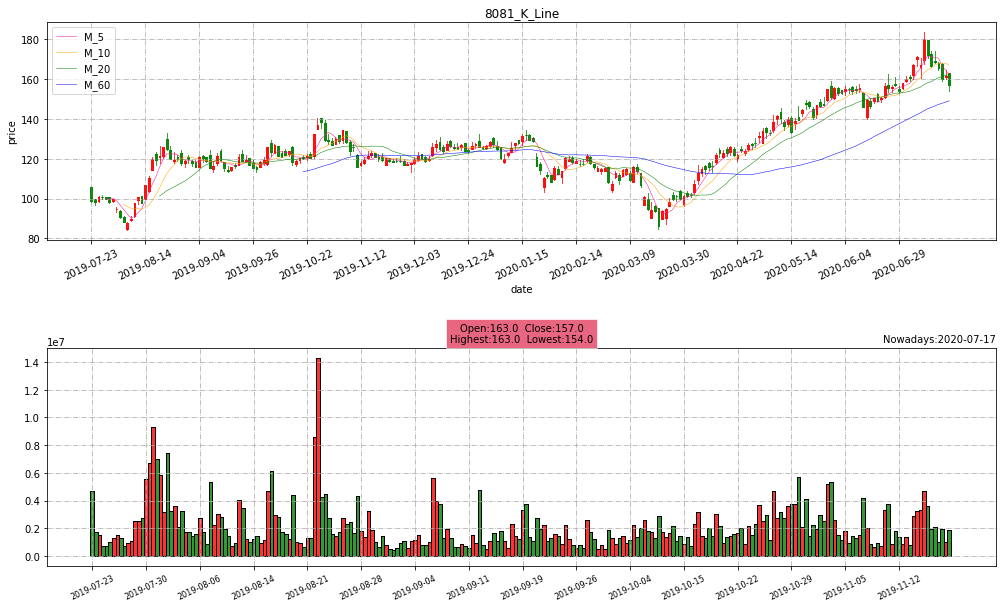

In [283]:
import sys
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import json, pymysql
import pandas as pd
from matplotlib.pylab import date2num 
from cycler import cycler
import matplotlib as mpl
import mpl_finance as mpf  
import matplotlib.pyplot as plt
import random
import numpy as np
#from talib import abstract
%matplotlib inline
import tushare as ts
from matplotlib import ticker

#--------------------------------------

#隨機選擇一支股票畫圖(測試)
Stockiid={'台泥': '1101', '亞泥': '1102', '嘉泥': '1103', '環泥': '1104', '幸福': '1108', '信大': '1109', '東泥': '1110', '味全': '1201', '味王': '1203', '大成': '1210', '大飲': '1213', '卜蜂': '1215', '統一': '1216', '愛之味': '1217', '泰山': '1218', '福壽': '1219', '台榮': '1220', '福懋油': '1225', '佳格': '1227', '聯華': '1229', '聯華食': '1231', '大統益': '1232', '天仁': '1233', '黑松': '1234', '興泰': '1235', '宏亞': '1236', '鮮活果汁-KY': '1256', '台塑': '1301', '南亞': '1303', '台聚': '1304', '華夏': '1305', '三芳': '1307', '亞聚': '1308', '台達化': '1309', '台苯': '1310', '國喬': '1312', '聯成': '1313', '中石化': '1314', '達新': '1315', '上曜': '1316', '東陽': '1319', '大洋': '1321', '永裕': '1323', '地球': '1324', '恆大': '1325', '台化': '1326', '再生-KY': '1337', '廣華-KY': '1338', '昭輝': '1339', '勝悅-KY': '1340', '富林-KY': '1341', '遠東新': '1402', '新纖': '1409', '南染': '1410', '宏洲': '1413', '東和': '1414', '廣豐': '1416', '嘉裕': '1417', '東華': '1418', '新紡': '1419', '利華': '1423', '大魯閣': '1432', '福懋': '1434', '中福': '1435', '華友聯': '1436', '勤益控': '1437', '裕豐': '1438', '中和': '1439', '南紡': '1440', '大東': '1441', '名軒': '1442', '立益': '1443', '力麗': '1444', '大宇': '1445', '宏和': '1446', '力鵬': '1447', '佳和': '1449', '年興': '1451', '宏益': '1452', '大將': '1453', '台富': '1454', '集盛': '1455', '怡華': '1456', '宜進': '1457', '聯發': '1459', '宏遠': '1460', '強盛': '1463', '得力': '1464', '偉全': '1465', '聚隆': '1466', '南緯': '1467', '昶和': '1468', '大統新創': '1470', '首利': '1471', '三洋紡': '1472', '台南': '1473', '弘裕': '1474', '本盟': '1475', '儒鴻': '1476', '聚陽': '1477', '士電': '1503', '東元': '1504', '正道': '1506', '永大': '1507', '瑞利': '1512', '中興電': '1513', '亞力': '1514', '力山': '1515', '川飛': '1516', '利奇': '1517', '華城': '1519', '大億': '1521', '堤維西': '1522', '耿鼎': '1524', '江申': '1525', '日馳': '1526', '鑽全': '1527', '恩德': '1528', '樂士': '1529', '亞崴': '1530', '高林股': '1531', '勤美': '1532', '車王電': '1533', '中宇': '1535', '和大': '1536', '廣隆': '1537', '正峰新': '1538', '巨庭': '1539', '喬福': '1540', '錩泰': '1541', '伸興': '1558', '中砂': '1560', '倉佑': '1568', '信錦': '1582', '程泰': '1583', '吉茂': '1587', '永冠-KY': '1589', '亞德客-KY': '1590', '英瑞-KY': '1592', '岱宇': '1598', '華電': '1603', '聲寶': '1604', '華新': '1605', '華榮': '1608', '大亞': '1609', '中電': '1611', '宏泰': '1612', '三洋電': '1614', '大山': '1615', '億泰': '1616', '榮星': '1617', '合機': '1618', '艾美特-KY': '1626', '中化': '1701', '南僑': '1702', '葡萄王': '1707', '東鹼': '1708', '和益': '1709', '東聯': '1710', '永光': '1711', '興農': '1712', '國化': '1713', '和桐': '1714', '長興': '1717', '中纖': '1718', '生達': '1720', '三晃': '1721', '台肥': '1722', '中碳': '1723', '台硝': '1724', '元禎': '1725', '永記': '1726', '中華化': '1727', '花仙子': '1730', '美吾華': '1731', '毛寶': '1732', '五鼎': '1733', '杏輝': '1734', '日勝化': '1735', '喬山': '1736', '臺鹽': '1737', '寶齡富錦': '1760', '中化生': '1762', '勝一': '1773', '展宇': '1776', '和康生': '1783', '科妍': '1786', '神隆': '1789', '美時': '1795', '台玻': '1802', '寶徠': '1805', '冠軍': '1806', '潤隆': '1808', '中釉': '1809', '和成': '1810', '凱撒衛': '1817', '台紙': '1902', '士紙': '1903', '正隆': '1904', '華紙': '1905', '寶隆': '1906', '永豐餘': '1907', '榮成': '1909', '中鋼': '2002', '東和鋼鐵': '2006', '燁興': '2007', '高興昌': '2008', '第一銅': '2009', '春源': '2010', '春雨': '2012', '中鋼構': '2013', '中鴻': '2014', '豐興': '2015', '官田鋼': '2017', '美亞': '2020', '聚亨': '2022', '燁輝': '2023', '志聯': '2024', '千興': '2025', '大成鋼': '2027', '威致': '2028', '盛餘': '2029', '彰源': '2030', '新光鋼': '2031', '新鋼': '2032', '佳大': '2033', '允強': '2034', '海光': '2038', '上銀': '2049', '川湖': '2059', '橋椿': '2062', '運錩': '2069', '南港': '2101', '泰豐': '2102', '台橡': '2103', '國際中橡': '2104', '正新': '2105', '建大': '2106', '厚生': '2107', '南帝': '2108', '華豐': '2109', '鑫永銓': '2114', '六暉-KY': '2115', '裕隆': '2201', '中華': '2204', '三陽工業': '2206', '和泰車': '2207', '台船': '2208', '裕日車': '2227', '劍麟': '2228', '為升': '2231', '宇隆': '2233', '百達-KY': '2236', '英利-KY': '2239', '宏旭-KY': '2243', '光寶科': '2301', '麗正': '2302', '聯電': '2303', '全友': '2305', '台達電': '2308', '金寶': '2312', '華通': '2313', '台揚': '2314', '楠梓電': '2316', '鴻海': '2317', '東訊': '2321', '中環': '2323', '仁寶': '2324', '國巨': '2327', '廣宇': '2328', '華泰': '2329', '台積電': '2330', '精英': '2331', '友訊': '2332', '旺宏': '2337', '光罩': '2338', '光磊': '2340', '茂矽': '2342', '華邦電': '2344', '智邦': '2345', '聯強': '2347', '海悅': '2348', '錸德': '2349', '順德': '2351', '佳世達': '2352', '宏碁': '2353', '鴻準': '2354', '敬鵬': '2355', '英業達': '2356', '華碩': '2357', '廷鑫': '2358', '所羅門': '2359', '致茂': '2360', '藍天': '2362', '矽統': '2363', '倫飛': '2364', '昆盈': '2365', '燿華': '2367', '金像電': '2368', '菱生': '2369', '大同': '2371', '震旦行': '2373', '佳能': '2374', '凱美': '2375', '技嘉': '2376', '微星': '2377', '瑞昱': '2379', '虹光': '2380', '廣達': '2382', '台光電': '2383', '群光': '2385', '精元': '2387', '威盛': '2388', '云辰': '2390', '正崴': '2392', '億光': '2393', '研華': '2395', '友通': '2397', '映泰': '2399', '凌陽': '2401', '毅嘉': '2402', '漢唐': '2404', '浩鑫': '2405', '國碩': '2406', '南亞科': '2408', '友達': '2409', '中華電': '2412', '環科': '2413', '精技': '2414', '錩新': '2415', '圓剛': '2417', '仲琦': '2419', '新巨': '2420', '建準': '2421', '固緯': '2423', '隴華': '2424', '承啟': '2425', '鼎元': '2426', '三商電': '2427', '興勤': '2428', '銘旺科': '2429', '燦坤': '2430', '聯昌': '2431', '互盛電': '2433', '統懋': '2434', '偉詮電': '2436', '翔耀': '2438', '美律': '2439', '太空梭': '2440', '超豐': '2441', '新美齊': '2442', '億麗': '2443', '兆勁': '2444', '晶電': '2448', '京元電子': '2449', '神腦': '2450', '創見': '2451', '凌群': '2453', '聯發科': '2454', '全新': '2455', '奇力新': '2456', '飛宏': '2457', '義隆': '2458', '敦吉': '2459', '建通': '2460', '光群雷': '2461', '良得電': '2462', '盟立': '2464', '麗臺': '2465', '冠西電': '2466', '志聖': '2467', '華經': '2468', '資通': '2471', '立隆電': '2472', '可成': '2474', '鉅祥': '2476', '美隆電': '2477', '大毅': '2478', '敦陽科': '2480', '強茂': '2481', '連宇': '2482', '百容': '2483', '希華': '2484', '兆赫': '2485', '一詮': '2486', '漢平': '2488', '瑞軒': '2489', '吉祥全': '2491', '華新科': '2492', '揚博': '2493', '普安': '2495', '卓越': '2496', '怡利電': '2497', '宏達電': '2498', '東貝': '2499', '國建': '2501', '國產': '2504', '國揚': '2505', '太設': '2506', '全坤建': '2509', '太子': '2511', '龍邦': '2514', '中工': '2515', '新建': '2516', '冠德': '2520', '京城': '2524', '宏璟': '2527', '皇普': '2528', '華建': '2530', '宏盛': '2534', '達欣工': '2535', '宏普': '2536', '聯上發': '2537', '基泰': '2538', '櫻花建': '2539', '愛山林': '2540', '興富發': '2542', '皇昌': '2543', '皇翔': '2545', '根基': '2546', '日勝生': '2547', '華固': '2548', '潤弘': '2597', '益航': '2601', '長榮': '2603', '新興': '2605', '裕民': '2606', '榮運': '2607', '嘉里大榮': '2608', '陽明': '2609', '華航': '2610', '志信': '2611', '中航': '2612', '中櫃': '2613', '東森': '2614', '萬海': '2615', '山隆': '2616', '台航': '2617', '長榮航': '2618', '亞航': '2630', '台灣高鐵': '2633', '漢翔': '2634', '台驊投控': '2636', '慧洋-KY': '2637', '宅配通': '2642', '萬企': '2701', '華園': '2702', '國賓': '2704', '六福': '2705', '第一店': '2706', '晶華': '2707', '遠雄來': '2712', '夏都': '2722', '美食-KY': '2723', '王品': '2727', '雄獅': '2731', '寒舍': '2739', '雲品': '2748', '彰銀': '2801', '京城銀': '2809', '台中銀': '2812', '旺旺保': '2816', '華票': '2820', '中壽': '2823', '台產': '2832', '臺企銀': '2834', '高雄銀': '2836', '聯邦銀': '2838', '台開': '2841', '遠東銀': '2845', '安泰銀': '2849', '新產': '2850', '中再保': '2851', '第一保': '2852', '統一證': '2855', '三商壽': '2867', '華南金': '2880', '富邦金': '2881', '國泰金': '2882', '開發金': '2883', '玉山金': '2884', '元大金': '2885', '兆豐金': '2886', '台新金': '2887', '新光金': '2888', '國票金': '2889', '永豐金': '2890', '中信金': '2891', '第一金': '2892', '王道銀行': '2897', '欣欣': '2901', '遠百': '2903', '匯僑': '2904', '三商': '2905', '高林': '2906', '特力': '2908', '統領': '2910', '麗嬰房': '2911', '統一超': '2912', '農林': '2913', '潤泰全': '2915', '鼎固-KY': '2923', '淘帝-KY': '2929', '客思達-KY': '2936', '凱羿-KY': '2939', '歐格': '3002', '健和興': '3003', '豐達科': '3004', '神基': '3005', '晶豪科': '3006', '大立光': '3008', '華立': '3010', '今皓': '3011', '晟銘電': '3013', '聯陽': '3014', '全漢': '3015', '嘉晶': '3016', '奇鋐': '3017', '同開': '3018', '亞光': '3019', '鴻名': '3021', '威強電': '3022', '信邦': '3023', '憶聲': '3024', '星通': '3025', '禾伸堂': '3026', '盛達': '3027', '增你強': '3028', '零壹': '3029', '德律': '3030', '佰鴻': '3031', '偉訓': '3032', '威健': '3033', '聯詠': '3034', '智原': '3035', '文曄': '3036', '欣興': '3037', '全台': '3038', '遠見': '3040', '揚智': '3041', '晶技': '3042', '科風': '3043', '健鼎': '3044', '台灣大': '3045', '建碁': '3046', '訊舟': '3047', '益登': '3048', '和鑫': '3049', '鈺德': '3050', '力特': '3051', '夆典': '3052', '立萬利': '3054', '蔚華科': '3055', '總太': '3056', '喬鼎': '3057', '立德': '3058', '華晶科': '3059', '銘異': '3060', '建漢': '3062', '日電貿': '3090', '聯傑': '3094', '一零四': '3130', '正達': '3149', '景岳': '3164', '大量': '3167', '景碩': '3189', '全科': '3209', '晟鈦': '3229', '緯創': '3231', '虹冠電': '3257', '昇陽': '3266', '勝德': '3296', '昇貿': '3305', '聯德': '3308', '閎暉': '3311', '弘憶股': '3312', '同泰': '3321', '泰碩': '3338', '麗清': '3346', '奇偶': '3356', '新日興': '3376', '明泰': '3380', '新世紀': '3383', '玉晶光': '3406', '京鼎': '3413', '融程電': '3416', '譁裕': '3419', '台端': '3432', '榮創': '3437', '創意': '3443', '聯鈞': '3450', '晶睿': '3454', '群創': '3481', '誠研': '3494', '維熹': '3501', '揚明光': '3504', '華擎': '3515', '柏騰': '3518', '安馳': '3528', '晶相光': '3530', '台勝科': '3532', '嘉澤': '3533', '晶彩科': '3535', '誠創': '3536', '州巧': '3543', '敦泰': '3545', '聯穎': '3550', '嘉威': '3557', '牧德': '3563', '聯合再生': '3576', '辛耘': '3583', '通嘉': '3588', '艾笛森': '3591', '力銘': '3593', '智易': '3596', '宏致': '3605', '谷崧': '3607', '碩天': '3617', '洋華': '3622', '達邁': '3645', '健策': '3653', '世芯-KY': '3661', '貿聯-KY': '3665', '圓展': '3669', 'TPK-KY': '3673', '新至陞': '3679', '亞太電': '3682', '達能': '3686', '海華': '3694', '隆達': '3698', '大眾控': '3701', '大聯大': '3702', '欣陸': '3703', '合勤控': '3704', '永信': '3705', '神達': '3706', '上緯投控': '3708', '日月光投控': '3711', '永崴投控': '3712', '佳醫': '4104', '雃博': '4106', '懷特': '4108', '旭富': '4119', '亞諾法': '4133', '麗豐-KY': '4137', '龍燈-KY': '4141', '國光生': '4142', '康聯-KY': '4144', '全宇生技-KY': '4148 ', '訊映': '4155', '承業醫': '4164', '佐登-KY': '4190', '炎洲': '4306', '如興': '4414', '利勤': '4426', '廣越': '4438', '冠星-KY': '4439', '東台': '4526', '瑞智': '4532', '拓凱': '4536', '全球傳動': '4540', '銘鈺': '4545', '智伸科': '4551', '力達-KY': '4552', '氣立': '4555', '永新-KY': '4557', '強信-KY': '4560', '穎漢': '4562', '元翎': '4564', '時碩工業': '4566', '鈞興-KY': '4571', '駐龍': '4572', '大銀微系統': '4576', '光隆精密-KY': '4581', '德淵': '4720', '國精化': '4722', '信昌化': '4725', '華廣': '4737', '康普': '4739', '台耀': '4746', '三福化': '4755', '材料-KY': '4763', '雙鍵': '4764', '南寶': '4766', '日成-KY': '4807', '遠傳': '4904', '正文': '4906', '聯德控股-KY': '4912', '致伸': '4915', '事欣科': '4916', '新唐': '4919', '泰鼎-KY': '4927', '燦星網': '4930', '太極': '4934', '茂林-KY': '4935', '和碩': '4938', '嘉彰': '4942', '康控-KY': '4943', '凌通': '4952', '光鋐': '4956', '臻鼎-KY': '4958', '誠美材': '4960', '天鈺': '4961', '十銓': '4967', '立積': '4968', '佳凌': '4976', '眾達-KY': '4977', '榮科': '4989', '傳奇': '4994', '鑫禾': '4999', '三星': '5007', '訊連': '5203', '科嘉-KY': '5215', '東科-KY': '5225', '達興材料': '5234', '乙盛-KY': '5243', '虹堡': '5258', '鎧勝-KY': '5264', '祥碩': '5269', '禾聯碩': '5283', 'jpp-KY': '5284', '界霖': '5285', '豐祥-KY': '5288', '敦南': '5305', '中磊': '5388', '崇越': '5434', '瀚宇博': '5469', '松翰': '5471', '慧友': '5484', '建國': '5515', '隆大': '5519', '工信': '5521', '遠雄': '5522', '順天': '5525', '鄉林': '5531', '皇鼎': '5533', '長虹': '5534', '東明-KY': '5538', '遠雄港': '5607', '四維航': '5608', '鳳凰': '5706', '中租-KY': '5871', '上海商銀': '5876', '合庫金': '5880', '台南-KY': '5906', '大洋-KY': '5907', '群益證': '6005', '群益期': '6024', '競國': '6108', '聚碩': '6112', '鎰勝': '6115', '彩晶': '6116', '迎廣': '6117', '達運': '6120', '上福': '6128', '鈞泰': '6131', '金橋': '6133', '富爾特': '6136', '亞翔': '6139', '柏承': '6141', '友勁': '6142', '百一': '6152', '嘉聯益': '6153', '鈞寶': '6155', '華興': '6164', '捷泰': '6165', '凌華': '6166', '宏齊': '6168', '互億': '6172', '瑞儀': '6176', '達麗': '6177', '關貿': '6183', '大豐電': '6184', '豐藝': '6189', '精成科': '6191', '巨路': '6192', '帆宣': '6196', '佳必琪': '6197', '亞弘電': '6201', '盛群': '6202', '詮欣': '6205', '飛捷': '6206', '今國光': '6209', '聯茂': '6213', '精誠': '6214', '和椿': '6215', '居易': '6216', '聚鼎': '6224', '天瀚': '6225', '光鼎': '6226', '超眾': '6230', '華孚': '6235', '力成': '6239', '迅杰': '6243', '定穎': '6251', '矽格': '6257', '台郡': '6269', '同欣電': '6271', '宏正': '6277', '台表科': '6278', '全國電': '6281', '康舒': '6282', '淳安': '6283', '啟碁': '6285', '聯嘉': '6288', '華上': '6289', '悅城': '6405', '旭隼': '6409', '群電': '6412', '樺漢': '6414', '矽力-KY': '6415', '瑞祺電通': '6416', '光麗-KY': '6431', '光聖': '6442', '元晶': '6443', '鈺邦': '6449', '訊芯-KY': '6451', '康友-KY': '6452', 'GIS-KY': '6456', '台數科': '6464', '安集': '6477', '晶碩': '6491', '南六': '6504', '台塑化': '6505', '捷敏-KY': '6525', '愛普': '6531', '晶心科': '6533', '泰福-KY': '6541', '易華電': '6552', '興能高': '6558', '虹揚-KY': '6573', '研揚': '6579', '鋼聯': '6581', '申豐': '6582', '動力-KY': '6591', '和潤企業': '6592', '帝寶': '6605', '必應': '6625', '基士德-KY': '6641', '科定': '6655', '羅麗芬-KY': '6666', '中揚光': '6668', '緯穎': '6669', '復盛應用': '6670', '三能-KY': '6671', '騰輝電子-KY': '6672', '鋐寶科技': '6674', '旭暉應材': '6698', '惠特': '6706', '嘉基': '6715', '台通': '8011', '矽創': '8016', '尖點': '8021', '昇陽半導體': '8028', '雷虎': '8033', '台虹': '8039', '南電': '8046', '長華': '8070', '陞泰': '8072', '致新': '8081', '華冠': '8101', '瀚荃': '8103', '錸寶': '8104', '凌巨': '8105', '華東': '8110', '至上': '8112', '振樺電': '8114', '福懋科': '8131', '南茂': '8150', '達方': '8163', '無敵': '8201', '勤誠': '8210', '志超': '8213', '明基材': '8215', '寶一': '8222', '菱光': '8249', '富鼎': '8261', '宇瞻': '8271', '日友': '8341', '建新國際': '8367', '羅昇': '8374', '百和興業-KY': '8404', '福貞-KY': '8411', '可寧衛': '8422', '基勝-KY': '8427', '金麗-KY': '8429', '威宏-KY': '8442', '阿瘦': '8443', '富邦媒': '8454', '柏文': '8462', '潤泰材': '8463', '億豐': '8464', '美吉吉-KY': '8466', '波力-KY': '8467', '山林水': '8473', '東哥遊艇': '8478', '泰昇-KY': '8480', '政伸': '8481', '商億-KY': '8482', '吉源-KY': '8488', '格威傳媒': '8497', '鼎炫-KY': '8499', '台汽電': '8926', '新天地': '8940', '高力': '8996', '鈺齊-KY': '9802', '台火': '9902', '寶成': '9904', '大華': '9905', '欣巴巴': '9906', '統一實': '9907', '大台北': '9908', '豐泰': '9910', '櫻花': '9911', '偉聯': '9912', '美利達': '9914', '中保科': '9917', '欣天然': '9918', '康那香': '9919', '巨大': '9921', '福興': '9924', '新保': '9925', '新海': '9926', '泰銘': '9927', '中視': '9928', '秋雨': '9929', '中聯資源': '9930', '欣高': '9931', '中鼎': '9933', '成霖': '9934', '慶豐富': '9935', '全國': '9937', '百和': '9938', '宏全': '9939', '信義': '9940', '裕融': '9941', '茂順': '9942', '好樂迪': '9943', '新麗': '9944', '潤泰新': '9945', '三發地產': '9946', '佳龍': '9955', '世紀鋼': '9958', '茂生農經': '1240', '其祥-KY': '1258', '安心': '1259', '德麥': '1264', '漢來美食': '1268', '恩得利': '1333', '台翰': '1336', '精華': '1565', '濱川': '1569', '力肯': '1570', '新麥': '1580', '精剛': '1584', '和勤': '1586', '駿吉-KY': '1591', '祺驊': '1593', '川寶': '1595', '直得': '1597', '宏佳騰': '1599', '台蠟': '1742', '南光': '1752', '生泰': '1777', '合世': '1781', '訊聯': '1784', '光洋科': '1785', '杏昌': '1788', '金穎生技': '1796', '易威': '1799', '寶利徠': '1813', '富喬': '1815', '唐榮': '2035', '風青': '2061', '世鎧': '2063', '晉椿': '2064', '世豐': '2065', '世德': '2066', '嘉鋼': '2067', '精湛': '2070', '大甲': '2221', '泰茂': '2230', '謚源': '2235', '綠意': '2596', '大車隊': '2640', '正德': '2641', '捷迅': '2643', '晶悅': '2718', '燦星旅': '2719', '富驛-KY': '2724', '雅茗-KY': '2726', '瓦城': '2729', '六角': '2732', '易飛網': '2734', '高野': '2736', '天蔥': '2740', '山富': '2743', '五福': '2745', '豆府': '2752', '滿心': '2916', '東凌-KY': '2924', '誠品生活': '2926', '紅馬-KY': '2928', '集雅社': '2937', '泰偉': '3064', '李洲': '3066', '全域': '3067', '協禧': '3071', '凱柏實業': '3073', '僑威': '3078', '聯亞': '3081', '網龍': '3083', '新零售': '3085', '華義': '3086', '艾訊': '3088', '元炬': '3089', '鴻碩': '3092', '港建': '3093', '及成': '3095', '穩懋': '3105', '好德': '3114', '寶島極': '3115', '進階': '3118', '笙泉': '3122', '昇銳': '3128', '弘塑': '3131', '晶宏': '3141', '新揚科': '3144', '大綜': '3147', '璟德': '3152', '精確': '3162', '波若威': '3163', '亞信': '3169', '新洲': '3171', '基亞': '3176', '公準': '3178', '鑫龍騰': '3188', '和進': '3191', '樺晟': '3202', '佰研': '3205', '志豐': '3206', '耀勝': '3207', '順達': '3211', '茂訊': '3213', '優群': '3217', '大學光': '3218', '倚強股份': '3219', '台嘉碩': '3221', '三顧': '3224', '至寶電': '3226', '原相': '3227', '金麗科': '3228', '錦明': '3230', '昱捷': '3232', '光環': '3234', '千如': '3236', '海灣': '3252', '鑫創': '3259', '威剛': '3260', '欣銓': '3264', '台星科': '3265', '海德威': '3268', '東碩': '3272', '宇環': '3276', '太普高': '3284', '微端': '3285', '廣寰科': '3287', '點晶': '3288', '宜特': '3289', '東浦': '3290', '鈊象': '3293', '英濟': '3294', '杭特': '3297', '岱稜': '3303', '鼎天': '3306', '佳穎': '3310', '斐成': '3313', '尼克森': '3317', '建舜電': '3322', '加百裕': '3323', '雙鴻': '3324', '旭品': '3325', '幸康': '3332', '泰谷': '3339', '律勝': '3354', '尚立': '3360', '先進光': '3362', '上詮': '3363', '典範': '3372', '熱映': '3373', '精材': '3374', '彬台': '3379', '崇越電': '3388', '旭軟': '3390', '漢科': '3402', '台興': '3426', '哲固': '3434', '類比科': '3438', '聯一光': '3441', '利機': '3444', '由田': '3455', '進泰電子': '3465', '致振': '3466', '安勤': '3479', '力致': '3483', '崧騰': '3484', '森寶': '3489', '單井': '3490', '昇達科': '3491', '長盛': '3492', '陽程': '3498', '環天科': '3499', '位速': '3508', '矽瑪': '3511', '皇龍': '3512', '亞帝歐': '3516', '振維': '3520', '鴻翊': '3521', '御頂': '3522', '迎輝': '3523', '凡甲': '3526', '聚積': '3527', '力旺': '3529', '先益': '3531', '堡達': '3537', '曜越': '3540', '西柏': '3541', '宇峻': '3546', '兆利': '3548', '世禾': '3551', '同致': '3552', '重鵬': '3555', '禾瑞亞': '3556', '神準': '3558', '其陽': '3564', '逸昌': '3567', '大塚': '3570', '泓格': '3577', '友威科': '3580', '博磊': '3581', '閎康': '3587', '磐儀': '3594', '映興': '3597', '東林': '3609', '鼎翰': '3611', '安可': '3615', '富晶通': '3623', '光頡': '3624', '西勝': '3625', '盈正': '3628', '地心引力': '3629', '新鉅科': '3630', '晟楠': '3631', '研勤': '3632', '駿熠電': '3642', '艾恩特': '3646', '精聯': '3652', '鑫科': '3663', '安瑞-KY': '3664', '光耀': '3666', '康聯訊': '3672', '德微': '3675', '家登': '3680', '榮昌': '3684', '元創精密': '3685', '歐買尬': '3687', '湧德': '3689', '碩禾': '3691', '營邦': '3693', '漢磊': '3707', '鑫聯大投控': '3709', '連展投控': '3710', '新晶投控': '3713', '永日': '4102', '東洋': '4105', '邦特': '4107', '加捷生醫': '4109', '濟生': '4111', '聯上': '4113', '健喬': '4114', '明基醫': '4116', '友華': '4120', '優盛': '4121', '晟德': '4123', '太醫': '4126', '天良': '4127', '中天': '4128', '聯合': '4129', '健亞': '4130', '晶宇': '4131', '曜亞': '4138', '馬光-KY': '4139', '中裕': '4147', '台微體': '4152', '鈺緯': '4153', '康樂-KY': '4154', '太景*-KY': '4157', '創源': '4160', '聿新科': '4161', '智擎': '4162', '鐿鈦': '4163', '展旺': '4167', '醣聯': '4168', '瑞基': '4171', '久裕': '4173', '浩鼎': '4174', '杏一': '4175', '福永生技': '4183', '安克': '4188', '杏國': '4192', '環瑞醫': '4198', '中華食': '4205', '環泰': '4207', '信立': '4303', '勝昱': '4304', '世坤': '4305', '東隆興': '4401', '福大': '4402', '新昕纖': '4406', '飛寶企業': '4413', '三圓': '4416', '金洲': '4417', '元勝': '4419', '光明': '4420', '聚紡': '4429', '耀億': '4430', '銘旺實': '4432', '興采': '4433', '健信': '4502', '金雨': '4503', '崇友': '4506', '高鋒': '4510', '福裕': '4513', '永彰': '4523', '方土霖': '4527', '江興鍛': '4528', '淳紳': '4529', '宏易': '4530', '協易機': '4533', '慶騰': '4534', '至興': '4535', '大詠城': '4538', '晟田': '4541', '科嶠': '4542', '萬在': '4543', '桓達': '4549', '長佳': '4550', '橙的': '4554', '旭然': '4556', '健椿': '4561', '百德': '4563', '科際精密': '4568', '捷流閥業': '4580', '唐鋒': '4609', '中美實': '4702', '大恭': '4706', '磐亞': '4707', '永純': '4711', '南璋': '4712', '永捷': '4714', '大立': '4716', '美琪瑪': '4721', '永昕': '4726', '雙美': '4728', '熒茂': '4729', '豪展': '4735', '泰博': '4736', '泓瀚': '4741', '合一': '4743', '皇將': '4744', '合富-KY': '4745', '強生': '4747', '國碳科': '4754', '勤凱': '4760', '誠泰科技': '4767', 'VHQ-KY': '4803', '大略-KY': '4804', '昇華': '4806', '聯光通': '4903', '台聯電': '4905', '富宇': '4907', '前鼎': '4908', '新復興': '4909', '德英': '4911', '欣厚-KY': '4924', '新盛力': '4931', '友輝': '4933', '亞電': '4939', '兆遠': '4944', '辣椒': '4946', '昂寶-KY': '4947', '牧東': '4950', '緯軟': '4953', '譜瑞-KY': '4966', 'IET-KY': '4971', '湯石照明': '4972', '廣穎': '4973', '亞泰': '4974', '華星光': '4979', '科誠': '4987', '環宇-KY': '4991', '晶達': '4995', '榮剛': '5009', '久陽': '5011', '強新': '5013', '建錩': '5014', '華祺': '5015', '松和': '5016', '富強': '5102', '凱衛': '5201', '力新': '5202', '中茂': '5205', '坤悅': '5206', '新鼎': '5209', '寶碩': '5210', '蒙恬': '5211', '凌網': '5212', '亞昕': '5213', '萬達光電': '5220', '安力-KY': '5223', '立凱-KY': '5227', '雷笛克光學': '5230', '智晶': '5245', '天鉞電': '5251', '智崴': '5263', '笙科': '5272', '信驊': '5274', '達輝-KY': '5276', '尚凡': '5278', '大峽谷-KY': '5281', '數字': '5287', '宜鼎': '5289', '邑昇': '5291', '杰力': '5299', '寶得利': '5301', '太欣': '5302', '鼎創達': '5304', '桂盟': '5306', '系統電': '5309', '天剛': '5310', '寶島科': '5312', '世紀': '5314', '光聯': '5315', '友銓': '5321', '士開': '5324', '華容': '5328', '建榮': '5340', '立衛': '5344', '天揚': '5345', '世界': '5347', '系通': '5348', '先豐': '5349', '鈺創': '5351', '台林': '5353', '佳總': '5355', '協益': '5356', '力麗店': '5364', '中光電': '5371', '合正': '5381', '金利': '5383', '青雲': '5386', '應華': '5392', '慕康生醫': '5398', '中菲': '5403', '國眾': '5410', '台半': '5425', '振發': '5426', '達威': '5432', '東友': '5438', '高技': '5439', '均豪': '5443', '寶聯通': '5450', '佶優': '5452', '昇益': '5455', '宣德': '5457', '同協': '5460', '霖宏': '5464', '富驊': '5465', '凱鈺': '5468', '聰泰': '5474', '德宏': '5475', '智冠': '5478', '新華': '5481', '中美晶': '5483', '通泰': '5487', '松普': '5488', '彩富': '5489', '同亨': '5490', '三聯': '5493', '凱崴': '5498', '永信建': '5508', '德昌': '5511', '力麒': '5512', '三豐': '5514', '雙喜': '5516', '力泰': '5520', '豐謙': '5523', '志嘉': '5529', '龍巖': '5530', '聖暉': '5536', '崇佑-KY': '5543', '台聯櫃': '5601', '陸海': '5603', '中連貨': '5604', '中菲行': '5609', '劍湖山': '5701', '亞都': '5703', '老爺知': '5704', '日盛金': '5820', '致和證': '5864', '台名': '5878', '德記': '5902', '全家': '5903', '寶雅': '5904', '南仁湖': '5905', '宏遠證': '6015', '康和證': '6016', '大展證': '6020', '大慶證': '6021', '元大期': '6023', '福邦證': '6026', '寬魚國際': '6101', '合邦': '6103', '創惟': '6104', '亞元': '6109', '大宇資': '6111', '亞矽': '6113', '久威': '6114', '建達': '6118', '新普': '6121', '擎邦': '6122', '上奇': '6123', '業強': '6124', '廣運': '6125', '信音': '6126', '九豪': '6127', '普誠': '6129', '星寶國際': '6130', '萬旭': '6134', '茂達': '6138', '訊達': '6140', '振曜': '6143', '得利影': '6144', '耕興': '6146', '頎邦': '6147', '驊宏資': '6148', '撼訊': '6150', '晉倫': '6151', '順發': '6154', '松上': '6156', '禾昌': '6158', '欣技': '6160', '捷波': '6161', '華電網': '6163', '久正': '6167', '昱泉': '6169', '統振': '6170', '亞銳士': '6171', '信昌電': '6173', '安碁': '6174', '立敦': '6175', '亞通': '6179', '橘子': '6180', '合晶': '6182', '幃翔': '6185', '新潤': '6186', '萬潤': '6187', '廣明': '6188', '萬泰科': '6190', '育富': '6194', '詩肯': '6195', '凌泰': '6198', '天品': '6199', '海韻電': '6203', '艾華': '6204', '雷科': '6207', '日揚': '6208', '慶生': '6210', '理銘': '6212', '中探針': '6217', '豪勉': '6218', '富旺': '6219', '岳豐': '6220', '晉泰': '6221', '上揚': '6222', '旺矽': '6223', '茂綸': '6227', '全譜': '6228', '研通': '6229', '系微': '6231', '旺玖': '6233', '高僑': '6234', '康呈': '6236', '驊訊': '6237', '勝麗': '6238', '松崗': '6240', '易通展': '6241', '立康': '6242', '茂迪': '6244', '立端': '6245', '臺龍': '6246', '淇譽電': '6247', '沛波': '6248', '百徽': '6259', '久元': '6261', '普萊德': '6263', '富裔': '6264', '方土昶': '6265', '泰詠': '6266', '倍微': '6270', '台燿': '6274', '元山': '6275', '安鈦克': '6276', '胡連': '6279', '佳邦': '6284', '元隆': '6287', '良維': '6290', '沛亨': '6291', '迅德': '6292', '智基': '6294', '通訊-KY': '6404', '晶焱': '6411', '韋僑': '6417', '詠昇': '6418', '京晨科': '6419', '易發': '6425', '統新': '6426', '今展科': '6432', '大中': '6435', '迅得': '6438', '廣錠': '6441', '藥華藥': '6446', '紘康': '6457', '益得': '6461', '神盾': '6462', '威潤': '6465', '大樹': '6469', '宇智': '6470', '保瑞': '6472', '弘煜科': '6482', '點序': '6485', '互動': '6486', '環球晶': '6488', '生華科': '6492', '九齊': '6494', '科懋': '6496', '亞獅康-KY': '6497 ', '益安': '6499', '雙邦': '6506', '惠光': '6508', '聚和': '6509', '精測': '6510', '啟發電': '6512', '芮特-KY': '6514', '勤崴國際': '6516', '達爾膚': '6523', '明達醫': '6527', '創威': '6530', '瑞耘': '6532', '順藥': '6535', '倉和': '6538', '隆中': '6542', '高端疫苗': '6547', '長科*': '6548', '勝品': '6556', '欣普羅': '6560', '是方': '6561', '宏觀': '6568', '醫揚': '6569', '維田': '6570', '霈方': '6574', '逸達': '6576', '勁豐': '6577', '達邦蛋白': '6578', '台康生技': '6589', '普鴻': '6590', '台灣銘板': '6593', '展匯科': '6594', '寬宏藝術': '6596', '富強鑫': '6603', '瀧澤科': '6609', '奈米醫材': '6612', '朋億': '6613', '慧智': '6615', '特昇-KY': '6616', '萬年清': '6624', '泰金-KY': '6629', '均華': '6640', '富致': '6642', 'M31': '6643', '台生材': '6649', '天正國際': '6654', '樂斯科': '6662', '群翊': '6664', '信紘科': '6667', '鈺太': '6679', '鑫創電子': '6680', '雍智科技': '6683', '安碁資訊': '6690', '東捷資訊': '6697', '應廣': '6716', '崑鼎': '6803', '邑錡': '7402', '佑華': '8024', '鈦昇': '8027', '光菱': '8032', '榮群': '8034', '長園科': '8038', '九暘': '8040', '金山電': '8042', '蜜望實': '8043', '網家': '8044', '星雲': '8047', '德勝': '8048', '晶采': '8049', '廣積': '8050', '安國': '8054', '凱碩': '8059', '東捷': '8064', '來思達': '8066', '志旭': '8067', '全達': '8068', '元太': '8069', '能率網通': '8071', '鉅橡': '8074', '伍豐': '8076', '洛碁': '8077', '永利聯合': '8080', '瑞穎': '8083', '巨虹': '8084', '福華': '8085', '宏捷科': '8086', '華鎂鑫': '8087', '品安': '8088', '翔名': '8091', '建暐': '8092', '保銳': '8093', '擎亞': '8096', '常珵': '8097', '大世科': '8099', '大億金茂': '8107', '博大': '8109', '立碁': '8111', '越峰': '8121', '正淩': '8147', '博智': '8155', '天宇': '8171', '智捷': '8176', '加高': '8182', '精星': '8183', '新漢': '8234', '華宏': '8240', '朋程': '8255', '商丞': '8277', '生展': '8279', '英格爾': '8287', '泰藝': '8289', '尚茂': '8291', '群聯': '8299', '益張': '8342', '恒耀': '8349', '冠好': '8354', '金居': '8358', '千附': '8383', '金益鼎': '8390', '白紗科': '8401', '盛弘': '8403', '金可-KY': '8406', '商之器': '8409', '森田': '8410', '大國鋼': '8415', '實威': '8416', '捷必勝-KY': '8418', '明揚': '8420', '旭源': '8421', '保綠-KY': '8423', '惠普': '8424', '紅木-KY': '8426', '匯鑽科': '8431', '東生華': '8432', '弘帆': '8433', '鉅邁': '8435', '大江': '8436', '大地-KY': '8437', '綠電': '8440', '綠河-KY': '8444', '華研': '8446', '霹靂': '8450', '大拓-KY': '8455', '夠麻吉': '8472', '台境': '8476', '創業家': '8477', '三貝德': '8489', '裕國': '8905', '花王': '8906', '欣雄': '8908', '光隆': '8916', '欣泰': '8917', '沈氏': '8921', '時報': '8923', '大田': '8924', '北基': '8927', '鉅明': '8928', '富堡': '8929', '青鋼': '8930', '大汽電': '8931', '宏大': '8932', '愛地雅': '8933', '衡平': '8934', '邦泰': '8935', '國統': '8936', '合騏': '8937', '明安': '8938', '關中': '8941', '森鉅': '8942', '琉園': '9949', '萬國通': '9950', '皇田': '9951', '邁達康': '9960', '有益': '9962'}
List=[]
for iid in Stockiid.values():
    iid=iid.replace(' ','')
    List.append(iid)
test = random.choice(List)
test = int(test)
print("random item from list is: ", test)
#連接mysql索取資料
db = pymysql.connect(host='10.120.35.27',port=3306,user='dbuser2',passwd='aabb1234',db='Project_test')
cur = db.cursor()
cur.execute("select * from daily_trade_tw where stockiid=%d" % (test))

Data = [i for i in cur.fetchall()]
b = pd.DataFrame(Data)
b=b.rename(columns={0:'Stockiid',1:'Date',2:'Open',3:'High',4:'Low',5:'Close',6:'Volume'})
print(b)
b['Date']=pd.to_datetime(b['Date'])
b['Date'] = b['Date'].dt.date
b.index=b['Date']


b=b.drop('Stockiid',axis=1).drop('Date',axis=1)

b['Open']=b['Open'].astype(float)
b['High']=b['High'].astype(float)
b['Low']=b['Low'].astype(float)
b['Close']=b['Close'].astype(float)
b['Volume']=b['Volume'].astype(float)
print(b.dtypes)


test = str(test)
#畫圖的資料量
scale = 240
b = b[-scale:]
# 創fig
fig, (ax1, ax3) = plt.subplots(2, 1, figsize=(17, 10))
plt.subplots_adjust(hspace=0.5)

plt.title("Open:"+str(round(b['Open'][-1], 2))+"  Close:"+str(round(b['Close'][-1], 2))+"\nHighest:"+str(round(b['High'][-1] ,2))+"  Lowest:"+str(round(b['Low'][-1], 2)),
            fontsize="25",fontweight='bold',bbox=dict(facecolor='crimson'
           ,edgecolor='white',alpha=0.65),loc='center', FontProperties="SimHei")

plt.title("Nowadays:"+str(b.index[-1]),fontsize="20",fontweight='bold',loc="right", FontProperties="SimHei")




# 畫K線(蠟燭線)
mpf.candlestick2_ochl(ax1, b.Open, b.Close, b.High, b.Low, width=0.5,
                      colorup='r', colordown='g')  
# 最高價,最低價,當日開盤價,當日收盤價



# 畫移動平均線

b['Ma5'] = b.Close.rolling(window=5).mean()


b['Ma10'] = b.Close.rolling(window=10).mean()


b['Ma20'] = b.Close.rolling(window=20).mean()


b['Ma60'] = b.Close.rolling(window=60).mean()








# 放置圖例
ax1.plot(np.arange(0, len(b.index)), b['Ma5'], 'deeppink', label='M_5', lw=0.5)
ax1.plot(np.arange(0, len(b.index)), b['Ma10'], 'orange', label='M_10', lw=0.5)
ax1.plot(np.arange(0, len(b.index)), b['Ma20'], 'green', label='M_20', lw=0.5)
ax1.plot(np.arange(0, len(b.index)), b['Ma60'], 'blue', label='M_60', lw=0.5)


#標示當天日期

ax1.legend(loc='best')
ax1.set_title(test+"_K_Line")
ax1.set_xlabel("date")
ax1.set_ylabel("price")
ax1.set_xticks(range(0, len(b.index), 15))  # 以15天為單位,標示日期
ax1.set_xticklabels([b.index[index] for index in ax1.get_xticks()])  # 設定X軸為日期
#繪製K、D線圖
# ax2 = fig.add_axes([0.1,0.3,0.75,0.20])

# ax2.plot(b['k'], label='K值')
# ax2.plot(b['d'], label='D值')

# ax2.set_xticks(range(0, len(stock.index),10))
# ax2.set_xticklabels(stock.index[::10],fontsize="10", rotation=45)
#繪製成交量子圖

mpf.volume_overlay(ax3, b['Open'], b['Close'], b['Volume'], colorup='red', colordown='green', width=1.0, alpha=0.8)
ax3.set_xticks(range(0, len(b.index),15))
ax3.set_xticklabels([b.index[index] for index in ax3.get_xticks()])
ax3.set_xticklabels(b.index[::5],fontsize="8", rotation=25)


# 使日期傾斜以供辨識
for label in ax1.xaxis.get_ticklabels():
    label.set_rotation(25)
    label.set_fontsize(10)  
    

       
plt.show()

random item from list is:  2059
      Stockiid        Date    Open    High     Low   Close  Volume
0         2059  2010-01-04  175.00  177.00  172.00  177.00  826262
1         2059  2010-01-05  178.50  178.50  173.50  173.50  877246
2         2059  2010-01-06  174.00  176.00  172.50  175.00  593993
3         2059  2010-01-07  175.00  176.50  172.00  173.50  490632
4         2059  2010-01-08  174.50  174.50  169.50  173.00  524733
...        ...         ...     ...     ...     ...     ...     ...
2586      2059  2020-07-14  333.00  337.50  333.00  333.50  225210
2587      2059  2020-07-15  335.00  344.50  335.00  343.00  386448
2588      2059  2020-07-16  343.00  346.00  337.50  343.50  320433
2589      2059  2020-07-17  344.00  346.50  341.50  343.50  308150
2590      2059  2020-07-20  343.50  357.00  343.50  346.50  594230

[2591 rows x 7 columns]
Open      float64
High      float64
Low       float64
Close     float64
Volume    float64
dtype: object
             Open   High    Low  Cl

<function matplotlib.pyplot.show(*args, **kw)>

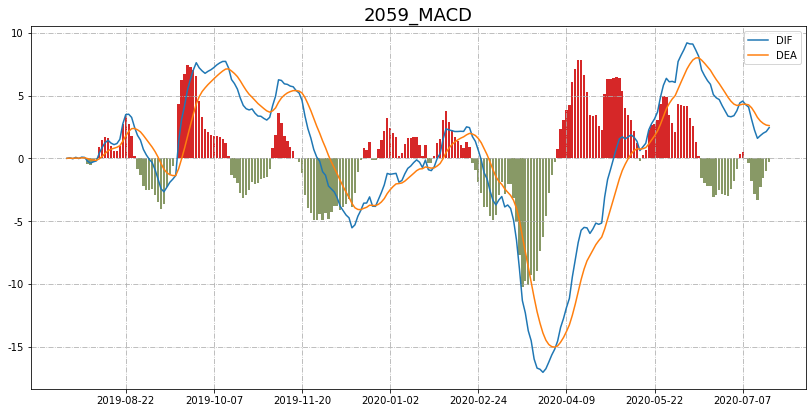

In [314]:
import sys
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import json, pymysql
import pandas as pd
from matplotlib.pylab import date2num 
from cycler import cycler
import matplotlib as mpl
import mpl_finance as mpf  
import matplotlib.pyplot as plt
import random
import numpy as np
#from talib import abstract
%matplotlib inline
import tushare as ts
from matplotlib import ticker
from matplotlib.font_manager import FontProperties
#--------------------------------------

#隨機選擇一支股票畫圖(測試)
Stockiid={'台泥': '1101', '亞泥': '1102', '嘉泥': '1103', '環泥': '1104', '幸福': '1108', '信大': '1109', '東泥': '1110', '味全': '1201', '味王': '1203', '大成': '1210', '大飲': '1213', '卜蜂': '1215', '統一': '1216', '愛之味': '1217', '泰山': '1218', '福壽': '1219', '台榮': '1220', '福懋油': '1225', '佳格': '1227', '聯華': '1229', '聯華食': '1231', '大統益': '1232', '天仁': '1233', '黑松': '1234', '興泰': '1235', '宏亞': '1236', '鮮活果汁-KY': '1256', '台塑': '1301', '南亞': '1303', '台聚': '1304', '華夏': '1305', '三芳': '1307', '亞聚': '1308', '台達化': '1309', '台苯': '1310', '國喬': '1312', '聯成': '1313', '中石化': '1314', '達新': '1315', '上曜': '1316', '東陽': '1319', '大洋': '1321', '永裕': '1323', '地球': '1324', '恆大': '1325', '台化': '1326', '再生-KY': '1337', '廣華-KY': '1338', '昭輝': '1339', '勝悅-KY': '1340', '富林-KY': '1341', '遠東新': '1402', '新纖': '1409', '南染': '1410', '宏洲': '1413', '東和': '1414', '廣豐': '1416', '嘉裕': '1417', '東華': '1418', '新紡': '1419', '利華': '1423', '大魯閣': '1432', '福懋': '1434', '中福': '1435', '華友聯': '1436', '勤益控': '1437', '裕豐': '1438', '中和': '1439', '南紡': '1440', '大東': '1441', '名軒': '1442', '立益': '1443', '力麗': '1444', '大宇': '1445', '宏和': '1446', '力鵬': '1447', '佳和': '1449', '年興': '1451', '宏益': '1452', '大將': '1453', '台富': '1454', '集盛': '1455', '怡華': '1456', '宜進': '1457', '聯發': '1459', '宏遠': '1460', '強盛': '1463', '得力': '1464', '偉全': '1465', '聚隆': '1466', '南緯': '1467', '昶和': '1468', '大統新創': '1470', '首利': '1471', '三洋紡': '1472', '台南': '1473', '弘裕': '1474', '本盟': '1475', '儒鴻': '1476', '聚陽': '1477', '士電': '1503', '東元': '1504', '正道': '1506', '永大': '1507', '瑞利': '1512', '中興電': '1513', '亞力': '1514', '力山': '1515', '川飛': '1516', '利奇': '1517', '華城': '1519', '大億': '1521', '堤維西': '1522', '耿鼎': '1524', '江申': '1525', '日馳': '1526', '鑽全': '1527', '恩德': '1528', '樂士': '1529', '亞崴': '1530', '高林股': '1531', '勤美': '1532', '車王電': '1533', '中宇': '1535', '和大': '1536', '廣隆': '1537', '正峰新': '1538', '巨庭': '1539', '喬福': '1540', '錩泰': '1541', '伸興': '1558', '中砂': '1560', '倉佑': '1568', '信錦': '1582', '程泰': '1583', '吉茂': '1587', '永冠-KY': '1589', '亞德客-KY': '1590', '英瑞-KY': '1592', '岱宇': '1598', '華電': '1603', '聲寶': '1604', '華新': '1605', '華榮': '1608', '大亞': '1609', '中電': '1611', '宏泰': '1612', '三洋電': '1614', '大山': '1615', '億泰': '1616', '榮星': '1617', '合機': '1618', '艾美特-KY': '1626', '中化': '1701', '南僑': '1702', '葡萄王': '1707', '東鹼': '1708', '和益': '1709', '東聯': '1710', '永光': '1711', '興農': '1712', '國化': '1713', '和桐': '1714', '長興': '1717', '中纖': '1718', '生達': '1720', '三晃': '1721', '台肥': '1722', '中碳': '1723', '台硝': '1724', '元禎': '1725', '永記': '1726', '中華化': '1727', '花仙子': '1730', '美吾華': '1731', '毛寶': '1732', '五鼎': '1733', '杏輝': '1734', '日勝化': '1735', '喬山': '1736', '臺鹽': '1737', '寶齡富錦': '1760', '中化生': '1762', '勝一': '1773', '展宇': '1776', '和康生': '1783', '科妍': '1786', '神隆': '1789', '美時': '1795', '台玻': '1802', '寶徠': '1805', '冠軍': '1806', '潤隆': '1808', '中釉': '1809', '和成': '1810', '凱撒衛': '1817', '台紙': '1902', '士紙': '1903', '正隆': '1904', '華紙': '1905', '寶隆': '1906', '永豐餘': '1907', '榮成': '1909', '中鋼': '2002', '東和鋼鐵': '2006', '燁興': '2007', '高興昌': '2008', '第一銅': '2009', '春源': '2010', '春雨': '2012', '中鋼構': '2013', '中鴻': '2014', '豐興': '2015', '官田鋼': '2017', '美亞': '2020', '聚亨': '2022', '燁輝': '2023', '志聯': '2024', '千興': '2025', '大成鋼': '2027', '威致': '2028', '盛餘': '2029', '彰源': '2030', '新光鋼': '2031', '新鋼': '2032', '佳大': '2033', '允強': '2034', '海光': '2038', '上銀': '2049', '川湖': '2059', '橋椿': '2062', '運錩': '2069', '南港': '2101', '泰豐': '2102', '台橡': '2103', '國際中橡': '2104', '正新': '2105', '建大': '2106', '厚生': '2107', '南帝': '2108', '華豐': '2109', '鑫永銓': '2114', '六暉-KY': '2115', '裕隆': '2201', '中華': '2204', '三陽工業': '2206', '和泰車': '2207', '台船': '2208', '裕日車': '2227', '劍麟': '2228', '為升': '2231', '宇隆': '2233', '百達-KY': '2236', '英利-KY': '2239', '宏旭-KY': '2243', '光寶科': '2301', '麗正': '2302', '聯電': '2303', '全友': '2305', '台達電': '2308', '金寶': '2312', '華通': '2313', '台揚': '2314', '楠梓電': '2316', '鴻海': '2317', '東訊': '2321', '中環': '2323', '仁寶': '2324', '國巨': '2327', '廣宇': '2328', '華泰': '2329', '台積電': '2330', '精英': '2331', '友訊': '2332', '旺宏': '2337', '光罩': '2338', '光磊': '2340', '茂矽': '2342', '華邦電': '2344', '智邦': '2345', '聯強': '2347', '海悅': '2348', '錸德': '2349', '順德': '2351', '佳世達': '2352', '宏碁': '2353', '鴻準': '2354', '敬鵬': '2355', '英業達': '2356', '華碩': '2357', '廷鑫': '2358', '所羅門': '2359', '致茂': '2360', '藍天': '2362', '矽統': '2363', '倫飛': '2364', '昆盈': '2365', '燿華': '2367', '金像電': '2368', '菱生': '2369', '大同': '2371', '震旦行': '2373', '佳能': '2374', '凱美': '2375', '技嘉': '2376', '微星': '2377', '瑞昱': '2379', '虹光': '2380', '廣達': '2382', '台光電': '2383', '群光': '2385', '精元': '2387', '威盛': '2388', '云辰': '2390', '正崴': '2392', '億光': '2393', '研華': '2395', '友通': '2397', '映泰': '2399', '凌陽': '2401', '毅嘉': '2402', '漢唐': '2404', '浩鑫': '2405', '國碩': '2406', '南亞科': '2408', '友達': '2409', '中華電': '2412', '環科': '2413', '精技': '2414', '錩新': '2415', '圓剛': '2417', '仲琦': '2419', '新巨': '2420', '建準': '2421', '固緯': '2423', '隴華': '2424', '承啟': '2425', '鼎元': '2426', '三商電': '2427', '興勤': '2428', '銘旺科': '2429', '燦坤': '2430', '聯昌': '2431', '互盛電': '2433', '統懋': '2434', '偉詮電': '2436', '翔耀': '2438', '美律': '2439', '太空梭': '2440', '超豐': '2441', '新美齊': '2442', '億麗': '2443', '兆勁': '2444', '晶電': '2448', '京元電子': '2449', '神腦': '2450', '創見': '2451', '凌群': '2453', '聯發科': '2454', '全新': '2455', '奇力新': '2456', '飛宏': '2457', '義隆': '2458', '敦吉': '2459', '建通': '2460', '光群雷': '2461', '良得電': '2462', '盟立': '2464', '麗臺': '2465', '冠西電': '2466', '志聖': '2467', '華經': '2468', '資通': '2471', '立隆電': '2472', '可成': '2474', '鉅祥': '2476', '美隆電': '2477', '大毅': '2478', '敦陽科': '2480', '強茂': '2481', '連宇': '2482', '百容': '2483', '希華': '2484', '兆赫': '2485', '一詮': '2486', '漢平': '2488', '瑞軒': '2489', '吉祥全': '2491', '華新科': '2492', '揚博': '2493', '普安': '2495', '卓越': '2496', '怡利電': '2497', '宏達電': '2498', '東貝': '2499', '國建': '2501', '國產': '2504', '國揚': '2505', '太設': '2506', '全坤建': '2509', '太子': '2511', '龍邦': '2514', '中工': '2515', '新建': '2516', '冠德': '2520', '京城': '2524', '宏璟': '2527', '皇普': '2528', '華建': '2530', '宏盛': '2534', '達欣工': '2535', '宏普': '2536', '聯上發': '2537', '基泰': '2538', '櫻花建': '2539', '愛山林': '2540', '興富發': '2542', '皇昌': '2543', '皇翔': '2545', '根基': '2546', '日勝生': '2547', '華固': '2548', '潤弘': '2597', '益航': '2601', '長榮': '2603', '新興': '2605', '裕民': '2606', '榮運': '2607', '嘉里大榮': '2608', '陽明': '2609', '華航': '2610', '志信': '2611', '中航': '2612', '中櫃': '2613', '東森': '2614', '萬海': '2615', '山隆': '2616', '台航': '2617', '長榮航': '2618', '亞航': '2630', '台灣高鐵': '2633', '漢翔': '2634', '台驊投控': '2636', '慧洋-KY': '2637', '宅配通': '2642', '萬企': '2701', '華園': '2702', '國賓': '2704', '六福': '2705', '第一店': '2706', '晶華': '2707', '遠雄來': '2712', '夏都': '2722', '美食-KY': '2723', '王品': '2727', '雄獅': '2731', '寒舍': '2739', '雲品': '2748', '彰銀': '2801', '京城銀': '2809', '台中銀': '2812', '旺旺保': '2816', '華票': '2820', '中壽': '2823', '台產': '2832', '臺企銀': '2834', '高雄銀': '2836', '聯邦銀': '2838', '台開': '2841', '遠東銀': '2845', '安泰銀': '2849', '新產': '2850', '中再保': '2851', '第一保': '2852', '統一證': '2855', '三商壽': '2867', '華南金': '2880', '富邦金': '2881', '國泰金': '2882', '開發金': '2883', '玉山金': '2884', '元大金': '2885', '兆豐金': '2886', '台新金': '2887', '新光金': '2888', '國票金': '2889', '永豐金': '2890', '中信金': '2891', '第一金': '2892', '王道銀行': '2897', '欣欣': '2901', '遠百': '2903', '匯僑': '2904', '三商': '2905', '高林': '2906', '特力': '2908', '統領': '2910', '麗嬰房': '2911', '統一超': '2912', '農林': '2913', '潤泰全': '2915', '鼎固-KY': '2923', '淘帝-KY': '2929', '客思達-KY': '2936', '凱羿-KY': '2939', '歐格': '3002', '健和興': '3003', '豐達科': '3004', '神基': '3005', '晶豪科': '3006', '大立光': '3008', '華立': '3010', '今皓': '3011', '晟銘電': '3013', '聯陽': '3014', '全漢': '3015', '嘉晶': '3016', '奇鋐': '3017', '同開': '3018', '亞光': '3019', '鴻名': '3021', '威強電': '3022', '信邦': '3023', '憶聲': '3024', '星通': '3025', '禾伸堂': '3026', '盛達': '3027', '增你強': '3028', '零壹': '3029', '德律': '3030', '佰鴻': '3031', '偉訓': '3032', '威健': '3033', '聯詠': '3034', '智原': '3035', '文曄': '3036', '欣興': '3037', '全台': '3038', '遠見': '3040', '揚智': '3041', '晶技': '3042', '科風': '3043', '健鼎': '3044', '台灣大': '3045', '建碁': '3046', '訊舟': '3047', '益登': '3048', '和鑫': '3049', '鈺德': '3050', '力特': '3051', '夆典': '3052', '立萬利': '3054', '蔚華科': '3055', '總太': '3056', '喬鼎': '3057', '立德': '3058', '華晶科': '3059', '銘異': '3060', '建漢': '3062', '日電貿': '3090', '聯傑': '3094', '一零四': '3130', '正達': '3149', '景岳': '3164', '大量': '3167', '景碩': '3189', '全科': '3209', '晟鈦': '3229', '緯創': '3231', '虹冠電': '3257', '昇陽': '3266', '勝德': '3296', '昇貿': '3305', '聯德': '3308', '閎暉': '3311', '弘憶股': '3312', '同泰': '3321', '泰碩': '3338', '麗清': '3346', '奇偶': '3356', '新日興': '3376', '明泰': '3380', '新世紀': '3383', '玉晶光': '3406', '京鼎': '3413', '融程電': '3416', '譁裕': '3419', '台端': '3432', '榮創': '3437', '創意': '3443', '聯鈞': '3450', '晶睿': '3454', '群創': '3481', '誠研': '3494', '維熹': '3501', '揚明光': '3504', '華擎': '3515', '柏騰': '3518', '安馳': '3528', '晶相光': '3530', '台勝科': '3532', '嘉澤': '3533', '晶彩科': '3535', '誠創': '3536', '州巧': '3543', '敦泰': '3545', '聯穎': '3550', '嘉威': '3557', '牧德': '3563', '聯合再生': '3576', '辛耘': '3583', '通嘉': '3588', '艾笛森': '3591', '力銘': '3593', '智易': '3596', '宏致': '3605', '谷崧': '3607', '碩天': '3617', '洋華': '3622', '達邁': '3645', '健策': '3653', '世芯-KY': '3661', '貿聯-KY': '3665', '圓展': '3669', 'TPK-KY': '3673', '新至陞': '3679', '亞太電': '3682', '達能': '3686', '海華': '3694', '隆達': '3698', '大眾控': '3701', '大聯大': '3702', '欣陸': '3703', '合勤控': '3704', '永信': '3705', '神達': '3706', '上緯投控': '3708', '日月光投控': '3711', '永崴投控': '3712', '佳醫': '4104', '雃博': '4106', '懷特': '4108', '旭富': '4119', '亞諾法': '4133', '麗豐-KY': '4137', '龍燈-KY': '4141', '國光生': '4142', '康聯-KY': '4144', '全宇生技-KY': '4148 ', '訊映': '4155', '承業醫': '4164', '佐登-KY': '4190', '炎洲': '4306', '如興': '4414', '利勤': '4426', '廣越': '4438', '冠星-KY': '4439', '東台': '4526', '瑞智': '4532', '拓凱': '4536', '全球傳動': '4540', '銘鈺': '4545', '智伸科': '4551', '力達-KY': '4552', '氣立': '4555', '永新-KY': '4557', '強信-KY': '4560', '穎漢': '4562', '元翎': '4564', '時碩工業': '4566', '鈞興-KY': '4571', '駐龍': '4572', '大銀微系統': '4576', '光隆精密-KY': '4581', '德淵': '4720', '國精化': '4722', '信昌化': '4725', '華廣': '4737', '康普': '4739', '台耀': '4746', '三福化': '4755', '材料-KY': '4763', '雙鍵': '4764', '南寶': '4766', '日成-KY': '4807', '遠傳': '4904', '正文': '4906', '聯德控股-KY': '4912', '致伸': '4915', '事欣科': '4916', '新唐': '4919', '泰鼎-KY': '4927', '燦星網': '4930', '太極': '4934', '茂林-KY': '4935', '和碩': '4938', '嘉彰': '4942', '康控-KY': '4943', '凌通': '4952', '光鋐': '4956', '臻鼎-KY': '4958', '誠美材': '4960', '天鈺': '4961', '十銓': '4967', '立積': '4968', '佳凌': '4976', '眾達-KY': '4977', '榮科': '4989', '傳奇': '4994', '鑫禾': '4999', '三星': '5007', '訊連': '5203', '科嘉-KY': '5215', '東科-KY': '5225', '達興材料': '5234', '乙盛-KY': '5243', '虹堡': '5258', '鎧勝-KY': '5264', '祥碩': '5269', '禾聯碩': '5283', 'jpp-KY': '5284', '界霖': '5285', '豐祥-KY': '5288', '敦南': '5305', '中磊': '5388', '崇越': '5434', '瀚宇博': '5469', '松翰': '5471', '慧友': '5484', '建國': '5515', '隆大': '5519', '工信': '5521', '遠雄': '5522', '順天': '5525', '鄉林': '5531', '皇鼎': '5533', '長虹': '5534', '東明-KY': '5538', '遠雄港': '5607', '四維航': '5608', '鳳凰': '5706', '中租-KY': '5871', '上海商銀': '5876', '合庫金': '5880', '台南-KY': '5906', '大洋-KY': '5907', '群益證': '6005', '群益期': '6024', '競國': '6108', '聚碩': '6112', '鎰勝': '6115', '彩晶': '6116', '迎廣': '6117', '達運': '6120', '上福': '6128', '鈞泰': '6131', '金橋': '6133', '富爾特': '6136', '亞翔': '6139', '柏承': '6141', '友勁': '6142', '百一': '6152', '嘉聯益': '6153', '鈞寶': '6155', '華興': '6164', '捷泰': '6165', '凌華': '6166', '宏齊': '6168', '互億': '6172', '瑞儀': '6176', '達麗': '6177', '關貿': '6183', '大豐電': '6184', '豐藝': '6189', '精成科': '6191', '巨路': '6192', '帆宣': '6196', '佳必琪': '6197', '亞弘電': '6201', '盛群': '6202', '詮欣': '6205', '飛捷': '6206', '今國光': '6209', '聯茂': '6213', '精誠': '6214', '和椿': '6215', '居易': '6216', '聚鼎': '6224', '天瀚': '6225', '光鼎': '6226', '超眾': '6230', '華孚': '6235', '力成': '6239', '迅杰': '6243', '定穎': '6251', '矽格': '6257', '台郡': '6269', '同欣電': '6271', '宏正': '6277', '台表科': '6278', '全國電': '6281', '康舒': '6282', '淳安': '6283', '啟碁': '6285', '聯嘉': '6288', '華上': '6289', '悅城': '6405', '旭隼': '6409', '群電': '6412', '樺漢': '6414', '矽力-KY': '6415', '瑞祺電通': '6416', '光麗-KY': '6431', '光聖': '6442', '元晶': '6443', '鈺邦': '6449', '訊芯-KY': '6451', '康友-KY': '6452', 'GIS-KY': '6456', '台數科': '6464', '安集': '6477', '晶碩': '6491', '南六': '6504', '台塑化': '6505', '捷敏-KY': '6525', '愛普': '6531', '晶心科': '6533', '泰福-KY': '6541', '易華電': '6552', '興能高': '6558', '虹揚-KY': '6573', '研揚': '6579', '鋼聯': '6581', '申豐': '6582', '動力-KY': '6591', '和潤企業': '6592', '帝寶': '6605', '必應': '6625', '基士德-KY': '6641', '科定': '6655', '羅麗芬-KY': '6666', '中揚光': '6668', '緯穎': '6669', '復盛應用': '6670', '三能-KY': '6671', '騰輝電子-KY': '6672', '鋐寶科技': '6674', '旭暉應材': '6698', '惠特': '6706', '嘉基': '6715', '台通': '8011', '矽創': '8016', '尖點': '8021', '昇陽半導體': '8028', '雷虎': '8033', '台虹': '8039', '南電': '8046', '長華': '8070', '陞泰': '8072', '致新': '8081', '華冠': '8101', '瀚荃': '8103', '錸寶': '8104', '凌巨': '8105', '華東': '8110', '至上': '8112', '振樺電': '8114', '福懋科': '8131', '南茂': '8150', '達方': '8163', '無敵': '8201', '勤誠': '8210', '志超': '8213', '明基材': '8215', '寶一': '8222', '菱光': '8249', '富鼎': '8261', '宇瞻': '8271', '日友': '8341', '建新國際': '8367', '羅昇': '8374', '百和興業-KY': '8404', '福貞-KY': '8411', '可寧衛': '8422', '基勝-KY': '8427', '金麗-KY': '8429', '威宏-KY': '8442', '阿瘦': '8443', '富邦媒': '8454', '柏文': '8462', '潤泰材': '8463', '億豐': '8464', '美吉吉-KY': '8466', '波力-KY': '8467', '山林水': '8473', '東哥遊艇': '8478', '泰昇-KY': '8480', '政伸': '8481', '商億-KY': '8482', '吉源-KY': '8488', '格威傳媒': '8497', '鼎炫-KY': '8499', '台汽電': '8926', '新天地': '8940', '高力': '8996', '鈺齊-KY': '9802', '台火': '9902', '寶成': '9904', '大華': '9905', '欣巴巴': '9906', '統一實': '9907', '大台北': '9908', '豐泰': '9910', '櫻花': '9911', '偉聯': '9912', '美利達': '9914', '中保科': '9917', '欣天然': '9918', '康那香': '9919', '巨大': '9921', '福興': '9924', '新保': '9925', '新海': '9926', '泰銘': '9927', '中視': '9928', '秋雨': '9929', '中聯資源': '9930', '欣高': '9931', '中鼎': '9933', '成霖': '9934', '慶豐富': '9935', '全國': '9937', '百和': '9938', '宏全': '9939', '信義': '9940', '裕融': '9941', '茂順': '9942', '好樂迪': '9943', '新麗': '9944', '潤泰新': '9945', '三發地產': '9946', '佳龍': '9955', '世紀鋼': '9958', '茂生農經': '1240', '其祥-KY': '1258', '安心': '1259', '德麥': '1264', '漢來美食': '1268', '恩得利': '1333', '台翰': '1336', '精華': '1565', '濱川': '1569', '力肯': '1570', '新麥': '1580', '精剛': '1584', '和勤': '1586', '駿吉-KY': '1591', '祺驊': '1593', '川寶': '1595', '直得': '1597', '宏佳騰': '1599', '台蠟': '1742', '南光': '1752', '生泰': '1777', '合世': '1781', '訊聯': '1784', '光洋科': '1785', '杏昌': '1788', '金穎生技': '1796', '易威': '1799', '寶利徠': '1813', '富喬': '1815', '唐榮': '2035', '風青': '2061', '世鎧': '2063', '晉椿': '2064', '世豐': '2065', '世德': '2066', '嘉鋼': '2067', '精湛': '2070', '大甲': '2221', '泰茂': '2230', '謚源': '2235', '綠意': '2596', '大車隊': '2640', '正德': '2641', '捷迅': '2643', '晶悅': '2718', '燦星旅': '2719', '富驛-KY': '2724', '雅茗-KY': '2726', '瓦城': '2729', '六角': '2732', '易飛網': '2734', '高野': '2736', '天蔥': '2740', '山富': '2743', '五福': '2745', '豆府': '2752', '滿心': '2916', '東凌-KY': '2924', '誠品生活': '2926', '紅馬-KY': '2928', '集雅社': '2937', '泰偉': '3064', '李洲': '3066', '全域': '3067', '協禧': '3071', '凱柏實業': '3073', '僑威': '3078', '聯亞': '3081', '網龍': '3083', '新零售': '3085', '華義': '3086', '艾訊': '3088', '元炬': '3089', '鴻碩': '3092', '港建': '3093', '及成': '3095', '穩懋': '3105', '好德': '3114', '寶島極': '3115', '進階': '3118', '笙泉': '3122', '昇銳': '3128', '弘塑': '3131', '晶宏': '3141', '新揚科': '3144', '大綜': '3147', '璟德': '3152', '精確': '3162', '波若威': '3163', '亞信': '3169', '新洲': '3171', '基亞': '3176', '公準': '3178', '鑫龍騰': '3188', '和進': '3191', '樺晟': '3202', '佰研': '3205', '志豐': '3206', '耀勝': '3207', '順達': '3211', '茂訊': '3213', '優群': '3217', '大學光': '3218', '倚強股份': '3219', '台嘉碩': '3221', '三顧': '3224', '至寶電': '3226', '原相': '3227', '金麗科': '3228', '錦明': '3230', '昱捷': '3232', '光環': '3234', '千如': '3236', '海灣': '3252', '鑫創': '3259', '威剛': '3260', '欣銓': '3264', '台星科': '3265', '海德威': '3268', '東碩': '3272', '宇環': '3276', '太普高': '3284', '微端': '3285', '廣寰科': '3287', '點晶': '3288', '宜特': '3289', '東浦': '3290', '鈊象': '3293', '英濟': '3294', '杭特': '3297', '岱稜': '3303', '鼎天': '3306', '佳穎': '3310', '斐成': '3313', '尼克森': '3317', '建舜電': '3322', '加百裕': '3323', '雙鴻': '3324', '旭品': '3325', '幸康': '3332', '泰谷': '3339', '律勝': '3354', '尚立': '3360', '先進光': '3362', '上詮': '3363', '典範': '3372', '熱映': '3373', '精材': '3374', '彬台': '3379', '崇越電': '3388', '旭軟': '3390', '漢科': '3402', '台興': '3426', '哲固': '3434', '類比科': '3438', '聯一光': '3441', '利機': '3444', '由田': '3455', '進泰電子': '3465', '致振': '3466', '安勤': '3479', '力致': '3483', '崧騰': '3484', '森寶': '3489', '單井': '3490', '昇達科': '3491', '長盛': '3492', '陽程': '3498', '環天科': '3499', '位速': '3508', '矽瑪': '3511', '皇龍': '3512', '亞帝歐': '3516', '振維': '3520', '鴻翊': '3521', '御頂': '3522', '迎輝': '3523', '凡甲': '3526', '聚積': '3527', '力旺': '3529', '先益': '3531', '堡達': '3537', '曜越': '3540', '西柏': '3541', '宇峻': '3546', '兆利': '3548', '世禾': '3551', '同致': '3552', '重鵬': '3555', '禾瑞亞': '3556', '神準': '3558', '其陽': '3564', '逸昌': '3567', '大塚': '3570', '泓格': '3577', '友威科': '3580', '博磊': '3581', '閎康': '3587', '磐儀': '3594', '映興': '3597', '東林': '3609', '鼎翰': '3611', '安可': '3615', '富晶通': '3623', '光頡': '3624', '西勝': '3625', '盈正': '3628', '地心引力': '3629', '新鉅科': '3630', '晟楠': '3631', '研勤': '3632', '駿熠電': '3642', '艾恩特': '3646', '精聯': '3652', '鑫科': '3663', '安瑞-KY': '3664', '光耀': '3666', '康聯訊': '3672', '德微': '3675', '家登': '3680', '榮昌': '3684', '元創精密': '3685', '歐買尬': '3687', '湧德': '3689', '碩禾': '3691', '營邦': '3693', '漢磊': '3707', '鑫聯大投控': '3709', '連展投控': '3710', '新晶投控': '3713', '永日': '4102', '東洋': '4105', '邦特': '4107', '加捷生醫': '4109', '濟生': '4111', '聯上': '4113', '健喬': '4114', '明基醫': '4116', '友華': '4120', '優盛': '4121', '晟德': '4123', '太醫': '4126', '天良': '4127', '中天': '4128', '聯合': '4129', '健亞': '4130', '晶宇': '4131', '曜亞': '4138', '馬光-KY': '4139', '中裕': '4147', '台微體': '4152', '鈺緯': '4153', '康樂-KY': '4154', '太景*-KY': '4157', '創源': '4160', '聿新科': '4161', '智擎': '4162', '鐿鈦': '4163', '展旺': '4167', '醣聯': '4168', '瑞基': '4171', '久裕': '4173', '浩鼎': '4174', '杏一': '4175', '福永生技': '4183', '安克': '4188', '杏國': '4192', '環瑞醫': '4198', '中華食': '4205', '環泰': '4207', '信立': '4303', '勝昱': '4304', '世坤': '4305', '東隆興': '4401', '福大': '4402', '新昕纖': '4406', '飛寶企業': '4413', '三圓': '4416', '金洲': '4417', '元勝': '4419', '光明': '4420', '聚紡': '4429', '耀億': '4430', '銘旺實': '4432', '興采': '4433', '健信': '4502', '金雨': '4503', '崇友': '4506', '高鋒': '4510', '福裕': '4513', '永彰': '4523', '方土霖': '4527', '江興鍛': '4528', '淳紳': '4529', '宏易': '4530', '協易機': '4533', '慶騰': '4534', '至興': '4535', '大詠城': '4538', '晟田': '4541', '科嶠': '4542', '萬在': '4543', '桓達': '4549', '長佳': '4550', '橙的': '4554', '旭然': '4556', '健椿': '4561', '百德': '4563', '科際精密': '4568', '捷流閥業': '4580', '唐鋒': '4609', '中美實': '4702', '大恭': '4706', '磐亞': '4707', '永純': '4711', '南璋': '4712', '永捷': '4714', '大立': '4716', '美琪瑪': '4721', '永昕': '4726', '雙美': '4728', '熒茂': '4729', '豪展': '4735', '泰博': '4736', '泓瀚': '4741', '合一': '4743', '皇將': '4744', '合富-KY': '4745', '強生': '4747', '國碳科': '4754', '勤凱': '4760', '誠泰科技': '4767', 'VHQ-KY': '4803', '大略-KY': '4804', '昇華': '4806', '聯光通': '4903', '台聯電': '4905', '富宇': '4907', '前鼎': '4908', '新復興': '4909', '德英': '4911', '欣厚-KY': '4924', '新盛力': '4931', '友輝': '4933', '亞電': '4939', '兆遠': '4944', '辣椒': '4946', '昂寶-KY': '4947', '牧東': '4950', '緯軟': '4953', '譜瑞-KY': '4966', 'IET-KY': '4971', '湯石照明': '4972', '廣穎': '4973', '亞泰': '4974', '華星光': '4979', '科誠': '4987', '環宇-KY': '4991', '晶達': '4995', '榮剛': '5009', '久陽': '5011', '強新': '5013', '建錩': '5014', '華祺': '5015', '松和': '5016', '富強': '5102', '凱衛': '5201', '力新': '5202', '中茂': '5205', '坤悅': '5206', '新鼎': '5209', '寶碩': '5210', '蒙恬': '5211', '凌網': '5212', '亞昕': '5213', '萬達光電': '5220', '安力-KY': '5223', '立凱-KY': '5227', '雷笛克光學': '5230', '智晶': '5245', '天鉞電': '5251', '智崴': '5263', '笙科': '5272', '信驊': '5274', '達輝-KY': '5276', '尚凡': '5278', '大峽谷-KY': '5281', '數字': '5287', '宜鼎': '5289', '邑昇': '5291', '杰力': '5299', '寶得利': '5301', '太欣': '5302', '鼎創達': '5304', '桂盟': '5306', '系統電': '5309', '天剛': '5310', '寶島科': '5312', '世紀': '5314', '光聯': '5315', '友銓': '5321', '士開': '5324', '華容': '5328', '建榮': '5340', '立衛': '5344', '天揚': '5345', '世界': '5347', '系通': '5348', '先豐': '5349', '鈺創': '5351', '台林': '5353', '佳總': '5355', '協益': '5356', '力麗店': '5364', '中光電': '5371', '合正': '5381', '金利': '5383', '青雲': '5386', '應華': '5392', '慕康生醫': '5398', '中菲': '5403', '國眾': '5410', '台半': '5425', '振發': '5426', '達威': '5432', '東友': '5438', '高技': '5439', '均豪': '5443', '寶聯通': '5450', '佶優': '5452', '昇益': '5455', '宣德': '5457', '同協': '5460', '霖宏': '5464', '富驊': '5465', '凱鈺': '5468', '聰泰': '5474', '德宏': '5475', '智冠': '5478', '新華': '5481', '中美晶': '5483', '通泰': '5487', '松普': '5488', '彩富': '5489', '同亨': '5490', '三聯': '5493', '凱崴': '5498', '永信建': '5508', '德昌': '5511', '力麒': '5512', '三豐': '5514', '雙喜': '5516', '力泰': '5520', '豐謙': '5523', '志嘉': '5529', '龍巖': '5530', '聖暉': '5536', '崇佑-KY': '5543', '台聯櫃': '5601', '陸海': '5603', '中連貨': '5604', '中菲行': '5609', '劍湖山': '5701', '亞都': '5703', '老爺知': '5704', '日盛金': '5820', '致和證': '5864', '台名': '5878', '德記': '5902', '全家': '5903', '寶雅': '5904', '南仁湖': '5905', '宏遠證': '6015', '康和證': '6016', '大展證': '6020', '大慶證': '6021', '元大期': '6023', '福邦證': '6026', '寬魚國際': '6101', '合邦': '6103', '創惟': '6104', '亞元': '6109', '大宇資': '6111', '亞矽': '6113', '久威': '6114', '建達': '6118', '新普': '6121', '擎邦': '6122', '上奇': '6123', '業強': '6124', '廣運': '6125', '信音': '6126', '九豪': '6127', '普誠': '6129', '星寶國際': '6130', '萬旭': '6134', '茂達': '6138', '訊達': '6140', '振曜': '6143', '得利影': '6144', '耕興': '6146', '頎邦': '6147', '驊宏資': '6148', '撼訊': '6150', '晉倫': '6151', '順發': '6154', '松上': '6156', '禾昌': '6158', '欣技': '6160', '捷波': '6161', '華電網': '6163', '久正': '6167', '昱泉': '6169', '統振': '6170', '亞銳士': '6171', '信昌電': '6173', '安碁': '6174', '立敦': '6175', '亞通': '6179', '橘子': '6180', '合晶': '6182', '幃翔': '6185', '新潤': '6186', '萬潤': '6187', '廣明': '6188', '萬泰科': '6190', '育富': '6194', '詩肯': '6195', '凌泰': '6198', '天品': '6199', '海韻電': '6203', '艾華': '6204', '雷科': '6207', '日揚': '6208', '慶生': '6210', '理銘': '6212', '中探針': '6217', '豪勉': '6218', '富旺': '6219', '岳豐': '6220', '晉泰': '6221', '上揚': '6222', '旺矽': '6223', '茂綸': '6227', '全譜': '6228', '研通': '6229', '系微': '6231', '旺玖': '6233', '高僑': '6234', '康呈': '6236', '驊訊': '6237', '勝麗': '6238', '松崗': '6240', '易通展': '6241', '立康': '6242', '茂迪': '6244', '立端': '6245', '臺龍': '6246', '淇譽電': '6247', '沛波': '6248', '百徽': '6259', '久元': '6261', '普萊德': '6263', '富裔': '6264', '方土昶': '6265', '泰詠': '6266', '倍微': '6270', '台燿': '6274', '元山': '6275', '安鈦克': '6276', '胡連': '6279', '佳邦': '6284', '元隆': '6287', '良維': '6290', '沛亨': '6291', '迅德': '6292', '智基': '6294', '通訊-KY': '6404', '晶焱': '6411', '韋僑': '6417', '詠昇': '6418', '京晨科': '6419', '易發': '6425', '統新': '6426', '今展科': '6432', '大中': '6435', '迅得': '6438', '廣錠': '6441', '藥華藥': '6446', '紘康': '6457', '益得': '6461', '神盾': '6462', '威潤': '6465', '大樹': '6469', '宇智': '6470', '保瑞': '6472', '弘煜科': '6482', '點序': '6485', '互動': '6486', '環球晶': '6488', '生華科': '6492', '九齊': '6494', '科懋': '6496', '亞獅康-KY': '6497 ', '益安': '6499', '雙邦': '6506', '惠光': '6508', '聚和': '6509', '精測': '6510', '啟發電': '6512', '芮特-KY': '6514', '勤崴國際': '6516', '達爾膚': '6523', '明達醫': '6527', '創威': '6530', '瑞耘': '6532', '順藥': '6535', '倉和': '6538', '隆中': '6542', '高端疫苗': '6547', '長科*': '6548', '勝品': '6556', '欣普羅': '6560', '是方': '6561', '宏觀': '6568', '醫揚': '6569', '維田': '6570', '霈方': '6574', '逸達': '6576', '勁豐': '6577', '達邦蛋白': '6578', '台康生技': '6589', '普鴻': '6590', '台灣銘板': '6593', '展匯科': '6594', '寬宏藝術': '6596', '富強鑫': '6603', '瀧澤科': '6609', '奈米醫材': '6612', '朋億': '6613', '慧智': '6615', '特昇-KY': '6616', '萬年清': '6624', '泰金-KY': '6629', '均華': '6640', '富致': '6642', 'M31': '6643', '台生材': '6649', '天正國際': '6654', '樂斯科': '6662', '群翊': '6664', '信紘科': '6667', '鈺太': '6679', '鑫創電子': '6680', '雍智科技': '6683', '安碁資訊': '6690', '東捷資訊': '6697', '應廣': '6716', '崑鼎': '6803', '邑錡': '7402', '佑華': '8024', '鈦昇': '8027', '光菱': '8032', '榮群': '8034', '長園科': '8038', '九暘': '8040', '金山電': '8042', '蜜望實': '8043', '網家': '8044', '星雲': '8047', '德勝': '8048', '晶采': '8049', '廣積': '8050', '安國': '8054', '凱碩': '8059', '東捷': '8064', '來思達': '8066', '志旭': '8067', '全達': '8068', '元太': '8069', '能率網通': '8071', '鉅橡': '8074', '伍豐': '8076', '洛碁': '8077', '永利聯合': '8080', '瑞穎': '8083', '巨虹': '8084', '福華': '8085', '宏捷科': '8086', '華鎂鑫': '8087', '品安': '8088', '翔名': '8091', '建暐': '8092', '保銳': '8093', '擎亞': '8096', '常珵': '8097', '大世科': '8099', '大億金茂': '8107', '博大': '8109', '立碁': '8111', '越峰': '8121', '正淩': '8147', '博智': '8155', '天宇': '8171', '智捷': '8176', '加高': '8182', '精星': '8183', '新漢': '8234', '華宏': '8240', '朋程': '8255', '商丞': '8277', '生展': '8279', '英格爾': '8287', '泰藝': '8289', '尚茂': '8291', '群聯': '8299', '益張': '8342', '恒耀': '8349', '冠好': '8354', '金居': '8358', '千附': '8383', '金益鼎': '8390', '白紗科': '8401', '盛弘': '8403', '金可-KY': '8406', '商之器': '8409', '森田': '8410', '大國鋼': '8415', '實威': '8416', '捷必勝-KY': '8418', '明揚': '8420', '旭源': '8421', '保綠-KY': '8423', '惠普': '8424', '紅木-KY': '8426', '匯鑽科': '8431', '東生華': '8432', '弘帆': '8433', '鉅邁': '8435', '大江': '8436', '大地-KY': '8437', '綠電': '8440', '綠河-KY': '8444', '華研': '8446', '霹靂': '8450', '大拓-KY': '8455', '夠麻吉': '8472', '台境': '8476', '創業家': '8477', '三貝德': '8489', '裕國': '8905', '花王': '8906', '欣雄': '8908', '光隆': '8916', '欣泰': '8917', '沈氏': '8921', '時報': '8923', '大田': '8924', '北基': '8927', '鉅明': '8928', '富堡': '8929', '青鋼': '8930', '大汽電': '8931', '宏大': '8932', '愛地雅': '8933', '衡平': '8934', '邦泰': '8935', '國統': '8936', '合騏': '8937', '明安': '8938', '關中': '8941', '森鉅': '8942', '琉園': '9949', '萬國通': '9950', '皇田': '9951', '邁達康': '9960', '有益': '9962'}
List=[]
for iid in Stockiid.values():
    iid=iid.replace(' ','')
    List.append(iid)
test = random.choice(List)
test = int(test)
print("random item from list is: ", test)
#連接mysql索取資料
db = pymysql.connect(host='10.120.35.27',port=3306,user='dbuser2',passwd='aabb1234',db='Project_test')
cur = db.cursor()
cur.execute("select * from daily_trade_tw where stockiid=%d" % (test))

Data = [i for i in cur.fetchall()]
b = pd.DataFrame(Data)
b=b.rename(columns={0:'Stockiid',1:'Date',2:'Open',3:'High',4:'Low',5:'Close',6:'Volume'})
print(b)
b.index=pd.to_datetime(b.Date)

b=b.drop('Stockiid',axis=1).drop('Date',axis=1)
#print(b.dtypes)
b['Open']=b['Open'].astype(float)
b['High']=b['High'].astype(float)
b['Low']=b['Low'].astype(float)
b['Close']=b['Close'].astype(float)
b['Volume']=b['Volume'].astype(float)
print(b.dtypes)
print(b)
test = str(test)
#畫圖的資料量
scale = 240
b = b[-scale:]

df_raw=b.reset_index()
df_raw['Date'] = df_raw['Date'].dt.date
fast_ewm=df_raw['Close'].ewm(span=12).mean()
slow_ewm=df_raw['Close'].ewm(span=26).mean()
dif=fast_ewm-slow_ewm
dea=dif.ewm(span=9).mean()
bar=(dif-dea)*2
red_bar=bar[bar>=0]
green_bar=bar[bar<0]

dpi=72
canvas_w=1000
canvas_h=480
figsize=canvas_w/72,canvas_h/72
plt.figure(figsize=figsize)

p_dif=plt.plot(dif.index,dif.values)
p_dea=plt.plot(dea.index,dea.values)
plt.bar(red_bar.index, red_bar.values, color='#d62728')
plt.bar(green_bar.index, green_bar.values, color='#889966')
xtick_period=30
major_index=df_raw.index[df_raw.index%xtick_period==20]
major_xtics=df_raw['Date'][df_raw.index%xtick_period==20]
plt.xticks(major_index,major_xtics)
plt.legend((p_dif[0],p_dea[0]),[u'DIF',u'DEA'])
plt.title(test+'_MACD',fontproperties=title_font)

plt.show
                     

 